<h3>Music Genre Classification</h3> 

Purpose : To learn the basic concepts of neural networks and use it to classify the music files in dataset. Majorly this notebook can be divided into 3 parts:

1) Using ANN

2) Tackling overfitting with ANN

3) Using CNN

Also to read the dataset we have used librosa library which only read files <1Mb and one file is greater than the size giving error due to which I have ignored it. The dataset contains the following genres, the keys being the prediction targets.

0: "disco",
1: "metal",
2: "reggae",
3: "blues",
4: "rock",
5: "classical",
6: "jazz",
7: "hiphop",
8: "country",
9: "pop"

In [4]:
import os
import librosa
import math
import json 
import matplotlib.pyplot as plt
import numpy as np

In [5]:
dataset_path = r'./dataset/Data/genres_original'
json_path = r'data.json'
SAMPLE_RATE = 22050
DURATION = 30
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

Creating a `save_mfcc` function so that we can prepare our dataset to be processed and read.

In [6]:
def save_mfcc(dataset_path, json_path, n_mfcc=13, n_fft=2048,
             hop_length=512, num_segments=5):
    # Data storage dictionary
    data = {
        "mapping": [],
        "mfcc": [],
        "labels": [],
    }
    samples_ps = int(SAMPLES_PER_TRACK/num_segments) # ps = per segment
    expected_vects_ps = math.ceil(samples_ps/hop_length)
    
    # loop through all the genres
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        # ensuring not at root
        if dirpath is not dataset_path:
            # save the semantic label
            dirpath_comp = dirpath.split("/")
            semantic_label = dirpath_comp[-1]
            data["mapping"].append(semantic_label)
            print(f"Processing: {semantic_label}")
            
            # process files for specific genre
            for f in filenames:
                if(f==str("jazz.00054.wav")):
                    # As librosa only read files <1Mb
                    continue
                else:
                    # load audio file
                    file_path = os.path.join(dirpath, f)
                    signal,sr = librosa.load(file_path,sr=SAMPLE_RATE)
                    for s in range(num_segments):
                        start_sample = samples_ps * s
                        finish_sample = start_sample + samples_ps

                        mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
                                                    sr = sr,
                                                    n_fft = n_fft,
                                                    n_mfcc = n_mfcc,
                                                    hop_length = hop_length)

                        mfcc = mfcc.T

                        # store mfcc if it has expected length 
                        if len(mfcc)==expected_vects_ps:
                            data["mfcc"].append(mfcc.tolist())
                            data["labels"].append(i-1)
                            print(f"{file_path}, segment: {s+1}")

    with open(json_path,"w") as f:
        json.dump(data,f,indent=4)

In [8]:
from IPython.display import clear_output


In [4]:
save_mfcc(dataset_path, json_path, num_segments=10)
clear_output()


Processing: genres_original\blues
./dataset/Data/genres_original\blues\blues.00000.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00000.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00000.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00000.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00000.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00000.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00000.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00000.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00000.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00732422  0.01660156  0.00762939 ... -0.04373169 -0.05706787
 -0.04086304] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02481079 -0.02005005 -0.0357666  ...  0.00918579  0.03964233
  0.09030151] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06256104  0.02435303 -0.00405884 ...  0.2854004   0.29364014
  0.25228882] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00000.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00001.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00001.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00001.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00001.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00001.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00001.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00001.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00001.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00001.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00341797 0.00430298 0.00137329 ... 0.15249634 0.13171387 0.10726929] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.15649414  0.15270996  0.11993408 ... -0.1390686  -0.14138794
 -0.15228271] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.17068481 -0.18624878 -0.17926025 ... -0.01953125 -0.01815796
 -0.01568604] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\blues\blues.00001.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00002.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00002.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00002.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00002.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00002.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00002.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00002.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00002.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01901245 0.04769897 0.02941895 ... 0.15261841 0.16873169 0.16186523] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.22421265 0.23577881 0.16583252 ... 0.04165649 0.03311157 0.0246582 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 1.7120361e-02  9.2773438e-03 -3.0517578e-05 ... -9.3780518e-02
 -9.0057373e-02 -8.9599609e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\blues\blues.00002.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00002.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00003.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00003.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00003.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00003.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00003.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00003.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00003.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00003.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00003.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.275177    0.26226807  0.2807312  ... -0.3409729  -0.3360901
 -0.37509155] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01300049 -0.03060913 -0.03607178 ...  0.00640869  0.00790405
  0.00805664] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00775146  0.00689697  0.00588989 ... -0.01318359 -0.00909424
  0.00048828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\blues\blues.00003.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00004.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00004.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00004.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00004.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00004.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00004.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00004.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00004.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00004.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00004.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.2144165  -0.19995117 -0.18859863 ... -0.00515747 -0.00244141
  0.00283813] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00631714 -0.00927734 -0.0083313  ... -0.13311768 -0.16101074
 -0.14437866] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0880127  -0.02044678  0.02566528 ... -0.02627563 -0.02276611
 -0.01507568] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00005.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00005.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00005.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00005.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00005.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00005.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00005.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00005.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00005.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00005.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00006.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00006.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03134155  0.03414917  0.0340271  ...  0.0586853  -0.04284668
 -0.11941528] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1390686  -0.14248657 -0.0899353  ... -0.02719116 -0.0333252
 -0.03308105] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02841187 -0.02484131 -0.02194214 ... -0.08883667 -0.07183838
 -0.06854248] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\blues\blues.00006.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00006.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00006.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00006.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00006.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00006.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00006.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00006.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00007.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00007.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00007.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00366211 -0.00366211 -0.00363159 ...  0.00662231 -0.03521729
 -0.03131104] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00137329 -0.00894165 -0.01519775 ...  0.13903809  0.14788818
  0.15557861] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.1600647   0.1609497   0.15805054 ... -0.42681885 -0.3685913
 -0.25030518] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\blues\blues.00007.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00007.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00007.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00007.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00007.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00007.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00007.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00008.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.065979    0.0788269   0.08474731 ... -0.05371094 -0.04025269
 -0.03616333] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04315186 -0.05490112 -0.05880737 ...  0.5109863   0.49053955
  0.28253174] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.24356079 -0.7022095  -0.4602356  ... -0.13394165 -0.14245605
 -0.15756226] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00008.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00008.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00008.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00008.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00008.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00008.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00008.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00008.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00008.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1602478  -0.1315918  -0.13806152 ...  0.01309204 -0.00289917
  0.00927734] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03234863  0.04876709  0.04525757 ... -0.18478394 -0.16964722
 -0.18118286] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1786499  -0.17822266 -0.27142334 ... -0.11068726 -0.12548828
 -0.11709595] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00009.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00009.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00009.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00009.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00009.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00009.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00009.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00009.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00009.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00009.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00010.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00010.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11160278  0.00970459 -0.03823853 ...  0.00582886  0.02511597
  0.01361084] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01043701 -0.00057983  0.0105896  ...  0.05383301  0.06213379
  0.040802  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04141235  0.02999878 -0.0062561  ...  0.03338623  0.03631592
  0.03512573] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00010.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00010.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00010.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00010.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00010.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00010.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00010.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00010.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00011.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00011.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00011.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00011.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00011.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.23721313  0.23873901  0.21276855 ... -0.01016235  0.01092529
  0.02752686] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01843262  0.00799561 -0.00250244 ...  0.09658813  0.09082031
  0.0703125 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03726196 -0.00561523 -0.05566406 ... -0.06948853 -0.07192993
 -0.07434082] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00011.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00011.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00011.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00011.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00011.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00012.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00012.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00012.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00012.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00012.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00012.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00012.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00012.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04891968 -0.03421021 -0.02566528 ...  0.04690552  0.05493164
  0.06137085] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.1854248  0.24972534 0.15673828 ... 0.01062012 0.01974487 0.00592041] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04364014 -0.08209229 -0.08132935 ... -0.01727295 -0.02105713
 -0.02166748] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\blues\blues.00012.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00012.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00013.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00013.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00013.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00013.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00013.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00013.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00013.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00013.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00013.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00013.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.13739014 0.19433594 0.17736816 ... 0.05075073 0.05236816 0.04855347] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03997803  0.03738403  0.04391479 ... -0.0201416  -0.02261353
 -0.02416992] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02505493 -0.02548218 -0.02426147 ...  0.00726318  0.0085144
  0.00610352] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\blues\blues.00014.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00014.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00014.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00014.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00014.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00014.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00014.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00014.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00014.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00014.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00015.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00015.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00015.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.07897949 0.08200073 0.08267212 ... 0.03042603 0.02670288 0.02545166] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02590942  0.02963257  0.03137207 ...  0.02166748 -0.00170898
 -0.0289917 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03167725 -0.01641846 -0.01074219 ... -0.06561279 -0.08004761
 -0.04623413] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\blues\blues.00015.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00015.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00015.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00015.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00015.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00015.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00015.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00016.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00016.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00016.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00016.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00016.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00016.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.40097046 0.40637207 0.37683105 ... 0.02612305 0.02835083 0.02700806] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02740479  0.03475952  0.04940796 ... -0.09985352 -0.11978149
 -0.12863159] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.13150024 -0.08703613  0.08834839 ...  0.0100708   0.00912476
  0.00198364] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\blues\blues.00016.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00016.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00016.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00016.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00017.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00017.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00017.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00017.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00017.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00017.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00017.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01065063 -0.01821899 -0.02630615 ... -0.02694702 -0.01974487
 -0.00405884] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02462769 0.03604126 0.02981567 ... 0.0300293  0.0291748  0.02819824] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02389526 0.01803589 0.01559448 ... 0.06307983 0.06771851 0.06854248] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\blues\blues.00017.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00017.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00017.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00018.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00018.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00018.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00018.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00018.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00018.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00018.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00018.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00018.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00018.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01617432  0.01513672  0.0135498  ... -0.02337646 -0.02651978
 -0.02490234] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02075195 -0.01913452 -0.01635742 ... -0.00900269 -0.01211548
 -0.01455688] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01565552 -0.01956177 -0.02178955 ... -0.01187134 -0.01525879
 -0.01922607] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00019.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00019.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00019.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00019.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00019.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00019.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00019.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00019.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00019.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00019.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00020.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10842896 -0.11425781 -0.11773682 ... -0.00762939 -0.00299072
  0.00073242] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00375366 0.00726318 0.01028442 ... 0.0402832  0.09011841 0.14981079] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.20217896  0.22918701  0.23022461 ... -0.03735352 -0.04751587
 -0.04800415] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\blues\blues.00020.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00020.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00020.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00020.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00020.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00020.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00020.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00020.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00020.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00021.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00021.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00021.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00021.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00021.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00253296  0.01565552  0.02697754 ... -0.01919556 -0.02316284
 -0.02590942] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02294922 -0.02423096 -0.02920532 ... -0.01330566 -0.01150513
 -0.019104  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02624512 -0.02209473 -0.01513672 ... -0.06619263 -0.07910156
 -0.08291626] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00021.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00021.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00021.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00021.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00021.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00022.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00022.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00022.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00022.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00022.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00022.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05355835 -0.04937744 -0.04449463 ...  0.08175659  0.08074951
  0.07949829] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0798645   0.07870483  0.07611084 ... -0.14645386 -0.14956665
 -0.1503601 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14703369 -0.14419556 -0.13623047 ... -0.10754395 -0.10464478
 -0.1038208 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00022.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00022.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00022.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00022.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00023.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00023.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00023.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00023.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00023.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00023.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00023.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00023.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00023.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00023.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.03326416 0.03442383 0.03945923 ... 0.03500366 0.03344727 0.03326416] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03375244  0.0324707   0.03134155 ... -0.05633545 -0.05828857
 -0.05706787] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05682373 -0.05554199 -0.05410767 ... -0.05526733 -0.05532837
 -0.05535889] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\blues\blues.00024.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00024.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00024.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00024.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00024.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00024.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00024.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00024.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00024.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00024.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00025.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00025.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00025.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01922607  0.02081299  0.01873779 ... -0.00015259  0.08505249
  0.11785889] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08392334  0.01055908 -0.05911255 ...  0.11273193  0.11004639
  0.10852051] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.10601807  0.10076904  0.09567261 ... -0.15338135 -0.19613647
 -0.20742798] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00025.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00025.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00025.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00025.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00025.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00025.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00025.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00026.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00026.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00026.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1581726  -0.11654663 -0.07196045 ...  0.06503296  0.06387329
  0.05978394] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.05987549 0.07052612 0.09124756 ... 0.05249023 0.04501343 0.03515625] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02267456  0.0067749  -0.00784302 ... -0.08084106 -0.07492065
 -0.0715332 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\blues\blues.00026.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00026.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00026.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00026.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00026.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00026.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00026.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00027.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00027.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00027.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00027.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00027.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00027.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00027.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00027.wav, segment: 8
./dataset/Data/genres_or

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02890015 0.05358887 0.04248047 ... 0.09619141 0.11535645 0.12390137] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11422729  0.08398438  0.0491333  ... -0.02178955 -0.01571655
  0.00387573] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02670288 0.04559326 0.05795288 ... 0.11306763 0.09020996 0.06069946] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\blues\blues.00028.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00028.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00028.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00028.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00028.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00029.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00029.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00029.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00029.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00029.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00029.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00029.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00029.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.05108643 0.05511475 0.05395508 ... 0.2071228  0.24041748 0.2597351 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.25708008 0.2341919  0.20489502 ... 0.23620605 0.22979736 0.22210693] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.19033813 0.13186646 0.07949829 ... 0.00296021 0.0022583  0.00119019] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\L

./dataset/Data/genres_original\blues\blues.00029.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00029.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00030.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00030.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00030.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00030.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00030.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00030.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00030.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00030.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00030.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00030.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03918457 -0.10848999 -0.13619995 ... -0.05560303 -0.06256104
 -0.06582642] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0552063   0.08731079  0.07107544 ... -0.1862793  -0.19216919
 -0.20202637] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.15322876 -0.1642456  -0.18130493 ...  0.16500854  0.1602478
  0.14996338] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\blues\blues.00031.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00031.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00031.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00031.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00031.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00031.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00031.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00031.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00031.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00031.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.17749023 -0.20883179 -0.23318481 ...  0.01586914  0.01431274
  0.0168457 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10046387 -0.15109253 -0.15005493 ... -0.05810547 -0.05776978
 -0.06384277] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06576538 -0.06634521 -0.07058716 ... -0.02618408 -0.00488281
  0.01751709] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00032.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00032.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00032.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00032.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00032.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00032.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00032.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00032.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00032.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04129028 -0.04199219 -0.04034424 ... -0.02990723 -0.03100586
 -0.0328064 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03546143 -0.03485107 -0.03106689 ... -0.00244141 -0.0020752
 -0.00143433] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00250244 -0.00238037 -0.00216675 ...  0.2866516   0.29019165
  0.28405762] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\blues\blues.00032.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00033.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00033.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00033.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00033.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00033.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00033.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00033.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00033.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00033.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00033.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00034.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.08746338 0.08071899 0.07421875 ... 0.112854   0.13604736 0.11486816] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01361084  0.02810669  0.03515625 ...  0.01953125 -0.01785278
 -0.06161499] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09332275 -0.13497925 -0.16769409 ... -0.08416748 -0.06729126
 -0.04238892] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\blues\blues.00034.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00034.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00034.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00034.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00034.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00034.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00034.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00034.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00034.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00035.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00035.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00035.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00035.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.26080322 -0.21704102 -0.19403076 ... -0.31582642 -0.37582397
 -0.41809082] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.40792847 -0.40481567 -0.38723755 ...  0.09472656  0.11541748
  0.1036377 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.10482788  0.11947632  0.12579346 ... -0.0553894  -0.05935669
 -0.06500244] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00035.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00035.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00035.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00035.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00035.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00035.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00036.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00036.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00036.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00036.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00036.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00036.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00036.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.3086548  0.32089233 0.34951782 ... 0.12145996 0.09976196 0.0776062 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06143188  0.0383606   0.00845337 ... -0.3425293  -0.3126526
 -0.33065796] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.36886597 -0.38967896 -0.3996277  ... -0.13409424 -0.16775513
 -0.2166748 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\blues\blues.00036.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00036.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00036.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00037.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00037.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00037.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00037.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00037.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00037.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00037.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00037.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00037.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00842285 -0.01010132 -0.01123047 ...  0.02426147  0.02398682
  0.02359009] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02264404  0.02160645  0.0211792  ... -0.3586731  -0.34924316
 -0.34481812] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.33200073 -0.3069458  -0.2598877  ... -0.06347656 -0.07214355
 -0.07550049] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00037.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00038.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00038.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00038.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00038.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00038.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00038.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00038.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00038.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00038.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.36587524 -0.31988525 -0.3317871  ...  0.01730347  0.02197266
  0.02227783] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01409912  0.00674438 -0.00100708 ... -0.1324768  -0.09368896
 -0.10928345] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05899048 -0.00292969 -0.00704956 ...  0.52911377  0.50616455
  0.5074158 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00038.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00039.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00039.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00039.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00039.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00039.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00039.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00039.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00039.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00039.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00039.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.12973022 0.125      0.11914062 ... 0.06054688 0.06082153 0.05892944] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0585022   0.06088257  0.06231689 ... -0.07104492 -0.07290649
 -0.07589722] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07714844 -0.07855225 -0.08178711 ...  0.15899658  0.18460083
  0.20370483] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\blues\blues.00040.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00040.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00040.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00040.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00040.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00040.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00040.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00040.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00040.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00040.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00041.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00041.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00041.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05142212 -0.1121521  -0.12783813 ... -0.09030151 -0.02609253
 -0.0368042 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03082275 -0.03540039 -0.03076172 ...  0.09317017  0.08099365
  0.07342529] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02001953 -0.02270508 -0.00421143 ...  0.09649658  0.08166504
  0.09014893] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00041.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00041.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00041.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00041.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00041.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00041.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00041.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00042.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00042.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00042.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00042.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00042.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.03710938 0.07446289 0.07992554 ... 0.07580566 0.08227539 0.05545044] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00875854 -0.03594971 -0.07046509 ... -0.01263428 -0.01483154
  0.02508545] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0826416   0.1199646   0.11245728 ... -0.22869873 -0.26000977
 -0.22088623] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\blues\blues.00042.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00042.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00042.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00042.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00042.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00043.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00043.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00043.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00043.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00043.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00043.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00043.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00043.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02294922 -0.00244141 -0.01287842 ...  0.00634766  0.01834106
  0.03479004] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04428101  0.05691528  0.06356812 ... -0.13821411 -0.13293457
 -0.12023926] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10800171 -0.11260986 -0.11779785 ...  0.5828247   0.6767273
  0.65701294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\blues\blues.00043.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00043.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00044.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00044.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00044.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00044.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00044.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00044.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00044.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00044.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00323486 -0.06643677 -0.10803223 ... -0.21255493 -0.15750122
 -0.11898804] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1008606  -0.11645508 -0.12277222 ...  0.08065796  0.10159302
  0.15261841] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.14782715  0.04864502 -0.0333252  ...  0.08575439  0.0668335
  0.05728149] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\blues\blues.00044.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00044.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00045.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00045.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00045.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00045.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00045.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00045.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00045.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00045.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02984619  0.0484314   0.12902832 ... -0.21542358 -0.21548462
 -0.23794556] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.21875    -0.19161987 -0.1845398  ... -0.03268433 -0.03881836
 -0.06130981] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03543091 -0.00097656  0.0072937  ...  0.40567017  0.40512085
  0.43048096] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00045.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00045.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00046.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00046.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00046.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00046.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00046.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00046.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00046.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00046.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00046.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00046.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00047.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05407715 -0.04690552 -0.02600098 ...  0.02200317  0.03033447
  0.04083252] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04925537  0.05923462  0.05993652 ...  0.02267456 -0.00750732
 -0.02886963] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07302856 -0.09442139 -0.06774902 ...  0.05761719  0.03924561
  0.0022583 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00047.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00047.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00047.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00047.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00047.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00047.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00047.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00047.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00047.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00048.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00048.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00048.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00048.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.21246338  0.31881714  0.17388916 ... -0.00421143 -0.03399658
 -0.01168823] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08648682  0.22366333  0.32421875 ...  0.02423096 -0.02807617
 -0.04025269] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03640747 -0.0496521  -0.04382324 ...  0.08883667  0.10391235
  0.1659851 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00048.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00048.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00048.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00048.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00048.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00048.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00049.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00049.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00049.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00049.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00049.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00049.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00049.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00049.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.15756226  0.14645386  0.15124512 ... -0.07189941 -0.07766724
 -0.0793457 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08676147 -0.10150146 -0.09829712 ... -0.00875854  0.01409912
  0.02069092] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00079346 -0.01037598 -0.00692749 ...  0.02752686  0.0302124
  0.02871704] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\blues\blues.00049.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00049.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00050.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00050.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00050.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00050.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00050.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00050.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00050.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00050.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00050.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00050.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03201294  0.02297974  0.01330566 ... -0.02886963  0.01379395
  0.01574707] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01602173 -0.00332642  0.05859375 ...  0.1081543   0.11584473
  0.10284424] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.08346558 0.05801392 0.03463745 ... 0.19445801 0.33413696 0.39138794] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\blues\blues.00051.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00051.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00051.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00051.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00051.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00051.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00051.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00051.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00051.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00051.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00052.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00052.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00052.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.2290039   0.20153809  0.14056396 ... -0.07632446 -0.08181763
 -0.12353516] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01705933  0.03436279  0.03353882 ...  0.01004028 -0.02752686
  0.03720093] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11520386  0.10693359  0.01803589 ... -0.11303711 -0.11856079
 -0.10284424] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00052.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00052.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00052.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00052.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00052.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00052.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00052.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00053.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00053.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00053.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00053.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00053.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.05258179 0.07089233 0.10665894 ... 0.01226807 0.01119995 0.09143066] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.15951538  0.17602539  0.14099121 ... -0.02026367 -0.07260132
 -0.0690918 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03582764  0.00808716  0.0567627  ... -0.01849365 -0.04708862
  0.01171875] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\blues\blues.00053.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00053.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00053.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00053.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00053.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00054.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00054.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14169312 -0.22286987 -0.19650269 ... -0.1322937  -0.22290039
 -0.23535156] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.16192627 -0.15930176 -0.16699219 ... -0.24920654 -0.23901367
 -0.2566223 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.269104   -0.22070312 -0.17697144 ...  0.02203369 -0.01519775
 -0.0675354 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00054.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00054.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00054.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00054.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00054.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00054.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00054.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00054.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00055.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00055.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00055.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00055.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00055.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.37893677  0.3908081   0.36035156 ...  0.02297974 -0.14620972
 -0.10455322] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07577515 -0.03253174 -0.11605835 ...  0.22250366  0.1607666
  0.13040161] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.215271    0.2593689   0.12597656 ... -0.24304199 -0.26565552
 -0.26766968] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\blues\blues.00055.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00055.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00055.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00055.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00055.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00056.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00056.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00056.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00056.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00056.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00056.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00056.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00701904 -0.04226685 -0.05432129 ...  0.14614868  0.11749268
  0.06170654] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00421143 -0.01498413 -0.01861572 ...  0.08462524  0.097229
  0.08102417] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04434204  0.00631714 -0.03088379 ...  0.00946045  0.03897095
  0.04281616] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\blues\blues.00056.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00056.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00056.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00057.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00057.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00057.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00057.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00057.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00057.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00057.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01147461 -0.01473999 -0.01522827 ... -0.2584839  -0.23764038
 -0.17407227] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.16693115 -0.26849365 -0.33398438 ...  0.04101562  0.05801392
  0.05487061] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.05722046 0.0680542  0.05911255 ... 0.18765259 0.19293213 0.13598633] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\blues\blues.00057.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00057.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00057.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00058.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00058.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00058.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00058.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00058.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00058.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00058.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00058.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.1850586  0.2109375  0.23483276 ... 0.14544678 0.15206909 0.18023682] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.17947388  0.1295166   0.0670166  ... -0.00305176 -0.05371094
 -0.02844238] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01086426 -0.01327515 -0.05731201 ... -0.48254395 -0.48361206
 -0.2838745 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\blues\blues.00058.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00058.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00059.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00059.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00059.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00059.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00059.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00059.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00059.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00059.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00059.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00059.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0765686  -0.08554077 -0.1751709  ... -0.07531738 -0.06719971
 -0.08328247] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11523438 -0.12982178 -0.11001587 ...  0.04165649 -0.07263184
 -0.13482666] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.16952515 0.29315186 0.1512146  ... 0.03158569 0.0562439  0.0335083 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\blues\blues.00060.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00060.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00060.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00060.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00060.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00060.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00060.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00060.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00060.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00060.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00061.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00061.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.16659546 -0.23223877 -0.2239685  ...  0.1026001   0.11618042
  0.1182251 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05935669 -0.03561401 -0.08874512 ... -0.0859375   0.10440063
  0.13934326] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.07769775 0.13952637 0.19616699 ... 0.24136353 0.23083496 0.23464966] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\blues\blues.00061.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00061.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00061.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00061.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00061.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00061.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00061.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00061.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00062.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00062.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00062.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00062.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06283569  0.08822632  0.08084106 ... -0.02429199 -0.04312134
 -0.06237793] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04855347 -0.01251221 -0.00338745 ...  0.00552368 -0.02276611
 -0.00091553] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0501709   0.06546021  0.04818726 ... -0.20355225 -0.17202759
 -0.11459351] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00062.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00062.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00062.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00062.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00062.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00062.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00063.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00063.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00063.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00063.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00063.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00063.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00063.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.3499756  -0.26000977 -0.19812012 ...  0.04901123  0.05334473
  0.07354736] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02279663  0.05490112  0.07266235 ... -0.14129639 -0.11782837
 -0.08929443] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10116577 -0.13204956 -0.11755371 ...  0.03198242  0.04516602
  0.0223999 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00063.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00063.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00063.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00064.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00064.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00064.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00064.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00064.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00064.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00064.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00064.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00064.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00064.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01773071 0.09622192 0.11462402 ... 0.1665039  0.03244019 0.00469971] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03564453  0.10986328  0.177948   ...  0.05041504 -0.07702637
 -0.20489502] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14517212  0.04519653  0.1666565  ... -0.07546997 -0.08294678
 -0.00027466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\blues\blues.00065.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00065.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00065.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00065.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00065.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00065.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00065.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00065.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00065.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00065.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00066.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02371216  0.0135498   0.00057983 ...  0.0965271   0.08496094
  0.06243896] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02722168 -0.13253784 -0.13690186 ...  0.00045776 -0.00082397
  0.01501465] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04046631  0.04626465  0.03482056 ... -0.10635376 -0.09182739
 -0.019104  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00066.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00066.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00066.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00066.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00066.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00066.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00066.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00066.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00066.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00067.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00067.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00067.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02392578 -0.01470947  0.00588989 ... -0.04534912 -0.01550293
  0.01126099] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00469971 0.00997925 0.02825928 ... 0.07501221 0.06704712 0.0581665 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04855347 0.02630615 0.00067139 ... 0.03820801 0.09896851 0.17895508] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\blues\blues.00067.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00067.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00067.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00067.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00067.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00067.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00067.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00068.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00068.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00068.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.13757324  0.18615723  0.16519165 ...  0.02459717  0.03048706
 -0.01956177] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05447388 -0.04302979 -0.04174805 ...  0.06265259  0.0335083
  0.04348755] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.07913208 0.09616089 0.07055664 ... 0.09002686 0.07858276 0.0574646 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\blues\blues.00068.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00068.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00068.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00068.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00068.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00068.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00068.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00069.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00069.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0914917   0.08407593  0.07995605 ... -0.02432251 -0.025177
 -0.06298828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1260376  -0.14712524 -0.09872437 ... -0.05667114  0.03771973
  0.05810547] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03265381 -0.01776123  0.02453613 ... -0.07650757 -0.01473999
 -0.00161743] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\blues\blues.00069.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00069.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00069.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00069.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00069.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00069.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00069.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00069.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00070.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00070.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00070.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06869507 -0.06674194 -0.01992798 ...  0.00918579  0.11621094
  0.21017456] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.29037476  0.2675476   0.2133789  ... -0.08666992 -0.05636597
 -0.05819702] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08059692 -0.03353882 -0.01513672 ...  0.05664062  0.04086304
  0.0617981 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00070.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00070.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00070.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00070.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00070.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00070.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00070.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00071.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00071.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00071.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 1.1932373e-01  2.5878906e-01 -8.4686279e-02 ...  1.8676758e-02
  2.4414062e-04 -1.7303467e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03170776 -0.0428772  -0.05505371 ...  0.05688477  0.03302002
 -0.03213501] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14004517 -0.2128601  -0.19592285 ... -0.12338257 -0.09701538
 -0.04330444] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:fi

./dataset/Data/genres_original\blues\blues.00071.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00071.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00071.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00071.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00071.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00071.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00071.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00072.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00072.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00072.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05038452  0.02178955  0.04714966 ...  0.11038208  0.11569214
  0.04217529] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07269287 -0.14489746 -0.13153076 ... -0.02679443 -0.03439331
 -0.02246094] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.06106567 0.12039185 0.11611938 ... 0.12020874 0.11877441 0.11627197] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\blues\blues.00072.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00072.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00072.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00072.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00072.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00072.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00072.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00073.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04504395  0.05639648  0.0397644  ... -0.06472778 -0.07983398
 -0.08197021] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09124756 -0.10745239 -0.12088013 ...  0.01611328  0.08230591
  0.0725708 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00900269 0.04556274 0.10424805 ... 0.13952637 0.12280273 0.11380005] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\blues\blues.00073.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00073.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00073.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00073.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00073.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00073.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00073.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00073.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00073.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00732422  0.00485229 -0.02145386 ... -0.35098267 -0.53027344
 -0.63235474] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.63974    -0.61154175 -0.64959717 ...  0.12017822  0.12722778
  0.12316895] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.18838501  0.19610596  0.12075806 ...  0.0090332  -0.00402832
 -0.12307739] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00074.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00074.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00074.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00074.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00074.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00074.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00074.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00074.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00074.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00074.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00075.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00075.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03295898  0.00222778 -0.00512695 ... -0.3510437  -0.15774536
 -0.01654053] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10534668 -0.3043518  -0.26394653 ...  0.11148071  0.07226562
  0.06906128] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06661987  0.10198975  0.13861084 ... -0.49249268 -0.0567627
  0.61972046] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\blues\blues.00075.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00075.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00075.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00075.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00075.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00075.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00075.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00075.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00076.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00076.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00076.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00076.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00076.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00076.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00476074 -0.06173706 -0.06591797 ...  0.33114624  0.34091187
  0.2355957 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01687622 -0.23843384 -0.10067749 ... -0.05203247 -0.05853271
 -0.05297852] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08197021 -0.09082031 -0.06271362 ... -0.23248291 -0.20443726
 -0.19277954] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00076.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00076.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00076.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00076.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00077.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00077.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00077.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00077.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00077.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00077.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00077.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00077.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.15457153  0.14483643  0.15603638 ... -0.01507568 -0.09100342
 -0.0760498 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02923584  0.08139038  0.23995972 ...  0.18869019  0.24597168
  0.21606445] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.1890564   0.22332764  0.18457031 ... -0.17407227 -0.13616943
 -0.09896851] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00077.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00077.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00078.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00078.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00078.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00078.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00078.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00078.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00078.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00078.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00078.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00078.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00079.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00079.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.236969   -0.296875   -0.08099365 ... -0.6366272  -0.49649048
 -0.4809265 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.6083679  -0.63882446 -0.55459595 ... -0.25302124 -0.21154785
 -0.19180298] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.19869995 -0.2543335  -0.27563477 ... -0.29577637 -0.32144165
 -0.3257141 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00079.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00079.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00079.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00079.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00079.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00079.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00079.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00079.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00080.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00080.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00080.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00080.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00080.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00080.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00080.wav, segment: 7
./dataset/Data/genres_or

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06210327 -0.03924561 -0.03619385 ...  0.16055298  0.23635864
  0.12283325] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.2642517  0.27209473 0.20449829 ... 0.21017456 0.17529297 0.1499939 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11199951  0.04974365 -0.01132202 ... -0.07720947 -0.06027222
 -0.05221558] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\blues\blues.00081.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00081.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00081.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00081.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00081.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00081.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00081.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00081.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00082.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00082.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00082.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00082.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00082.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.24560547 -0.09597778 -0.00268555 ... -0.46588135 -0.40979004
 -0.3572998 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-3.9303589e-01 -4.4073486e-01 -3.9614868e-01 ... -6.5185547e-02
  2.7465820e-04 -3.8269043e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02319336 -0.04202271 -0.24633789 ...  0.31799316  0.38272095
  0.27886963] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:fi

./dataset/Data/genres_original\blues\blues.00082.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00082.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00082.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00082.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00082.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00083.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00083.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00083.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00083.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00083.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00083.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00083.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01455688 -0.03485107 -0.01849365 ...  0.33328247  0.2755432
  0.14657593] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.07247925 0.07247925 0.12625122 ... 0.2350769  0.13644409 0.11740112] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.23822021  0.2850952   0.10070801 ... -0.07565308 -0.1534729
 -0.1871643 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Leno

./dataset/Data/genres_original\blues\blues.00083.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00083.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00083.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00084.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00084.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00084.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00084.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00084.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00084.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00084.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00084.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.42645264  0.37609863  0.2515869  ... -0.18307495  0.04196167
  0.23458862] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.24908447  0.10839844 -0.05450439 ...  0.10296631  0.10803223
  0.14916992] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00338745  0.15115356  0.18841553 ...  0.419281    0.33770752
  0.43484497] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00084.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00084.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00085.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00085.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00085.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00085.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00085.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00085.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00085.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00085.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00085.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00085.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00086.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.2562256   0.2955017   0.3177185  ... -0.0093689  -0.06698608
 -0.10348511] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02090454  0.01016235  0.04364014 ...  0.0138855   0.03286743
  0.05349731] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.07223511 0.09100342 0.11190796 ... 0.17929077 0.18673706 0.18569946] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\blues\blues.00086.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00086.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00086.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00086.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00086.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00086.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00086.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00086.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00086.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00087.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00087.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00087.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00087.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00087.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.13809204  0.14013672  0.14309692 ... -0.16305542 -0.15484619
 -0.1499939 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.146698   -0.14395142 -0.1428833  ...  0.07757568  0.06820679
  0.0614624 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.05477905 0.04187012 0.02371216 ... 0.14453125 0.12286377 0.05560303] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\blues\blues.00087.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00087.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00087.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00087.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00087.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00088.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00088.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00088.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00088.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00088.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00088.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00088.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00088.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.09140015 0.09295654 0.09268188 ... 0.03860474 0.02258301 0.0177002 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01742554 0.01400757 0.00592041 ... 0.06149292 0.04302979 0.07128906] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08187866  0.05599976  0.04522705 ... -0.23989868 -0.11541748
 -0.23080444] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\blues\blues.00088.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00088.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00089.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00089.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00089.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00089.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00089.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00089.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00089.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00089.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00089.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00089.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00090.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00090.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.255188   -0.24584961 -0.23498535 ... -0.10888672 -0.10150146
 -0.08517456] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.23117065  0.3553772   0.30532837 ... -0.03201294 -0.03173828
 -0.0319519 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03262329 -0.03283691 -0.03341675 ... -0.13885498 -0.13223267
 -0.12237549] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00090.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00090.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00090.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00090.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00090.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00090.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00090.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00090.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00091.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00091.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00091.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01605225  0.00708008  0.01113892 ...  0.3208313   0.31918335
  0.31637573] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.3152771  0.31607056 0.31280518 ... 0.12524414 0.1137085  0.13394165] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.16085815  0.16064453  0.17694092 ...  0.01806641  0.02084351
 -0.0111084 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\blues\blues.00091.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00091.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00091.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00091.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00091.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00091.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00091.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00092.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00092.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00092.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00092.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00092.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00092.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.17678833  0.17700195  0.17800903 ... -0.18063354 -0.17504883
 -0.16781616] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1642456  -0.14706421 -0.12145996 ... -0.02792358 -0.01928711
 -0.01477051] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01318359 -0.0168457  -0.02896118 ... -0.2164917  -0.22216797
 -0.22607422] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00092.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00092.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00092.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00092.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00093.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00093.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00093.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00093.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00093.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04660034 -0.04821777 -0.04663086 ... -0.08828735 -0.09042358
 -0.09207153] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09356689 -0.09533691 -0.09637451 ... -0.03244019 -0.03219604
 -0.03149414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03152466 -0.03143311 -0.03201294 ... -0.03329468 -0.02883911
 -0.01773071] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00093.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00093.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00093.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00093.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00093.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00094.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00094.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00094.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00094.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00094.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00094.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05233765 -0.05358887 -0.0541687  ... -0.03549194 -0.04135132
 -0.05264282] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06658936 -0.0809021  -0.09317017 ... -0.05105591 -0.04766846
 -0.04440308] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04171753 -0.03826904 -0.03387451 ...  0.02459717  0.02218628
  0.01971436] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00094.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00094.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00094.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00094.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00095.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00095.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00095.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00095.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00095.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.18597412  0.18469238  0.18270874 ... -0.06484985 -0.07369995
 -0.08117676] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08569336 -0.08847046 -0.08798218 ... -0.22491455 -0.22006226
 -0.21502686] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.2124939  -0.21160889 -0.20858765 ... -0.28018188 -0.26141357
 -0.28076172] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00095.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00095.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00095.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00095.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00095.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00096.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00096.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00096.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.16604614  0.1529541   0.1496582  ... -0.26342773 -0.2359314
 -0.25332642] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.3033142  -0.26919556 -0.15270996 ... -0.22839355 -0.21896362
 -0.23553467] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.25949097 -0.26550293 -0.26046753 ...  0.03738403  0.0531311
  0.07220459] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\blues\blues.00096.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00096.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00096.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00096.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00096.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00096.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00096.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00097.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00097.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00097.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00097.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00097.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00097.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01779175 -0.01565552 -0.01345825 ...  0.06851196  0.06842041
  0.07208252] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07852173  0.08175659  0.08123779 ... -0.0057373  -0.00527954
 -0.00305176] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00314331  0.00802612  0.01333618 ... -0.00982666 -0.01333618
 -0.0128479 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\blues\blues.00097.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00097.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00097.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00097.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00098.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00098.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00098.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00098.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00098.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.38528442 -0.38345337 -0.37686157 ... -0.07351685 -0.09927368
 -0.12353516] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14093018 -0.1510315  -0.15692139 ...  0.20581055  0.18405151
  0.15823364] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.13424683  0.1184082   0.09963989 ... -0.13357544 -0.1477356
 -0.16989136] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\blues\blues.00098.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00098.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00098.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00098.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00098.wav, segment: 10
./dataset/Data/genres_original\blues\blues.00099.wav, segment: 1
./dataset/Data/genres_original\blues\blues.00099.wav, segment: 2
./dataset/Data/genres_original\blues\blues.00099.wav, segment: 3
./dataset/Data/genres_original\blues\blues.00099.wav, segment: 4
./dataset/Data/genres_original\blues\blues.00099.wav, segment: 5
./dataset/Data/genres_original\blues\blues.00099.wav, segment: 6
./dataset/Data/genres_original\blues\blues.00099.wav, segment: 7
./dataset/Data/genres_original\blues\blues.00099.wav, segment: 8
./dataset/Data/genres_original\blues\blues.00099.wav, segment: 9
./dataset/Data/genres_original\blues\blues.00099.wav, segment: 10
Processing: genres_orig

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02679443  0.02584839  0.0267334  ... -0.24066162 -0.09136963
  0.07373047] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.21627808  0.28219604  0.24398804 ... -0.00143433 -0.00595093
 -0.01638794] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02069092 -0.01757812 -0.01583862 ... -0.21414185  0.03823853
  0.20336914] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00000.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00000.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00000.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00000.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00000.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00000.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00000.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00000.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00001.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00001.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00001.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00001.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00253296  0.00064087  0.00402832 ... -0.02902222 -0.01873779
 -0.00878906] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00366211  0.0112915   0.01184082 ... -0.02062988 -0.02984619
 -0.03747559] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04129028 -0.03952026 -0.02911377 ... -0.00680542 -0.00250244
  0.00296021] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00001.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00001.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00001.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00001.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00001.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00001.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00002.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00002.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00002.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00002.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00002.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00002.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00002.wav, segment: 7
./dataset/Data/genres_original\classical\classical

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.06738281 0.07980347 0.08682251 ... 0.09539795 0.10644531 0.11254883] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.11523438 0.11489868 0.10836792 ... 0.01193237 0.01348877 0.01208496] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00796509  0.00170898 -0.00570679 ...  0.0088501   0.00863647
  0.01620483] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\classical\classical.00002.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00002.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00003.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00003.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00003.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00003.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00003.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00003.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00003.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00003.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00003.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00003.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00004.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[1.3305664e-02 1.5686035e-02 1.4953613e-02 ... 6.1035156e-05 5.8898926e-03
 3.7231445e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0083313  -0.02258301 -0.04367065 ...  0.06375122  0.01858521
 -0.03295898] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08285522 -0.1274414  -0.15698242 ... -0.00198364 -0.00460815
 -0.00384521] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_s

./dataset/Data/genres_original\classical\classical.00004.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00004.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00004.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00004.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00004.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00004.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00004.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00004.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00004.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00005.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00005.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00005.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00005.wav, segment: 4

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05438232 -0.05444336 -0.05401611 ...  0.01361084  0.0239563
  0.03799438] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04595947 0.04223633 0.02871704 ... 0.00665283 0.00045776 0.00091553] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00622559 0.01535034 0.02255249 ... 0.01361084 0.01681519 0.02304077] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\App


./dataset/Data/genres_original\classical\classical.00005.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00005.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00005.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00005.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00005.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00005.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00006.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00006.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00006.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00006.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0083313   0.00857544  0.00830078 ... -0.06018066 -0.08810425
 -0.09576416] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08059692 -0.06018066 -0.04507446 ... -0.02548218 -0.01950073
 -0.01882935] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01272583  0.0065918   0.02261353 ...  0.00650024 -0.00222778
 -0.00027466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00006.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00006.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00006.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00006.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00006.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00006.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00007.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00007.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0055542   0.00518799  0.00378418 ... -0.15823364 -0.1618042
 -0.15609741] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12115479 -0.07156372 -0.04504395 ... -0.01113892 -0.01278687
 -0.01544189] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01470947 -0.01095581 -0.00546265 ... -0.04901123 -0.05227661
 -0.06149292] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\classical\classical.00007.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00007.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00007.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00007.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00007.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00714111 -0.00717163 -0.00720215 ...  0.17224121  0.15631104
  0.13708496] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.11087036 0.0848999  0.06192017 ... 0.01309204 0.03805542 0.06326294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05062866  0.01773071 -0.00894165 ...  0.03311157  0.04092407
  0.04821777] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\classical\classical.00007.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00007.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00007.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00008.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00008.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00008.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00008.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00008.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00008.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00008.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00008.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00854492  0.00271606 -0.00561523 ...  0.03421021  0.04064941
  0.04333496] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04501343 0.04437256 0.03741455 ... 0.07015991 0.07507324 0.0798645 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01538086  0.02087402  0.01119995 ... -0.00112915 -0.00283813
 -0.00521851] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\classical\classical.00008.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00008.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00009.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00009.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00009.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00009.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00009.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00009.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00009.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00009.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03170776 -0.01422119  0.00326538 ... -0.00656128  0.00616455
  0.00701904] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01455688 0.02090454 0.01434326 ... 0.01882935 0.02252197 0.02731323] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.0256958  0.01757812 0.00991821 ... 0.00430298 0.00115967 0.00033569] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\classical\classical.00009.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00009.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00010.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00010.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00010.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00010.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00010.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00010.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00010.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00010.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00010.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00010.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00967407  0.015625    0.0189209  ... -0.03381348 -0.03485107
 -0.03607178] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01327515 0.02868652 0.03347778 ... 0.00823975 0.0071106  0.00521851] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00308228  0.         -0.00299072 ...  0.01715088  0.01229858
  0.0105896 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\classical\classical.00011.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00011.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00011.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00011.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00011.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00011.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00011.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00011.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00011.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00011.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00012.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00012.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00012.wav, segment: 3
./dataset/Data/genres_original\classical\classical

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02587891  0.01794434  0.00787354 ... -0.00466919 -0.00891113
 -0.01361084] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01495361 -0.01242065 -0.01095581 ...  0.02734375  0.04348755
  0.05703735] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.06124878 0.04937744 0.02334595 ... 0.0534668  0.04763794 0.04318237] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\classical\classical.00013.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00013.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00013.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00013.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00014.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00014.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00014.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00014.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00014.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00014.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00014.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00014.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00014.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04745483 -0.03878784 -0.02490234 ...  0.02236938  0.02877808
  0.03417969] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.03857422 0.04177856 0.04232788 ... 0.00030518 0.0005188  0.0005188 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00036621  0.00048828  0.00057983 ... -0.01156616 -0.01638794
 -0.019104  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\classical\classical.00014.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00015.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00015.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00015.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00015.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00015.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00015.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00015.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00015.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00015.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00015.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00016.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00112915  0.00262451  0.00341797 ... -0.00067139 -0.00039673
 -0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00018311  0.00033569  0.00045776 ... -0.01589966 -0.01654053
 -0.01681519] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01739502 -0.01687622 -0.01525879 ... -0.00640869 -0.00482178
 -0.00372314] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00016.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00016.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00016.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00016.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00016.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00016.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00016.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00016.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0100708   0.00994873  0.00967407 ... -0.01379395 -0.01547241
 -0.01690674] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01766968 -0.01828003 -0.01849365 ...  0.00280762  0.00500488
  0.00665283] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00747681  0.00823975  0.00848389 ... -0.00796509 -0.00857544
 -0.00750732] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00016.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00017.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00017.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00017.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00017.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00017.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00017.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00017.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02362061 -0.03616333 -0.02960205 ... -0.00195312  0.00286865
  0.00738525] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01165771 0.01531982 0.0177002  ... 0.03927612 0.0246582  0.01156616] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00030518 -0.01220703 -0.02630615 ... -0.11578369 -0.10064697
 -0.08837891] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\classical\classical.00017.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00017.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00017.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00018.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00018.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00018.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00018.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00018.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00018.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00018.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00018.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00018.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01062012  0.00149536 -0.00634766 ... -0.00585938 -0.00491333
 -0.00543213] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00686646 -0.00750732 -0.00790405 ...  0.01425171  0.01208496
  0.01068115] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00753784  0.01144409  0.01034546 ... -0.01113892 -0.00698853
 -0.00283813] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00018.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00019.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00019.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00019.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00019.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00019.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00019.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00019.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00019.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00019.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00019.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00020.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00020.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00057983 -0.0017395  -0.00259399 ...  0.0020752   0.00204468
  0.00204468] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00201416 0.00192261 0.00195312 ... 0.0020752  0.00222778 0.00198364] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00134277 0.00067139 0.00018311 ... 0.00036621 0.00018311 0.00057983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\classical\classical.00020.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00020.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00020.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00020.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00020.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00020.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00020.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00020.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00021.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00021.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00021.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00021.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00021.wav, segment: 5
./dataset/Data/genres_original\classical\classical

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00497437 -0.01452637 -0.02218628 ... -0.01205444 -0.01452637
 -0.01553345] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01467896 -0.01290894 -0.01119995 ...  0.01867676  0.01034546
  0.00817871] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00820923 0.00515747 0.00149536 ... 0.01806641 0.01977539 0.01919556] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\classical\classical.00021.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00021.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00021.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00021.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00022.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00022.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00022.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00022.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00022.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00022.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00022.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00022.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00022.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01528931 0.01358032 0.01165771 ... 0.01660156 0.02203369 0.02813721] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.03201294 0.03024292 0.02429199 ... 0.14923096 0.15826416 0.15789795] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.15112305  0.14251709  0.13568115 ... -0.02435303 -0.0362854
 -0.05300903] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\App

./dataset/Data/genres_original\classical\classical.00022.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00023.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00023.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00023.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00023.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00023.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00023.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00023.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00023.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00023.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00023.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00024.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00024.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-7.0800781e-03 -9.1552734e-03 -5.7983398e-03 ... -9.1552734e-05
 -6.1035156e-04 -8.5449219e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00106812 -0.00170898 -0.00213623 ...  0.01733398  0.02090454
  0.02438354] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.0262146  0.02737427 0.02719116 ... 0.01205444 0.01278687 0.01248169] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sa

./dataset/Data/genres_original\classical\classical.00024.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00024.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00024.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00024.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01052856 0.02563477 0.04693604 ... 0.01715088 0.00704956 0.00073242] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00152588 -0.00216675  0.00012207 ...  0.05001831  0.04989624
  0.04092407] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0241394   0.00485229 -0.01376343 ... -0.04623413 -0.03164673
 -0.01272583] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\classical\classical.00024.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00024.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00024.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00024.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00025.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00025.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00025.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00025.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00025.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00025.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00025.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02230835  0.02508545  0.03039551 ... -0.090271   -0.09100342
 -0.07855225] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05371094 -0.02685547 -0.00015259 ...  0.0239563   0.02398682
  0.00787354] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0118103  -0.02755737 -0.02877808 ...  0.01220703  0.01257324
  0.01437378] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00025.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00025.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00025.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00026.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00026.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00026.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00026.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00026.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00026.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00026.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00026.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00026.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.15206909 0.17028809 0.16281128 ... 0.12805176 0.12719727 0.11206055] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09558105  0.09060669  0.09268188 ... -0.02163696 -0.02618408
 -0.03225708] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07998657 -0.09335327 -0.0329895  ...  0.07876587  0.10873413
  0.13192749] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\classical\classical.00026.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00027.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00027.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00027.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00027.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00027.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00027.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00027.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00027.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00027.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 7.08007812e-03  1.19018555e-02  1.23291016e-02 ...  6.10351562e-05
 -4.88281250e-04 -7.32421875e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00054932 -0.00039673 -0.00094604 ...  0.05767822  0.03448486
  0.00952148] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01037598 -0.0300293  -0.04833984 ... -0.03442383 -0.04330444
 -0.04702759] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sam

./dataset/Data/genres_original\classical\classical.00027.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00028.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00028.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00028.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00028.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00028.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00028.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00028.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00028.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00028.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00028.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00029.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00029.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01916504 -0.04623413 -0.0696106  ...  0.11907959  0.13064575
  0.12442017] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.11236572 0.10614014 0.10308838 ... 0.03149414 0.02752686 0.01483154] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00457764 -0.01052856 -0.00057983 ... -0.07958984 -0.06015015
 -0.03604126] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\classical\classical.00029.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00029.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00029.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00029.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00029.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00029.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00029.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00029.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00030.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00030.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00030.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00030.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00030.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00747681 0.00537109 0.00146484 ... 0.03060913 0.03527832 0.0380249 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03689575  0.02993774  0.02423096 ... -0.13461304 -0.12683105
 -0.11956787] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11117554 -0.09686279 -0.08816528 ...  0.00436401  0.02368164
  0.03967285] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\classical\classical.00030.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00030.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00030.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00030.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00030.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00031.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0501709  -0.04263306 -0.02685547 ... -0.00949097 -0.0111084
 -0.01315308] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01501465 -0.01623535 -0.01589966 ...  0.05444336  0.04721069
  0.03918457] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03155518  0.02450562  0.01754761 ...  0.00030518 -0.00048828
 -0.00094604] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\classical\classical.00031.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00031.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00031.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00031.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00031.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00031.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00031.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00031.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00031.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00032.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00032.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01480103  0.01763916  0.02035522 ...  0.00183105  0.00088501
 -0.00073242] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00204468 -0.00231934 -0.00241089 ...  0.04040527  0.04330444
  0.04388428] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04278564 0.04196167 0.04122925 ... 0.06408691 0.06280518 0.05834961] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\classical\classical.00032.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00032.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00032.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00032.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00032.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00032.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00765991  0.00747681  0.00738525 ...  0.00094604 -0.00067139
 -0.00189209] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00256348 -0.00299072 -0.00354004 ...  0.02737427  0.02706909
  0.02716064] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02719116 0.02688599 0.02597046 ... 0.00039673 0.00372314 0.00646973] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\classical\classical.00032.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00032.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00033.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00033.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00033.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00033.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00033.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00033.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00033.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00033.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00033.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00076294 -0.00015259  0.00015259 ...  0.00897217  0.00888062
  0.00875854] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00860596  0.00814819  0.00756836 ... -0.00769043 -0.00701904
 -0.00613403] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00448608 -0.00274658 -0.00109863 ...  0.00509644  0.00576782
  0.00604248] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00033.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00034.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00034.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00034.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00034.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00034.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00034.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00034.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00034.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00034.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00034.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00035.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00238037 -0.00244141 -0.00253296 ...  0.00164795  0.0022583
 -0.00204468] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00619507 -0.00894165 -0.01470947 ... -0.02694702 -0.03201294
 -0.01974487] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00079346  0.01806641  0.02905273 ... -0.03683472 -0.02990723
 -0.00842285] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\classical\classical.00035.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00035.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00035.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00035.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00035.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00686646  0.00698853  0.0067749  ... -0.07904053 -0.07946777
 -0.07879639] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07699585 -0.07427979 -0.07119751 ... -0.0526123  -0.05065918
 -0.04818726] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04702759 -0.04962158 -0.05474854 ...  0.01361084  0.01113892
  0.00854492] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00035.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00035.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00035.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00035.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00036.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00036.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00036.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00036.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00036.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00036.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00036.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01739502 -0.01644897 -0.01647949 ...  0.11950684  0.13296509
  0.15093994] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00167847  0.00393677  0.00320435 ... -0.00140381 -0.00112915
 -0.00057983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 9.1552734e-05  1.0375977e-03  2.1362305e-03 ... -1.2481689e-02
 -8.0566406e-03 -6.0424805e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:fi

./dataset/Data/genres_original\classical\classical.00036.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00036.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00036.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00037.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00037.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00037.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00037.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00037.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00037.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00037.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00037.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00037.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00037.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.10583496  0.12988281  0.04690552 ... -0.01086426 -0.01364136
 -0.01782227] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01916504 -0.012146    0.00308228 ...  0.01464844  0.00811768
  0.00128174] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00512695 -0.00958252 -0.01089478 ... -0.01165771 -0.01031494
 -0.00933838] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00038.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00038.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00038.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00038.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00038.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00038.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00038.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00038.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00038.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00038.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00039.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00039.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01596069  0.01519775  0.01391602 ... -0.01651001 -0.00534058
  0.00228882] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00476074  0.00411987 -0.00094604 ... -0.01855469 -0.01635742
 -0.01858521] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02575684 -0.04440308 -0.06524658 ...  0.0083313   0.04327393
  0.06832886] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00039.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00039.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00039.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00039.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00039.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00039.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00039.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00039.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00040.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00040.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00040.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00040.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02185059 -0.0085144   0.01147461 ...  0.00158691  0.00167847
  0.00112915] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00045776  0.         -0.0005188  ... -0.0017395  -0.00061035
  0.0010376 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00262451  0.00363159  0.00338745 ... -0.00012207 -0.00634766
 -0.00942993] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00040.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00040.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00040.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00040.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00040.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00040.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00041.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00041.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01443481 0.00872803 0.00341797 ... 0.00363159 0.00189209 0.00094604] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 6.4086914e-04 -1.2207031e-04 -3.0517578e-05 ... -1.0070801e-02
 -1.0925293e-02 -1.2207031e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01217651 -0.00497437  0.00738525 ... -0.07415771 -0.05664062
 -0.03872681] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sa

./dataset/Data/genres_original\classical\classical.00041.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00041.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00041.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00041.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00041.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05929565 -0.04425049 -0.03237915 ... -0.00540161 -0.00592041
 -0.00622559] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.006073   -0.00540161 -0.00466919 ... -0.01153564 -0.01089478
 -0.00866699] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00643921 -0.00344849 -0.00061035 ... -0.01245117 -0.01400757
 -0.02648926] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00041.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00041.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00041.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00042.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00042.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00042.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00042.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00042.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00042.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00042.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00042.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.27578735 0.2572937  0.21847534 ... 0.29293823 0.32302856 0.32559204] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.29977417  0.2477417   0.19161987 ... -0.08041382 -0.01361084
  0.02502441] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.05221558 0.09194946 0.14889526 ... 0.11090088 0.16043091 0.13006592] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\classical\classical.00042.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00042.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00043.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00043.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00043.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00043.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00043.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00043.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00043.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00043.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00043.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00043.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.06954956 0.06503296 0.05783081 ... 0.07354736 0.06332397 0.05151367] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04620361 0.04019165 0.03805542 ... 0.03320312 0.02471924 0.00970459] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00714111 -0.02429199 -0.04281616 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Lo

./dataset/Data/genres_original\classical\classical.00044.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00044.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00044.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00044.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00044.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00044.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00044.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00044.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00044.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00044.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03198242  0.03137207  0.03091431 ...  0.02212524  0.01174927
 -0.00192261] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01202393 -0.02069092 -0.02700806 ... -0.02331543 -0.02261353
 -0.02276611] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02426147 -0.02679443 -0.02929688 ...  0.00802612  0.00314331
 -0.0022583 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00045.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00045.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00045.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00045.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00045.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00045.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00045.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00045.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00045.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00045.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00046.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00046.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00046.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.13330078  0.13360596  0.14401245 ...  0.01019287 -0.01846313
 -0.05541992] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09213257 -0.11322021 -0.11947632 ...  0.04751587  0.05603027
  0.04721069] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06967163  0.06594849  0.04238892 ... -0.02752686 -0.02838135
 -0.00115967] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00046.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00046.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00046.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00046.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00046.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00046.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00046.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.20333862 -0.1816101  -0.15359497 ... -0.07736206 -0.11087036
 -0.10110474] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.         0.10070801 0.11810303 ... 0.06881714 0.08602905 0.10641479] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.10784912 0.09976196 0.06759644 ... 0.02456665 0.02301025 0.02166748] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\classical\classical.00047.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00047.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00047.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00047.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00047.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00047.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00047.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00047.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00047.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00047.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00048.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00048.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00048.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00473022  0.0055542   0.00610352 ... -0.00613403 -0.00680542
 -0.00714111] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00750732 -0.00762939 -0.00738525 ... -0.02349854 -0.0289917
 -0.03063965] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02780151 -0.02093506 -0.01132202 ... -0.00704956 -0.00494385
 -0.00366211] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\classical\classical.00048.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00048.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00048.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00048.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00048.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00048.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00048.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00049.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00049.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00049.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00049.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00049.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01428223  0.00384521 -0.00436401 ... -0.00784302 -0.01699829
 -0.02435303] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03042603 -0.03335571 -0.03430176 ...  0.1897583   0.23080444
  0.26226807] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11593628 -0.15219116 -0.12042236 ...  0.17810059  0.16662598
  0.13830566] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00049.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00049.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00049.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00049.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00049.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00050.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00050.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00050.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00050.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00050.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00050.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00305176 0.00137329 0.00415039 ... 0.00378418 0.0027771  0.00231934] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 1.6479492e-03 -9.1552734e-05 -2.6245117e-03 ...  1.5563965e-03
  1.7089844e-03  1.3427734e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[7.9345703e-04 3.0517578e-04 6.1035156e-05 ... 7.0190430e-04 1.7395020e-03
 2.3803711e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_samp

./dataset/Data/genres_original\classical\classical.00050.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00050.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00050.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00050.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00051.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00051.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00051.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00051.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00051.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00051.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00051.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00051.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00061035 -0.00296021 -0.00656128 ...  0.00100708 -0.00152588
 -0.00439453] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00720215 -0.00799561 -0.01016235 ... -0.01251221 -0.012146
 -0.01300049] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01309204 -0.01229858 -0.01092529 ... -0.02481079 -0.0239563
 -0.0239563 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\User

./dataset/Data/genres_original\classical\classical.00051.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00052.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00052.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00052.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02059937 -0.0222168  -0.03411865 ... -0.12902832 -0.13989258
 -0.10723877] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08462524 -0.09362793 -0.12338257 ...  0.02081299  0.02096558
  0.02114868] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01855469 0.01342773 0.00610352 ... 0.00192261 0.00418091 0.00064087] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\classical\classical.00052.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00052.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00052.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00052.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00052.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00052.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00052.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00053.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00053.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00053.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00053.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00053.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02935791  0.0184021   0.02947998 ...  0.22174072  0.25473022
  0.27575684] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.26519775  0.19720459  0.09356689 ... -0.09155273 -0.1305542
 -0.15686035] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.16726685 -0.16241455 -0.14770508 ...  0.16705322  0.09042358
 -0.0116272 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\classical\classical.00053.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00053.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00053.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00053.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00053.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00054.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00054.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00054.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00054.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00054.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00054.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00054.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04794312 -0.07333374 -0.07107544 ...  0.21969604  0.25909424
  0.31170654] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.33721924  0.3179016   0.23913574 ...  0.14328003  0.05184937
 -0.00534058] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01657104  0.01400757  0.06381226 ...  0.16137695  0.24255371
  0.29614258] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00054.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00054.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00054.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00055.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00055.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00055.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00055.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00055.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00055.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05126953  0.04946899  0.04589844 ... -0.00491333 -0.006073
 -0.00656128] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00646973 -0.00616455 -0.00540161 ... -0.0256958  -0.01806641
 -0.01074219] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00415039  0.00119019  0.00506592 ... -0.00985718 -0.01004028
 -0.0098877 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\classical\classical.00055.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00055.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00055.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00055.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00056.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00056.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00056.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00056.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00056.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00056.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00056.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10153198 -0.08703613 -0.02648926 ...  0.12731934  0.09106445
  0.07876587] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08309937  0.12280273  0.16577148 ... -0.02005005 -0.02844238
 -0.03317261] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03677368 -0.04406738 -0.04656982 ... -0.11965942 -0.07925415
 -0.05563354] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00056.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00056.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00056.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00057.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01312256 -0.01367188 -0.01391602 ...  0.0010376   0.00054932
  0.00067139] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00094604  0.00091553  0.00097656 ... -0.01544189 -0.01321411
 -0.00918579] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00674438 -0.00592041 -0.00714111 ... -0.01208496 -0.01303101
 -0.01364136] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00057.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00057.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00057.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00057.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00057.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00057.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00057.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00057.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00057.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00058.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00058.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00058.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00906372 -0.01251221 -0.01446533 ...  0.00036621 -0.0015564
 -0.00335693] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00701904 -0.01144409 -0.01654053 ...  0.00808716 -0.00067139
 -0.00561523] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00927734 -0.0111084  -0.01113892 ... -0.0269165  -0.02496338
 -0.02047729] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\classical\classical.00058.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00058.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00058.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00058.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00058.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00058.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00058.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00059.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00059.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00059.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00059.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00059.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.13122559 -0.11047363 -0.08328247 ... -0.0519104  -0.05908203
 -0.06765747] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07470703 -0.07754517 -0.07568359 ... -0.20111084 -0.17733765
 -0.13638306] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08987427 -0.03585815  0.01397705 ... -0.18371582 -0.12658691
 -0.06588745] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00059.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00059.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00059.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00059.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00059.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00060.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00060.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00060.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00060.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00060.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00060.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.15246582 -0.13781738 -0.12362671 ...  0.02822876  0.04605103
  0.05560303] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05050659  0.03826904 -0.0296936  ...  0.05615234  0.06884766
  0.06143188] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04055786 0.02197266 0.01553345 ... 0.07177734 0.12231445 0.15258789] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\classical\classical.00060.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00060.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00060.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00060.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00061.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00061.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00061.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00061.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00061.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02316284 -0.00134277  0.02410889 ... -0.03900146 -0.03881836
 -0.03903198] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0368042  -0.03329468 -0.03118896 ... -0.0557251  -0.06936646
 -0.07479858] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07019043 -0.04885864 -0.01852417 ... -0.07989502 -0.05459595
 -0.0329895 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00061.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00061.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00061.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00061.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00061.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00062.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00062.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00062.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00062.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00062.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00062.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00062.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14709473 -0.08666992 -0.02270508 ...  0.00054932  0.00027466
  0.00045776] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00042725  0.00039673  0.00048828 ... -0.00137329 -0.00158691
 -0.00262451] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.003479   -0.0038147  -0.00338745 ...  0.003479    0.00259399
  0.00183105] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00062.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00062.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00062.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00063.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00063.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00063.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00063.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00063.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00063.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00063.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00063.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02502441 -0.02685547 -0.03039551 ...  0.00579834  0.003479
  0.00186157] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00540161 -0.00619507 -0.00698853 ... -0.00970459 -0.01309204
 -0.01623535] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01928711 -0.02182007 -0.02423096 ...  0.00683594  0.00799561
  0.00878906] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\classical\classical.00063.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00063.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00064.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00064.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00064.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00064.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00064.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00064.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00064.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00064.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00064.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00064.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00656128  0.00662231  0.00665283 ... -0.0050354  -0.00152588
  0.00131226] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00463867 0.00775146 0.01013184 ... 0.01171875 0.0090332  0.00585938] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00259399 -0.00100708 -0.00463867 ...  0.04263306  0.05212402
  0.06008911] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\classical\classical.00065.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00065.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00065.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00065.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00065.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00065.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00065.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00065.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00065.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00065.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06155396  0.06555176  0.06851196 ... -0.01281738 -0.01269531
 -0.01254272] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01144409 -0.01080322 -0.01019287 ... -0.03036499 -0.04180908
 -0.04779053] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04824829 -0.04272461 -0.03158569 ... -0.0229187  -0.02542114
 -0.02716064] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00066.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00066.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00066.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00066.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00066.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00066.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00066.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00066.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00088501 -0.012146   -0.02639771 ... -0.00674438 -0.0085144
 -0.00994873] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01150513 -0.01309204 -0.01443481 ...  0.0333252   0.0324707
  0.03137207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02990723  0.02853394  0.02719116 ... -0.03485107 -0.03155518
 -0.02746582] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\classical\classical.00066.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00066.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00067.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00067.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00067.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00067.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00067.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00067.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00067.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00067.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00067.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00109863 -0.0010376  -0.00109863 ...  0.00793457  0.01043701
  0.01269531] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01535034  0.01733398  0.01947021 ...  0.00131226  0.00033569
 -0.00097656] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00195312 -0.00296021 -0.00357056 ...  0.03421021  0.03707886
  0.03848267] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00067.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00068.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00068.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00068.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00068.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00068.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00068.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00068.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00068.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00068.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00068.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00069.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07598877 -0.06668091 -0.06790161 ...  0.06750488  0.04202271
  0.00601196] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03735352 -0.07910156 -0.10791016 ...  0.02706909  0.02923584
  0.02877808] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02752686  0.02590942  0.02362061 ... -0.02468872 -0.02560425
 -0.01504517] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00069.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00069.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00069.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00069.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00069.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00069.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00069.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00069.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00069.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00070.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00070.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00070.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00991821  0.02468872  0.03329468 ... -0.00436401 -0.00476074
 -0.00448608] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00469971 -0.00622559 -0.00854492 ... -0.01278687 -0.02633667
 -0.03265381] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03079224 -0.02175903 -0.0090332  ... -0.00811768 -0.01242065
 -0.01773071] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00070.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00070.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00070.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00070.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00070.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02505493 -0.02627563 -0.02770996 ... -0.00454712 -0.00732422
 -0.00845337] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01113892 -0.01324463 -0.01428223 ... -0.02331543 -0.01226807
 -0.0012207 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00579834  0.00698853  0.00283813 ... -0.00091553 -0.00045776
 -0.00152588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00070.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00070.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00071.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00071.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00071.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00071.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00071.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00071.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00071.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00071.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00071.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00071.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03244019 -0.02883911 -0.02383423 ...  0.09127808  0.08807373
  0.08544922] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00082397 0.00814819 0.01199341 ... 0.08999634 0.09259033 0.08590698] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.05310059 0.04727173 0.04537964 ... 0.09729004 0.12368774 0.16122437] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\classical\classical.00072.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00072.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00072.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00072.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00072.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00072.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00072.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00072.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00072.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00072.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00073.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00073.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00073.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04519653  0.04223633  0.03591919 ... -0.05172729 -0.04248047
 -0.03237915] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.021698   -0.01089478 -0.00033569 ...  0.09030151  0.1015625
  0.10491943] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.1005249   0.08435059  0.05911255 ...  0.01547241  0.00582886
 -0.00088501] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\classical\classical.00073.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00073.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00073.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00073.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00073.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00073.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00073.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00074.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00074.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00074.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00074.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00074.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00074.wav, segment: 6
./dataset/Data/genres_original\classical\classical

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02294922 -0.01879883 -0.01696777 ...  0.14077759  0.15542603
  0.15441895] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.13052368  0.10388184  0.09295654 ... -0.00192261 -0.00067139
 -0.00042725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00250244 -0.0055542  -0.00601196 ...  0.02224731  0.0227356
  0.01834106] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\classical\classical.00075.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00075.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00075.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00075.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00075.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00075.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00075.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00076.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00076.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00076.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00076.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00076.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00076.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02294922 0.0222168  0.02142334 ... 0.02496338 0.02096558 0.01644897] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01171875 0.00717163 0.00323486 ... 0.00247192 0.00244141 0.00167847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00106812  0.00134277  0.0017395  ... -0.01498413 -0.02124023
 -0.02685547] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\classical\classical.00076.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00076.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00076.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00076.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00077.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00077.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03158569  0.02770996  0.01763916 ... -0.00808716 -0.0168457
 -0.02453613] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03152466 -0.03387451 -0.03561401 ... -0.02108765 -0.02029419
 -0.01556396] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00601196 0.003479   0.00106812 ... 0.00125122 0.00161743 0.00195312] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\classical\classical.00077.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00077.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00077.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00077.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00077.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00077.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00077.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00077.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00078.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00078.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00078.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00078.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01150513 0.00933838 0.0065918  ... 0.03118896 0.02655029 0.02151489] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01657104  0.01239014  0.00897217 ... -0.00595093 -0.00646973
 -0.00650024] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0062561  -0.00595093 -0.0057373  ... -0.00372314 -0.00799561
 -0.01193237] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\classical\classical.00078.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00078.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00078.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00078.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00078.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00078.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00079.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00079.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00079.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00079.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00079.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00079.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00079.wav, segment: 7
./dataset/Data/genres_original\classical\classical

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00360107  0.00482178  0.00561523 ...  0.00283813  0.00042725
 -0.00170898] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00354004 -0.00518799 -0.00662231 ...  0.00238037  0.00262451
  0.00271606] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00283813  0.00296021  0.00314331 ... -0.00448608 -0.00357056
 -0.00271606] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00079.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00079.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00080.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00080.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00080.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00080.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00080.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00080.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00080.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00080.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00080.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01196289 -0.01266479 -0.01339722 ...  0.00323486  0.00390625
  0.0045166 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04049683 -0.0402832  -0.0397644  ...  0.01705933  0.01324463
  0.00930786] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00692749  0.00646973  0.00689697 ... -0.01052856 -0.01071167
 -0.01132202] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00080.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00081.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00081.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00081.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00081.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00081.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00081.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00081.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00081.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00081.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00081.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00082.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03338623 -0.02575684 -0.0166626  ... -0.0166626  -0.01464844
 -0.01086426] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00796509 -0.00485229 -0.00088501 ...  0.003479    0.00454712
  0.00512695] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00454712 0.00338745 0.00231934 ... 0.00061035 0.00344849 0.00601196] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\classical\classical.00082.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00082.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00082.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00082.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00082.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00082.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00082.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00082.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00082.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00083.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00083.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00083.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00083.wav, segment: 4
./dataset/Data/genres_original\classical\classical

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01330566  0.00405884 -0.00787354 ...  0.03424072  0.04354858
  0.02371216] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01242065 -0.04501343 -0.05969238 ... -0.0098877  -0.00198364
  0.01751709] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03231812  0.03955078  0.05255127 ... -0.02584839 -0.03060913
 -0.03555298] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00083.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00083.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00083.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00083.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00083.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00084.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00084.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01504517 0.01672363 0.01947021 ... 0.08602905 0.07006836 0.05136108] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04013062 0.03875732 0.04223633 ... 0.01019287 0.01751709 0.02386475] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02438354  0.0149231  -0.00186157 ... -0.00820923 -0.00753784
 -0.00698853] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\classical\classical.00084.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00084.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00084.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00084.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00084.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00084.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00084.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00084.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00085.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00085.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00085.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00085.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03100586 -0.03143311 -0.02978516 ... -0.00170898 -0.00180054
 -0.00201416] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00289917 -0.00402832 -0.00531006 ... -0.02120972 -0.02105713
 -0.01956177] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01806641 -0.0168457  -0.01608276 ... -0.02209473 -0.02441406
 -0.02206421] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00085.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00085.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00085.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00085.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00085.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00085.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00086.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00086.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00086.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00086.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00086.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00086.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00086.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00811768 -0.02502441 -0.03924561 ...  0.01095581  0.00946045
  0.00344849] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00631714 -0.01757812 -0.0284729  ...  0.05322266  0.05392456
  0.05258179] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05300903  0.05828857  0.06573486 ... -0.00579834 -0.00744629
 -0.01843262] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00086.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00086.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00086.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00087.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00087.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00087.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00087.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00087.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00087.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0229187   0.02209473  0.01629639 ...  0.00335693 -0.0085144
 -0.02185059] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03146362 -0.03909302 -0.04779053 ...  0.00952148  0.0062561
  0.00442505] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01074219  0.01446533  0.01654053 ... -0.00823975 -0.00845337
 -0.00845337] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\classical\classical.00087.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00087.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00087.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00087.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00088.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00088.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00088.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00088.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00088.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.05465698 0.04318237 0.03305054 ... 0.05532837 0.05807495 0.05892944] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05822754  0.05709839  0.05575562 ... -0.00082397  0.0007019
  0.00167847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00228882  0.00259399  0.00238037 ...  0.0145874   0.00723267
 -0.0012207 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\classical\classical.00088.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00088.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00088.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00088.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01959229 -0.01870728 -0.01370239 ...  0.02380371  0.040802
  0.06262207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09005737  0.10623169  0.11129761 ... -0.0569458  -0.05560303
 -0.04663086] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03863525 -0.03488159 -0.03540039 ... -0.02603149 -0.0291748
 -0.03009033] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\User

./dataset/Data/genres_original\classical\classical.00088.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00089.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00089.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00089.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00089.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00089.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00089.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00089.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00089.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00089.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00089.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02911377 -0.01876831  0.01699829 ... -0.01290894 -0.04702759
 -0.06240845] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04525757 -0.0213623  -0.01785278 ...  0.02474976  0.02862549
  0.02386475] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 9.1552734e-05  1.7089844e-02  5.6976318e-02 ... -7.6904297e-02
 -2.5787354e-02  4.0679932e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:fi

./dataset/Data/genres_original\classical\classical.00090.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00090.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00090.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00090.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00090.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00090.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00090.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00090.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00090.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00090.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00091.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00091.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06472778  0.05474854  0.03390503 ... -0.01016235 -0.0291748
 -0.03302002] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03070068 -0.01791382 -0.00775146 ...  0.08972168  0.09085083
  0.06387329] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04986572  0.068573    0.07064819 ...  0.16278076 -0.02218628
 -0.16168213] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\classical\classical.00091.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00091.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00091.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00091.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00091.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00091.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00091.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00091.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00092.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00092.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00092.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00092.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00092.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00125122  0.13842773  0.18811035 ... -0.09353638 -0.1204834
 -0.13684082] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14190674 -0.13345337 -0.10723877 ... -0.1479187  -0.17041016
 -0.1204834 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04324341  0.01776123  0.06304932 ... -0.05154419 -0.05401611
 -0.0524292 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\classical\classical.00092.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00092.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00092.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00092.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00092.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00093.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00093.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00093.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00093.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00093.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00093.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00093.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00093.wav, segment: 8
./dataset/Data/genres_original\classical\classical

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07272339 -0.12576294 -0.11993408 ... -0.02566528 -0.04037476
 -0.04177856] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02990723 -0.02069092 -0.02294922 ...  0.02401733  0.01681519
  0.0045166 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00845337 -0.01965332 -0.02154541 ...  0.22961426  0.16207886
  0.06915283] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00093.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00094.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00094.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00094.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00094.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00094.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00094.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00094.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00094.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00534058  0.00323486 -0.00183105 ...  0.00234985 -0.00146484
 -0.0043335 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00604248 -0.00830078 -0.00869751 ...  0.00549316  0.00979614
  0.01309204] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01959229 0.02880859 0.03491211 ... 0.0196228  0.02960205 0.03778076] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\classical\classical.00094.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00094.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00095.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00095.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00095.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00095.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0194397   0.01611328  0.01071167 ... -0.00036621 -0.00054932
 -0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0007019  -0.0010376  -0.0020752  ...  0.0010376   0.00036621
  0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00112915  0.00241089  0.00384521 ... -0.00918579 -0.01742554
 -0.0177002 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00095.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00095.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00095.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00095.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00095.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00095.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00096.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00096.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00096.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00096.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00030518 -0.00131226  0.00933838 ... -0.00238037 -0.00250244
 -0.00241089] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00250244 -0.00265503 -0.00262451 ... -0.0057373  -0.00805664
 -0.00973511] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00949097 -0.00689697 -0.00250244 ... -0.00335693 -0.00482178
 -0.0027771 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00096.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00096.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00096.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00096.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00096.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00096.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00097.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00097.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00097.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00097.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00097.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00097.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04455566  0.04327393  0.02590942 ... -0.08016968 -0.10760498
 -0.1277771 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14245605 -0.14468384 -0.12838745 ... -0.03475952 -0.05569458
 -0.06542969] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.050354   -0.01037598  0.03634644 ...  0.02920532  0.04360962
  0.02215576] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\classical\classical.00097.wav, segment: 7
./dataset/Data/genres_original\classical\classical.00097.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00097.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00097.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00098.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03775024  0.05474854  0.06625366 ... -0.03585815 -0.03509521
 -0.03466797] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03167725 -0.02844238 -0.02706909 ...  0.01571655  0.01574707
  0.01245117] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01330566 0.0138855  0.00759888 ... 0.02774048 0.02142334 0.00531006] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\classical\classical.00098.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04815674  0.04315186  0.03161621 ... -0.03286743 -0.05966187
 -0.05807495] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\classical\classical.00098.wav, segment: 3
./dataset/Data/genres_original\classical\classical.00098.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00098.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00098.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00098.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04098511 -0.01068115  0.0423584  ... -0.00714111 -0.01107788
 -0.01223755] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00921631 -0.0078125  -0.00253296 ... -0.00323486 -0.00439453
 -0.0038147 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00262451 -0.00210571 -0.00415039 ... -0.00234985 -0.003479
 -0.00613403] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\classical\classical.00098.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00098.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00098.wav, segment: 10
./dataset/Data/genres_original\classical\classical.00099.wav, segment: 1
./dataset/Data/genres_original\classical\classical.00099.wav, segment: 2
./dataset/Data/genres_original\classical\classical.00099.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07272339 -0.00411987  0.05404663 ...  0.00662231  0.00473022
  0.00881958] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00140381 -0.0020752  -0.00579834 ... -0.00674438 -0.00491333
 -0.00311279] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00497437 0.00491333 0.00244141 ... 0.01071167 0.01208496 0.01419067] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\classical\classical.00099.wav, segment: 4
./dataset/Data/genres_original\classical\classical.00099.wav, segment: 5
./dataset/Data/genres_original\classical\classical.00099.wav, segment: 6
./dataset/Data/genres_original\classical\classical.00099.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01461792 -0.0116272  -0.01101685 ... -0.01089478 -0.00747681
 -0.00256348] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00079346 -0.00186157 -0.00363159 ... -0.01361084 -0.01361084
 -0.01208496] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00814819 -0.00894165 -0.00912476 ...  0.00723267  0.00549316
  0.00674438] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\classical\classical.00099.wav, segment: 8
./dataset/Data/genres_original\classical\classical.00099.wav, segment: 9
./dataset/Data/genres_original\classical\classical.00099.wav, segment: 10
Processing: genres_original\country
./dataset/Data/genres_original\country\country.00000.wav, segment: 1
./dataset/Data/genres_original\country\country.00000.wav, segment: 2
./dataset/Data/genres_original\country\country.00000.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00680542 0.00683594 0.00708008 ... 0.01275635 0.01287842 0.01300049] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01199341 0.01016235 0.00958252 ... 0.00558472 0.00912476 0.01321411] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.0161438  0.01583862 0.01446533 ... 0.01373291 0.01925659 0.02798462] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\L

./dataset/Data/genres_original\country\country.00000.wav, segment: 4
./dataset/Data/genres_original\country\country.00000.wav, segment: 5
./dataset/Data/genres_original\country\country.00000.wav, segment: 6
./dataset/Data/genres_original\country\country.00000.wav, segment: 7
./dataset/Data/genres_original\country\country.00000.wav, segment: 8
./dataset/Data/genres_original\country\country.00000.wav, segment: 9
./dataset/Data/genres_original\country\country.00000.wav, segment: 10
./dataset/Data/genres_original\country\country.00001.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02764893 -0.1036377  -0.31652832 ... -0.1279602  -0.07650757
  0.01586914] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11483765  0.21514893  0.24356079 ... -0.17553711 -0.22711182
 -0.14093018] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08676147 -0.10043335  0.04055786 ... -0.1387024  -0.2532959
 -0.11779785] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\country\country.00001.wav, segment: 2
./dataset/Data/genres_original\country\country.00001.wav, segment: 3
./dataset/Data/genres_original\country\country.00001.wav, segment: 4
./dataset/Data/genres_original\country\country.00001.wav, segment: 5

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.17956543  0.3036499   0.11740112 ... -0.19567871 -0.29248047
 -0.37426758] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.37295532 -0.3117981  -0.29458618 ...  0.21582031  0.26690674
  0.25802612] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.25448608  0.2930603   0.39553833 ... -0.31402588 -0.35968018
 -0.42996216] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],



./dataset/Data/genres_original\country\country.00001.wav, segment: 6
./dataset/Data/genres_original\country\country.00001.wav, segment: 7
./dataset/Data/genres_original\country\country.00001.wav, segment: 8
./dataset/Data/genres_original\country\country.00001.wav, segment: 9
./dataset/Data/genres_original\country\country.00001.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.46658325 -0.428833   -0.30651855 ...  0.4066162   0.4362793
  0.25500488] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.21350098  0.1982727   0.17263794 ... -0.3067627  -0.20651245
 -0.27694702] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.23529053 -0.2796936  -0.25787354 ... -0.28155518 -0.299469
 -0.1986084 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\User

./dataset/Data/genres_original\country\country.00002.wav, segment: 1
./dataset/Data/genres_original\country\country.00002.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09936523  0.05627441 -0.01300049 ... -0.35388184 -0.31451416
 -0.42477417] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\country\country.00002.wav, segment: 3
./dataset/Data/genres_original\country\country.00002.wav, segment: 4
./dataset/Data/genres_original\country\country.00002.wav, segment: 5
./dataset/Data/genres_original\country\country.00002.wav, segment: 6
./dataset/Data/genres_original\country\country.00002.wav, segment: 7
./dataset/Data/genres_original\country\country.00002.wav, segment: 8
./dataset/Data/genres_original\country\country.00002.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.41571045 -0.3960266  -0.40170288 ...  0.22045898  0.25717163
  0.2687378 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.24581909  0.23852539  0.22253418 ... -0.04589844 -0.03894043
 -0.0345459 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04016113 -0.03942871 -0.04846191 ... -0.00521851 -0.01727295
 -0.01583862] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00002.wav, segment: 10
./dataset/Data/genres_original\country\country.00003.wav, segment: 1
./dataset/Data/genres_original\country\country.00003.wav, segment: 2
./dataset/Data/genres_original\country\country.00003.wav, segment: 3
./dataset/Data/genres_original\country\country.00003.wav, segment: 4
./dataset/Data/genres_original\country\country.00003.wav, segment: 5
./dataset/Data/genres_original\country\country.00003.wav, segment: 6
./dataset/Data/genres_original\country\country.00003.wav, segment: 7
./dataset/Data/genres_original\country\country.00003.wav, segment: 8
./dataset/Data/genres_original\country\country.00003.wav, segment: 9
./dataset/Data/genres_original\country\country.00003.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06539917 -0.09942627 -0.08297729 ... -0.15951538 -0.1741333
 -0.18203735] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.20941162 -0.2579651  -0.28741455 ...  0.03359985 -0.10284424
 -0.19482422] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.20465088 -0.10806274  0.06942749 ... -0.30801392 -0.3355713
 -0.4177246 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\country\country.00004.wav, segment: 1
./dataset/Data/genres_original\country\country.00004.wav, segment: 2
./dataset/Data/genres_original\country\country.00004.wav, segment: 3
./dataset/Data/genres_original\country\country.00004.wav, segment: 4
./dataset/Data/genres_original\country\country.00004.wav, segment: 5
./dataset/Data/genres_original\country\country.00004.wav, segment: 6
./dataset/Data/genres_original\country\country.00004.wav, segment: 7
./dataset/Data/genres_original\country\country.00004.wav, segment: 8
./dataset/Data/genres_original\country\country.00004.wav, segment: 9
./dataset/Data/genres_original\country\country.00004.wav, segment: 10
./dataset/Data/genres_original\country\country.00005.wav, segment: 1
./dataset/Data/genres_original\country\country.00005.wav, segment: 2
./dataset/Data/genres_original\country\country.00005.wav, segment: 3
./dataset/Data/genres_original\country\country.00005.wav, segment: 4
./dataset/Data/genres_original\co

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.4046631  -0.31704712 -0.26437378 ...  0.20147705  0.18978882
  0.1647644 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0859375  -0.3317871  -0.19796753 ...  0.15713501  0.1227417
  0.09344482] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.10177612  0.13110352  0.10696411 ...  0.05938721  0.03250122
 -0.16500854] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\country\country.00005.wav, segment: 10
./dataset/Data/genres_original\country\country.00006.wav, segment: 1
./dataset/Data/genres_original\country\country.00006.wav, segment: 2
./dataset/Data/genres_original\country\country.00006.wav, segment: 3
./dataset/Data/genres_original\country\country.00006.wav, segment: 4
./dataset/Data/genres_original\country\country.00006.wav, segment: 5
./dataset/Data/genres_original\country\country.00006.wav, segment: 6
./dataset/Data/genres_original\country\country.00006.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07131958 -0.00302124 -0.10900879 ... -0.01351929 -0.04675293
 -0.08792114] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.21835327 -0.03344727  0.04342651 ... -0.0451355  -0.02526855
 -0.105896  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1519165  -0.2487793  -0.21948242 ... -0.18600464 -0.17004395
 -0.1647644 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00006.wav, segment: 8
./dataset/Data/genres_original\country\country.00006.wav, segment: 9
./dataset/Data/genres_original\country\country.00006.wav, segment: 10
./dataset/Data/genres_original\country\country.00007.wav, segment: 1
./dataset/Data/genres_original\country\country.00007.wav, segment: 2
./dataset/Data/genres_original\country\country.00007.wav, segment: 3
./dataset/Data/genres_original\country\country.00007.wav, segment: 4
./dataset/Data/genres_original\country\country.00007.wav, segment: 5
./dataset/Data/genres_original\country\country.00007.wav, segment: 6
./dataset/Data/genres_original\country\country.00007.wav, segment: 7
./dataset/Data/genres_original\country\country.00007.wav, segment: 8
./dataset/Data/genres_original\country\country.00007.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07086182  0.2175293   0.20141602 ... -0.21734619 -0.31948853
 -0.5509033 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.5279236  -0.4175415  -0.39782715 ...  0.4180298   0.31323242
  0.26678467] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.26885986  0.27401733  0.31152344 ... -0.0491333   0.00195312
  0.03317261] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00008.wav, segment: 1
./dataset/Data/genres_original\country\country.00008.wav, segment: 2
./dataset/Data/genres_original\country\country.00008.wav, segment: 3
./dataset/Data/genres_original\country\country.00008.wav, segment: 4
./dataset/Data/genres_original\country\country.00008.wav, segment: 5
./dataset/Data/genres_original\country\country.00008.wav, segment: 6
./dataset/Data/genres_original\country\country.00008.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09692383 -0.21990967 -0.40374756 ... -0.2341919  -0.3350525
 -0.42440796] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.4541626  -0.3850708  -0.25845337 ...  0.33117676  0.2503662
  0.3144226 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.3604126  0.4205017  0.38153076 ... 0.3600769  0.38659668 0.40826416] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Leno

./dataset/Data/genres_original\country\country.00008.wav, segment: 8
./dataset/Data/genres_original\country\country.00008.wav, segment: 9
./dataset/Data/genres_original\country\country.00008.wav, segment: 10
./dataset/Data/genres_original\country\country.00009.wav, segment: 1
./dataset/Data/genres_original\country\country.00009.wav, segment: 2
./dataset/Data/genres_original\country\country.00009.wav, segment: 3
./dataset/Data/genres_original\country\country.00009.wav, segment: 4
./dataset/Data/genres_original\country\country.00009.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14318848 -0.20050049 -0.29058838 ...  0.59091187  0.51345825
  0.48660278] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.39819336  0.3666687   0.497406   ... -0.02099609  0.19625854
  0.24523926] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.16732788 -0.15966797 -0.4389038  ...  0.4308777   0.40570068
  0.42041016] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00009.wav, segment: 6
./dataset/Data/genres_original\country\country.00009.wav, segment: 7
./dataset/Data/genres_original\country\country.00009.wav, segment: 8
./dataset/Data/genres_original\country\country.00009.wav, segment: 9
./dataset/Data/genres_original\country\country.00009.wav, segment: 10
./dataset/Data/genres_original\country\country.00010.wav, segment: 1
./dataset/Data/genres_original\country\country.00010.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04135132 0.04818726 0.05679321 ... 0.04449463 0.04058838 0.03677368] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04751587  0.04763794  0.037323   ... -0.04788208 -0.02520752
  0.02215576] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.07418823 0.11547852 0.14743042 ... 0.24563599 0.1713562  0.11102295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\country\country.00010.wav, segment: 3
./dataset/Data/genres_original\country\country.00010.wav, segment: 4
./dataset/Data/genres_original\country\country.00010.wav, segment: 5
./dataset/Data/genres_original\country\country.00010.wav, segment: 6
./dataset/Data/genres_original\country\country.00010.wav, segment: 7
./dataset/Data/genres_original\country\country.00010.wav, segment: 8
./dataset/Data/genres_original\country\country.00010.wav, segment: 9
./dataset/Data/genres_original\country\country.00010.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08389282 -0.07089233 -0.0559082  ... -0.04495239 -0.04263306
 -0.03256226] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03335571 -0.03411865 -0.02713013 ... -0.03799438 -0.07034302
 -0.06869507] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02935791 -0.03713989 -0.02752686 ... -0.06750488 -0.05612183
 -0.07650757] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\country\country.00011.wav, segment: 1
./dataset/Data/genres_original\country\country.00011.wav, segment: 2
./dataset/Data/genres_original\country\country.00011.wav, segment: 3
./dataset/Data/genres_original\country\country.00011.wav, segment: 4
./dataset/Data/genres_original\country\country.00011.wav, segment: 5
./dataset/Data/genres_original\country\country.00011.wav, segment: 6
./dataset/Data/genres_original\country\country.00011.wav, segment: 7
./dataset/Data/genres_original\country\country.00011.wav, segment: 8
./dataset/Data/genres_original\country\country.00011.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09399414 -0.09552002 -0.0718689  ...  0.07208252  0.06570435
  0.0602417 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04418945  0.11413574  0.03207397 ... -0.09265137 -0.10174561
 -0.10791016] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10015869 -0.10177612 -0.10891724 ... -0.00952148 -0.0144043
 -0.00595093] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\country\country.00011.wav, segment: 10
./dataset/Data/genres_original\country\country.00012.wav, segment: 1
./dataset/Data/genres_original\country\country.00012.wav, segment: 2
./dataset/Data/genres_original\country\country.00012.wav, segment: 3
./dataset/Data/genres_original\country\country.00012.wav, segment: 4
./dataset/Data/genres_original\country\country.00012.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.12097168 0.197052   0.2942505  ... 0.05917358 0.05807495 0.05844116] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05743408  0.03924561  0.02166748 ... -0.01486206 -0.01544189
  0.00561523] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01373291 0.01184082 0.01327515 ... 0.097229   0.09292603 0.09326172] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\country\country.00012.wav, segment: 6
./dataset/Data/genres_original\country\country.00012.wav, segment: 7
./dataset/Data/genres_original\country\country.00012.wav, segment: 8
./dataset/Data/genres_original\country\country.00012.wav, segment: 9
./dataset/Data/genres_original\country\country.00012.wav, segment: 10
./dataset/Data/genres_original\country\country.00013.wav, segment: 1
./dataset/Data/genres_original\country\country.00013.wav, segment: 2
./dataset/Data/genres_original\country\country.00013.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00280762  0.00772095  0.02542114 ... -0.01937866  0.00082397
  0.00134277] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.0088501  0.00579834 0.00302124 ... 0.5002136  0.5140686  0.4468689 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.35394287 0.33859253 0.33343506 ... 0.14678955 0.16757202 0.21478271] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\country\country.00013.wav, segment: 4
./dataset/Data/genres_original\country\country.00013.wav, segment: 5
./dataset/Data/genres_original\country\country.00013.wav, segment: 6
./dataset/Data/genres_original\country\country.00013.wav, segment: 7
./dataset/Data/genres_original\country\country.00013.wav, segment: 8
./dataset/Data/genres_original\country\country.00013.wav, segment: 9
./dataset/Data/genres_original\country\country.00013.wav, segment: 10
./dataset/Data/genres_original\country\country.00014.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07449341 -0.12313843 -0.18273926 ...  0.01498413  0.00378418
 -0.01867676] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01223755  0.00393677 -0.0032959  ...  0.06347656  0.08291626
  0.11367798] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.10870361  0.10882568  0.08065796 ... -0.01452637 -0.01022339
 -0.009552  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00014.wav, segment: 2
./dataset/Data/genres_original\country\country.00014.wav, segment: 3
./dataset/Data/genres_original\country\country.00014.wav, segment: 4
./dataset/Data/genres_original\country\country.00014.wav, segment: 5
./dataset/Data/genres_original\country\country.00014.wav, segment: 6
./dataset/Data/genres_original\country\country.00014.wav, segment: 7
./dataset/Data/genres_original\country\country.00014.wav, segment: 8
./dataset/Data/genres_original\country\country.00014.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05743408 -0.03741455  0.00427246 ... -0.03765869  0.02920532
  0.03265381] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06448364  0.00354004 -0.02914429 ... -0.08441162 -0.29748535
 -0.09881592] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.17645264 -0.1383667  -0.138031   ...  0.01272583 -0.01895142
 -0.06237793] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00014.wav, segment: 10
./dataset/Data/genres_original\country\country.00015.wav, segment: 1
./dataset/Data/genres_original\country\country.00015.wav, segment: 2
./dataset/Data/genres_original\country\country.00015.wav, segment: 3
./dataset/Data/genres_original\country\country.00015.wav, segment: 4
./dataset/Data/genres_original\country\country.00015.wav, segment: 5
./dataset/Data/genres_original\country\country.00015.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01190186 -0.00131226  0.07339478 ...  0.0065918  -0.00039673
 -0.01113892] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01876831 -0.01446533 -0.01101685 ... -0.07049561 -0.06896973
 -0.07394409] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0664978  -0.04971313 -0.03939819 ... -0.0604248  -0.07232666
 -0.07498169] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00015.wav, segment: 7
./dataset/Data/genres_original\country\country.00015.wav, segment: 8
./dataset/Data/genres_original\country\country.00015.wav, segment: 9
./dataset/Data/genres_original\country\country.00015.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00213623 -0.02362061 -0.05178833 ...  0.10574341  0.12231445
  0.15405273] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.18551636  0.2020874   0.16012573 ... -0.10458374 -0.15020752
 -0.17999268] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00521851  0.00061035  0.0043335  ... -0.11257935 -0.13891602
 -0.1463623 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\country\country.00016.wav, segment: 1
./dataset/Data/genres_original\country\country.00016.wav, segment: 2
./dataset/Data/genres_original\country\country.00016.wav, segment: 3
./dataset/Data/genres_original\country\country.00016.wav, segment: 4
./dataset/Data/genres_original\country\country.00016.wav, segment: 5
./dataset/Data/genres_original\country\country.00016.wav, segment: 6
./dataset/Data/genres_original\country\country.00016.wav, segment: 7
./dataset/Data/genres_original\country\country.00016.wav, segment: 8
./dataset/Data/genres_original\country\country.00016.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14865112 -0.15841675 -0.17559814 ...  0.04528809  0.05258179
  0.06365967] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07409668  0.08078003  0.08151245 ... -0.08102417 -0.072052
 -0.08135986] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09155273 -0.08563232 -0.08938599 ...  0.02749634  0.02444458
  0.01486206] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\country\country.00016.wav, segment: 10
./dataset/Data/genres_original\country\country.00017.wav, segment: 1
./dataset/Data/genres_original\country\country.00017.wav, segment: 2
./dataset/Data/genres_original\country\country.00017.wav, segment: 3
./dataset/Data/genres_original\country\country.00017.wav, segment: 4
./dataset/Data/genres_original\country\country.00017.wav, segment: 5
./dataset/Data/genres_original\country\country.00017.wav, segment: 6
./dataset/Data/genres_original\country\country.00017.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03726196  0.02981567  0.02386475 ... -0.12149048 -0.12753296
 -0.1348877 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14474487 -0.15213013 -0.1569519  ...  0.10253906  0.09768677
  0.09231567] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.0869751  0.08117676 0.07632446 ... 0.07073975 0.07327271 0.07867432] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\country\country.00017.wav, segment: 8
./dataset/Data/genres_original\country\country.00017.wav, segment: 9
./dataset/Data/genres_original\country\country.00017.wav, segment: 10
./dataset/Data/genres_original\country\country.00018.wav, segment: 1
./dataset/Data/genres_original\country\country.00018.wav, segment: 2
./dataset/Data/genres_original\country\country.00018.wav, segment: 3
./dataset/Data/genres_original\country\country.00018.wav, segment: 4
./dataset/Data/genres_original\country\country.00018.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04678345  0.06707764  0.09100342 ... -0.06164551 -0.03552246
 -0.03671265] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02825928  0.02429199  0.04998779 ... -0.08328247 -0.09350586
 -0.10388184] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00531006 -0.00497437 -0.00991821 ...  0.00869751 -0.00268555
 -0.00283813] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00018.wav, segment: 6
./dataset/Data/genres_original\country\country.00018.wav, segment: 7
./dataset/Data/genres_original\country\country.00018.wav, segment: 8
./dataset/Data/genres_original\country\country.00018.wav, segment: 9
./dataset/Data/genres_original\country\country.00018.wav, segment: 10
./dataset/Data/genres_original\country\country.00019.wav, segment: 1
./dataset/Data/genres_original\country\country.00019.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00369263 -0.00811768 -0.02044678 ... -0.16278076 -0.11523438
 -0.0345459 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00946045  0.01657104  0.06207275 ... -0.00161743 -0.01568604
 -0.04309082] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07037354 -0.07922363 -0.0614624  ...  0.26434326  0.25326538
  0.20587158] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00019.wav, segment: 3
./dataset/Data/genres_original\country\country.00019.wav, segment: 4
./dataset/Data/genres_original\country\country.00019.wav, segment: 5
./dataset/Data/genres_original\country\country.00019.wav, segment: 6
./dataset/Data/genres_original\country\country.00019.wav, segment: 7
./dataset/Data/genres_original\country\country.00019.wav, segment: 8
./dataset/Data/genres_original\country\country.00019.wav, segment: 9
./dataset/Data/genres_original\country\country.00019.wav, segment: 10
./dataset/Data/genres_original\country\country.00020.wav, segment: 1
./dataset/Data/genres_original\country\country.00020.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01925659 -0.02722168 -0.03704834 ... -0.00598145 -0.00695801
 -0.00430298] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0045166  -0.01065063 -0.02246094 ...  0.05978394  0.05895996
  0.05105591] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03649902  0.02539062  0.01696777 ... -0.1875     -0.08920288
  0.02191162] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00020.wav, segment: 3
./dataset/Data/genres_original\country\country.00020.wav, segment: 4
./dataset/Data/genres_original\country\country.00020.wav, segment: 5
./dataset/Data/genres_original\country\country.00020.wav, segment: 6
./dataset/Data/genres_original\country\country.00020.wav, segment: 7
./dataset/Data/genres_original\country\country.00020.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02642822 0.0133667  0.01553345 ... 0.00839233 0.01327515 0.00640869] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0144043  -0.04141235 -0.02987671 ... -0.13293457 -0.13595581
 -0.14318848] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14520264 -0.15032959 -0.15493774 ... -0.01394653 -0.02792358
 -0.01098633] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\country\country.00020.wav, segment: 9
./dataset/Data/genres_original\country\country.00020.wav, segment: 10
./dataset/Data/genres_original\country\country.00021.wav, segment: 1
./dataset/Data/genres_original\country\country.00021.wav, segment: 2
./dataset/Data/genres_original\country\country.00021.wav, segment: 3
./dataset/Data/genres_original\country\country.00021.wav, segment: 4
./dataset/Data/genres_original\country\country.00021.wav, segment: 5
./dataset/Data/genres_original\country\country.00021.wav, segment: 6
./dataset/Data/genres_original\country\country.00021.wav, segment: 7
./dataset/Data/genres_original\country\country.00021.wav, segment: 8
./dataset/Data/genres_original\country\country.00021.wav, segment: 9
./dataset/Data/genres_original\country\country.00021.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.03512573 0.03793335 0.0397644  ... 0.06799316 0.07321167 0.07635498] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.1973877   0.19320679  0.17816162 ... -0.06112671 -0.06375122
 -0.06582642] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07028198 -0.07904053 -0.08792114 ... -0.03323364 -0.05596924
 -0.08956909] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\country\country.00022.wav, segment: 1
./dataset/Data/genres_original\country\country.00022.wav, segment: 2
./dataset/Data/genres_original\country\country.00022.wav, segment: 3
./dataset/Data/genres_original\country\country.00022.wav, segment: 4
./dataset/Data/genres_original\country\country.00022.wav, segment: 5
./dataset/Data/genres_original\country\country.00022.wav, segment: 6
./dataset/Data/genres_original\country\country.00022.wav, segment: 7
./dataset/Data/genres_original\country\country.00022.wav, segment: 8
./dataset/Data/genres_original\country\country.00022.wav, segment: 9
./dataset/Data/genres_original\country\country.00022.wav, segment: 10
./dataset/Data/genres_original\country\country.00023.wav, segment: 1
./dataset/Data/genres_original\country\country.00023.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1347351  -0.13702393 -0.13687134 ... -0.01934814 -0.02148438
 -0.03009033] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0418396  -0.05267334 -0.06362915 ... -0.02255249 -0.02185059
 -0.02154541] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01397705 -0.01568604 -0.02029419 ... -0.01766968 -0.01626587
 -0.01556396] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00023.wav, segment: 3
./dataset/Data/genres_original\country\country.00023.wav, segment: 4
./dataset/Data/genres_original\country\country.00023.wav, segment: 5
./dataset/Data/genres_original\country\country.00023.wav, segment: 6
./dataset/Data/genres_original\country\country.00023.wav, segment: 7
./dataset/Data/genres_original\country\country.00023.wav, segment: 8
./dataset/Data/genres_original\country\country.00023.wav, segment: 9
./dataset/Data/genres_original\country\country.00023.wav, segment: 10
./dataset/Data/genres_original\country\country.00024.wav, segment: 1
./dataset/Data/genres_original\country\country.00024.wav, segment: 2
./dataset/Data/genres_original\country\country.00024.wav, segment: 3
./dataset/Data/genres_original\country\country.00024.wav, segment: 4
./dataset/Data/genres_original\country\country.00024.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.31832886 -0.3323059  -0.35235596 ... -0.03860474 -0.02914429
 -0.01477051] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00048828 0.01907349 0.03967285 ... 0.09945679 0.09072876 0.08377075] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.05322266 0.01855469 0.01449585 ... 0.0848999  0.09017944 0.09347534] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\country\country.00024.wav, segment: 6
./dataset/Data/genres_original\country\country.00024.wav, segment: 7
./dataset/Data/genres_original\country\country.00024.wav, segment: 8
./dataset/Data/genres_original\country\country.00024.wav, segment: 9
./dataset/Data/genres_original\country\country.00024.wav, segment: 10
./dataset/Data/genres_original\country\country.00025.wav, segment: 1
./dataset/Data/genres_original\country\country.00025.wav, segment: 2
./dataset/Data/genres_original\country\country.00025.wav, segment: 3
./dataset/Data/genres_original\country\country.00025.wav, segment: 4
./dataset/Data/genres_original\country\country.00025.wav, segment: 5
./dataset/Data/genres_original\country\country.00025.wav, segment: 6
./dataset/Data/genres_original\country\country.00025.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01019287  0.00408936 -0.00036621 ...  0.07833862  0.08334351
  0.08813477] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.0914917  0.09350586 0.09490967 ... 0.01754761 0.01586914 0.01419067] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01342773  0.01376343  0.01431274 ...  0.00311279  0.00234985
 -0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\country\country.00025.wav, segment: 8
./dataset/Data/genres_original\country\country.00025.wav, segment: 9
./dataset/Data/genres_original\country\country.00025.wav, segment: 10
./dataset/Data/genres_original\country\country.00026.wav, segment: 1
./dataset/Data/genres_original\country\country.00026.wav, segment: 2
./dataset/Data/genres_original\country\country.00026.wav, segment: 3
./dataset/Data/genres_original\country\country.00026.wav, segment: 4
./dataset/Data/genres_original\country\country.00026.wav, segment: 5
./dataset/Data/genres_original\country\country.00026.wav, segment: 6
./dataset/Data/genres_original\country\country.00026.wav, segment: 7
./dataset/Data/genres_original\country\country.00026.wav, segment: 8
./dataset/Data/genres_original\country\country.00026.wav, segment: 9
./dataset/Data/genres_original\country\country.00026.wav, segment: 10
./dataset/Data/genres_original\country\country.00027.wav, segment: 1
./dataset/Data/genres_original\c

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.31048584 -0.30947876 -0.28024292 ... -0.11697388 -0.11517334
 -0.10253906] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08618164 -0.07281494 -0.06814575 ...  0.03335571  0.02282715
  0.02545166] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02249146  0.02282715  0.03689575 ...  0.09173584  0.01950073
 -0.06869507] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00027.wav, segment: 5
./dataset/Data/genres_original\country\country.00027.wav, segment: 6
./dataset/Data/genres_original\country\country.00027.wav, segment: 7
./dataset/Data/genres_original\country\country.00027.wav, segment: 8
./dataset/Data/genres_original\country\country.00027.wav, segment: 9
./dataset/Data/genres_original\country\country.00027.wav, segment: 10
./dataset/Data/genres_original\country\country.00028.wav, segment: 1
./dataset/Data/genres_original\country\country.00028.wav, segment: 2
./dataset/Data/genres_original\country\country.00028.wav, segment: 3
./dataset/Data/genres_original\country\country.00028.wav, segment: 4
./dataset/Data/genres_original\country\country.00028.wav, segment: 5
./dataset/Data/genres_original\country\country.00028.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.20062256  0.17279053  0.11550903 ... -0.01074219 -0.08862305
 -0.0803833 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00845337  0.08361816  0.13119507 ...  0.23348999  0.24014282
  0.19070435] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.15933228  0.13018799  0.10397339 ... -0.13339233 -0.07751465
 -0.03738403] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00028.wav, segment: 7
./dataset/Data/genres_original\country\country.00028.wav, segment: 8
./dataset/Data/genres_original\country\country.00028.wav, segment: 9
./dataset/Data/genres_original\country\country.00028.wav, segment: 10
./dataset/Data/genres_original\country\country.00029.wav, segment: 1
./dataset/Data/genres_original\country\country.00029.wav, segment: 2
./dataset/Data/genres_original\country\country.00029.wav, segment: 3
./dataset/Data/genres_original\country\country.00029.wav, segment: 4
./dataset/Data/genres_original\country\country.00029.wav, segment: 5
./dataset/Data/genres_original\country\country.00029.wav, segment: 6
./dataset/Data/genres_original\country\country.00029.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07501221  0.0682373   0.07290649 ... -0.1716919  -0.16873169
 -0.15209961] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1359253  -0.12463379 -0.12304688 ... -0.04229736 -0.02584839
 -0.01400757] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00238037  0.00979614  0.01742554 ...  0.06100464  0.0453186
  0.05337524] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\country\country.00029.wav, segment: 8
./dataset/Data/genres_original\country\country.00029.wav, segment: 9
./dataset/Data/genres_original\country\country.00029.wav, segment: 10
./dataset/Data/genres_original\country\country.00030.wav, segment: 1
./dataset/Data/genres_original\country\country.00030.wav, segment: 2
./dataset/Data/genres_original\country\country.00030.wav, segment: 3
./dataset/Data/genres_original\country\country.00030.wav, segment: 4
./dataset/Data/genres_original\country\country.00030.wav, segment: 5
./dataset/Data/genres_original\country\country.00030.wav, segment: 6
./dataset/Data/genres_original\country\country.00030.wav, segment: 7
./dataset/Data/genres_original\country\country.00030.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07623291  0.07781982  0.06881714 ... -0.00262451  0.00180054
  0.01522827] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01824951  0.01428223  0.00930786 ... -0.01202393 -0.0149231
 -0.03775024] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00131226 -0.00311279 -0.00738525 ...  0.07919312  0.07623291
  0.07385254] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\country\country.00030.wav, segment: 9
./dataset/Data/genres_original\country\country.00030.wav, segment: 10
./dataset/Data/genres_original\country\country.00031.wav, segment: 1
./dataset/Data/genres_original\country\country.00031.wav, segment: 2
./dataset/Data/genres_original\country\country.00031.wav, segment: 3
./dataset/Data/genres_original\country\country.00031.wav, segment: 4
./dataset/Data/genres_original\country\country.00031.wav, segment: 5
./dataset/Data/genres_original\country\country.00031.wav, segment: 6
./dataset/Data/genres_original\country\country.00031.wav, segment: 7
./dataset/Data/genres_original\country\country.00031.wav, segment: 8
./dataset/Data/genres_original\country\country.00031.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0652771   0.05679321  0.05206299 ... -0.04519653 -0.04858398
 -0.04333496] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.09545898 0.10101318 0.10742188 ... 0.03521729 0.02816772 0.02319336] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02114868  0.02908325  0.04644775 ... -0.0970459  -0.07733154
 -0.05911255] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\country\country.00031.wav, segment: 10
./dataset/Data/genres_original\country\country.00032.wav, segment: 1
./dataset/Data/genres_original\country\country.00032.wav, segment: 2
./dataset/Data/genres_original\country\country.00032.wav, segment: 3
./dataset/Data/genres_original\country\country.00032.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01101685 -0.00915527 -0.00811768 ... -0.01541138 -0.01699829
 -0.01824951] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0196228  -0.02304077 -0.02630615 ... -0.06747437 -0.10137939
 -0.05187988] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00115967 -0.03778076  0.00964355 ... -0.05651855 -0.05108643
 -0.05249023] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00032.wav, segment: 5
./dataset/Data/genres_original\country\country.00032.wav, segment: 6
./dataset/Data/genres_original\country\country.00032.wav, segment: 7
./dataset/Data/genres_original\country\country.00032.wav, segment: 8
./dataset/Data/genres_original\country\country.00032.wav, segment: 9
./dataset/Data/genres_original\country\country.00032.wav, segment: 10
./dataset/Data/genres_original\country\country.00033.wav, segment: 1
./dataset/Data/genres_original\country\country.00033.wav, segment: 2
./dataset/Data/genres_original\country\country.00033.wav, segment: 3
./dataset/Data/genres_original\country\country.00033.wav, segment: 4
./dataset/Data/genres_original\country\country.00033.wav, segment: 5
./dataset/Data/genres_original\country\country.00033.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10699463 -0.06481934  0.00500488 ... -0.00952148 -0.00796509
 -0.00253296] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00180054  0.00149536  0.00042725 ... -0.15402222 -0.1730957
 -0.2138977 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.2447815  -0.17550659 -0.07830811 ...  0.18106079  0.20507812
  0.22280884] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\country\country.00033.wav, segment: 7
./dataset/Data/genres_original\country\country.00033.wav, segment: 8
./dataset/Data/genres_original\country\country.00033.wav, segment: 9
./dataset/Data/genres_original\country\country.00033.wav, segment: 10
./dataset/Data/genres_original\country\country.00034.wav, segment: 1
./dataset/Data/genres_original\country\country.00034.wav, segment: 2
./dataset/Data/genres_original\country\country.00034.wav, segment: 3
./dataset/Data/genres_original\country\country.00034.wav, segment: 4
./dataset/Data/genres_original\country\country.00034.wav, segment: 5
./dataset/Data/genres_original\country\country.00034.wav, segment: 6
./dataset/Data/genres_original\country\country.00034.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08218384 -0.03985596  0.08792114 ...  0.05218506  0.07348633
  0.08639526] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05249023  0.01132202  0.0171814  ... -0.06039429 -0.09454346
 -0.09524536] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07485962 -0.04968262  0.00411987 ...  0.10797119  0.12432861
  0.08981323] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00034.wav, segment: 8
./dataset/Data/genres_original\country\country.00034.wav, segment: 9
./dataset/Data/genres_original\country\country.00034.wav, segment: 10
./dataset/Data/genres_original\country\country.00035.wav, segment: 1
./dataset/Data/genres_original\country\country.00035.wav, segment: 2
./dataset/Data/genres_original\country\country.00035.wav, segment: 3
./dataset/Data/genres_original\country\country.00035.wav, segment: 4
./dataset/Data/genres_original\country\country.00035.wav, segment: 5
./dataset/Data/genres_original\country\country.00035.wav, segment: 6
./dataset/Data/genres_original\country\country.00035.wav, segment: 7
./dataset/Data/genres_original\country\country.00035.wav, segment: 8
./dataset/Data/genres_original\country\country.00035.wav, segment: 9
./dataset/Data/genres_original\country\country.00035.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01477051  0.00753784  0.00445557 ... -0.1711731  -0.26449585
 -0.21539307] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08395386  0.07272339  0.12939453 ... -0.05715942 -0.06735229
 -0.03878784] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.072052   -0.02139282  0.05712891 ...  0.2695923   0.20153809
  0.08877563] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00036.wav, segment: 1
./dataset/Data/genres_original\country\country.00036.wav, segment: 2
./dataset/Data/genres_original\country\country.00036.wav, segment: 3
./dataset/Data/genres_original\country\country.00036.wav, segment: 4
./dataset/Data/genres_original\country\country.00036.wav, segment: 5
./dataset/Data/genres_original\country\country.00036.wav, segment: 6
./dataset/Data/genres_original\country\country.00036.wav, segment: 7
./dataset/Data/genres_original\country\country.00036.wav, segment: 8
./dataset/Data/genres_original\country\country.00036.wav, segment: 9
./dataset/Data/genres_original\country\country.00036.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02249146  0.03356934  0.04592896 ... -0.00213623 -0.00494385
 -0.00177002] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00613403 -0.012146   -0.00753784 ...  0.05712891  0.04299927
  0.03820801] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.03326416 0.0302124  0.03433228 ... 0.10900879 0.14181519 0.12573242] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\country\country.00037.wav, segment: 1
./dataset/Data/genres_original\country\country.00037.wav, segment: 2
./dataset/Data/genres_original\country\country.00037.wav, segment: 3
./dataset/Data/genres_original\country\country.00037.wav, segment: 4
./dataset/Data/genres_original\country\country.00037.wav, segment: 5
./dataset/Data/genres_original\country\country.00037.wav, segment: 6
./dataset/Data/genres_original\country\country.00037.wav, segment: 7
./dataset/Data/genres_original\country\country.00037.wav, segment: 8
./dataset/Data/genres_original\country\country.00037.wav, segment: 9
./dataset/Data/genres_original\country\country.00037.wav, segment: 10
./dataset/Data/genres_original\country\country.00038.wav, segment: 1
./dataset/Data/genres_original\country\country.00038.wav, segment: 2
./dataset/Data/genres_original\country\country.00038.wav, segment: 3
./dataset/Data/genres_original\country\country.00038.wav, segment: 4
./dataset/Data/genres_original\co

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.16174316  0.1484375   0.13815308 ... -0.05316162 -0.05841064
 -0.0632019 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05502319 -0.04592896 -0.01812744 ... -0.01916504 -0.01290894
 -0.01620483] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01473999 -0.0151062  -0.01361084 ...  0.04217529  0.04830933
  0.05517578] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00038.wav, segment: 8
./dataset/Data/genres_original\country\country.00038.wav, segment: 9
./dataset/Data/genres_original\country\country.00038.wav, segment: 10
./dataset/Data/genres_original\country\country.00039.wav, segment: 1
./dataset/Data/genres_original\country\country.00039.wav, segment: 2
./dataset/Data/genres_original\country\country.00039.wav, segment: 3
./dataset/Data/genres_original\country\country.00039.wav, segment: 4
./dataset/Data/genres_original\country\country.00039.wav, segment: 5
./dataset/Data/genres_original\country\country.00039.wav, segment: 6
./dataset/Data/genres_original\country\country.00039.wav, segment: 7
./dataset/Data/genres_original\country\country.00039.wav, segment: 8
./dataset/Data/genres_original\country\country.00039.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02908325  0.01040649  0.00222778 ...  0.05734253 -0.05606079
 -0.00305176] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01550293  0.0506897   0.00543213 ... -0.03036499 -0.05715942
 -0.06240845] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.12008667  0.17089844  0.11740112 ...  0.03274536 -0.00942993
  0.04919434] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00039.wav, segment: 10
./dataset/Data/genres_original\country\country.00040.wav, segment: 1
./dataset/Data/genres_original\country\country.00040.wav, segment: 2
./dataset/Data/genres_original\country\country.00040.wav, segment: 3
./dataset/Data/genres_original\country\country.00040.wav, segment: 4
./dataset/Data/genres_original\country\country.00040.wav, segment: 5
./dataset/Data/genres_original\country\country.00040.wav, segment: 6
./dataset/Data/genres_original\country\country.00040.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04107666 0.0406189  0.04562378 ... 0.02365112 0.02658081 0.0262146 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03890991  0.03930664  0.02026367 ... -0.37832642 -0.36221313
 -0.3258667 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.2824402  -0.21011353 -0.18685913 ... -0.09780884 -0.08270264
 -0.07290649] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\country\country.00040.wav, segment: 8
./dataset/Data/genres_original\country\country.00040.wav, segment: 9
./dataset/Data/genres_original\country\country.00040.wav, segment: 10
./dataset/Data/genres_original\country\country.00041.wav, segment: 1
./dataset/Data/genres_original\country\country.00041.wav, segment: 2
./dataset/Data/genres_original\country\country.00041.wav, segment: 3
./dataset/Data/genres_original\country\country.00041.wav, segment: 4
./dataset/Data/genres_original\country\country.00041.wav, segment: 5
./dataset/Data/genres_original\country\country.00041.wav, segment: 6
./dataset/Data/genres_original\country\country.00041.wav, segment: 7
./dataset/Data/genres_original\country\country.00041.wav, segment: 8
./dataset/Data/genres_original\country\country.00041.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02218628 -0.00238037  0.01168823 ... -0.07177734 -0.07525635
 -0.04632568] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06451416  0.08407593  0.0249939  ... -0.07711792 -0.05566406
 -0.03823853] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.10247803 0.08059692 0.10037231 ... 0.06365967 0.04971313 0.04818726] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\country\country.00041.wav, segment: 10
./dataset/Data/genres_original\country\country.00042.wav, segment: 1
./dataset/Data/genres_original\country\country.00042.wav, segment: 2
./dataset/Data/genres_original\country\country.00042.wav, segment: 3
./dataset/Data/genres_original\country\country.00042.wav, segment: 4
./dataset/Data/genres_original\country\country.00042.wav, segment: 5
./dataset/Data/genres_original\country\country.00042.wav, segment: 6
./dataset/Data/genres_original\country\country.00042.wav, segment: 7
./dataset/Data/genres_original\country\country.00042.wav, segment: 8
./dataset/Data/genres_original\country\country.00042.wav, segment: 9
./dataset/Data/genres_original\country\country.00042.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06491089  0.05664062  0.0802002  ... -0.13568115 -0.12664795
 -0.1161499 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.16696167 -0.21401978 -0.17111206 ... -0.01599121 -0.03930664
 -0.03530884] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03494263 -0.01211548 -0.01055908 ... -0.3892212  -0.43048096
 -0.3972168 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00043.wav, segment: 1
./dataset/Data/genres_original\country\country.00043.wav, segment: 2
./dataset/Data/genres_original\country\country.00043.wav, segment: 3
./dataset/Data/genres_original\country\country.00043.wav, segment: 4
./dataset/Data/genres_original\country\country.00043.wav, segment: 5
./dataset/Data/genres_original\country\country.00043.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08831787  0.02154541  0.00338745 ... -0.34994507 -0.3276062
 -0.36294556] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.34655762 -0.31860352 -0.3206787  ... -0.06613159 -0.05899048
 -0.05023193] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05767822 -0.07617188 -0.07827759 ... -0.06933594 -0.03109741
 -0.00408936] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\country\country.00043.wav, segment: 7
./dataset/Data/genres_original\country\country.00043.wav, segment: 8
./dataset/Data/genres_original\country\country.00043.wav, segment: 9
./dataset/Data/genres_original\country\country.00043.wav, segment: 10
./dataset/Data/genres_original\country\country.00044.wav, segment: 1
./dataset/Data/genres_original\country\country.00044.wav, segment: 2
./dataset/Data/genres_original\country\country.00044.wav, segment: 3
./dataset/Data/genres_original\country\country.00044.wav, segment: 4
./dataset/Data/genres_original\country\country.00044.wav, segment: 5
./dataset/Data/genres_original\country\country.00044.wav, segment: 6
./dataset/Data/genres_original\country\country.00044.wav, segment: 7
./dataset/Data/genres_original\country\country.00044.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09152222 -0.05325317 -0.05761719 ... -0.05661011 -0.06860352
 -0.10070801] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1187439  -0.13275146 -0.11761475 ... -0.18362427 -0.20458984
 -0.18374634] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12930298 -0.13293457 -0.13562012 ... -0.02966309 -0.00372314
  0.01324463] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00044.wav, segment: 9
./dataset/Data/genres_original\country\country.00044.wav, segment: 10
./dataset/Data/genres_original\country\country.00045.wav, segment: 1
./dataset/Data/genres_original\country\country.00045.wav, segment: 2
./dataset/Data/genres_original\country\country.00045.wav, segment: 3
./dataset/Data/genres_original\country\country.00045.wav, segment: 4
./dataset/Data/genres_original\country\country.00045.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.16403198  0.15026855  0.05548096 ... -0.07373047 -0.07275391
 -0.07922363] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.13919067 -0.11087036 -0.08920288 ...  0.09970093  0.0005188
 -0.06628418] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11361694 -0.1418457  -0.19534302 ...  0.1685791   0.17523193
  0.21844482] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\country\country.00045.wav, segment: 6
./dataset/Data/genres_original\country\country.00045.wav, segment: 7
./dataset/Data/genres_original\country\country.00045.wav, segment: 8
./dataset/Data/genres_original\country\country.00045.wav, segment: 9
./dataset/Data/genres_original\country\country.00045.wav, segment: 10
./dataset/Data/genres_original\country\country.00046.wav, segment: 1
./dataset/Data/genres_original\country\country.00046.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.24221802 -0.27597046 -0.3625183  ... -0.09533691 -0.07110596
 -0.10412598] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08963013 -0.08178711 -0.08572388 ... -0.17218018 -0.28186035
 -0.33444214] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.42816162 -0.4453125  -0.43164062 ...  0.13729858  0.08300781
  0.09707642] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00046.wav, segment: 3
./dataset/Data/genres_original\country\country.00046.wav, segment: 4
./dataset/Data/genres_original\country\country.00046.wav, segment: 5
./dataset/Data/genres_original\country\country.00046.wav, segment: 6
./dataset/Data/genres_original\country\country.00046.wav, segment: 7
./dataset/Data/genres_original\country\country.00046.wav, segment: 8
./dataset/Data/genres_original\country\country.00046.wav, segment: 9
./dataset/Data/genres_original\country\country.00046.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06375122 -0.07217407 -0.08294678 ...  0.0173645   0.02886963
  0.05291748] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.06378174 0.04196167 0.00238037 ... 0.1711731  0.22180176 0.2722168 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.3779602  0.38757324 0.2887268  ... 0.03961182 0.02218628 0.00375366] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\country\country.00047.wav, segment: 1
./dataset/Data/genres_original\country\country.00047.wav, segment: 2
./dataset/Data/genres_original\country\country.00047.wav, segment: 3
./dataset/Data/genres_original\country\country.00047.wav, segment: 4
./dataset/Data/genres_original\country\country.00047.wav, segment: 5
./dataset/Data/genres_original\country\country.00047.wav, segment: 6
./dataset/Data/genres_original\country\country.00047.wav, segment: 7
./dataset/Data/genres_original\country\country.00047.wav, segment: 8
./dataset/Data/genres_original\country\country.00047.wav, segment: 9
./dataset/Data/genres_original\country\country.00047.wav, segment: 10
./dataset/Data/genres_original\country\country.00048.wav, segment: 1
./dataset/Data/genres_original\country\country.00048.wav, segment: 2
./dataset/Data/genres_original\country\country.00048.wav, segment: 3
./dataset/Data/genres_original\country\country.00048.wav, segment: 4
./dataset/Data/genres_original\co

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05877686 -0.03973389 -0.02206421 ... -0.03823853 -0.03433228
 -0.03094482] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00991821  0.00473022 -0.00244141 ...  0.14697266  0.16711426
  0.13571167] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09570312  0.04290771  0.05099487 ...  0.10388184 -0.01998901
 -0.16894531] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00048.wav, segment: 7
./dataset/Data/genres_original\country\country.00048.wav, segment: 8
./dataset/Data/genres_original\country\country.00048.wav, segment: 9
./dataset/Data/genres_original\country\country.00048.wav, segment: 10
./dataset/Data/genres_original\country\country.00049.wav, segment: 1
./dataset/Data/genres_original\country\country.00049.wav, segment: 2
./dataset/Data/genres_original\country\country.00049.wav, segment: 3
./dataset/Data/genres_original\country\country.00049.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11495972 -0.09091187 -0.05685425 ...  0.09222412  0.09634399
  0.11157227] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.13995361  0.15927124  0.17147827 ... -0.04776001 -0.06710815
 -0.09649658] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12295532 -0.11911011 -0.07064819 ...  0.16796875  0.1741333
  0.1819458 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\country\country.00049.wav, segment: 5
./dataset/Data/genres_original\country\country.00049.wav, segment: 6
./dataset/Data/genres_original\country\country.00049.wav, segment: 7
./dataset/Data/genres_original\country\country.00049.wav, segment: 8
./dataset/Data/genres_original\country\country.00049.wav, segment: 9
./dataset/Data/genres_original\country\country.00049.wav, segment: 10
./dataset/Data/genres_original\country\country.00050.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05310059 -0.0451355  -0.03521729 ...  0.00695801  0.02252197
  0.04348755] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.05731201 0.07385254 0.09002686 ... 0.21386719 0.17712402 0.13879395] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09979248  0.05065918  0.00576782 ...  0.00601196 -0.00976562
 -0.0395813 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\country\country.00050.wav, segment: 2
./dataset/Data/genres_original\country\country.00050.wav, segment: 3
./dataset/Data/genres_original\country\country.00050.wav, segment: 4
./dataset/Data/genres_original\country\country.00050.wav, segment: 5
./dataset/Data/genres_original\country\country.00050.wav, segment: 6
./dataset/Data/genres_original\country\country.00050.wav, segment: 7
./dataset/Data/genres_original\country\country.00050.wav, segment: 8
./dataset/Data/genres_original\country\country.00050.wav, segment: 9
./dataset/Data/genres_original\country\country.00050.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02578735 0.03039551 0.03048706 ... 0.21569824 0.20114136 0.18157959] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.16723633 0.15426636 0.14529419 ... 0.10577393 0.090271   0.08096313] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08422852  0.08450317  0.07965088 ... -0.03106689 -0.04446411
 -0.03442383] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\country\country.00051.wav, segment: 1
./dataset/Data/genres_original\country\country.00051.wav, segment: 2
./dataset/Data/genres_original\country\country.00051.wav, segment: 3
./dataset/Data/genres_original\country\country.00051.wav, segment: 4
./dataset/Data/genres_original\country\country.00051.wav, segment: 5
./dataset/Data/genres_original\country\country.00051.wav, segment: 6
./dataset/Data/genres_original\country\country.00051.wav, segment: 7
./dataset/Data/genres_original\country\country.00051.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00048828  0.00308228  0.00924683 ... -0.05758667 -0.06762695
 -0.0690918 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07287598 -0.07550049 -0.06842041 ... -0.2371521  -0.2453003
 -0.23965454] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.22976685 -0.20193481 -0.14611816 ... -0.24188232 -0.2168274
 -0.18167114] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\country\country.00051.wav, segment: 9
./dataset/Data/genres_original\country\country.00051.wav, segment: 10
./dataset/Data/genres_original\country\country.00052.wav, segment: 1
./dataset/Data/genres_original\country\country.00052.wav, segment: 2
./dataset/Data/genres_original\country\country.00052.wav, segment: 3
./dataset/Data/genres_original\country\country.00052.wav, segment: 4
./dataset/Data/genres_original\country\country.00052.wav, segment: 5
./dataset/Data/genres_original\country\country.00052.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00375366  0.00735474  0.00958252 ... -0.04907227 -0.02252197
 -0.01324463] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01339722  0.02011108  0.08221436 ... -0.06427002 -0.05218506
 -0.05722046] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05224609 -0.05352783 -0.05480957 ... -0.01898193 -0.00622559
  0.00262451] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00052.wav, segment: 7
./dataset/Data/genres_original\country\country.00052.wav, segment: 8
./dataset/Data/genres_original\country\country.00052.wav, segment: 9
./dataset/Data/genres_original\country\country.00052.wav, segment: 10
./dataset/Data/genres_original\country\country.00053.wav, segment: 1
./dataset/Data/genres_original\country\country.00053.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11901855  0.03918457  0.03851318 ... -0.18157959 -0.15945435
 -0.138031  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12078857 -0.1098938  -0.09518433 ...  0.11608887 -0.07415771
 -0.02459717] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08151245  0.04586792  0.06231689 ... -0.07260132 -0.09609985
 -0.10903931] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00053.wav, segment: 3
./dataset/Data/genres_original\country\country.00053.wav, segment: 4
./dataset/Data/genres_original\country\country.00053.wav, segment: 5
./dataset/Data/genres_original\country\country.00053.wav, segment: 6
./dataset/Data/genres_original\country\country.00053.wav, segment: 7
./dataset/Data/genres_original\country\country.00053.wav, segment: 8
./dataset/Data/genres_original\country\country.00053.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07116699  0.14605713  0.19631958 ... -0.02026367 -0.01724243
  0.02380371] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.07037354 0.10705566 0.16360474 ... 0.13119507 0.09368896 0.12667847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.2265625  0.2538147  0.20285034 ... 0.03475952 0.14398193 0.19613647] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\country\country.00053.wav, segment: 10
./dataset/Data/genres_original\country\country.00054.wav, segment: 1
./dataset/Data/genres_original\country\country.00054.wav, segment: 2
./dataset/Data/genres_original\country\country.00054.wav, segment: 3
./dataset/Data/genres_original\country\country.00054.wav, segment: 4
./dataset/Data/genres_original\country\country.00054.wav, segment: 5
./dataset/Data/genres_original\country\country.00054.wav, segment: 6
./dataset/Data/genres_original\country\country.00054.wav, segment: 7
./dataset/Data/genres_original\country\country.00054.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.05123901 0.07556152 0.09216309 ... 0.02099609 0.02981567 0.02301025] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00106812 -0.01190186 -0.00469971 ... -0.00939941 -0.00646973
 -0.03363037] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0246582   0.01367188  0.02758789 ...  0.03936768  0.03988647
  0.03668213] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\country\country.00054.wav, segment: 9
./dataset/Data/genres_original\country\country.00054.wav, segment: 10
./dataset/Data/genres_original\country\country.00055.wav, segment: 1
./dataset/Data/genres_original\country\country.00055.wav, segment: 2
./dataset/Data/genres_original\country\country.00055.wav, segment: 3
./dataset/Data/genres_original\country\country.00055.wav, segment: 4
./dataset/Data/genres_original\country\country.00055.wav, segment: 5
./dataset/Data/genres_original\country\country.00055.wav, segment: 6
./dataset/Data/genres_original\country\country.00055.wav, segment: 7
./dataset/Data/genres_original\country\country.00055.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.415802    0.39230347  0.31246948 ... -0.08721924 -0.08813477
 -0.10522461] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05892944  0.06033325  0.18466187 ...  0.0317688   0.00045776
 -0.02276611] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01095581  0.01773071  0.01150513 ... -0.05426025 -0.07568359
 -0.14868164] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00055.wav, segment: 9
./dataset/Data/genres_original\country\country.00055.wav, segment: 10
./dataset/Data/genres_original\country\country.00056.wav, segment: 1
./dataset/Data/genres_original\country\country.00056.wav, segment: 2
./dataset/Data/genres_original\country\country.00056.wav, segment: 3
./dataset/Data/genres_original\country\country.00056.wav, segment: 4
./dataset/Data/genres_original\country\country.00056.wav, segment: 5
./dataset/Data/genres_original\country\country.00056.wav, segment: 6
./dataset/Data/genres_original\country\country.00056.wav, segment: 7
./dataset/Data/genres_original\country\country.00056.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07131958 -0.22640991 -0.335083   ...  0.05270386 -0.04293823
 -0.09591675] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10351562 -0.11071777 -0.09854126 ...  0.11373901  0.10360718
  0.10675049] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.10620117  0.09475708  0.09014893 ... -0.11682129 -0.1607666
 -0.14077759] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\country\country.00056.wav, segment: 9
./dataset/Data/genres_original\country\country.00056.wav, segment: 10
./dataset/Data/genres_original\country\country.00057.wav, segment: 1
./dataset/Data/genres_original\country\country.00057.wav, segment: 2
./dataset/Data/genres_original\country\country.00057.wav, segment: 3
./dataset/Data/genres_original\country\country.00057.wav, segment: 4
./dataset/Data/genres_original\country\country.00057.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.0932312  0.03945923 0.00686646 ... 0.00152588 0.00289917 0.00280762] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00369263 0.00570679 0.00668335 ... 0.05410767 0.0925293  0.12823486] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.13815308  0.13619995  0.12374878 ... -0.31463623 -0.18722534
 -0.00247192] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\country\country.00057.wav, segment: 6
./dataset/Data/genres_original\country\country.00057.wav, segment: 7
./dataset/Data/genres_original\country\country.00057.wav, segment: 8
./dataset/Data/genres_original\country\country.00057.wav, segment: 9
./dataset/Data/genres_original\country\country.00057.wav, segment: 10
./dataset/Data/genres_original\country\country.00058.wav, segment: 1
./dataset/Data/genres_original\country\country.00058.wav, segment: 2
./dataset/Data/genres_original\country\country.00058.wav, segment: 3
./dataset/Data/genres_original\country\country.00058.wav, segment: 4
./dataset/Data/genres_original\country\country.00058.wav, segment: 5
./dataset/Data/genres_original\country\country.00058.wav, segment: 6
./dataset/Data/genres_original\country\country.00058.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.27978516 -0.30148315 -0.33117676 ... -0.15216064 -0.15286255
 -0.14587402] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12936401 -0.11682129 -0.10253906 ... -0.01062012 -0.00982666
  0.02407837] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11688232  0.11129761 -0.01608276 ... -0.1270752  -0.12924194
 -0.13052368] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00058.wav, segment: 8
./dataset/Data/genres_original\country\country.00058.wav, segment: 9
./dataset/Data/genres_original\country\country.00058.wav, segment: 10
./dataset/Data/genres_original\country\country.00059.wav, segment: 1
./dataset/Data/genres_original\country\country.00059.wav, segment: 2
./dataset/Data/genres_original\country\country.00059.wav, segment: 3
./dataset/Data/genres_original\country\country.00059.wav, segment: 4
./dataset/Data/genres_original\country\country.00059.wav, segment: 5
./dataset/Data/genres_original\country\country.00059.wav, segment: 6
./dataset/Data/genres_original\country\country.00059.wav, segment: 7
./dataset/Data/genres_original\country\country.00059.wav, segment: 8
./dataset/Data/genres_original\country\country.00059.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00714111 -0.01712036 -0.00088501 ... -0.25808716 -0.26745605
 -0.19805908] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04650879 -0.11407471 -0.2604065  ... -0.06625366  0.03808594
  0.14077759] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.13449097 0.10113525 0.07861328 ... 0.04647827 0.04736328 0.05203247] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\country\country.00059.wav, segment: 10
./dataset/Data/genres_original\country\country.00060.wav, segment: 1
./dataset/Data/genres_original\country\country.00060.wav, segment: 2
./dataset/Data/genres_original\country\country.00060.wav, segment: 3
./dataset/Data/genres_original\country\country.00060.wav, segment: 4
./dataset/Data/genres_original\country\country.00060.wav, segment: 5
./dataset/Data/genres_original\country\country.00060.wav, segment: 6
./dataset/Data/genres_original\country\country.00060.wav, segment: 7
./dataset/Data/genres_original\country\country.00060.wav, segment: 8
./dataset/Data/genres_original\country\country.00060.wav, segment: 9
./dataset/Data/genres_original\country\country.00060.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.35488892 -0.34472656 -0.3421936  ... -0.09973145 -0.08453369
 -0.07223511] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05975342 -0.04397583 -0.02758789 ...  0.10369873  0.10119629
  0.09432983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.11120605 0.13024902 0.14700317 ... 0.05517578 0.04147339 0.03277588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\country\country.00061.wav, segment: 1
./dataset/Data/genres_original\country\country.00061.wav, segment: 2
./dataset/Data/genres_original\country\country.00061.wav, segment: 3
./dataset/Data/genres_original\country\country.00061.wav, segment: 4
./dataset/Data/genres_original\country\country.00061.wav, segment: 5
./dataset/Data/genres_original\country\country.00061.wav, segment: 6
./dataset/Data/genres_original\country\country.00061.wav, segment: 7
./dataset/Data/genres_original\country\country.00061.wav, segment: 8
./dataset/Data/genres_original\country\country.00061.wav, segment: 9
./dataset/Data/genres_original\country\country.00061.wav, segment: 10
./dataset/Data/genres_original\country\country.00062.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00921631  0.01449585  0.00360107 ...  0.02334595  0.03015137
  0.0378418 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03945923  0.04129028  0.05645752 ...  0.00894165  0.00030518
 -0.00479126] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.006073   -0.00421143 -0.00491333 ... -0.01675415 -0.00952148
 -0.00915527] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00062.wav, segment: 2
./dataset/Data/genres_original\country\country.00062.wav, segment: 3
./dataset/Data/genres_original\country\country.00062.wav, segment: 4
./dataset/Data/genres_original\country\country.00062.wav, segment: 5
./dataset/Data/genres_original\country\country.00062.wav, segment: 6
./dataset/Data/genres_original\country\country.00062.wav, segment: 7
./dataset/Data/genres_original\country\country.00062.wav, segment: 8
./dataset/Data/genres_original\country\country.00062.wav, segment: 9
./dataset/Data/genres_original\country\country.00062.wav, segment: 10
./dataset/Data/genres_original\country\country.00063.wav, segment: 1
./dataset/Data/genres_original\country\country.00063.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05499268  0.06158447  0.06759644 ... -0.13217163 -0.11380005
 -0.02975464] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01477051  0.02023315  0.00506592 ... -0.13964844 -0.13989258
 -0.12390137] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10464478 -0.08047485 -0.06335449 ... -0.05630493 -0.04727173
 -0.04373169] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00063.wav, segment: 3
./dataset/Data/genres_original\country\country.00063.wav, segment: 4
./dataset/Data/genres_original\country\country.00063.wav, segment: 5
./dataset/Data/genres_original\country\country.00063.wav, segment: 6
./dataset/Data/genres_original\country\country.00063.wav, segment: 7
./dataset/Data/genres_original\country\country.00063.wav, segment: 8
./dataset/Data/genres_original\country\country.00063.wav, segment: 9
./dataset/Data/genres_original\country\country.00063.wav, segment: 10
./dataset/Data/genres_original\country\country.00064.wav, segment: 1
./dataset/Data/genres_original\country\country.00064.wav, segment: 2
./dataset/Data/genres_original\country\country.00064.wav, segment: 3
./dataset/Data/genres_original\country\country.00064.wav, segment: 4
./dataset/Data/genres_original\country\country.00064.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0065918   0.00604248  0.00506592 ... -0.00259399  0.03994751
  0.07739258] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.1166687  0.12408447 0.11431885 ... 0.1081543  0.09506226 0.08840942] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.09802246 0.11358643 0.13345337 ... 0.01193237 0.03787231 0.05603027] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\country\country.00064.wav, segment: 6
./dataset/Data/genres_original\country\country.00064.wav, segment: 7
./dataset/Data/genres_original\country\country.00064.wav, segment: 8
./dataset/Data/genres_original\country\country.00064.wav, segment: 9
./dataset/Data/genres_original\country\country.00064.wav, segment: 10
./dataset/Data/genres_original\country\country.00065.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02719116  0.04751587  0.04974365 ...  0.00253296 -0.00097656
 -0.00265503] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00378418 -0.00442505 -0.00497437 ... -0.02264404 -0.02252197
 -0.02380371] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02658081 -0.03042603 -0.03433228 ...  0.02340698  0.0211792
 -0.04492188] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\country\country.00065.wav, segment: 2
./dataset/Data/genres_original\country\country.00065.wav, segment: 3
./dataset/Data/genres_original\country\country.00065.wav, segment: 4
./dataset/Data/genres_original\country\country.00065.wav, segment: 5
./dataset/Data/genres_original\country\country.00065.wav, segment: 6
./dataset/Data/genres_original\country\country.00065.wav, segment: 7
./dataset/Data/genres_original\country\country.00065.wav, segment: 8
./dataset/Data/genres_original\country\country.00065.wav, segment: 9
./dataset/Data/genres_original\country\country.00065.wav, segment: 10
./dataset/Data/genres_original\country\country.00066.wav, segment: 1
./dataset/Data/genres_original\country\country.00066.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0446167  -0.06494141 -0.04318237 ...  0.07904053  0.07510376
  0.0703125 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.06845093 0.07714844 0.09771729 ... 0.10754395 0.11752319 0.11730957] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11248779  0.10656738  0.10098267 ... -0.07369995 -0.03546143
 -0.01083374] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\country\country.00066.wav, segment: 3
./dataset/Data/genres_original\country\country.00066.wav, segment: 4
./dataset/Data/genres_original\country\country.00066.wav, segment: 5
./dataset/Data/genres_original\country\country.00066.wav, segment: 6
./dataset/Data/genres_original\country\country.00066.wav, segment: 7
./dataset/Data/genres_original\country\country.00066.wav, segment: 8
./dataset/Data/genres_original\country\country.00066.wav, segment: 9
./dataset/Data/genres_original\country\country.00066.wav, segment: 10
./dataset/Data/genres_original\country\country.00067.wav, segment: 1
./dataset/Data/genres_original\country\country.00067.wav, segment: 2
./dataset/Data/genres_original\country\country.00067.wav, segment: 3
./dataset/Data/genres_original\country\country.00067.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02627563 -0.03955078 -0.03259277 ...  0.11508179  0.09637451
  0.07919312] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06756592  0.04852295  0.02886963 ... -0.0135498  -0.01092529
 -0.0071106 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00317383  0.00024414  0.00338745 ... -0.12609863 -0.10720825
 -0.10900879] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00067.wav, segment: 5
./dataset/Data/genres_original\country\country.00067.wav, segment: 6
./dataset/Data/genres_original\country\country.00067.wav, segment: 7
./dataset/Data/genres_original\country\country.00067.wav, segment: 8
./dataset/Data/genres_original\country\country.00067.wav, segment: 9
./dataset/Data/genres_original\country\country.00067.wav, segment: 10
./dataset/Data/genres_original\country\country.00068.wav, segment: 1
./dataset/Data/genres_original\country\country.00068.wav, segment: 2
./dataset/Data/genres_original\country\country.00068.wav, segment: 3
./dataset/Data/genres_original\country\country.00068.wav, segment: 4
./dataset/Data/genres_original\country\country.00068.wav, segment: 5
./dataset/Data/genres_original\country\country.00068.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00238037  0.00845337  0.02056885 ...  0.2166748   0.15560913
  0.07879639] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01309204 -0.03933716 -0.07409668 ...  0.0234375   0.0145874
  0.01208496] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01727295 0.02685547 0.03872681 ... 0.19143677 0.13049316 0.06835938] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\country\country.00068.wav, segment: 7
./dataset/Data/genres_original\country\country.00068.wav, segment: 8
./dataset/Data/genres_original\country\country.00068.wav, segment: 9
./dataset/Data/genres_original\country\country.00068.wav, segment: 10
./dataset/Data/genres_original\country\country.00069.wav, segment: 1
./dataset/Data/genres_original\country\country.00069.wav, segment: 2
./dataset/Data/genres_original\country\country.00069.wav, segment: 3
./dataset/Data/genres_original\country\country.00069.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01513672 0.01235962 0.00323486 ... 0.03814697 0.0425415  0.04724121] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04946899 0.05725098 0.06808472 ... 0.0809021  0.06918335 0.05853271] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.05722046 0.068573   0.07888794 ... 0.059021   0.06860352 0.05474854] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\L

./dataset/Data/genres_original\country\country.00069.wav, segment: 5
./dataset/Data/genres_original\country\country.00069.wav, segment: 6
./dataset/Data/genres_original\country\country.00069.wav, segment: 7
./dataset/Data/genres_original\country\country.00069.wav, segment: 8
./dataset/Data/genres_original\country\country.00069.wav, segment: 9
./dataset/Data/genres_original\country\country.00069.wav, segment: 10
./dataset/Data/genres_original\country\country.00070.wav, segment: 1
./dataset/Data/genres_original\country\country.00070.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00598145  0.02694702  0.03277588 ... -0.07983398 -0.07162476
 -0.04946899] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08029175  0.14419556  0.16375732 ... -0.03521729 -0.04663086
 -0.05310059] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03601074 -0.01525879  0.00036621 ... -0.0194397  -0.03390503
 -0.05722046] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00070.wav, segment: 3
./dataset/Data/genres_original\country\country.00070.wav, segment: 4
./dataset/Data/genres_original\country\country.00070.wav, segment: 5
./dataset/Data/genres_original\country\country.00070.wav, segment: 6
./dataset/Data/genres_original\country\country.00070.wav, segment: 7
./dataset/Data/genres_original\country\country.00070.wav, segment: 8
./dataset/Data/genres_original\country\country.00070.wav, segment: 9
./dataset/Data/genres_original\country\country.00070.wav, segment: 10
./dataset/Data/genres_original\country\country.00071.wav, segment: 1
./dataset/Data/genres_original\country\country.00071.wav, segment: 2
./dataset/Data/genres_original\country\country.00071.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14871216 -0.15588379 -0.09268188 ... -0.25732422 -0.26348877
 -0.24884033] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02487183  0.0380249   0.02770996 ... -0.02536011 -0.02456665
 -0.02401733] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02255249 -0.02008057 -0.01702881 ... -0.30389404 -0.4784851
 -0.6175842 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\country\country.00071.wav, segment: 4
./dataset/Data/genres_original\country\country.00071.wav, segment: 5
./dataset/Data/genres_original\country\country.00071.wav, segment: 6
./dataset/Data/genres_original\country\country.00071.wav, segment: 7
./dataset/Data/genres_original\country\country.00071.wav, segment: 8
./dataset/Data/genres_original\country\country.00071.wav, segment: 9
./dataset/Data/genres_original\country\country.00071.wav, segment: 10
./dataset/Data/genres_original\country\country.00072.wav, segment: 1
./dataset/Data/genres_original\country\country.00072.wav, segment: 2
./dataset/Data/genres_original\country\country.00072.wav, segment: 3
./dataset/Data/genres_original\country\country.00072.wav, segment: 4
./dataset/Data/genres_original\country\country.00072.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.13552856 0.07199097 0.08300781 ... 0.03881836 0.02957153 0.02572632] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02481079 0.02276611 0.02450562 ... 0.48492432 0.48583984 0.50842285] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.55145264 0.57992554 0.59921265 ... 0.20248413 0.21450806 0.2071228 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\L

./dataset/Data/genres_original\country\country.00072.wav, segment: 6
./dataset/Data/genres_original\country\country.00072.wav, segment: 7
./dataset/Data/genres_original\country\country.00072.wav, segment: 8
./dataset/Data/genres_original\country\country.00072.wav, segment: 9
./dataset/Data/genres_original\country\country.00072.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05328369  0.01931763  0.04580688 ...  0.12261963  0.13244629
  0.14788818] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.17449951 0.17080688 0.13076782 ... 0.12475586 0.20809937 0.31466675] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09332275  0.15420532  0.13665771 ... -0.03646851 -0.02856445
 -0.01318359] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\country\country.00073.wav, segment: 1
./dataset/Data/genres_original\country\country.00073.wav, segment: 2
./dataset/Data/genres_original\country\country.00073.wav, segment: 3
./dataset/Data/genres_original\country\country.00073.wav, segment: 4
./dataset/Data/genres_original\country\country.00073.wav, segment: 5
./dataset/Data/genres_original\country\country.00073.wav, segment: 6
./dataset/Data/genres_original\country\country.00073.wav, segment: 7
./dataset/Data/genres_original\country\country.00073.wav, segment: 8
./dataset/Data/genres_original\country\country.00073.wav, segment: 9
./dataset/Data/genres_original\country\country.00073.wav, segment: 10
./dataset/Data/genres_original\country\country.00074.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00170898 -0.00854492 -0.00744629 ...  0.00231934 -0.0246582
 -0.06658936] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02590942 -0.04568481 -0.05706787 ...  0.00140381 -0.00482178
 -0.00708008] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00717163 -0.00671387 -0.00436401 ... -0.02954102 -0.02786255
 -0.02719116] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\country\country.00074.wav, segment: 2
./dataset/Data/genres_original\country\country.00074.wav, segment: 3
./dataset/Data/genres_original\country\country.00074.wav, segment: 4
./dataset/Data/genres_original\country\country.00074.wav, segment: 5
./dataset/Data/genres_original\country\country.00074.wav, segment: 6
./dataset/Data/genres_original\country\country.00074.wav, segment: 7
./dataset/Data/genres_original\country\country.00074.wav, segment: 8
./dataset/Data/genres_original\country\country.00074.wav, segment: 9
./dataset/Data/genres_original\country\country.00074.wav, segment: 10
./dataset/Data/genres_original\country\country.00075.wav, segment: 1
./dataset/Data/genres_original\country\country.00075.wav, segment: 2
./dataset/Data/genres_original\country\country.00075.wav, segment: 3
./dataset/Data/genres_original\country\country.00075.wav, segment: 4
./dataset/Data/genres_original\country\country.00075.wav, segment: 5

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14904785 -0.13897705 -0.13900757 ... -0.25115967 -0.19824219
 -0.16867065] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11135864 -0.16033936 -0.18939209 ... -0.28167725 -0.23791504
 -0.20373535] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1867981  -0.16088867 -0.16049194 ...  0.06665039  0.17767334
  0.24517822] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U


./dataset/Data/genres_original\country\country.00075.wav, segment: 6
./dataset/Data/genres_original\country\country.00075.wav, segment: 7
./dataset/Data/genres_original\country\country.00075.wav, segment: 8
./dataset/Data/genres_original\country\country.00075.wav, segment: 9
./dataset/Data/genres_original\country\country.00075.wav, segment: 10
./dataset/Data/genres_original\country\country.00076.wav, segment: 1
./dataset/Data/genres_original\country\country.00076.wav, segment: 2
./dataset/Data/genres_original\country\country.00076.wav, segment: 3
./dataset/Data/genres_original\country\country.00076.wav, segment: 4
./dataset/Data/genres_original\country\country.00076.wav, segment: 5
./dataset/Data/genres_original\country\country.00076.wav, segment: 6
./dataset/Data/genres_original\country\country.00076.wav, segment: 7
./dataset/Data/genres_original\country\country.00076.wav, segment: 8
./dataset/Data/genres_original\country\country.00076.wav, segment: 9
./dataset/Data/genres_original\c

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08001709  0.08093262  0.08001709 ... -0.00418091  0.01296997
  0.0541687 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09387207  0.08932495  0.06427002 ...  0.01245117 -0.08111572
 -0.3143921 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.46810913 -0.3142395   0.00747681 ...  0.06411743  0.13082886
  0.1949768 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00077.wav, segment: 5
./dataset/Data/genres_original\country\country.00077.wav, segment: 6
./dataset/Data/genres_original\country\country.00077.wav, segment: 7
./dataset/Data/genres_original\country\country.00077.wav, segment: 8
./dataset/Data/genres_original\country\country.00077.wav, segment: 9
./dataset/Data/genres_original\country\country.00077.wav, segment: 10
./dataset/Data/genres_original\country\country.00078.wav, segment: 1
./dataset/Data/genres_original\country\country.00078.wav, segment: 2
./dataset/Data/genres_original\country\country.00078.wav, segment: 3
./dataset/Data/genres_original\country\country.00078.wav, segment: 4
./dataset/Data/genres_original\country\country.00078.wav, segment: 5
./dataset/Data/genres_original\country\country.00078.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07580566  0.06570435  0.05273438 ... -0.10333252 -0.06521606
 -0.01049805] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04788208 0.09539795 0.12854004 ... 0.06402588 0.08511353 0.07034302] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05862427  0.03610229 -0.00106812 ...  0.15560913  0.11962891
  0.08340454] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\country\country.00078.wav, segment: 7
./dataset/Data/genres_original\country\country.00078.wav, segment: 8
./dataset/Data/genres_original\country\country.00078.wav, segment: 9
./dataset/Data/genres_original\country\country.00078.wav, segment: 10
./dataset/Data/genres_original\country\country.00079.wav, segment: 1
./dataset/Data/genres_original\country\country.00079.wav, segment: 2
./dataset/Data/genres_original\country\country.00079.wav, segment: 3
./dataset/Data/genres_original\country\country.00079.wav, segment: 4
./dataset/Data/genres_original\country\country.00079.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01815796 -0.01571655 -0.01434326 ... -0.02624512 -0.02529907
 -0.02346802] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01971436 -0.01495361 -0.00958252 ... -0.01483154 -0.01260376
 -0.00704956] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00686646 0.02655029 0.03970337 ... 0.04656982 0.06756592 0.08221436] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\country\country.00079.wav, segment: 6
./dataset/Data/genres_original\country\country.00079.wav, segment: 7
./dataset/Data/genres_original\country\country.00079.wav, segment: 8
./dataset/Data/genres_original\country\country.00079.wav, segment: 9
./dataset/Data/genres_original\country\country.00079.wav, segment: 10
./dataset/Data/genres_original\country\country.00080.wav, segment: 1
./dataset/Data/genres_original\country\country.00080.wav, segment: 2
./dataset/Data/genres_original\country\country.00080.wav, segment: 3
./dataset/Data/genres_original\country\country.00080.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0753479  -0.06283569 -0.04833984 ... -0.12341309 -0.11508179
 -0.10574341] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09533691 -0.08407593 -0.07247925 ... -0.40011597 -0.37930298
 -0.27545166] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.2321167  -0.25164795 -0.20669556 ...  0.09164429  0.09710693
  0.09713745] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00080.wav, segment: 5
./dataset/Data/genres_original\country\country.00080.wav, segment: 6
./dataset/Data/genres_original\country\country.00080.wav, segment: 7
./dataset/Data/genres_original\country\country.00080.wav, segment: 8
./dataset/Data/genres_original\country\country.00080.wav, segment: 9
./dataset/Data/genres_original\country\country.00080.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09884644  0.13388062  0.12188721 ... -0.0395813  -0.12493896
 -0.04968262] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06552124 -0.09088135  0.06228638 ...  0.06848145  0.0874939
  0.08029175] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.06808472 0.07611084 0.09048462 ... 0.11428833 0.13381958 0.15072632] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\country\country.00081.wav, segment: 1
./dataset/Data/genres_original\country\country.00081.wav, segment: 2
./dataset/Data/genres_original\country\country.00081.wav, segment: 3
./dataset/Data/genres_original\country\country.00081.wav, segment: 4
./dataset/Data/genres_original\country\country.00081.wav, segment: 5
./dataset/Data/genres_original\country\country.00081.wav, segment: 6
./dataset/Data/genres_original\country\country.00081.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.06808472 0.06393433 0.06381226 ... 0.03616333 0.02441406 0.06469727] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09356689  0.06951904  0.08505249 ... -0.4562378  -0.4827881
 -0.45880127] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.46865845 -0.4000244  -0.16775513 ...  0.09378052  0.07818604
  0.04360962] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\country\country.00081.wav, segment: 8
./dataset/Data/genres_original\country\country.00081.wav, segment: 9
./dataset/Data/genres_original\country\country.00081.wav, segment: 10
./dataset/Data/genres_original\country\country.00082.wav, segment: 1
./dataset/Data/genres_original\country\country.00082.wav, segment: 2
./dataset/Data/genres_original\country\country.00082.wav, segment: 3
./dataset/Data/genres_original\country\country.00082.wav, segment: 4
./dataset/Data/genres_original\country\country.00082.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.26028442  0.34747314  0.42123413 ...  0.05072021 -0.0249939
 -0.03433228] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00564575  0.08242798  0.1656189  ... -0.04449463  0.04684448
  0.10342407] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01470947 -0.04962158 -0.05966187 ... -0.16430664 -0.16769409
 -0.1845398 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\country\country.00082.wav, segment: 6
./dataset/Data/genres_original\country\country.00082.wav, segment: 7
./dataset/Data/genres_original\country\country.00082.wav, segment: 8
./dataset/Data/genres_original\country\country.00082.wav, segment: 9
./dataset/Data/genres_original\country\country.00082.wav, segment: 10
./dataset/Data/genres_original\country\country.00083.wav, segment: 1
./dataset/Data/genres_original\country\country.00083.wav, segment: 2
./dataset/Data/genres_original\country\country.00083.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09255981 -0.12155151 -0.17504883 ... -0.19784546 -0.2069397
 -0.224823  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.23757935 -0.25048828 -0.25854492 ...  0.00323486  0.03207397
  0.05004883] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03790283  0.03918457  0.07138062 ... -0.08062744 -0.07546997
 -0.05673218] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\country\country.00083.wav, segment: 4
./dataset/Data/genres_original\country\country.00083.wav, segment: 5
./dataset/Data/genres_original\country\country.00083.wav, segment: 6
./dataset/Data/genres_original\country\country.00083.wav, segment: 7
./dataset/Data/genres_original\country\country.00083.wav, segment: 8
./dataset/Data/genres_original\country\country.00083.wav, segment: 9
./dataset/Data/genres_original\country\country.00083.wav, segment: 10
./dataset/Data/genres_original\country\country.00084.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03622437 -0.0211792  -0.04922485 ... -0.0859375  -0.02212524
  0.00765991] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08456421  0.04797363 -0.06796265 ... -0.12588501 -0.06695557
  0.04779053] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03094482  0.04196167 -0.00848389 ...  0.1321106   0.12973022
  0.1661377 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00084.wav, segment: 2
./dataset/Data/genres_original\country\country.00084.wav, segment: 3
./dataset/Data/genres_original\country\country.00084.wav, segment: 4
./dataset/Data/genres_original\country\country.00084.wav, segment: 5
./dataset/Data/genres_original\country\country.00084.wav, segment: 6
./dataset/Data/genres_original\country\country.00084.wav, segment: 7
./dataset/Data/genres_original\country\country.00084.wav, segment: 8
./dataset/Data/genres_original\country\country.00084.wav, segment: 9
./dataset/Data/genres_original\country\country.00084.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02883911  0.07489014  0.04855347 ... -0.01971436 -0.02130127
 -0.00585938] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01318359 -0.00421143 -0.01693726 ... -0.10479736 -0.11206055
 -0.11773682] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11065674 -0.09594727 -0.07980347 ... -0.05090332 -0.06185913
 -0.07089233] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00085.wav, segment: 1
./dataset/Data/genres_original\country\country.00085.wav, segment: 2
./dataset/Data/genres_original\country\country.00085.wav, segment: 3
./dataset/Data/genres_original\country\country.00085.wav, segment: 4
./dataset/Data/genres_original\country\country.00085.wav, segment: 5
./dataset/Data/genres_original\country\country.00085.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10787964 -0.09442139 -0.08724976 ... -0.17263794 -0.15771484
 -0.15515137] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.17810059 -0.18753052 -0.18725586 ...  0.05892944  0.05007935
  0.0496521 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05975342  0.06402588  0.06359863 ...  0.25375366  0.10565186
 -0.0272522 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00085.wav, segment: 7
./dataset/Data/genres_original\country\country.00085.wav, segment: 8
./dataset/Data/genres_original\country\country.00085.wav, segment: 9
./dataset/Data/genres_original\country\country.00085.wav, segment: 10
./dataset/Data/genres_original\country\country.00086.wav, segment: 1
./dataset/Data/genres_original\country\country.00086.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.06518555 0.10369873 0.07818604 ... 0.1038208  0.12866211 0.10305786] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.05844116 0.0809021  0.08319092 ... 0.158844   0.26293945 0.36535645] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.42385864 0.4161377  0.3260193  ... 0.04168701 0.03237915 0.07400513] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\L

./dataset/Data/genres_original\country\country.00086.wav, segment: 3
./dataset/Data/genres_original\country\country.00086.wav, segment: 4
./dataset/Data/genres_original\country\country.00086.wav, segment: 5
./dataset/Data/genres_original\country\country.00086.wav, segment: 6
./dataset/Data/genres_original\country\country.00086.wav, segment: 7
./dataset/Data/genres_original\country\country.00086.wav, segment: 8
./dataset/Data/genres_original\country\country.00086.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02896118 -0.03909302 -0.02294922 ...  0.09628296  0.07376099
  0.04022217] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00222778 -0.02972412 -0.04833984 ...  0.24801636  0.21026611
  0.20758057] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.21585083  0.21063232  0.17404175 ... -0.03109741 -0.04360962
 -0.01647949] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00086.wav, segment: 10
./dataset/Data/genres_original\country\country.00087.wav, segment: 1
./dataset/Data/genres_original\country\country.00087.wav, segment: 2
./dataset/Data/genres_original\country\country.00087.wav, segment: 3
./dataset/Data/genres_original\country\country.00087.wav, segment: 4
./dataset/Data/genres_original\country\country.00087.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01727295 -0.01522827 -0.01004028 ... -0.15652466 -0.23165894
 -0.27386475] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.2591858  -0.17919922 -0.09912109 ...  0.10641479  0.09393311
  0.0586853 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.0435791  0.04489136 0.03649902 ... 0.17489624 0.13101196 0.1317749 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\country\country.00087.wav, segment: 6
./dataset/Data/genres_original\country\country.00087.wav, segment: 7
./dataset/Data/genres_original\country\country.00087.wav, segment: 8
./dataset/Data/genres_original\country\country.00087.wav, segment: 9
./dataset/Data/genres_original\country\country.00087.wav, segment: 10
./dataset/Data/genres_original\country\country.00088.wav, segment: 1
./dataset/Data/genres_original\country\country.00088.wav, segment: 2
./dataset/Data/genres_original\country\country.00088.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05899048 -0.0944519  -0.07345581 ...  0.08773804  0.08428955
  0.08209229] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07159424  0.06741333  0.07888794 ... -0.15692139 -0.16818237
 -0.13745117] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10617065 -0.09408569 -0.09048462 ...  0.23712158  0.21887207
  0.21853638] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00088.wav, segment: 4
./dataset/Data/genres_original\country\country.00088.wav, segment: 5
./dataset/Data/genres_original\country\country.00088.wav, segment: 6
./dataset/Data/genres_original\country\country.00088.wav, segment: 7
./dataset/Data/genres_original\country\country.00088.wav, segment: 8
./dataset/Data/genres_original\country\country.00088.wav, segment: 9
./dataset/Data/genres_original\country\country.00088.wav, segment: 10
./dataset/Data/genres_original\country\country.00089.wav, segment: 1
./dataset/Data/genres_original\country\country.00089.wav, segment: 2
./dataset/Data/genres_original\country\country.00089.wav, segment: 3
./dataset/Data/genres_original\country\country.00089.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01702881 0.0112915  0.01556396 ... 0.4583435  0.27920532 0.12176514] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.08364868 0.13531494 0.10565186 ... 0.24609375 0.24456787 0.22027588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.19158936  0.17565918  0.16278076 ...  0.05047607  0.0479126
 -0.01928711] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\App

./dataset/Data/genres_original\country\country.00089.wav, segment: 5
./dataset/Data/genres_original\country\country.00089.wav, segment: 6
./dataset/Data/genres_original\country\country.00089.wav, segment: 7
./dataset/Data/genres_original\country\country.00089.wav, segment: 8
./dataset/Data/genres_original\country\country.00089.wav, segment: 9
./dataset/Data/genres_original\country\country.00089.wav, segment: 10
./dataset/Data/genres_original\country\country.00090.wav, segment: 1
./dataset/Data/genres_original\country\country.00090.wav, segment: 2
./dataset/Data/genres_original\country\country.00090.wav, segment: 3
./dataset/Data/genres_original\country\country.00090.wav, segment: 4
./dataset/Data/genres_original\country\country.00090.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.42080688 0.3373108  0.15472412 ... 0.08877563 0.08786011 0.08584595] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.08496094 0.08694458 0.09063721 ... 0.04525757 0.04763794 0.04934692] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06259155  0.09292603  0.11434937 ... -0.11322021 -0.13949585
 -0.15075684] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\country\country.00090.wav, segment: 6
./dataset/Data/genres_original\country\country.00090.wav, segment: 7
./dataset/Data/genres_original\country\country.00090.wav, segment: 8
./dataset/Data/genres_original\country\country.00090.wav, segment: 9
./dataset/Data/genres_original\country\country.00090.wav, segment: 10
./dataset/Data/genres_original\country\country.00091.wav, segment: 1
./dataset/Data/genres_original\country\country.00091.wav, segment: 2
./dataset/Data/genres_original\country\country.00091.wav, segment: 3
./dataset/Data/genres_original\country\country.00091.wav, segment: 4
./dataset/Data/genres_original\country\country.00091.wav, segment: 5
./dataset/Data/genres_original\country\country.00091.wav, segment: 6
./dataset/Data/genres_original\country\country.00091.wav, segment: 7
./dataset/Data/genres_original\country\country.00091.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.14419556  0.10906982 -0.1352539  ...  0.13613892  0.1583252
  0.1932373 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.2121582   0.22073364  0.22027588 ... -0.13851929 -0.10699463
 -0.08413696] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07849121 -0.10137939 -0.11959839 ... -0.0869751  -0.10855103
 -0.09140015] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\country\country.00091.wav, segment: 9
./dataset/Data/genres_original\country\country.00091.wav, segment: 10
./dataset/Data/genres_original\country\country.00092.wav, segment: 1
./dataset/Data/genres_original\country\country.00092.wav, segment: 2
./dataset/Data/genres_original\country\country.00092.wav, segment: 3
./dataset/Data/genres_original\country\country.00092.wav, segment: 4
./dataset/Data/genres_original\country\country.00092.wav, segment: 5
./dataset/Data/genres_original\country\country.00092.wav, segment: 6
./dataset/Data/genres_original\country\country.00092.wav, segment: 7
./dataset/Data/genres_original\country\country.00092.wav, segment: 8
./dataset/Data/genres_original\country\country.00092.wav, segment: 9
./dataset/Data/genres_original\country\country.00092.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01211548  0.05236816  0.05493164 ... -0.14242554 -0.12536621
 -0.09857178] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1423645  -0.2215271  -0.11950684 ...  0.15097046  0.17782593
  0.11584473] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00723267 -0.00186157  0.09072876 ...  0.33911133  0.19848633
  0.13339233] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00093.wav, segment: 1
./dataset/Data/genres_original\country\country.00093.wav, segment: 2
./dataset/Data/genres_original\country\country.00093.wav, segment: 3
./dataset/Data/genres_original\country\country.00093.wav, segment: 4
./dataset/Data/genres_original\country\country.00093.wav, segment: 5
./dataset/Data/genres_original\country\country.00093.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04550171 -0.03619385 -0.03500366 ...  0.0473938   0.17172241
  0.23291016] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.3074646  0.31604004 0.29278564 ... 0.25146484 0.2861328  0.28811646] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.25750732  0.23043823  0.23666382 ... -0.1435852  -0.19119263
 -0.24069214] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\country\country.00093.wav, segment: 7
./dataset/Data/genres_original\country\country.00093.wav, segment: 8
./dataset/Data/genres_original\country\country.00093.wav, segment: 9
./dataset/Data/genres_original\country\country.00093.wav, segment: 10
./dataset/Data/genres_original\country\country.00094.wav, segment: 1
./dataset/Data/genres_original\country\country.00094.wav, segment: 2
./dataset/Data/genres_original\country\country.00094.wav, segment: 3
./dataset/Data/genres_original\country\country.00094.wav, segment: 4
./dataset/Data/genres_original\country\country.00094.wav, segment: 5
./dataset/Data/genres_original\country\country.00094.wav, segment: 6
./dataset/Data/genres_original\country\country.00094.wav, segment: 7
./dataset/Data/genres_original\country\country.00094.wav, segment: 8
./dataset/Data/genres_original\country\country.00094.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0249939  -0.01831055 -0.00973511 ... -0.05392456 -0.04916382
 -0.04467773] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04406738 -0.04824829 -0.0546875  ...  0.04473877  0.04034424
  0.04074097] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0401001   0.04278564  0.0519104  ... -0.01345825 -0.0045166
  0.01882935] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\country\country.00094.wav, segment: 10
./dataset/Data/genres_original\country\country.00095.wav, segment: 1
./dataset/Data/genres_original\country\country.00095.wav, segment: 2
./dataset/Data/genres_original\country\country.00095.wav, segment: 3
./dataset/Data/genres_original\country\country.00095.wav, segment: 4
./dataset/Data/genres_original\country\country.00095.wav, segment: 5
./dataset/Data/genres_original\country\country.00095.wav, segment: 6
./dataset/Data/genres_original\country\country.00095.wav, segment: 7
./dataset/Data/genres_original\country\country.00095.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02053833 -0.03674316 -0.04138184 ... -0.21914673 -0.2298584
 -0.23764038] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.24258423 -0.2305603  -0.21716309 ... -0.00537109 -0.03012085
 -0.06262207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10189819 -0.14309692 -0.17892456 ...  0.08599854  0.22879028
 -0.10366821] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\country\country.00095.wav, segment: 9
./dataset/Data/genres_original\country\country.00095.wav, segment: 10
./dataset/Data/genres_original\country\country.00096.wav, segment: 1
./dataset/Data/genres_original\country\country.00096.wav, segment: 2
./dataset/Data/genres_original\country\country.00096.wav, segment: 3
./dataset/Data/genres_original\country\country.00096.wav, segment: 4
./dataset/Data/genres_original\country\country.00096.wav, segment: 5
./dataset/Data/genres_original\country\country.00096.wav, segment: 6
./dataset/Data/genres_original\country\country.00096.wav, segment: 7
./dataset/Data/genres_original\country\country.00096.wav, segment: 8
./dataset/Data/genres_original\country\country.00096.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04074097  0.12823486 -0.0043335  ... -0.09552002 -0.07089233
 -0.05401611] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02456665 -0.01095581 -0.01455688 ... -0.00357056 -0.04248047
 -0.10647583] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07492065 -0.0098877   0.00311279 ... -0.09933472 -0.11834717
 -0.13772583] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\country\country.00096.wav, segment: 10
./dataset/Data/genres_original\country\country.00097.wav, segment: 1
./dataset/Data/genres_original\country\country.00097.wav, segment: 2
./dataset/Data/genres_original\country\country.00097.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05926514 -0.08779907 -0.05187988 ... -0.04528809 -0.02981567
 -0.02056885] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02020264 -0.02368164 -0.02758789 ... -0.3008423  -0.2838745
 -0.29458618] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.29040527 -0.30236816 -0.34735107 ... -0.1156311  -0.10198975
 -0.08602905] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\country\country.00097.wav, segment: 4
./dataset/Data/genres_original\country\country.00097.wav, segment: 5
./dataset/Data/genres_original\country\country.00097.wav, segment: 6
./dataset/Data/genres_original\country\country.00097.wav, segment: 7
./dataset/Data/genres_original\country\country.00097.wav, segment: 8
./dataset/Data/genres_original\country\country.00097.wav, segment: 9
./dataset/Data/genres_original\country\country.00097.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.27703857 -0.35235596 -0.4031067  ... -0.11508179 -0.09188843
 -0.06732178] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09335327 -0.11608887 -0.10244751 ...  0.07324219  0.08728027
  0.08764648] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.07580566 0.06546021 0.05880737 ... 0.3538208  0.27514648 0.11123657] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\country\country.00098.wav, segment: 1
./dataset/Data/genres_original\country\country.00098.wav, segment: 2
./dataset/Data/genres_original\country\country.00098.wav, segment: 3
./dataset/Data/genres_original\country\country.00098.wav, segment: 4
./dataset/Data/genres_original\country\country.00098.wav, segment: 5
./dataset/Data/genres_original\country\country.00098.wav, segment: 6
./dataset/Data/genres_original\country\country.00098.wav, segment: 7
./dataset/Data/genres_original\country\country.00098.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04284668 -0.056427   -0.06616211 ... -0.22006226 -0.26474
 -0.28857422] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.29660034 -0.27468872 -0.23171997 ...  0.1940918   0.20230103
  0.20559692] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.20162964  0.21206665  0.22491455 ... -0.14782715 -0.30670166
 -0.34194946] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\User

./dataset/Data/genres_original\country\country.00098.wav, segment: 9
./dataset/Data/genres_original\country\country.00098.wav, segment: 10
./dataset/Data/genres_original\country\country.00099.wav, segment: 1
./dataset/Data/genres_original\country\country.00099.wav, segment: 2
./dataset/Data/genres_original\country\country.00099.wav, segment: 3
./dataset/Data/genres_original\country\country.00099.wav, segment: 4
./dataset/Data/genres_original\country\country.00099.wav, segment: 5
./dataset/Data/genres_original\country\country.00099.wav, segment: 6
./dataset/Data/genres_original\country\country.00099.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.25860596  0.2142334   0.22106934 ... -0.1947937  -0.29992676
 -0.37390137] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12936401 -0.21520996 -0.20806885 ... -0.09783936 -0.1166687
 -0.12493896] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12094116 -0.06219482 -0.03085327 ... -0.13943481 -0.15048218
 -0.171875  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\country\country.00099.wav, segment: 8
./dataset/Data/genres_original\country\country.00099.wav, segment: 9
./dataset/Data/genres_original\country\country.00099.wav, segment: 10
Processing: genres_original\disco
./dataset/Data/genres_original\disco\disco.00000.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00000.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00000.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.27212524 -0.23016357 -0.20910645 ... -0.3395691  -0.19857788
 -0.23257446] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.3557434  -0.37145996 -0.3250122  ... -0.07827759 -0.09945679
 -0.20974731] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.23202515 -0.23168945 -0.1979065  ... -0.05249023 -0.07598877
 -0.08093262] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00000.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00000.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00000.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00000.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00000.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00000.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00000.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00001.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00001.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00001.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00001.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00001.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07885742  0.08526611  0.07711792 ... -0.21020508 -0.2303772
 -0.24017334] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.2531433  -0.26675415 -0.27731323 ...  0.01470947 -0.05114746
 -0.02163696] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02255249 -0.04034424 -0.00872803 ...  0.0184021   0.019104
  0.0161438 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\User

./dataset/Data/genres_original\disco\disco.00001.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00001.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00001.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00001.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00001.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00002.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00002.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00002.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00002.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.28549194 0.25134277 0.20678711 ... 0.0567627  0.19863892 0.24359131] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.17382812  0.13485718  0.16912842 ...  0.02459717 -0.03411865
  0.13092041] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08609009 -0.02252197  0.07266235 ... -0.07254028 -0.00479126
  0.10592651] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\disco\disco.00002.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00002.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00002.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00002.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00002.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00002.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00003.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00003.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00003.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00003.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03213501 -0.03274536 -0.04626465 ...  0.17626953  0.0272522
  0.16101074] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.12747192 0.15872192 0.13653564 ... 0.15286255 0.16937256 0.15933228] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.19284058  0.25039673  0.20932007 ... -0.09115601  0.04879761
  0.03308105] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\disco\disco.00003.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00003.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00003.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00003.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00003.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00003.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02514648  0.22473145 -0.00079346 ... -0.07049561 -0.09692383
 -0.09899902] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12503052 -0.16888428 -0.1607666  ...  0.19412231  0.2147522
  0.14492798] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0703125   0.10284424  0.23666382 ... -0.10083008 -0.09463501
 -0.05499268] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\disco\disco.00004.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00004.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00004.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00004.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00004.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00004.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00004.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00004.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00004.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00004.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00005.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00005.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00005.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.099823    0.08825684  0.10525513 ... -0.02664185 -0.06121826
 -0.11367798] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06939697  0.01547241  0.09103394 ... -0.00604248 -0.01049805
 -0.02328491] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00253296 -0.02545166 -0.00848389 ...  0.03125     0.00289917
 -0.01889038] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00005.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00005.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00005.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00005.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00005.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00005.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00005.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00006.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00006.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.16900635 -0.17840576 -0.17318726 ...  0.03399658  0.08203125
  0.12667847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.1137085   0.12341309  0.13330078 ...  0.15002441  0.11181641
 -0.01535034] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.33062744 -0.30004883 -0.15563965 ...  0.09967041  0.08224487
  0.05734253] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00006.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00006.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00006.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00006.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00006.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00006.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00006.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00006.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00007.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00007.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00007.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00007.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00007.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.3380127  0.2492981  0.14471436 ... 0.2531433  0.09213257 0.02667236] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06973267  0.14620972  0.04562378 ... -0.04830933 -0.18667603
 -0.1993103 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11453247 -0.19033813 -0.24075317 ...  0.11404419  0.19247437
  0.02911377] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\disco\disco.00007.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00007.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00007.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00007.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00007.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00008.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00008.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00008.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00008.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00008.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00008.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00008.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00008.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03372192 -0.01791382 -0.09957886 ...  0.10488892  0.00805664
 -0.03625488] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04302979 -0.06350708 -0.09750366 ...  0.08004761  0.11129761
  0.08972168] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05722046  0.0088501  -0.06738281 ... -0.12930298 -0.10906982
 -0.06332397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00008.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00008.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00009.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00009.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00009.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0489502  -0.05380249 -0.02099609 ... -0.02075195 -0.02264404
 -0.07019043] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07189941  0.0133667  -0.0065918  ... -0.04492188 -0.0909729
 -0.0980835 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02862549  0.10778809  0.14666748 ... -0.04641724 -0.05679321
 -0.06427002] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\disco\disco.00009.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00009.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00009.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00009.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00009.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00009.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00009.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00010.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00010.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00010.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00010.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00010.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00010.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00010.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1331482  -0.09716797 -0.15109253 ... -0.07156372 -0.06430054
 -0.01019287] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04312134 0.0680542  0.01815796 ... 0.22610474 0.25854492 0.22259521] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.2088623   0.17166138  0.12161255 ... -0.12890625 -0.1262207
 -0.10379028] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\disco\disco.00010.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00010.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00010.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00011.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00011.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00011.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00011.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00011.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00011.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00011.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00011.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00011.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00011.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.28500366  0.3552246   0.35714722 ... -0.01754761 -0.12686157
 -0.20095825] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.34609985 -0.36950684 -0.30026245 ...  0.26104736  0.32611084
  0.24176025] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.37817383 -0.3057251  -0.1446228  ...  0.06195068 -0.20263672
 -0.2192688 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00012.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00012.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00012.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00012.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00012.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00012.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00012.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00012.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00012.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00012.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00013.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00013.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00013.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00013.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01983643  0.01119995  0.08432007 ...  0.14263916  0.04541016
  0.02389526] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0524292   0.06658936  0.13601685 ...  0.03890991  0.01828003
 -0.00939941] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.025177   -0.03134155 -0.02896118 ...  0.36071777  0.21511841
  0.1734314 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00013.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00013.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00013.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00013.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00013.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00013.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00014.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00014.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00014.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00014.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00014.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03866577 -0.0715332   0.01367188 ...  0.18814087  0.20614624
  0.2661438 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.28625488  0.26602173  0.3085022  ... -0.12472534 -0.20544434
 -0.13137817] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11865234 -0.11935425 -0.04699707 ...  0.7012024   0.46276855
  0.1517334 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00014.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00014.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00014.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00014.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.23876953 -0.16183472 -0.07827759 ...  0.05276489  0.00402832
 -0.059021  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.13198853 -0.15924072 -0.18740845 ...  0.21862793  0.1765747
  0.16247559] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00036621  0.09020996  0.31619263 ...  0.13287354  0.1538086
  0.12130737] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\disco\disco.00015.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00015.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00015.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00015.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00015.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00015.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00015.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00015.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00015.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00015.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00016.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.3215332  -0.24053955 -0.1777649  ...  0.26382446  0.2507019
  0.20248413] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.14828491 0.09790039 0.0425415  ... 0.1086731  0.10742188 0.09664917] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07388306  0.0201416  -0.01339722 ... -0.34487915 -0.36087036
 -0.3840332 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\disco\disco.00016.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00016.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00016.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00016.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00016.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00016.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00016.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00016.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00016.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00017.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00017.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0229187  -0.03042603 -0.04940796 ...  0.23602295  0.34274292
  0.38720703] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.2680359   0.13833618  0.17675781 ... -0.14871216 -0.15661621
 -0.04376221] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01107788 -0.03564453 -0.1821289  ... -0.14376831 -0.07946777
 -0.00784302] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00017.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00017.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00017.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00017.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00017.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00017.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00017.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00017.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00018.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04110718 -0.10699463  0.05786133 ...  0.01550293  0.02041626
  0.01901245] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0112915  -0.0017395  -0.01895142 ... -0.3826294  -0.26065063
 -0.1253357 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.23498535 -0.24230957 -0.35806274 ...  0.02536011  0.04248047
  0.06542969] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00018.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00018.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00018.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00018.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00018.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03985596  0.03167725 -0.06005859 ... -0.05770874 -0.11965942
 -0.15725708] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.16348267 -0.11303711 -0.15686035 ...  0.04763794  0.06100464
 -0.02496338] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0539856   0.05963135  0.0657959  ... -0.06088257 -0.04718018
 -0.10440063] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00018.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00018.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00018.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00018.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00019.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00019.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00019.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00019.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00019.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00019.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00019.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00019.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00019.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.21777344  0.2336731   0.1859436  ... -0.0043335   0.01980591
 -0.03146362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.13848877 -0.1937561  -0.20751953 ...  0.04888916  0.0402832
  0.02606201] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00634766 -0.01513672  0.00628662 ...  0.02474976  0.02148438
  0.02166748] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\disco\disco.00019.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00020.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00020.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00020.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00020.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00020.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00020.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00020.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00020.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00020.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.20028687 -0.17739868 -0.1293335  ...  0.07095337  0.00427246
 -0.09466553] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14794922 -0.11447144 -0.08526611 ...  0.0680542   0.07781982
  0.08374023] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09384155  0.1086731   0.12268066 ... -0.02349854 -0.01657104
 -0.00866699] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00020.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00021.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00021.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00021.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00021.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00021.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00021.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00021.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00021.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00021.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00021.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00022.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11965942 -0.11129761 -0.07125854 ... -0.01947021 -0.06283569
 -0.03335571] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07174683  0.00280762 -0.02386475 ...  0.01724243 -0.01419067
  0.02548218] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04354858 0.02511597 0.04086304 ... 0.10131836 0.13684082 0.11065674] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\disco\disco.00022.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00022.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00022.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00022.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00022.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00022.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00022.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00022.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00022.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00023.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00023.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06256104 -0.06182861 -0.03884888 ... -0.02746582 -0.02539062
 -0.03503418] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01660156 -0.02020264  0.01977539 ... -0.23840332 -0.29086304
 -0.28295898] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.18258667 -0.12631226 -0.20419312 ...  0.01806641  0.06274414
  0.00604248] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00023.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00023.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00023.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00023.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00023.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00023.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00023.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00023.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00024.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00024.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00024.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00024.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00024.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06039429  0.04760742  0.04797363 ... -0.32019043 -0.31625366
 -0.442688  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.28118896 -0.34249878 -0.4041748  ... -0.043396   -0.05117798
 -0.08724976] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08117676 -0.08276367 -0.08868408 ...  0.13922119 -0.1461792
 -0.03341675] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\disco\disco.00024.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00024.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00024.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00024.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00024.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03671265  0.00146484  0.07546997 ... -0.21252441 -0.2781067
 -0.21862793] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.16360474 -0.11489868 -0.06018066 ... -0.20425415 -0.08053589
 -0.01171875] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01965332  0.06173706 -0.00253296 ... -0.04296875  0.06231689
  0.12088013] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\disco\disco.00025.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00025.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00025.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00025.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00025.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00025.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00025.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00025.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08300781 -0.06784058 -0.08728027 ... -0.07531738 -0.08743286
 -0.08309937] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09588623 -0.10650635 -0.07513428 ... -0.17532349 -0.20410156
 -0.23052979] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.22769165 -0.2217102  -0.23764038 ... -0.02267456 -0.02502441
 -0.03033447] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00025.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00025.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00026.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00026.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00026.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02334595 0.04299927 0.08743286 ... 0.08099365 0.06951904 0.08062744] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02359009  0.03094482 -0.00143433 ...  0.07955933  0.10089111
  0.17086792] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.1887207   0.16268921  0.20559692 ... -0.07009888 -0.01577759
  0.1053772 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\disco\disco.00026.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00026.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00026.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00026.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00026.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00026.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00026.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00027.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00027.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00027.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00027.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00027.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00027.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.12121582 0.0819397  0.05245972 ... 0.16775513 0.11587524 0.06362915] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04690552  0.04919434 -0.05303955 ...  0.2154541   0.3062439
  0.19992065] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.15545654 0.18029785 0.2980957  ... 0.00216675 0.07675171 0.0484314 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\App

./dataset/Data/genres_original\disco\disco.00027.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00027.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00027.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00027.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00028.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00028.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00028.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00028.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00028.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00028.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00028.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00028.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03442383 -0.05737305 -0.06762695 ...  0.13552856  0.09402466
  0.08157349] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 2.7221680e-02 -6.1035156e-05  6.0729980e-02 ...  3.2714844e-02
  3.7078857e-02  3.5858154e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.03512573 0.03897095 0.05200195 ... 0.150177   0.15646362 0.1578064 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sa

./dataset/Data/genres_original\disco\disco.00028.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00028.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.17544556  0.2659912   0.29638672 ... -0.00622559  0.05630493
  0.01452637] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.10980225  0.09988403  0.00543213 ... -0.36956787 -0.5784912
 -0.5427551 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\disco\disco.00029.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00029.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00029.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00029.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00029.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.25375366 -0.23025513 -0.3665161  ... -0.01806641 -0.02655029
  0.02359009] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01879883  0.07125854  0.11785889 ... -0.23446655 -0.17837524
 -0.16226196] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09896851 -0.05059814 -0.04299927 ...  0.27566528  0.2048645
  0.14614868] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\disco\disco.00029.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00029.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00029.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00029.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.22039795 0.18325806 0.21569824 ... 0.1748352  0.17474365 0.11990356] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06771851 -0.00750732 -0.06280518 ...  0.04248047  0.00485229
  0.05630493] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00692749  0.04525757  0.07388306 ...  0.2416687  -0.10406494
  0.21350098] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\disco\disco.00029.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00030.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00030.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00030.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10241699 -0.06164551 -0.11993408 ...  0.2802124   0.23913574
  0.15032959] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11859131  0.09292603  0.08685303 ... -0.13796997 -0.16549683
 -0.09280396] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02508545 0.07409668 0.03997803 ... 0.20352173 0.15698242 0.0897522 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\disco\disco.00030.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00030.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14376831 -0.1338501  -0.09490967 ... -0.03704834 -0.01419067
  0.00241089] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09698486 -0.03482056  0.06610107 ... -0.3166504  -0.13952637
 -0.12075806] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\disco\disco.00030.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00030.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00030.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00030.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00030.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00031.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04727173  0.05923462  0.02172852 ...  0.02252197  0.02685547
  0.07666016] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05621338  0.02255249 -0.0163269  ...  0.14974976  0.19067383
  0.16418457] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.15716553  0.18344116  0.19229126 ... -0.04382324  0.07165527
  0.12521362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00031.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00031.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00031.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05041504  0.04754639  0.02612305 ... -0.0715332  -0.07339478
 -0.0909729 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0317688  -0.0847168  -0.1114502  ...  0.11566162 -0.0753479
 -0.09960938] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.27178955 -0.29055786 -0.28778076 ...  0.03756714  0.03674316
  0.11413574] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\disco\disco.00031.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00031.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00031.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00031.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00031.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.11859131 0.09869385 0.13150024 ... 0.13723755 0.19052124 0.21121216] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.16912842 0.18585205 0.26242065 ... 0.06253052 0.05404663 0.07891846] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05929565  0.05755615  0.04238892 ...  0.02514648 -0.07229614
  0.03829956] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\disco\disco.00031.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00032.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00032.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00032.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00032.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00032.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00032.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00032.wav, segment: 7

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01702881 -0.00918579 -0.00271606 ...  0.20404053  0.14151001
  0.10095215] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00082397 -0.07330322 -0.1303711  ... -0.00674438 -0.00866699
 -0.00717163] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0067749   0.02224731  0.02215576 ... -0.0592041  -0.02819824
 -0.0105896 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U


./dataset/Data/genres_original\disco\disco.00032.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00032.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01925659 -0.02194214  0.0067749  ...  0.00805664  0.00177002
 -0.00759888] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\disco\disco.00032.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00033.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00033.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00033.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00033.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00033.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00033.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05606079  0.01226807  0.06271362 ...  0.05123901  0.09640503
  0.09805298] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0585022   0.03985596  0.05953979 ...  0.04162598 -0.16363525
 -0.11639404] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.15353394  0.08392334 -0.08612061 ...  0.07855225 -0.09695435
 -0.05853271] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00033.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00033.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00033.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00033.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00034.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00034.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00034.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05917358  0.02688599  0.01306152 ... -0.1109314  -0.06576538
 -0.07305908] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.150177   -0.23904419 -0.27960205 ...  0.25775146  0.18884277
  0.03845215] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01977539 -0.11108398 -0.02496338 ... -0.04187012 -0.08035278
 -0.13745117] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00034.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00034.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00034.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00034.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00034.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02734375  0.12411499  0.02947998 ... -0.11746216  0.00967407
 -0.00170898] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05221558 -0.03466797 -0.00476074 ... -0.06729126 -0.14126587
 -0.13092041] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07437134 -0.112854   -0.00088501 ...  0.11877441  0.13226318
  0.07049561] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00034.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00034.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00035.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00035.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00035.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00035.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00035.wav, segment: 5

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14508057 -0.17297363 -0.10879517 ... -0.11914062 -0.14196777
 -0.00445557] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08514404 -0.08752441 -0.09707642 ... -0.08532715  0.10284424
 -0.12145996] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00250244 -0.09527588  0.02069092 ... -0.09457397 -0.04003906
  0.05667114] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U


./dataset/Data/genres_original\disco\disco.00035.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00035.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00035.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00035.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00035.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00036.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08428955 -0.09405518 -0.09481812 ...  0.12387085  0.0489502
 -0.06958008] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.1468811   0.14553833  0.00543213 ... -0.01080322 -0.01095581
  0.05517578] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.13241577 -0.03738403  0.03070068 ... -0.07958984 -0.09408569
 -0.11679077] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\disco\disco.00036.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00036.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00668335  0.01541138  0.00732422 ... -0.04537964 -0.04043579
  0.00784302] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00585938  0.02514648  0.04626465 ... -0.28546143 -0.24005127
 -0.23962402] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\disco\disco.00036.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00036.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00036.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00036.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00036.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00036.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00036.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00037.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12234497 -0.11047363 -0.14904785 ... -0.04208374 -0.04711914
 -0.05889893] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07537842  0.04162598  0.14483643 ... -0.53778076 -0.25997925
 -0.04626465] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06982422 -0.01153564 -0.0501709  ...  0.08120728  0.11047363
 -0.00372314] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00037.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00037.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00037.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00037.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00037.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00037.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00037.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00037.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00037.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00038.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00038.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01861572  0.07424927  0.08334351 ... -0.08560181 -0.08935547
 -0.0932312 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 6.10351562e-05 -1.80053711e-03  1.51367188e-02 ... -9.61608887e-02
 -1.15753174e-01 -1.39648438e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12756348 -0.14291382 -0.13186646 ...  0.05447388 -0.04223633
 -0.09661865] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sam

./dataset/Data/genres_original\disco\disco.00038.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00038.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00038.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00038.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00038.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00038.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00038.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00038.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00039.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00039.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00039.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00039.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07400513 -0.06866455 -0.03292847 ...  0.03439331  0.02471924
  0.00854492] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00695801  0.03277588  0.04815674 ...  0.04888916  0.09274292
 -0.03616333] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.20187378 -0.2599182  -0.17263794 ... -0.0055542  -0.17019653
 -0.10455322] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00039.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00039.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00039.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00039.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00039.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00039.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00040.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00040.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00040.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00040.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00040.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00040.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08108521  0.06268311  0.06933594 ... -0.02539062 -0.00015259
  0.01947021] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.18920898 -0.24240112 -0.1685791  ...  0.04266357  0.03738403
  0.00054932] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00933838 -0.01177979 -0.00930786 ... -0.14916992 -0.13427734
 -0.08074951] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00040.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00040.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00040.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00040.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00041.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00041.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00041.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00041.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00041.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08792114 -0.03381348 -0.03240967 ... -0.01370239 -0.04528809
 -0.01913452] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0994873   0.16680908  0.270813   ... -0.06646729 -0.03643799
 -0.06851196] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10354614 -0.07595825 -0.03182983 ...  0.08462524 -0.0838623
 -0.1149292 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\disco\disco.00041.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00041.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00041.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00041.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00041.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00042.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00042.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00042.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00042.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00042.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11526489  0.10784912  0.18508911 ... -0.01583862 -0.03182983
 -0.02807617] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01565552  0.00457764  0.003479   ... -0.0607605  -0.22839355
 -0.07650757] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.14840698  0.04650879 -0.11737061 ...  0.2675476   0.323761
  0.45477295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\disco\disco.00042.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00042.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00042.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00042.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00042.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00043.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07781982 -0.06900024 -0.05606079 ... -0.05267334 -0.00073242
  0.07077026] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.13076782  0.13317871  0.14620972 ... -0.0736084   0.00314331
  0.0894165 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.07675171 0.14874268 0.10241699 ... 0.02658081 0.03890991 0.02301025] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\disco\disco.00043.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00043.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00043.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00043.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00043.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.16308594 -0.34762573 -0.29867554 ... -0.13052368 -0.31420898
 -0.4439392 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.41226196 -0.41271973 -0.41189575 ...  0.00231934 -0.11331177
 -0.1260376 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00384521  0.13781738  0.14041138 ... -0.10632324 -0.11834717
 -0.10903931] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00043.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00043.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00043.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00043.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00044.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00044.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00044.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05599976 -0.09539795 -0.19161987 ...  0.23425293  0.27850342
  0.2097168 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.15322876  0.14761353  0.20690918 ... -0.17419434 -0.28552246
 -0.38580322] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.35305786 -0.362854   -0.39263916 ...  0.1114502   0.09997559
  0.09994507] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00044.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00044.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00044.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00044.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00044.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00044.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00044.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00045.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04425049 0.00656128 0.01861572 ... 0.12155151 0.01763916 0.00933838] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02481079  0.00900269  0.02313232 ... -0.04544067 -0.10333252
 -0.10314941] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08786011 -0.04992676 -0.02801514 ...  0.03604126  0.04943848
  0.03790283] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\disco\disco.00045.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00045.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00045.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00045.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00045.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00045.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00045.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00045.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00045.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.20657349 0.1083374  0.00219727 ... 0.08334351 0.07467651 0.06558228] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05993652  0.05050659  0.04421997 ... -0.0506897  -0.05252075
 -0.03451538] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00863647  0.02539062  0.02703857 ... -0.019104    0.00738525
  0.02618408] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\disco\disco.00046.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00046.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00046.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00046.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00046.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00046.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00046.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00046.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00046.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.27615356 -0.22262573 -0.1729126  ... -0.00674438  0.01010132
  0.03607178] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00088501 0.01287842 0.01678467 ... 0.01202393 0.0105896  0.01013184] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00888062 0.00588989 0.00390625 ... 0.03460693 0.0355835  0.03631592] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\disco\disco.00046.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00047.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00047.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00047.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00047.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00047.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00047.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00047.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01153564 -0.05700684 -0.10232544 ...  0.01034546  0.00152588
 -0.0112915 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\disco\disco.00047.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00047.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00047.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00048.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00048.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00048.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00048.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02514648 -0.03414917 -0.03518677 ... -0.00964355 -0.01077271
 -0.01611328] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02227783 -0.02941895 -0.03411865 ... -0.05960083 -0.05078125
 -0.01538086] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.13729858 -0.1456604  -0.04525757 ... -0.09768677 -0.07531738
 -0.08197021] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00048.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00048.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00048.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00048.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00048.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00048.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.17245483 -0.20727539 -0.22528076 ...  0.08831787  0.1071167
  0.14590454] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.1348877   0.0760498   0.02557373 ...  0.02084351 -0.02008057
 -0.02096558] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04980469  0.08337402  0.03436279 ... -0.02331543 -0.02593994
 -0.00515747] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\disco\disco.00049.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00049.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00049.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00049.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00049.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00049.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00049.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00049.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03881836 -0.18054199 -0.29559326 ...  0.49765015  0.5082092
  0.52124023] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.47494507  0.4246521   0.3944397  ... -0.01025391 -0.0211792
 -0.02883911] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01547241  0.00311279  0.00219727 ... -0.73501587 -0.7522278
 -0.7958374 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\User

./dataset/Data/genres_original\disco\disco.00049.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00049.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00050.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00050.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00050.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00050.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00259399  0.05053711 -0.00488281 ... -0.01013184  0.02624512
  0.00753784] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.1925354   0.03353882 -0.02471924 ... -0.07818604 -0.10238647
 -0.19241333] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.27645874 -0.2871399  -0.19949341 ...  0.1481018   0.00961304
  0.15509033] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00050.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00050.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00050.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00050.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00050.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00050.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00051.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.11160278 0.12890625 0.14382935 ... 0.03720093 0.03396606 0.04589844] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.0690918  0.08294678 0.09979248 ... 0.22229004 0.2904358  0.3446045 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.36242676 0.2548828  0.16589355 ... 0.28414917 0.1980896  0.19396973] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\L

./dataset/Data/genres_original\disco\disco.00051.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00051.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00051.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00051.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00051.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00051.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00051.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00051.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00051.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06445312  0.03225708 -0.04092407 ... -0.04751587 -0.03128052
  0.01837158] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00527954  0.06729126  0.12030029 ... -0.11367798 -0.10842896
 -0.08047485] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07470703 -0.10800171 -0.11502075 ...  0.07394409  0.03356934
  0.00427246] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00052.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00052.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00052.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00052.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00052.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00052.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00052.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00052.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00052.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00052.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00053.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00053.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.13195801 -0.16555786 -0.16653442 ... -0.01135254  0.13467407
  0.24850464] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.28881836 0.2749939  0.2390747  ... 0.15377808 0.09384155 0.03457642] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04049683  0.0760498   0.14355469 ... -0.1036377  -0.07958984
 -0.11096191] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\disco\disco.00053.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00053.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00053.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00053.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.20373535 -0.20864868 -0.18710327 ...  0.03668213  0.03561401
  0.03912354] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04397583 0.04397583 0.03875732 ... 0.0796814  0.14993286 0.1270752 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08926392  0.14920044  0.08651733 ... -0.02383423 -0.0645752
 -0.04360962] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\disco\disco.00053.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00053.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00053.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00053.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00054.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00054.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00054.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00054.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07247925  0.05563354  0.09286499 ... -0.11383057 -0.12002563
 -0.16955566] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1819458  -0.22735596 -0.31936646 ... -0.08224487  0.09420776
  0.22497559] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02767944  0.07382202  0.03863525 ...  0.00363159 -0.02035522
 -0.0291748 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00054.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00054.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00054.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00054.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00054.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00054.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00055.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00055.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.10012817  0.07476807  0.05813599 ... -0.10412598 -0.09606934
 -0.09234619] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09738159 -0.09161377 -0.07806396 ...  0.09805298  0.10699463
  0.09545898] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.08169556 0.10015869 0.15570068 ... 0.03634644 0.04699707 0.05844116] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\disco\disco.00055.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00055.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00055.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00055.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00055.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00055.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00055.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00055.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.21121216 -0.26498413 -0.28649902 ... -0.12637329 -0.17132568
 -0.15737915] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06533813  0.00738525  0.0340271  ... -0.00973511  0.05264282
  0.05892944] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0111084  -0.04614258 -0.11343384 ...  0.14944458  0.14776611
  0.07241821] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00056.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00056.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00056.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00056.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00056.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00056.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00056.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00056.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1072998  -0.11309814 -0.11538696 ...  0.03158569  0.03631592
  0.03704834] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04074097  0.03097534 -0.01040649 ... -0.00997925 -0.03045654
 -0.05627441] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09228516 -0.12515259 -0.12188721 ... -0.06866455 -0.08615112
 -0.09039307] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00056.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00056.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00057.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00057.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00057.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00057.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00057.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00057.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00057.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00057.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00057.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00057.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04464722  0.03442383  0.03427124 ... -0.16671753 -0.12854004
 -0.12463379] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14065552 -0.11947632 -0.08636475 ...  0.02163696  0.0592041
  0.08618164] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.10534668 0.10131836 0.09671021 ... 0.06427002 0.05429077 0.06185913] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\disco\disco.00058.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00058.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00058.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00058.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00058.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00058.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00058.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00058.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00058.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00058.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00059.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00059.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00059.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08148193  0.08581543  0.07977295 ... -0.04846191  0.00335693
 -0.00094604] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01669312  0.10610962  0.13024902 ...  0.16394043  0.05578613
 -0.03326416] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12426758 -0.12994385 -0.05801392 ...  0.13519287  0.14337158
  0.12335205] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00059.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00059.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00059.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00059.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00059.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00059.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00059.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00060.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00060.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0039978  -0.00091553  0.00146484 ... -0.08828735 -0.06039429
 -0.0635376 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04696655 -0.01837158 -0.02163696 ... -0.07461548 -0.04110718
  0.01702881] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04055786  0.06622314  0.06900024 ... -0.01855469 -0.03964233
 -0.03198242] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00060.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00060.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00060.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00060.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00060.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00060.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08605957 -0.07061768 -0.02957153 ...  0.00665283  0.00817871
 -0.00457764] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01715088 -0.01400757 -0.00576782 ... -0.01300049 -0.03219604
 -0.027771  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03485107 -0.03411865 -0.00332642 ...  0.03317261  0.02578735
  0.02432251] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00060.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00060.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00061.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00061.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00061.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00061.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00061.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00061.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00061.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00061.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00061.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00061.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03607178 -0.10568237 -0.20123291 ... -0.00183105 -0.01763916
 -0.06237793] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07928467 -0.09173584 -0.08691406 ... -0.5579529  -0.6107483
 -0.64404297] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.4236145  -0.5303345  -0.6585388  ... -0.25772095 -0.24771118
 -0.23867798] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\disco\disco.00062.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00062.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00062.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00062.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00062.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00062.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00062.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00062.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00062.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00062.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00063.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00063.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.10726929 0.09347534 0.05096436 ... 0.15179443 0.2441101  0.19415283] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02105713 -0.08520508 -0.08847046 ... -0.00253296  0.00994873
  0.03674316] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07156372 -0.1295166  -0.23968506 ... -0.26324463 -0.2492981
 -0.2788391 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\disco\disco.00063.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00063.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00063.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00063.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.03900146 0.08639526 0.14157104 ... 0.05526733 0.050354   0.09921265] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.1350708  0.15267944 0.14370728 ... 0.23321533 0.16567993 0.07397461] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04116821 0.06335449 0.04711914 ... 0.1437378  0.10360718 0.06912231] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\L

./dataset/Data/genres_original\disco\disco.00063.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00063.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00063.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00063.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00064.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00064.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00064.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00064.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00064.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00064.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00064.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00064.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03314209  0.00604248  0.03399658 ... -0.00616455 -0.01028442
 -0.00982666] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00906372 -0.01364136 -0.01513672 ... -0.05645752 -0.00732422
 -0.01303101] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10131836 -0.10513306 -0.06719971 ... -0.01531982 -0.05279541
 -0.07522583] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00064.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00064.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00065.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00065.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00065.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00065.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00065.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00065.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00065.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00065.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00065.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00065.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00066.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.18792725 0.17825317 0.15219116 ... 0.13668823 0.17034912 0.1918335 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.18756104 0.19265747 0.22335815 ... 0.10736084 0.07992554 0.0539856 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04824829 0.04922485 0.05932617 ... 0.1763916  0.22073364 0.16369629] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\L

./dataset/Data/genres_original\disco\disco.00066.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00066.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00066.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00066.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00066.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00066.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00066.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.1517334  0.12438965 0.09860229 ... 0.24395752 0.1862793  0.1251831 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06771851 -0.02041626 -0.11715698 ... -0.02215576 -0.01263428
 -0.05697632] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09545898 -0.07363892 -0.04949951 ...  0.12380981 -0.23620605
 -0.17098999] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\disco\disco.00066.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00066.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00067.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00067.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00067.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00067.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00067.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00067.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00067.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00067.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00067.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00067.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05548096  0.05783081  0.06188965 ... -0.10540771 -0.06652832
  0.02682495] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06451416  0.04721069  0.00897217 ... -0.03683472 -0.07989502
 -0.11764526] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14370728 -0.15890503 -0.13943481 ...  0.04144287  0.00378418
  0.01519775] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00068.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00068.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00068.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00068.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00068.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00068.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00068.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00068.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00068.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00068.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00069.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00069.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.2598877  -0.08023071  0.0632019  ... -0.01449585 -0.05477905
 -0.05783081] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00808716 -0.04266357 -0.02032471 ... -0.03421021 -0.03268433
 -0.0355835 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03396606 -0.02511597 -0.00408936 ...  0.0637207   0.06307983
  0.01071167] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00069.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00069.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00069.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00069.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00069.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00069.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00069.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00069.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00070.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00070.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01855469 -0.01327515 -0.01416016 ...  0.01239014  0.00485229
 -0.0163269 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06051636 -0.06201172 -0.03417969 ...  0.03997803 -0.02041626
 -0.07147217] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11834717 -0.11297607 -0.11798096 ... -0.00775146  0.00585938
  0.01843262] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00070.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00070.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00070.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00070.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00070.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00070.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00070.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04650879 0.04043579 0.03500366 ... 0.17590332 0.17437744 0.2048645 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.21401978  0.171875    0.04217529 ... -0.2461853  -0.20611572
 -0.11959839] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0630188  -0.02050781  0.04443359 ...  0.2937622   0.40716553
  0.2831421 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\disco\disco.00070.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00071.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00071.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00071.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00071.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00071.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00071.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00071.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00071.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00071.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00071.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.14385986  0.2130127   0.2591858  ... -0.03616333 -0.07180786
 -0.10018921] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04248047  0.03762817  0.04699707 ... -0.07592773 -0.10739136
 -0.06588745] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04678345  0.07421875  0.07055664 ... -0.07879639 -0.03137207
 -0.01596069] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00072.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00072.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00072.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00072.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00072.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00072.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00072.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00072.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00072.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00072.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00073.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00073.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00073.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09927368 -0.12609863 -0.11959839 ... -0.15322876 -0.12322998
 -0.11471558] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05303955 -0.08380127 -0.17303467 ...  0.1354065   0.10684204
  0.09466553] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09841919  0.10015869  0.08898926 ... -0.10830688 -0.10992432
 -0.11624146] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00073.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00073.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00073.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00073.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00073.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.171875   -0.134552   -0.17831421 ...  0.00512695  0.00045776
  0.00283813] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00030518 -0.00402832 -0.0012207  ...  0.00326538  0.01361084
  0.00979614] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00787354 0.02819824 0.02676392 ... 0.01159668 0.03259277 0.08172607] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\disco\disco.00073.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00073.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00074.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00074.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00074.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00074.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00074.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00074.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00074.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00074.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00074.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00074.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01309204  0.1670227  -0.03863525 ... -0.06390381 -0.05715942
 -0.11248779] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03042603  0.04797363  0.03930664 ... -0.14871216 -0.22116089
 -0.1581726 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-1.3244629e-02 -1.6183472e-01 -2.6312256e-01 ...  5.4016113e-03
  6.1035156e-05 -1.8707275e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:fi

./dataset/Data/genres_original\disco\disco.00075.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00075.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00075.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00075.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00075.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00075.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00075.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00075.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00075.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00075.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00076.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00076.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00076.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10528564  0.05703735  0.09060669 ... -0.07174683 -0.16848755
 -0.2013855 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.22659302 -0.22772217 -0.1376648  ... -0.02609253 -0.07012939
 -0.05444336] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05300903 -0.04171753 -0.0305481  ... -0.08303833 -0.17630005
 -0.18927002] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00076.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00076.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00076.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00076.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00076.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00076.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00076.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00077.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00077.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00077.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01135254  0.00350952  0.02276611 ... -0.0994873  -0.11062622
 -0.09750366] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.18566895 -0.2631836  -0.16445923 ... -0.04476929 -0.04214478
 -0.03936768] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03930664 -0.0390625  -0.03778076 ...  0.08969116 -0.14639282
 -0.1585083 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00077.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00077.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00077.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00077.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00077.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00077.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00077.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02615356  0.2217102   0.38867188 ...  0.12756348  0.17926025
 -0.03292847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01748657  0.13861084 -0.09765625 ... -0.18423462 -0.10083008
 -0.00067139] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00817871  0.00778198  0.0067749  ...  0.02020264  0.00769043
 -0.00570679] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00078.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00078.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00078.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00078.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00078.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00078.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00078.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00078.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00078.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00078.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00079.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00079.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00079.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02532959 -0.01724243 -0.01724243 ...  0.10205078  0.10772705
  0.08001709] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.05926514 0.04986572 0.04623413 ... 0.1383667  0.13009644 0.11352539] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09677124  0.08453369  0.07498169 ... -0.00552368 -0.00509644
 -0.00646973] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\disco\disco.00079.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00079.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00079.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00079.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00079.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00079.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00079.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 6.1035156e-05 -1.0864258e-02 -9.4604492e-04 ... -6.5917969e-02
 -5.8990479e-02 -4.9407959e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04205322 -0.04055786 -0.04135132 ... -0.05993652 -0.07174683
 -0.06002808] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.03356934 0.03414917 0.02133179 ... 0.1088562  0.10998535 0.10107422] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sa

./dataset/Data/genres_original\disco\disco.00080.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00080.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00080.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00080.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00080.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00080.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.16040039 -0.13687134 -0.12435913 ... -0.01193237 -0.02023315
 -0.02294922] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02264404 -0.02374268 -0.0284729  ...  0.00900269  0.01806641
  0.02770996] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02471924  0.01687622  0.00961304 ... -0.03189087 -0.02709961
 -0.03271484] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00080.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00080.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00080.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00080.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00081.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00081.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00081.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00081.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07449341 -0.07543945 -0.07723999 ...  0.03665161  0.00540161
 -0.02764893] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02575684 -0.04083252 -0.04437256 ...  0.04199219  0.07260132
  0.10516357] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.14169312  0.13912964  0.16540527 ... -0.0272522  -0.01589966
 -0.01824951] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00081.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00081.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00081.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00081.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00081.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00081.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00082.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00082.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00082.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00082.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04064941  0.01907349  0.00576782 ... -0.00204468  0.00271606
  0.006073  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00482178 -0.00036621 -0.00552368 ... -0.07125854 -0.05627441
 -0.04046631] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02050781 -0.02755737 -0.05023193 ... -0.04653931 -0.0333252
 -0.01461792] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\disco\disco.00082.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00082.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00082.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00082.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00082.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00082.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00083.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00083.wav, segment: 2

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09634399  0.11901855  0.17263794 ... -0.00314331  0.03302002
 -0.00454712] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09643555 -0.12612915 -0.11846924 ...  0.43060303  0.23776245
  0.06161499] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01409912 -0.07546997 -0.12530518 ...  0.04302979  0.03869629
  0.03308105] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U


./dataset/Data/genres_original\disco\disco.00083.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00083.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00083.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00083.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00083.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00083.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00083.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00083.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00084.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04956055  0.10299683  0.11486816 ... -0.0378418  -0.0196228
 -0.06661987] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01635742 -0.03652954 -0.06121826 ...  0.01086426  0.01086426
  0.00973511] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00497437  0.0007019   0.00213623 ...  0.01950073 -0.0296936
 -0.08169556] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\disco\disco.00084.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00084.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00084.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00084.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00084.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00084.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00084.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00084.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.11975098 0.12640381 0.12521362 ... 0.01132202 0.01153564 0.00302124] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00588989 -0.00881958 -0.00784302 ...  0.08718872  0.06112671
  0.08197021] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06802368  0.05023193  0.06939697 ... -0.00628662  0.02780151
 -0.00610352] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\disco\disco.00084.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00085.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00085.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00085.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00085.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00085.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00085.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00085.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00085.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03701782 -0.06021118 -0.05078125 ... -0.13348389 -0.12512207
 -0.11218262] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12637329 -0.13012695 -0.13165283 ...  0.05096436  0.05569458
  0.05252075] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03707886  0.04614258  0.06958008 ... -0.03646851 -0.17608643
 -0.1366272 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00085.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00085.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.23965454 0.25027466 0.23980713 ... 0.22155762 0.23104858 0.23760986] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\disco\disco.00086.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00086.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00086.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00086.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00086.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00086.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00086.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00086.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.24041748  0.24472046  0.25024414 ... -0.11843872 -0.0894165
 -0.07510376] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0796814  -0.09243774 -0.1038208  ... -0.03817749 -0.03955078
 -0.03231812] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03240967 -0.04956055 -0.06182861 ... -0.12094116 -0.07833862
 -0.06668091] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\disco\disco.00086.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00086.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00087.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00087.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00087.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00087.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00087.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00087.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0017395  -0.04336548 -0.0753479  ... -0.03768921 -0.17330933
 -0.2554016 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.16619873 0.12957764 0.10116577 ... 0.00585938 0.037323   0.02752686] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02941895  0.04498291  0.06466675 ... -0.0463562  -0.09310913
 -0.15066528] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\disco\disco.00087.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00087.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00087.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00087.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00088.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00088.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00088.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00088.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14682007 -0.13192749 -0.07632446 ...  0.04257202  0.04953003
  0.0010376 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04333496 -0.09262085 -0.12918091 ...  0.05703735  0.05603027
  0.00842285] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01904297  0.00305176  0.00985718 ... -0.04525757 -0.03225708
 -0.07110596] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00088.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00088.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00088.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00088.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00088.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00088.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00089.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00089.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00089.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01663208 -0.05218506 -0.03488159 ...  0.13638306  0.07452393
  0.00543213] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05685425 -0.11346436 -0.16009521 ...  0.1408081   0.13607788
  0.14279175] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.12573242 0.06967163 0.06637573 ... 0.07006836 0.09188843 0.10028076] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\disco\disco.00089.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00089.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00089.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00089.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03219604 -0.02334595 -0.00823975 ... -0.0345459   0.01342773
  0.00479126] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03463745  0.08892822 -0.0289917  ...  0.02807617  0.06054688
  0.09555054] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01269531 -0.05981445  0.08804321 ...  0.09957886  0.15960693
  0.0652771 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00089.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00089.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00089.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00090.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00090.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00090.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00090.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00090.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00090.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00090.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00090.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00090.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00090.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.12915039 -0.00759888 -0.09002686 ...  0.07342529  0.04724121
  0.08486938] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0300293  -0.0163269  -0.02709961 ... -0.0352478  -0.07907104
 -0.16537476] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.4039917  -0.78549194 -0.39001465 ... -0.29296875 -0.35980225
 -0.38635254] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00091.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00091.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00091.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00091.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00091.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00091.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00091.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00091.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00091.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00091.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00092.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00092.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02850342  0.02047729  0.01150513 ... -0.00604248  0.
  0.00961304] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00430298 -0.00958252 -0.01208496 ... -0.03735352 -0.02011108
 -0.04312134] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05447388 -0.01507568 -0.00946045 ...  0.05551147  0.06954956
  0.00497437] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\disco\disco.00092.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00092.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00092.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00092.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00092.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00092.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01263428 0.03030396 0.04953003 ... 0.02288818 0.03887939 0.0451355 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 3.1524658e-02  9.1552734e-05 -1.8615723e-02 ... -5.2429199e-02
 -8.3587646e-02 -5.8929443e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01748657 -0.03796387 -0.04605103 ...  0.03253174  0.01824951
 -0.00741577] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sa

./dataset/Data/genres_original\disco\disco.00092.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00092.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00093.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00093.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00093.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00093.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00093.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00093.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00093.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00093.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02792358 0.06304932 0.08096313 ... 0.33850098 0.3243103  0.30673218] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.2890625   0.2710266   0.21420288 ...  0.01852417 -0.02679443
  0.074646  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.1338501  0.19848633 0.29406738 ... 0.11471558 0.08938599 0.0770874 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\disco\disco.00093.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00093.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00094.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00094.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00094.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00094.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00094.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00094.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00094.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00094.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00094.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00094.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00095.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07159424  0.07232666  0.07189941 ...  0.33218384  0.13598633
 -0.06677246] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10827637  0.04171753  0.16470337 ... -0.00210571  0.
  0.00384521] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00778198  0.00863647  0.00656128 ...  0.05072021 -0.00219727
  0.10205078] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\disco\disco.00095.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00095.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00095.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00095.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00095.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00095.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00095.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00095.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00095.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00096.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00096.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07492065 -0.05844116 -0.09692383 ... -0.06640625 -0.07086182
 -0.07577515] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08618164 -0.08538818 -0.08383179 ... -0.02093506 -0.02651978
 -0.09399414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.16479492 -0.16674805 -0.15731812 ...  0.05218506  0.06564331
  0.08557129] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00096.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00096.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00096.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00096.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00096.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00096.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00096.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00096.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00097.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00097.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00097.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05303955  0.05197144  0.05160522 ...  0.06201172  0.07632446
 -0.01547241] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09893799 -0.07528687 -0.02359009 ... -0.03326416 -0.02374268
 -0.01306152] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.43981934  0.42642212  0.39328003 ... -0.07843018  0.01013184
  0.10540771] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00097.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00097.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00097.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00097.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00097.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00097.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00097.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04406738 -0.0463562  -0.04754639 ...  0.03005981 -0.01419067
 -0.05758667] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02236938 -0.00292969 -0.0279541  ...  0.10150146  0.06060791
  0.05267334] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.1229248   0.0461731   0.01538086 ... -0.16186523 -0.04528809
  0.08261108] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\disco\disco.00098.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00098.wav, segment: 2
./dataset/Data/genres_original\disco\disco.00098.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00098.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00098.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00098.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00098.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00098.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00098.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00098.wav, segment: 10
./dataset/Data/genres_original\disco\disco.00099.wav, segment: 1
./dataset/Data/genres_original\disco\disco.00099.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04586792 0.03317261 0.03598022 ... 0.03747559 0.07174683 0.1053772 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04293823 -0.08703613 -0.08148193 ... -0.2675476  -0.2781067
 -0.07058716] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\disco\disco.00099.wav, segment: 3
./dataset/Data/genres_original\disco\disco.00099.wav, segment: 4
./dataset/Data/genres_original\disco\disco.00099.wav, segment: 5
./dataset/Data/genres_original\disco\disco.00099.wav, segment: 6
./dataset/Data/genres_original\disco\disco.00099.wav, segment: 7
./dataset/Data/genres_original\disco\disco.00099.wav, segment: 8
./dataset/Data/genres_original\disco\disco.00099.wav, segment: 9
./dataset/Data/genres_original\disco\disco.00099.wav, segment: 10
Processing: genres_original\hiphop
./dataset/Data/genres_original\hiphop\hiphop.00000.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00000.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00000.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00000.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.16915894 -0.021698    0.01956177 ...  0.07229614  0.11206055
  0.05499268] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03643799  0.0725708   0.09326172 ... -0.19229126 -0.13232422
  0.00460815] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01312256 -0.10766602 -0.07131958 ... -0.14120483 -0.02423096
  0.07196045] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00000.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00000.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00000.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00000.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02593994 -0.08239746 -0.10198975 ... -0.00247192  0.01806641
  0.03631592] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00939941 -0.0319519  -0.01092529 ...  0.13143921  0.23727417
  0.17889404] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.19100952  0.22451782  0.18466187 ... -0.02914429  0.11608887
  0.24005127] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00000.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00000.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00001.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00001.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00001.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00001.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00001.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00001.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00001.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00001.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00001.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00001.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04690552  0.16674805  0.68740845 ... -0.36288452 -0.35595703
 -0.374115  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.37109375 -0.35824585 -0.37332153 ... -0.12927246 -0.10946655
 -0.14813232] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.20095825 -0.2164917  -0.21386719 ... -0.43118286 -0.3816223
 -0.33831787] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\hiphop\hiphop.00002.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00002.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00002.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00002.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00002.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00002.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00002.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00002.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00002.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00002.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00003.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00003.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00003.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00003.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.14761353  0.13693237  0.1281128  ... -0.0987854  -0.09710693
 -0.0897522 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08233643 -0.08990479 -0.10147095 ...  0.10458374  0.11700439
  0.10971069] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.18231201 -0.18560791 -0.16290283 ... -0.01834106 -0.07159424
 -0.17779541] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00003.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00003.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00003.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00003.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.13253784  0.1647644   0.17410278 ... -0.31362915 -0.293396
 -0.16656494] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03259277 -0.01504517 -0.07522583 ... -0.10726929 -0.16860962
 -0.17803955] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.28173828 0.29385376 0.29632568 ... 0.23660278 0.2383728  0.2364502 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Leno

./dataset/Data/genres_original\hiphop\hiphop.00003.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00003.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00004.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00004.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00004.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00004.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00004.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00004.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00004.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00004.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00750732  0.20883179  0.04766846 ... -0.05090332 -0.09118652
 -0.04272461] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08187866 -0.1086731  -0.08828735 ...  0.00878906  0.01809692
  0.03173828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.03881836 0.03945923 0.04840088 ... 0.17166138 0.14816284 0.14801025] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\hiphop\hiphop.00004.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00004.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00005.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00005.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00005.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00005.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00005.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00005.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00005.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.4005127   0.37722778  0.37060547 ... -0.13024902 -0.25
 -0.19006348] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02716064 -0.21194458 -0.32788086 ...  0.08950806  0.16381836
  0.28634644] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.25616455 0.15835571 0.18713379 ... 0.2517395  0.32339478 0.32424927] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\A

./dataset/Data/genres_original\hiphop\hiphop.00005.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00005.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00005.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00006.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00006.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00006.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00006.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00006.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00006.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00006.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.39248657 0.37530518 0.3494568  ... 0.18859863 0.35107422 0.31854248] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.19348145  0.2003479   0.31134033 ... -0.7041321  -0.61990356
 -0.30645752] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.19708252 -0.25653076 -0.33883667 ... -0.35494995 -0.5245056
 -0.55285645] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\hiphop\hiphop.00006.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00006.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00006.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00007.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00007.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00007.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00007.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00007.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.13357544 -0.16238403 -0.07138062 ...  0.22836304  0.3765564
  0.36483765] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.14093018 0.13726807 0.06637573 ... 0.878479   0.95706177 0.9774475 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.22296143 0.18984985 0.12454224 ... 0.43832397 0.42388916 0.3718872 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\App

./dataset/Data/genres_original\hiphop\hiphop.00007.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00007.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00007.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00007.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00007.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00008.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00008.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00008.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00008.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00008.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09979248  0.04223633 -0.0390625  ...  0.5307007   0.6541748
  0.690155  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.63357544 0.5359192  0.47018433 ... 0.10653687 0.12835693 0.10015869] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11367798  0.1255188   0.10144043 ... -0.23156738 -0.24707031
 -0.2427063 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\hiphop\hiphop.00008.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00008.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00008.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00008.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00008.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00009.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02523804  0.0166626  -0.05941772 ... -0.22680664 -0.26953125
 -0.26879883] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.26986694 -0.39465332 -0.28720093 ...  0.06945801  0.06628418
  0.1026001 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.13095093  0.13491821  0.17678833 ...  0.05218506 -0.08673096
 -0.06945801] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00009.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00009.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00009.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00009.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00009.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00009.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00009.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00009.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00009.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00010.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00010.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00010.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00010.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02096558 -0.05279541 -0.05438232 ... -0.01574707 -0.01251221
  0.00479126] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00509644  0.01495361  0.04815674 ... -0.5750427  -0.57696533
 -0.5371399 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.51309204 -0.5106201  -0.5461426  ... -0.07089233 -0.07620239
 -0.04974365] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00010.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00010.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00010.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00010.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00010.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00010.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00011.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00011.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00011.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02813721 -0.02389526 -0.02731323 ...  0.02264404  0.02148438
 -0.00335693] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0239563  -0.00830078  0.01925659 ... -0.23980713 -0.28982544
 -0.2640686 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.19940186 -0.09921265 -0.05184937 ...  0.03543091  0.03579712
 -0.05090332] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00011.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00011.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00011.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00011.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00011.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00011.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00011.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00012.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00012.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00012.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00012.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00012.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00012.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00012.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00012.wav, segme

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.18005371 0.24127197 0.24963379 ... 0.24945068 0.20626831 0.18792725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.23355103  0.17584229  0.17651367 ... -0.0569458  -0.05551147
 -0.08050537] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08602905 -0.07424927 -0.07641602 ...  0.162323    0.16036987
  0.1871643 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\hiphop\hiphop.00012.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00012.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00013.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00013.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00013.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00013.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00013.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00013.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00013.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00013.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00013.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00013.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00014.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00014.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.10507202 0.07922363 0.06140137 ... 0.11334229 0.10574341 0.12380981] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.19445801 -0.27301025 -0.16564941 ...  0.06311035  0.00430298
  0.08108521] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.21905518  0.08682251 -0.01071167 ...  0.1048584   0.11434937
  0.09295654] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\hiphop\hiphop.00014.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00014.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00014.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00014.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00014.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08859253  0.14031982  0.07562256 ... -0.11077881 -0.04391479
 -0.00177002] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01611328  0.00839233 -0.00588989 ... -0.05029297 -0.12060547
 -0.33215332] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.40026855 -0.27789307 -0.24139404 ... -0.02175903 -0.040802
  0.01531982] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\hiphop\hiphop.00014.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00014.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00014.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00015.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00015.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00015.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00015.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00015.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00015.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00015.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00015.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00015.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00015.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04928589 -0.02514648  0.04745483 ...  0.06604004  0.05197144
  0.01803589] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00164795 -0.02084351 -0.04959106 ... -0.3880005  -0.4172058
 -0.3955078 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03549194 -0.12539673 -0.07580566 ... -0.16247559 -0.06912231
 -0.05563354] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\hiphop\hiphop.00016.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00016.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00016.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00016.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00016.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00016.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00016.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00016.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00016.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00016.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00017.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.19494629  0.2383728   0.21191406 ... -0.23052979 -0.21728516
 -0.23074341] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.30770874 -0.28479004 -0.17349243 ... -0.04837036 -0.07574463
 -0.08493042] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14511108 -0.19961548 -0.14309692 ...  0.05767822  0.05776978
  0.04437256] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00017.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00017.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00017.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00017.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00017.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00017.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00017.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00017.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00017.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00018.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00018.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00018.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00018.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00018.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00576782 -0.01342773 -0.0093689  ... -0.04721069 -0.04568481
 -0.04898071] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0557251  -0.05780029 -0.0567627  ... -0.28875732 -0.2715149
 -0.2765503 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.23754883 -0.21258545 -0.24499512 ... -0.0383606  -0.03817749
 -0.04116821] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\hiphop\hiphop.00018.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00018.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00018.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00018.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00018.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00019.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02325439 -0.07620239 -0.04766846 ...  0.6598511   0.6086426
  0.5763855 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.4810791  0.44036865 0.4244995  ... 0.23077393 0.23519897 0.24746704] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.30355835 0.31741333 0.31607056 ... 0.29656982 0.2590332  0.08102417] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\App

./dataset/Data/genres_original\hiphop\hiphop.00019.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00019.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00019.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00019.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00019.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00019.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00019.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00019.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00019.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.13223267 -0.15200806  0.03436279 ...  0.08242798  0.05673218
  0.02767944] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06970215  0.13452148  0.13858032 ...  0.0078125   0.006073
 -0.02264404] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06097412 -0.07150269 -0.03723145 ...  0.21984863  0.28808594
  0.25286865] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\hiphop\hiphop.00020.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00020.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00020.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00020.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00020.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00020.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00020.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00020.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00020.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00020.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00021.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00021.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00021.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.24743652 -0.32073975 -0.24353027 ...  0.12820435  0.09112549
  0.08010864] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.16339111  0.21179199  0.21948242 ... -0.03674316 -0.08026123
 -0.14474487] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.20553589 -0.2480774  -0.2512207  ...  0.15200806  0.18356323
  0.20028687] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00021.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00021.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00021.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00021.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00021.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00021.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.36691284 0.35879517 0.43997192 ... 0.616272   0.6746826  0.635376  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.57244873  0.5230408   0.47103882 ...  0.03994751 -0.02005005
 -0.04724121] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1395874  -0.1746521  -0.06533813 ... -0.06851196 -0.03005981
  0.00112915] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\hiphop\hiphop.00021.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00022.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00022.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00022.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00022.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00022.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00022.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00022.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00022.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00022.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00022.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03768921  0.06393433  0.04541016 ... -0.09033203 -0.00793457
  0.06417847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09463501  0.08001709  0.03778076 ... -0.53341675 -0.47665405
 -0.53302   ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.41400146 -0.19854736 -0.19161987 ...  0.01779175  0.03964233
  0.00930786] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00023.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00023.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00023.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00023.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00023.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00023.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00023.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00023.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00023.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00023.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00024.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00024.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00024.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00024.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.3317566  -0.4145813  -0.35845947 ... -0.27578735 -0.23718262
 -0.22512817] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.2588501  -0.27920532 -0.2578125  ... -0.04736328  0.15768433
  0.2807312 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.3085327   0.31048584  0.2571411  ... -0.1772461  -0.08215332
  0.01318359] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00024.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00024.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00024.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00024.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00024.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00024.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.24325562 0.39767456 0.3430786  ... 0.13806152 0.15823364 0.12304688] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.09194946 0.09994507 0.09631348 ... 0.11557007 0.03048706 0.0352478 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05508423 -0.16696167 -0.2272644  ...  0.034729    0.03979492
  0.01416016] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\hiphop\hiphop.00025.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00025.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00025.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00025.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00025.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00025.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00025.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00025.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00025.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00025.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00026.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00026.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00026.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00026.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00026.wav, segme

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0581665   0.01168823  0.03125    ...  0.2732544   0.34936523
  0.3493042 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.28134155  0.27624512  0.29599    ...  0.02133179 -0.02914429
  0.07446289] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14727783  0.04577637 -0.1133728  ...  0.15261841  0.0864563
  0.04177856] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\hiphop\hiphop.00027.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00027.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00027.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00027.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00027.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00027.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00027.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00027.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00028.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00028.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03225708  0.00527954  0.02798462 ...  0.11804199  0.13635254
  0.15014648] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08657837  0.18099976  0.19708252 ... -0.18197632 -0.21881104
 -0.22949219] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.22436523 -0.231781   -0.2253418  ... -0.17532349 -0.15234375
 -0.11923218] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00028.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00028.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00028.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00028.wav, segment: 6

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.21850586 0.14602661 0.08596802 ... 0.23971558 0.32904053 0.2449646 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.1595459   0.27954102  0.33032227 ... -0.13635254 -0.08114624
  0.01379395] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.22399902  0.40908813  0.419281   ... -0.13842773 -0.14987183
 -0.15109253] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le


./dataset/Data/genres_original\hiphop\hiphop.00028.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00028.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00028.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00028.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00029.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00029.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00029.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00029.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00029.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00029.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00029.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00029.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00029.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00029.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08261108 -0.06924438 -0.10003662 ... -0.06021118 -0.05126953
  0.01263428] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.13494873 -0.05853271  0.00549316 ...  0.05044556  0.12390137
  0.15463257] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02380371  0.07769775  0.18078613 ...  0.22143555  0.29797363
  0.38134766] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00030.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00030.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00030.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00030.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00030.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00030.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00030.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08892822  0.08618164  0.06530762 ... -0.2890625  -0.3961792
 -0.3515625 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.29489136 -0.30007935 -0.2225647  ...  0.31713867  0.3180542
  0.2739563 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.3755188   0.27337646  0.17019653 ...  0.05780029 -0.06518555
 -0.25741577] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\hiphop\hiphop.00030.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00030.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00030.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0194397   0.01599121 -0.04498291 ...  0.15548706  0.10498047
  0.21984863] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.10244751  0.11065674  0.20950317 ... -0.02243042 -0.01022339
  0.02459717] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07452393 -0.05429077 -0.01657104 ... -0.01934814  0.04379272
  0.22091675] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\hiphop\hiphop.00031.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00031.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00031.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00031.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00031.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00031.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00031.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00031.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00031.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.3380432  0.21099854 0.10162354 ... 0.22930908 0.08917236 0.12817383] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.12661743 0.09054565 0.12319946 ... 0.19363403 0.17321777 0.13589478] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03622437  0.12374878  0.174469   ... -0.09854126 -0.05459595
 -0.04922485] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\hiphop\hiphop.00031.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00032.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00032.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00032.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00032.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00032.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00032.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00032.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00967407  0.01702881 -0.00170898 ...  0.08682251  0.08850098
  0.11590576] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.12405396 0.13922119 0.12966919 ... 0.24295044 0.23590088 0.23165894] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.22164917 0.21069336 0.22229004 ... 0.21078491 0.22937012 0.1960144 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\hiphop\hiphop.00032.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00032.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00033.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00033.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00033.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00033.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00033.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06182861 -0.06863403 -0.07611084 ...  0.01077271 -0.00213623
 -0.02868652] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.29486084  0.30841064  0.42001343 ... -0.24551392 -0.19625854
 -0.10476685] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06106567  0.0713501   0.18304443 ... -0.08303833 -0.06481934
 -0.04544067] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00033.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00033.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00033.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00033.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.22418213 -0.30752563 -0.15383911 ...  0.23165894  0.18154907
  0.09637451] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04592896 -0.01257324 -0.03942871 ...  0.10980225 -0.05209351
 -0.1164856 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02984619 0.11419678 0.13949585 ... 0.15011597 0.2562561  0.3390808 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\hiphop\hiphop.00033.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00034.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00034.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00034.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00034.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00034.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00034.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00034.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.250885   -0.282135   -0.16326904 ... -0.12756348 -0.04144287
 -0.03036499] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03582764 -0.09857178 -0.1350708  ... -0.24914551 -0.27786255
 -0.3078308 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.3670349  -0.34451294 -0.4317932  ... -0.19992065  0.03625488
 -0.08081055] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00034.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00034.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00034.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00035.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00035.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00035.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00035.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.2260437  0.21139526 0.16293335 ... 0.30966187 0.22573853 0.412323  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.57232666 0.6090698  0.6689453  ... 0.09750366 0.09249878 0.05703735] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01818848  0.06124878  0.07922363 ... -0.3812256  -0.3972473
 -0.36108398] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\App

./dataset/Data/genres_original\hiphop\hiphop.00035.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00035.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00035.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00035.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00035.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00035.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00036.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00036.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.10699463  0.10986328  0.1232605  ... -0.05117798 -0.00836182
  0.0007019 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00811768  0.00872803 -0.00119019 ...  0.03408813  0.01434326
  0.00619507] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\hiphop\hiphop.00036.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00036.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00036.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00036.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00036.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00036.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00036.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00036.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01119995  0.03414917  0.02819824 ... -0.01815796 -0.01904297
  0.0171814 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06005859  0.05340576 -0.0065918  ... -0.06594849 -0.09973145
 -0.07803345] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08648682 -0.05770874 -0.06912231 ... -0.12789917 -0.09567261
 -0.04003906] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00037.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00037.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00037.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00037.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00037.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00037.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00037.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00037.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00037.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0112915   0.01721191  0.03378296 ... -0.0045166  -0.05276489
  0.06210327] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0010376  -0.00131226
 -0.00143433] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00128174 -0.00085449 -0.00164795 ...  0.1484375   0.12228394
  0.05187988] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00037.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00038.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00038.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00038.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00038.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00038.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00038.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00038.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00038.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01831055 -0.14898682 -0.25836182 ... -0.03869629 -0.03259277
 -0.18170166] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.28460693 -0.22375488 -0.26394653 ...  0.03964233  0.0652771
  0.0592041 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.         0.         0.         ... 0.08312988 0.01904297 0.08908081] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\hiphop\hiphop.00038.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00038.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00039.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00039.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00039.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00039.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00039.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00039.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.38412476 -0.3798828  -0.33267212 ...  0.12380981 -0.0241394
 -0.09970093] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03384399 -0.19241333 -0.12600708 ... -0.11538696 -0.08804321
 -0.12820435] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.15783691 -0.14907837 -0.16625977 ... -0.03186035 -0.02285767
 -0.00268555] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\hiphop\hiphop.00039.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00039.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00039.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00039.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00040.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00040.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00040.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00040.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04681396  0.01187134 -0.04473877 ...  0.14355469  0.13500977
  0.13391113] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.         0.         0.         ... 0.05355835 0.04418945 0.05245972] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01641846 -0.00335693  0.00485229 ...  0.01873779  0.01452637
  0.01052856] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\hiphop\hiphop.00040.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00040.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00040.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00040.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00040.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00040.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00041.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00041.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00041.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00041.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00041.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00041.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.06951904 0.06610107 0.05584717 ... 0.02609253 0.07467651 0.08520508] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0664978  -0.07513428
 -0.07614136] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06124878 -0.05801392 -0.08563232 ... -0.4303894  -0.3802185
 -0.33441162] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\hiphop\hiphop.00041.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00041.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00041.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00041.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00042.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00042.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00042.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00042.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00042.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00042.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00042.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00042.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00994873  0.1293335   0.27435303 ...  0.00747681  0.05230713
 -0.04574585] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00247192  0.1383667   0.21606445 ...  0.12564087 -0.1557312
  0.02566528] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.20565796  0.22424316  0.2800293  ... -0.16513062 -0.10018921
 -0.12109375] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\hiphop\hiphop.00042.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00042.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00043.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00043.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00043.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00043.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00043.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00043.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00043.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00043.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00043.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00043.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03353882 -0.02487183 -0.01937866 ...  0.15924072  0.1600647
  0.16397095] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.16351318  0.16680908  0.16699219 ... -0.08151245 -0.05783081
 -0.02484131] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00518799  0.00881958  0.02093506 ... -0.00134277  0.03439331
  0.07998657] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\hiphop\hiphop.00044.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00044.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00044.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00044.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00044.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00044.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00044.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00485229 -0.00167847  0.0072937  ...  0.00442505  0.00604248
  0.00473022] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00564575 -0.00106812 -0.00344849 ...  0.00723267  0.02761841
  0.03009033] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03079224  0.03845215  0.04574585 ... -0.0039978  -0.00204468
 -0.00521851] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00044.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00044.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00044.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00045.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00045.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00045.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00045.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00045.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00045.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00045.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00045.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00045.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00045.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08398438 -0.09640503 -0.06884766 ...  0.01312256  0.01434326
  0.01763916] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01681519  0.01754761  0.01678467 ... -0.10601807 -0.03027344
  0.02987671] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.18026733 -0.00805664 -0.29873657 ... -0.26083374 -0.27352905
 -0.26522827] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00046.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00046.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00046.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00046.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00046.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00046.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00046.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00046.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00046.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00046.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00047.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00047.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.12783813 0.2034607  0.09686279 ... 0.2741089  0.31115723 0.29034424] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.27288818  0.37539673  0.38989258 ...  0.01675415  0.02642822
 -0.00302124] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0007019  -0.00054932 -0.01107788 ...  0.1774292   0.16946411
  0.11257935] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\hiphop\hiphop.00047.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00047.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00047.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00047.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00047.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00047.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09628296  0.08932495  0.2286377  ... -0.26315308 -0.11560059
 -0.1206665 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.10754395  0.19824219  0.21343994 ... -0.14556885 -0.1487732
 -0.15750122] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00500488 -0.00332642 -0.00518799 ... -0.14761353 -0.16473389
 -0.13665771] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\hiphop\hiphop.00047.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00047.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00048.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00048.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00048.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00048.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00048.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00048.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00048.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00048.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00048.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00048.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0227356  -0.17202759 -0.16625977 ... -0.0144043  -0.00384521
  0.0753479 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.10678101  0.02667236 -0.07131958 ... -0.10446167  0.04367065
  0.08340454] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.14208984  0.1454773   0.18127441 ... -0.1267395   0.04833984
  0.06719971] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00049.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00049.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00049.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00049.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00049.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00049.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00049.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00049.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00049.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00049.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00050.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00050.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.365448   -0.29803467 -0.30114746 ...  0.21176147  0.21560669
  0.23782349] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.25402832  0.27127075  0.28329468 ... -0.1430664  -0.17047119
 -0.11386108] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14196777 -0.08792114 -0.07293701 ... -0.32650757 -0.37991333
 -0.4212036 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00050.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00050.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00050.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00050.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00050.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00050.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00050.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.4139099   0.44610596  0.48104858 ... -0.17227173 -0.06494141
  0.0927124 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09283447  0.10305786  0.11343384 ...  0.5196228   0.3039856
 -0.42004395] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.48760986 -0.03717041  0.18597412 ... -0.6127014  -0.61590576
 -0.6213684 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\hiphop\hiphop.00050.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00051.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00051.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00051.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00051.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00051.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00051.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00051.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00051.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00051.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00051.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00052.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.08346558 0.10122681 0.11166382 ... 0.0803833  0.08230591 0.09158325] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08734131  0.08816528  0.08764648 ...  0.0317688   0.03909302
 -0.01080322] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04946899 -0.04019165  0.0305481  ... -0.0501709  -0.0475769
 -0.05099487] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\hiphop\hiphop.00052.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00052.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00052.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00052.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00052.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00052.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00052.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00052.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00052.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00053.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00053.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00053.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.26550293 0.28115845 0.2779541  ... 0.02981567 0.03518677 0.03982544] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04415894  0.04498291  0.05279541 ... -0.02191162 -0.05374146
 -0.10168457] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01870728 -0.03814697 -0.04769897 ...  0.12362671  0.1239624
  0.11740112] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\hiphop\hiphop.00053.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00053.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00053.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00053.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00053.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00053.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00053.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11621094  0.10739136  0.07107544 ... -0.07009888 -0.087677
  0.00973511] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03292847 -0.06698608 -0.08920288 ...  0.11087036  0.05578613
  0.1529541 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.24682617  0.1798706   0.21160889 ...  0.01754761 -0.00238037
  0.04821777] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\hiphop\hiphop.00054.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00054.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00054.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00054.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00054.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00054.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00054.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00054.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00054.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00054.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00055.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00055.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.27172852  0.29891968  0.31332397 ... -0.00946045  0.01196289
  0.03131104] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04125977  0.03515625  0.01620483 ... -0.07714844 -0.08895874
 -0.10089111] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10449219 -0.10357666 -0.11083984 ...  0.05358887  0.03927612
  0.01861572] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00055.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00055.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00055.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00055.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00055.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00055.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00055.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00055.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00056.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00056.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00056.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07592773  0.06219482  0.05215454 ... -0.01913452 -0.03677368
 -0.11578369] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.24655151 -0.33840942 -0.32711792 ... -0.00726318  0.0007019
  0.009552  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01602173 0.02307129 0.0166626  ... 0.12722778 0.11383057 0.10241699] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\hiphop\hiphop.00056.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00056.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00056.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00056.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09335327  0.09786987  0.09988403 ...  0.06295776  0.06259155
 -0.00360107] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07684326 -0.09356689 -0.04354858 ... -0.08758545 -0.15802002
 -0.1456604 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0753479  -0.0368042  -0.04150391 ... -0.18756104 -0.23019409
 -0.17321777] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00056.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00056.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00056.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00057.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00057.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00057.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00057.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00057.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03851318 -0.0874939  -0.11032104 ... -0.3607483  -0.34106445
 -0.33135986] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.3241577  -0.31393433 -0.28875732 ... -0.08297729 -0.07580566
 -0.10882568] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.17337036 -0.23956299 -0.1435852  ...  0.08200073 -0.02728271
 -0.11413574] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00057.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00057.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00057.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00057.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00057.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00058.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04885864 -0.20803833 -0.31176758 ...  0.06939697  0.08389282
  0.06637573] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.06167603 0.11846924 0.14190674 ... 0.09414673 0.10791016 0.11819458] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.12762451 0.12451172 0.1187439  ... 0.10324097 0.10949707 0.0944519 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\hiphop\hiphop.00058.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00058.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00058.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00058.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00058.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00058.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00058.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00058.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00058.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08236694 -0.00759888 -0.11676025 ...  0.3100586   0.42687988
  0.44918823] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.34936523  0.28533936  0.27731323 ... -0.01721191 -0.00799561
 -0.0010376 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00811768 -0.01931763 -0.01916504 ... -0.01318359 -0.01864624
 -0.01046753] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00059.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00059.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00059.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00059.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06454468  0.03970337  0.06256104 ... -0.31625366 -0.44613647
 -0.43676758] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.3300476  -0.18356323 -0.08712769 ... -0.04067993 -0.13946533
 -0.20254517] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.18478394 -0.07669067  0.05667114 ...  0.05099487  0.02163696
 -0.02554321] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00059.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00059.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00059.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00059.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00059.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00059.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01965332 -0.01583862 -0.00854492 ... -0.02456665 -0.01800537
  0.00964355] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.2672119  -0.26296997 -0.23422241 ...  0.6940918   0.7062073
  0.63723755] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.6091614   0.5202637   0.48049927 ...  0.00857544 -0.02178955
  0.00366211] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\hiphop\hiphop.00060.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00060.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00060.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00060.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00060.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00060.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00060.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00060.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.27902222  0.28295898  0.26556396 ... -0.03686523 -0.04327393
 -0.04852295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04309082 -0.0267334  -0.01153564 ... -0.22235107 -0.2590027
 -0.25387573] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.23687744 -0.23266602 -0.21484375 ...  0.03286743  0.02545166
  0.06121826] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\hiphop\hiphop.00060.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00060.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00061.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00061.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00061.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00061.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00061.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00061.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10861206 -0.12271118 -0.13360596 ...  0.08273315  0.07736206
  0.06945801] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05654907  0.08035278  0.05145264 ... -0.33026123 -0.30474854
 -0.30340576] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.3071289  -0.26519775 -0.21939087 ...  0.05148315  0.05340576
  0.00189209] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00061.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00061.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00061.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00061.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00062.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00062.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00062.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00062.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.31710815  0.33895874  0.35125732 ...  0.02688599 -0.02404785
  0.00732422] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03720093  0.02294922  0.01617432 ... -0.32977295 -0.3241272
 -0.33291626] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.3201294  -0.29519653 -0.29077148 ... -0.01379395 -0.01715088
 -0.00994873] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\hiphop\hiphop.00062.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00062.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11245728 -0.10101318 -0.11703491 ...  0.01800537  0.0196228
  0.05099487] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0637207   0.03485107 -0.01324463 ... -0.06811523 -0.01412964
  0.00405884] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03283691  0.00393677 -0.01586914 ...  0.31628418  0.27920532
  0.24078369] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\hiphop\hiphop.00062.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00062.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00062.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00062.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00063.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00063.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00063.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00063.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.17889404 0.2789917  0.28503418 ... 0.17779541 0.2001648  0.20758057] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.19329834  0.17544556  0.16479492 ... -0.20654297 -0.17721558
 -0.16369629] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09384155 -0.05105591 -0.33901978 ... -0.08654785 -0.06884766
 -0.06634521] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\hiphop\hiphop.00063.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00063.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00063.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00063.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00063.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00063.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00064.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.23736572  0.2171936   0.14602661 ... -0.39492798 -0.3993225
 -0.3970337 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.38674927 -0.37753296 -0.38153076 ...  0.01318359  0.00604248
  0.00045776] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00546265  0.00531006  0.00466919 ... -0.25558472 -0.11459351
 -0.1640625 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\hiphop\hiphop.00064.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00064.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00064.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00064.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00064.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00064.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00064.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00064.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00064.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00778198  0.00830078 -0.00354004 ...  0.0262146  -0.02926636
  0.02172852] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.9885559  -0.9885559  -0.9885559  ...  0.07107544  0.06698608
  0.08261108] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.07781982 0.07751465 0.06036377 ... 0.05978394 0.03024292 0.00204468] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\hiphop\hiphop.00065.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00065.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00065.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00065.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00065.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00065.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00065.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00065.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00065.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00065.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00066.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00066.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.25265503 -0.23794556 -0.16479492 ... -0.08181763 -0.0774231
 -0.05709839] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02398682 -0.01681519  0.0015564  ... -0.12384033 -0.1277771
 -0.1239624 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12963867 -0.13452148 -0.13589478 ... -0.06036377 -0.06066895
 -0.06231689] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\hiphop\hiphop.00066.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00066.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00066.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00066.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00066.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00066.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00066.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00066.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00067.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00067.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00067.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00067.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00067.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00067.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02645874 -0.00860596  0.02481079 ...  0.04089355  0.0291748
  0.02072144] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04559326  0.03527832  0.02902222 ... -0.12374878 -0.21923828
 -0.16809082] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09872437 -0.04403687 -0.04852295 ...  0.2960205   0.33447266
  0.3138733 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\hiphop\hiphop.00067.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00067.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00067.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00067.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00068.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00068.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00068.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00068.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00068.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00076294 -0.00720215  0.00308228 ...  0.025177    0.00869751
 -0.03607178] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01895142 -0.04504395  0.00952148 ... -0.0713501  -0.01489258
  0.35107422] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06576538  0.23931885  0.17428589 ... -0.19433594 -0.1890564
 -0.18878174] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\hiphop\hiphop.00068.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00068.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00068.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00068.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00068.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00069.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00069.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00069.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00069.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00069.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06274414 -0.15533447  0.02593994 ... -0.09179688 -0.08026123
 -0.07461548] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04312134 -0.03277588  0.02316284 ...  0.05789185  0.04696655
  0.03713989] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03256226  0.02880859  0.02587891 ... -0.15335083 -0.12875366
 -0.13027954] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00069.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00069.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00069.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00069.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00069.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00070.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00070.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00070.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00070.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00070.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00070.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00070.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00070.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.32403564 0.30374146 0.2937317  ... 0.1800232  0.20117188 0.26568604] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.21643066  0.19979858  0.19647217 ... -0.04086304 -0.08221436
 -0.05230713] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07125854  0.068573    0.06442261 ...  0.04580688 -0.19683838
 -0.20040894] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\hiphop\hiphop.00070.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00070.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00071.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00071.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00071.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00071.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00071.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00071.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00071.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00071.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00071.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00071.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.12954712 0.13397217 0.11224365 ... 0.2593689  0.27456665 0.26281738] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02471924 -0.06558228 -0.0567627  ... -0.13903809 -0.14871216
 -0.18508911] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.18087769 -0.16241455 -0.17739868 ... -0.1366272  -0.18960571
 -0.14944458] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\hiphop\hiphop.00072.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00072.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00072.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00072.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00072.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00072.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00072.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00072.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00072.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00072.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00073.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00073.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00073.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00073.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00073.wav, segme

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11846924 -0.10678101 -0.08056641 ... -0.153656   -0.2033081
 -0.11517334] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07894897 -0.14239502 -0.17492676 ... -0.0010376   0.01116943
 -0.02886963] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05770874 -0.12277222 -0.17385864 ...  0.04495239  0.0355835
  0.03225708] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\hiphop\hiphop.00074.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00074.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00074.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00074.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00074.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00074.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00074.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00074.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00074.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00075.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00075.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00075.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00075.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.23550415  0.01977539  0.07162476 ...  0.35064697  0.17468262
  0.07446289] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.21252441  0.46228027  0.62734985 ... -0.25601196 -0.28536987
 -0.11904907] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.24972534 -0.26239014 -0.23828125 ...  0.04379272  0.06011963
  0.04501343] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00075.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00075.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00075.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00075.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00075.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00075.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00076.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.269104   -0.30160522 -0.32461548 ... -0.14248657 -0.19979858
 -0.08963013] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14556885 -0.39248657 -0.34796143 ... -0.35864258 -0.3894348
 -0.3652649 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.2861328  -0.11157227  0.10284424 ... -0.06005859 -0.0512085
 -0.07385254] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\hiphop\hiphop.00076.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00076.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00076.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00076.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00076.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00076.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00076.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00076.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00076.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00077.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00714111 -0.04925537  0.07067871 ...  0.07028198  0.06619263
  0.05752563] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07696533  0.08267212  0.09378052 ... -0.3199768  -0.2791443
 -0.24853516] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.23065186 -0.23825073 -0.2043457  ...  0.00128174  0.0279541
  0.02151489] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\hiphop\hiphop.00077.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00077.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00077.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00077.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00077.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00077.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00077.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00077.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00077.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00078.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00078.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00078.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01419067 -0.04891968 -0.01922607 ...  0.51831055  0.50601196
  0.54852295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.49221802  0.5062561   0.5584717  ... -0.03115845 -0.06561279
 -0.02502441] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0177002   0.01879883 -0.02337646 ... -0.25308228 -0.21484375
 -0.18609619] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00078.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00078.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00078.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00078.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00078.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00078.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00078.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01690674 -0.01690674 -0.02212524 ...  0.23703003  0.19778442
  0.2600708 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.17822266  0.18444824  0.20474243 ...  0.28408813 -0.12463379
 -0.47409058] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.6272888  -0.6225891  -0.49295044 ... -0.10113525 -0.07727051
 -0.12112427] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00079.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00079.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00079.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00079.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00079.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00079.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00079.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00079.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00079.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00079.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00080.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00080.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00080.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00080.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00080.wav, segme

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.18566895 -0.23950195 -0.21786499 ... -0.01379395  0.01174927
 -0.03988647] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07458496 -0.12521362 -0.15948486 ...  0.21307373  0.12295532
  0.05969238] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07147217 -0.01937866 -0.1612854  ...  0.08825684  0.00201416
  0.11801147] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00081.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00081.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00081.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00081.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00081.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00081.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00081.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00081.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00081.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04995728  0.06246948  0.04071045 ... -0.01986694 -0.02059937
 -0.01974487] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01989746 -0.01879883 -0.01705933 ...  0.00662231 -0.00061035
  0.0475769 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.05651855 0.02703857 0.00201416 ... 0.02423096 0.02279663 0.02163696] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\hiphop\hiphop.00081.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.24969482 0.38006592 0.30645752 ... 0.07675171 0.07122803 0.02667236] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.03768921 0.03799438 0.00524902 ... 0.11129761 0.25790405 0.23858643] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11557007  0.0904541   0.15893555 ... -0.0874939  -0.07647705
 -0.09432983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\hiphop\hiphop.00082.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00082.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00082.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00082.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00082.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00082.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00082.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00082.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00082.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00082.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00083.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00083.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00083.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05181885 -0.04727173 -0.05749512 ... -0.05877686 -0.06765747
 -0.08117676] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06152344 -0.04769897 -0.01858521 ...  0.17340088  0.18331909
  0.19476318] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.1749878   0.14108276  0.158844   ... -0.00839233 -0.01901245
 -0.0012207 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00083.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00083.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00083.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00083.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00083.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00083.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00083.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00084.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00084.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00084.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00084.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00084.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00084.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00967407 -0.07962036 -0.1270752  ... -0.04034424 -0.04626465
 -0.0385437 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01397705 -0.00793457 -0.02911377 ...  0.19891357  0.21343994
  0.22625732] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.23843384 0.24694824 0.24697876 ... 0.32998657 0.33184814 0.32772827] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\hiphop\hiphop.00084.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00084.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00084.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00084.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00085.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00085.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00085.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00540161 -0.05255127 -0.05184937 ... -0.03552246 -0.02432251
 -0.01690674] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00332642 -0.00186157 -0.03134155 ...  0.06057739 -0.05184937
 -0.09411621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03961182  0.00146484  0.01080322 ... -0.16824341 -0.19436646
 -0.22592163] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00085.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00085.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00085.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00085.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00085.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00085.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00085.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00086.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00086.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00086.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00086.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00086.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01409912 -0.00253296  0.00979614 ... -0.06536865 -0.0552063
 -0.06750488] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07342529 -0.06826782 -0.06185913 ... -0.10116577 -0.09033203
 -0.10256958] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10321045 -0.07092285 -0.07156372 ... -0.00958252 -0.00949097
 -0.00283813] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\hiphop\hiphop.00086.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00086.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00086.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00086.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00086.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00087.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0177002  -0.01889038 -0.00570679 ... -0.02990723 -0.02697754
 -0.03201294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03930664 -0.02493286 -0.01678467 ... -0.11004639 -0.07977295
 -0.10836792] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10229492 -0.13012695 -0.14627075 ... -0.01309204  0.01223755
  0.00286865] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00087.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00087.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00087.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00087.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00087.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00087.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00087.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00087.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00087.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02380371 -0.0406189  -0.0453186  ... -0.02871704 -0.04953003
 -0.06689453] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06118774 -0.02261353  0.00991821 ... -0.01055908 -0.04980469
 -0.05654907] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04702759 -0.0534668  -0.07571411 ... -0.18231201 -0.17477417
 -0.14459229] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00088.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00088.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00088.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00088.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00088.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00088.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00088.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00088.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00088.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00088.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00089.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00089.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00089.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00089.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.12487793 0.12030029 0.14248657 ... 0.05386353 0.02407837 0.00790405] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01394653 -0.02078247 -0.08612061 ... -0.02493286 -0.04135132
 -0.01837158] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00082397 -0.00054932 -0.04367065 ...  0.0475769  -0.00787354
  0.06936646] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\hiphop\hiphop.00089.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00089.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00089.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00089.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00089.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00089.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00090.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00090.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00090.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00090.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00090.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00090.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00090.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11889648 -0.18560791 -0.20272827 ...  0.01245117  0.00091553
 -0.00689697] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01196289 -0.01138306 -0.03048706 ...  0.12176514  0.12203979
  0.17575073] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.16757202  0.14944458  0.14840698 ... -0.17434692 -0.14578247
 -0.10922241] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00090.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00090.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00090.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00091.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00091.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00091.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00091.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00091.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00091.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00091.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00091.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12408447 -0.12661743 -0.12231445 ... -0.10571289 -0.08499146
 -0.08544922] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01031494 -0.0010376   0.01626587 ...  0.04458618  0.07263184
  0.0697937 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03515625 -0.00357056 -0.04125977 ... -0.20379639 -0.18789673
 -0.10244751] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00091.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00091.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00092.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00092.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00092.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00092.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00092.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00092.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00092.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00092.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00906372  0.02880859  0.04403687 ...  0.0423584  -0.01257324
  0.0246582 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01138306 -0.03582764  0.02801514 ...  0.00238037 -0.01715088
 -0.04907227] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0607605  -0.02029419 -0.02444458 ...  0.14175415  0.15713501
  0.14047241] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00092.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00092.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00093.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00093.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00093.wav, segment: 3

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01818848 0.01361084 0.01654053 ... 0.07321167 0.06491089 0.03115845] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03479004  0.07376099  0.06689453 ...  0.03213501  0.04415894
 -0.00949097] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0249939  -0.0144043  -0.03842163 ... -0.02658081  0.01226807
 -0.00036621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le


./dataset/Data/genres_original\hiphop\hiphop.00093.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00093.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00093.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00093.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00093.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00093.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00093.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00094.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00094.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00094.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.27297974  0.2680664   0.29803467 ... -0.01074219  0.01351929
  0.00930786] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00262451  0.00878906  0.01254272 ... -0.06726074 -0.05560303
 -0.05218506] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04144287 -0.06222534 -0.08016968 ... -0.02630615  0.01223755
  0.03497314] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00094.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00094.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00094.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00094.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00094.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00094.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00094.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00095.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00095.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00095.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06784058 -0.04699707 -0.0501709  ...  0.00491333  0.00372314
 -0.00228882] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00482178 -0.00564575 -0.0105896  ...  0.00335693  0.01751709
  0.00650024] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00424194  0.00164795  0.00912476 ... -0.01925659 -0.03640747
 -0.04046631] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00095.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00095.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00095.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00095.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1027832  -0.02947998 -0.05889893 ...  0.2362976   0.28189087
  0.27972412] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.23379517  0.23999023  0.28085327 ... -0.0696106  -0.03866577
  0.04495239] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\hiphop\hiphop.00095.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00095.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00095.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00096.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00096.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01913452  0.03805542  0.17733765 ...  0.13952637  0.07635498
  0.00915527] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00497437  0.04019165  0.0411377  ... -0.01702881 -0.00119019
  0.03027344] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11016846 -0.16085815 -0.11538696 ...  0.26748657  0.30142212
  0.2170105 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00096.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00096.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00096.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00096.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00096.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00096.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00096.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01651001 0.01303101 0.01104736 ... 0.3050537  0.35263062 0.3703003 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.37322998  0.35653687  0.3052063  ... -0.34658813 -0.38442993
 -0.31204224] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.18667603 -0.11938477 -0.14627075 ...  0.15484619  0.23165894
  0.2685547 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\hiphop\hiphop.00096.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00097.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00097.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00097.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00097.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00097.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00097.wav, segment: 6
./dataset/Data/genres_original\hiphop\hiphop.00097.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03839111 -0.05853271 -0.05102539 ...  0.11630249  0.14477539
  0.17059326] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.15435791 0.13867188 0.15927124 ... 0.04483032 0.05422974 0.09091187] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.10012817 0.09597778 0.0836792  ... 0.12350464 0.15478516 0.1619873 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\hiphop\hiphop.00097.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00097.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00097.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00098.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00098.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00098.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00098.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00098.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00098.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00808716  0.01586914  0.03469849 ... -0.2841797  -0.32235718
 -0.3234558 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.30932617 -0.35946655 -0.41186523 ... -0.01721191  0.01669312
  0.02453613] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03988647 -0.105896   -0.12878418 ...  0.05691528 -0.00747681
 -0.06488037] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00098.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00098.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00098.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00098.wav, segment: 10
./dataset/Data/genres_original\hiphop\hiphop.00099.wav, segment: 1
./dataset/Data/genres_original\hiphop\hiphop.00099.wav, segment: 2
./dataset/Data/genres_original\hiphop\hiphop.00099.wav, segment: 3
./dataset/Data/genres_original\hiphop\hiphop.00099.wav, segment: 4
./dataset/Data/genres_original\hiphop\hiphop.00099.wav, segment: 5
./dataset/Data/genres_original\hiphop\hiphop.00099.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.16567993 -0.14718628 -0.13742065 ...  0.11471558  0.11380005
  0.11495972] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11853027  0.11535645  0.10116577 ... -0.02835083 -0.04867554
 -0.0657959 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0866394  -0.09854126 -0.109375   ...  0.16467285  0.14846802
  0.131073  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\hiphop\hiphop.00099.wav, segment: 7
./dataset/Data/genres_original\hiphop\hiphop.00099.wav, segment: 8
./dataset/Data/genres_original\hiphop\hiphop.00099.wav, segment: 9
./dataset/Data/genres_original\hiphop\hiphop.00099.wav, segment: 10
Processing: genres_original\jazz
./dataset/Data/genres_original\jazz\jazz.00000.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00000.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00000.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1399231  -0.10519409 -0.07138062 ... -0.03677368 -0.08706665
 -0.09344482] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07070923 -0.06939697 -0.05709839 ...  0.02526855  0.0383606
  0.05072021] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.03530884 0.02111816 0.01644897 ... 0.01599121 0.0289917  0.03878784] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\jazz\jazz.00000.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00000.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00000.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00000.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00000.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00000.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00000.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00001.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09133911 -0.09542847 -0.09832764 ... -0.00732422 -0.00262451
 -0.00234985] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00790405  0.01568604  0.00979614 ...  0.01309204  0.00119019
 -0.01184082] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01669312 -0.02282715 -0.04330444 ...  0.0690918   0.06848145
  0.06573486] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00001.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00001.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00001.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00001.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00001.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00001.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00001.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04098511  0.03631592  0.03567505 ... -0.01629639 -0.01364136
 -0.01119995] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00927734 -0.00927734 -0.009552   ...  0.01947021  0.01681519
  0.00952148] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00424194 0.00479126 0.00772095 ... 0.03756714 0.02587891 0.03939819] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\jazz\jazz.00001.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00001.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00002.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00320435  0.00265503  0.00210571 ... -0.00033569  0.00460815
  0.00396729] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00335693 0.00491333 0.00378418 ... 0.03439331 0.02923584 0.02120972] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03018188  0.04724121  0.0513916  ... -0.00915527 -0.00973511
 -0.00976562] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\jazz\jazz.00002.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00002.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00002.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00002.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00002.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00002.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00002.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00002.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00848389 -0.00595093 -0.00244141 ... -0.05297852 -0.0612793
 -0.0687561 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07510376 -0.08001709 -0.08337402 ... -0.04107666 -0.02478027
 -0.03216553] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03512573 -0.02316284 -0.05822754 ...  0.0501709   0.05612183
  0.06155396] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\jazz\jazz.00002.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00003.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00003.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00003.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00003.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00003.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00003.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00003.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01669312  0.0173645   0.0184021  ... -0.01159668 -0.01193237
 -0.01193237] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01205444 -0.01263428 -0.0135498  ... -0.01629639 -0.0151062
 -0.01397705] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01318359 -0.01287842 -0.01312256 ...  0.01119995  0.01257324
  0.01367188] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\jazz\jazz.00003.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00003.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00003.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00004.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00004.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00004.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00004.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00004.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00004.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00004.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07476807 -0.1385498  -0.16342163 ... -0.01934814 -0.02642822
 -0.03231812] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0335083  -0.03591919 -0.0368042  ...  0.20510864  0.13900757
  0.08013916] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0458374   0.02410889  0.00717163 ... -0.14337158 -0.15945435
 -0.16921997] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00004.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00004.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00004.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00005.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00005.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06652832  0.16467285  0.2319336  ... -0.19482422 -0.28149414
 -0.2954712 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.21902466 -0.12628174 -0.04193115 ...  0.09387207  0.08459473
  0.13342285] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08236694  0.05187988  0.09088135 ... -0.08291626 -0.09570312
 -0.09854126] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00005.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00005.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00005.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00005.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00005.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00005.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00005.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00005.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00006.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00006.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00006.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00006.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.12225342 0.14123535 0.14022827 ... 0.07608032 0.08355713 0.08447266] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.07836914 0.06756592 0.05712891 ... 0.03421021 0.03121948 0.02688599] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02359009 0.02059937 0.01757812 ... 0.01876831 0.0144043  0.01245117] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\L

./dataset/Data/genres_original\jazz\jazz.00006.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00006.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00006.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00006.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00006.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00006.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00007.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00007.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00007.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00007.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00007.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00007.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00007.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01730347 -0.01654053 -0.01535034 ... -0.12365723 -0.17489624
 -0.21963501] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.2602539  -0.31210327 -0.34414673 ...  0.03149414  0.03405762
  0.03546143] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.03491211 0.03378296 0.02999878 ... 0.05126953 0.06124878 0.06948853] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\jazz\jazz.00007.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00007.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00007.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00008.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00008.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08215332 -0.09017944 -0.11206055 ... -0.10705566 -0.1281128
 -0.13113403] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11355591 -0.11715698 -0.09881592 ...  0.02264404  0.02258301
  0.02798462] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02386475 0.01983643 0.02044678 ... 0.03170776 0.05831909 0.08917236] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\jazz\jazz.00008.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00008.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00008.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00008.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00008.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00008.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00008.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00008.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00009.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00009.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00009.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02542114  0.0116272  -0.00314331 ... -0.11184692 -0.10995483
 -0.10668945] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09988403 -0.09121704 -0.08221436 ...  0.13858032  0.1373291
  0.13110352] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.12219238 0.10906982 0.09100342 ... 0.04168701 0.05563354 0.06985474] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\jazz\jazz.00009.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00009.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00009.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00009.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00009.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00009.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00009.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00010.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00010.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00010.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00010.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00010.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00010.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00010.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02224731 -0.07250977 -0.10818481 ... -0.08297729 -0.08377075
 -0.08401489] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08370972 -0.08285522 -0.08181763 ... -0.02490234 -0.02478027
 -0.11105347] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.15753174 -0.13275146 -0.08251953 ...  0.05880737  0.07006836
  0.08242798] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00010.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00010.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00010.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00011.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00011.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00011.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.10083008  0.1008606   0.11383057 ... -0.09280396 -0.05841064
 -0.01135254] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04794312 0.11975098 0.20480347 ... 0.01431274 0.0166626  0.01641846] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01373291  0.01199341  0.01229858 ... -0.28701782 -0.13156128
 -0.05703735] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\jazz\jazz.00011.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00011.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00011.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00011.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00011.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00011.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00011.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00012.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00012.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00012.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00012.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00012.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07962036 -0.07696533 -0.08840942 ...  0.00311279  0.0111084
  0.01931763] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02832031 0.03613281 0.04064941 ... 0.02038574 0.02270508 0.02307129] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02328491  0.02209473  0.02047729 ... -0.01370239 -0.01837158
 -0.02340698] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\jazz\jazz.00012.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00012.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00012.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00012.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00012.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00013.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00013.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00013.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00013.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00013.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00013.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00013.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00013.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00013.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00013.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00014.wav, s

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00338745 -0.00534058 -0.0255127  ... -0.07473755 -0.07159424
 -0.06976318] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06881714 -0.05661011 -0.0614624  ... -0.07748413 -0.08035278
 -0.07824707] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06399536 -0.05554199 -0.06777954 ...  0.0229187   0.01190186
 -0.0062561 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00014.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00014.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00014.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00014.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00014.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00014.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00014.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00015.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00015.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00015.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00015.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00015.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00076294  0.00579834  0.01202393 ...  0.02288818  0.02963257
  0.03659058] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04345703  0.04986572  0.05569458 ... -0.00140381  0.00375366
  0.00994873] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01568604 0.02023315 0.02264404 ... 0.25149536 0.21484375 0.16397095] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\jazz\jazz.00015.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00015.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00015.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00015.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00015.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00016.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00016.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00016.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00016.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00016.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00016.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00016.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00016.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07183838 -0.06848145 -0.06115723 ...  0.01849365  0.00949097
  0.01223755] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-4.3334961e-03  3.0517578e-05  2.0751953e-02 ...  1.7700195e-02
  3.0670166e-02  2.6092529e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04171753  0.05459595  0.03134155 ...  0.00222778 -0.00085449
  0.00299072] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:fi

./dataset/Data/genres_original\jazz\jazz.00016.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00016.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00017.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00017.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00017.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03890991  0.046875    0.05014038 ... -0.00494385 -0.00393677
 -0.00469971] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01733398 -0.02090454 -0.01681519 ...  0.01696777  0.01971436
  0.01834106] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01391602  0.00854492  0.00604248 ... -0.01831055 -0.01974487
 -0.01364136] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00017.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00017.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00017.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00017.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00017.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00017.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00017.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00018.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00018.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00018.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00018.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02786255 -0.04211426 -0.05053711 ... -0.00119019 -0.00265503
 -0.00137329] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00189209 -0.00115967 -0.0039978  ... -0.00311279  0.00131226
  0.00247192] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00283813  0.00424194 -0.00076294 ... -0.03173828 -0.03082275
 -0.02920532] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00018.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00018.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00018.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00018.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00018.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00018.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00019.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00019.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00019.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00019.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00019.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00019.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00811768 -0.00250244  0.0116272  ... -0.04788208 -0.08679199
 -0.11697388] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11309814 -0.11508179 -0.12393188 ...  0.02770996  0.00927734
 -0.0112915 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02432251 -0.0184021  -0.00430298 ...  0.02529907 -0.00439453
 -0.03421021] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00019.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00019.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00019.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00019.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00020.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00020.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00020.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00020.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00020.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00189209 -0.00238037 -0.00640869 ...  0.00048828 -0.01135254
 -0.02780151] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04656982 -0.05859375 -0.05722046 ... -0.02005005 -0.0194397
 -0.01739502] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01239014 -0.00799561 -0.00616455 ...  0.01455688  0.0116272
  0.01315308] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\jazz\jazz.00020.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00020.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00020.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00020.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00020.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00021.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04049683 -0.03939819 -0.03845215 ...  0.01452637  0.01403809
  0.01373291] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01351929  0.01327515  0.01153564 ... -0.01928711 -0.0177002
 -0.01745605] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02090454 -0.02426147 -0.02297974 ...  0.01290894  0.01364136
  0.01376343] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\jazz\jazz.00021.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00021.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00021.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00021.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00021.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00021.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00021.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00021.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00021.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00022.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00022.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00022.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00022.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.05032349 0.04476929 0.01831055 ... 0.05386353 0.05630493 0.05096436] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02987671  0.02111816  0.00265503 ... -0.0274353  -0.02859497
 -0.05227661] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04269409 -0.0609436  -0.06484985 ...  0.02481079  0.01586914
 -0.00430298] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\jazz\jazz.00022.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00022.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00022.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00022.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00022.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00022.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00023.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00023.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00023.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00023.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00023.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00023.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00023.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00023.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00023.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03240967 -0.04122925 -0.04095459 ... -0.08044434 -0.08331299
 -0.08831787] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08618164 -0.07952881 -0.07168579 ... -0.06982422 -0.07318115
 -0.07595825] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07269287 -0.07589722 -0.07580566 ...  0.04650879  0.03335571
  0.0206604 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00023.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00024.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00024.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00024.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00024.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00024.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00024.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00024.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00024.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03207397 -0.05758667 -0.04592896 ... -0.00601196 -0.02047729
  0.01895142] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.0539856  0.06573486 0.07806396 ... 0.04458618 0.04040527 0.03671265] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04251099  0.03833008  0.0322876  ... -0.07565308 -0.06835938
 -0.05630493] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\jazz\jazz.00024.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00024.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01257324 -0.07562256 -0.12799072 ...  0.01651001  0.0513916
  0.07904053] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02026367  0.01330566  0.0038147  ... -0.03033447 -0.02139282
 -0.01745605] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\jazz\jazz.00025.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00025.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00025.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00025.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00025.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00025.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00025.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01321411 -0.02557373 -0.05728149 ... -0.01876831 -0.01931763
 -0.01797485] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01812744 -0.01940918 -0.01919556 ...  0.03128052  0.03543091
  0.03933716] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04714966  0.04855347  0.04153442 ... -0.03051758 -0.02929688
 -0.03161621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00025.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00025.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00025.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00026.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00026.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00026.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00026.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00026.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03918457 -0.06051636 -0.07574463 ...  0.01486206  0.00192261
 -0.00088501] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00878906 0.0272522  0.02282715 ... 0.0680542  0.07580566 0.08010864] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00198364  0.00143433 -0.00170898 ... -0.00097656 -0.00061035
  0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\jazz\jazz.00026.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00026.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00026.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00026.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00026.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00027.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00027.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00027.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00027.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.03125    0.03045654 0.03079224 ... 0.01248169 0.02783203 0.03451538] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.03530884 0.03372192 0.02746582 ... 0.02282715 0.01803589 0.00909424] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00128174 -0.00479126 -0.00933838 ...  0.00112915 -0.00302124
 -0.00427246] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\jazz\jazz.00027.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00027.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00027.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00027.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00027.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00027.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00028.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00028.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00028.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00891113  0.0078125   0.01107788 ... -0.0090332  -0.00985718
 -0.0112915 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01312256 -0.01547241 -0.0163269  ... -0.05529785 -0.05133057
 -0.05075073] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05880737 -0.06918335 -0.05395508 ... -0.05615234 -0.05041504
 -0.0479126 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00028.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00028.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02578735 0.0375061  0.03823853 ... 0.02853394 0.06130981 0.09429932] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11636353  0.12231445  0.13519287 ... -0.00405884 -0.00427246
 -0.00164795] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\jazz\jazz.00028.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00028.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00028.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00028.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00028.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00029.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00029.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00029.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00012207 -0.00479126 -0.00509644 ...  0.01037598  0.01074219
  0.00701904] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00405884  0.00598145  0.00613403 ... -0.04849243 -0.06759644
 -0.07107544] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07095337 -0.07046509 -0.05853271 ...  0.0395813   0.0234375
  0.01556396] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\jazz\jazz.00029.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00029.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00029.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00029.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00029.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00029.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00029.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00030.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05645752 -0.06729126 -0.07299805 ...  0.01895142  0.01589966
  0.01519775] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01818848  0.01907349  0.02142334 ... -0.00875854  0.00393677
  0.01803589] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01437378 -0.01184082 -0.04141235 ...  0.03231812  0.0458374
  0.05502319] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\jazz\jazz.00030.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00030.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00030.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00030.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00030.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00030.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00030.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00030.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00030.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01156616 -0.00665283 -0.00228882 ...  0.02880859  0.06506348
  0.06790161] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05636597  0.03930664  0.03555298 ... -0.04574585 -0.05657959
 -0.06152344] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06726074 -0.07458496 -0.07736206 ... -0.0496521  -0.04876709
 -0.0480957 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00031.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00031.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00031.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00031.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01730347 -0.01657104 -0.01119995 ... -0.00741577 -0.04074097
 -0.04711914] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04769897 -0.04260254 -0.02505493 ... -0.04721069 -0.06518555
 -0.07980347] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08395386 -0.06933594 -0.03439331 ... -0.08242798 -0.06869507
 -0.05841064] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00031.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00031.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00031.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00031.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00031.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00031.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00032.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04901123 -0.06323242 -0.08453369 ... -0.02539062 -0.02197266
 -0.02160645] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02301025 -0.02282715 -0.02462769 ... -0.00839233 -0.00930786
 -0.01446533] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0267334  -0.03356934 -0.03302002 ... -0.00842285 -0.00335693
  0.00546265] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00032.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00032.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00032.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00032.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00032.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00032.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00032.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00032.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00238037 -0.00500488 -0.00588989 ...  0.10528564  0.12301636
  0.14071655] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.1565857  0.1715393  0.18435669 ... 0.00790405 0.00921631 0.01583862] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01852417 0.02093506 0.02539062 ... 0.00961304 0.00958252 0.0090332 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\jazz\jazz.00032.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00033.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00033.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00033.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00033.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00033.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00033.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00033.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00033.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02810669 -0.03747559  0.01904297 ... -0.00247192  0.00015259
  0.00033569] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00164795 -0.00027466  0.00463867 ...  0.02487183  0.02706909
  0.02786255] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02890015 0.0296936  0.02966309 ... 0.00817871 0.01147461 0.01092529] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\jazz\jazz.00033.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00033.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00034.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00034.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04055786  0.0703125   0.07653809 ...  0.02685547  0.00497437
 -0.02468872] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0539856  -0.07461548 -0.11450195 ... -0.01348877 -0.01889038
 -0.02670288] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02957153 -0.02694702 -0.03134155 ... -0.07901001 -0.05593872
 -0.02001953] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\jazz\jazz.00034.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00034.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00034.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00034.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00034.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00034.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00034.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00034.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00035.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00035.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00035.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01095581  0.03479004  0.03173828 ... -0.03482056 -0.03155518
  0.01156616] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02816772 0.04937744 0.10116577 ... 0.06262207 0.08618164 0.05310059] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0140686  -0.07241821 -0.13223267 ... -0.12362671 -0.07147217
 -0.02096558] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\jazz\jazz.00035.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00035.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00035.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00035.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00035.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00035.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00035.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00036.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00036.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00036.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00036.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00036.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00036.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.19689941 -0.14593506 -0.0645752  ...  0.00265503 -0.00354004
 -0.01147461] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02124023 -0.03182983 -0.04251099 ... -0.11074829 -0.11572266
 -0.10614014] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08792114 -0.06030273 -0.02120972 ... -0.05200195 -0.05200195
 -0.04696655] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00036.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00036.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00036.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00036.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00037.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00037.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00037.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00037.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00037.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00037.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00037.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00037.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.05236816 0.06039429 0.0708313  ... 0.03463745 0.03323364 0.02734375] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02236938 0.02072144 0.0222168  ... 0.13180542 0.13839722 0.10165405] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03094482 -0.02185059 -0.01327515 ...  0.05773926  0.05899048
  0.0579834 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\jazz\jazz.00037.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00037.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00038.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00038.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00038.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01794434 -0.02157593 -0.04223633 ...  0.11593628  0.1506958
  0.18157959] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.20962524 -0.3809204  -0.39624023 ... -0.04678345 -0.06387329
 -0.07424927] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08004761 -0.06942749 -0.05245972 ... -0.03619385 -0.03814697
 -0.04379272] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\jazz\jazz.00038.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00038.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00038.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00038.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00038.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00038.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00038.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00039.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00039.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00039.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00039.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00039.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.07858276 0.05844116 0.00436401 ... 0.14291382 0.12817383 0.11993408] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.12896729  0.15560913  0.16079712 ... -0.13552856 -0.11126709
 -0.07849121] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03390503  0.04577637  0.1270752  ... -0.13504028 -0.09490967
 -0.06622314] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\jazz\jazz.00039.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00039.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00039.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00039.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00039.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00040.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00040.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00040.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00040.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00040.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.12838745  0.09561157  0.06161499 ... -0.06591797 -0.08590698
 -0.11322021] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14242554 -0.16610718 -0.17913818 ... -0.05276489 -0.05484009
 -0.03549194] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00570679  0.01104736  0.00219727 ...  0.11520386  0.11856079
  0.11813354] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00040.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00040.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00040.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00040.wav, segment: 9

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02078247 0.0234375  0.0269165  ... 0.15823364 0.1459961  0.12661743] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11032104  0.11740112  0.13537598 ... -0.03640747 -0.0295105
 -0.02062988] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01705933 -0.01721191 -0.01470947 ...  0.00033569 -0.00668335
 -0.00946045] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],



./dataset/Data/genres_original\jazz\jazz.00040.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00041.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00041.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00041.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00041.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00041.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00041.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00041.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00041.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00041.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00041.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00134277  0.02529907  0.04907227 ... -0.03970337 -0.04452515
 -0.04626465] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02023315 -0.05187988 -0.07672119 ... -0.06707764 -0.10012817
 -0.12750244] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12704468 -0.09677124 -0.05319214 ... -0.01364136 -0.01586914
 -0.02099609] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00042.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00042.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00042.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00042.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00042.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00042.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.1187439   0.07080078 -0.01730347 ... -0.04260254 -0.02548218
 -0.01263428] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0088501  -0.00891113 -0.00650024 ...  0.15396118  0.15203857
  0.14904785] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.14709473  0.14349365  0.14505005 ... -0.09951782 -0.11630249
 -0.12368774] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00042.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00042.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00042.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00042.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00043.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00043.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00043.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00043.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00043.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00043.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00043.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00043.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00043.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.0329895  0.04037476 0.05209351 ... 0.07165527 0.0819397  0.09109497] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.10064697  0.11105347  0.12136841 ... -0.13693237 -0.13394165
 -0.11853027] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10534668 -0.09515381 -0.07943726 ... -0.05163574 -0.04116821
 -0.0295105 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\jazz\jazz.00043.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00044.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00044.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00044.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00044.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00044.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00044.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00044.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00044.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00044.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00044.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00045.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08374023 -0.12731934 -0.10482788 ...  0.03598022  0.01150513
 -0.02111816] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05349731 -0.07531738 -0.08547974 ...  0.02462769  0.02490234
  0.02487183] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02404785  0.02325439  0.02371216 ... -0.01147461  0.00015259
 -0.00241089] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00045.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00045.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00045.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00045.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00045.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00045.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00045.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02786255  0.02975464  0.03152466 ... -0.17504883 -0.14645386
 -0.11727905] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08950806 -0.05722046 -0.02429199 ... -0.03314209 -0.03814697
 -0.04718018] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05648804 -0.05911255 -0.05752563 ...  0.12478638  0.13839722
  0.15106201] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00045.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00045.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00046.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00046.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00046.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00046.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00046.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00046.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00046.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00046.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00046.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04281616 -0.06454468 -0.05288696 ...  0.3206787   0.2952881
  0.2849121 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.29434204 0.3039856  0.2952881  ... 0.07977295 0.05984497 0.01821899] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02874756 -0.06726074 -0.09414673 ...  0.01000977  0.00939941
  0.02114868] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\jazz\jazz.00046.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00047.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00047.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00047.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00047.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00047.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00047.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00047.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00047.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00047.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00047.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07043457 -0.07363892 -0.13671875 ... -0.06060791 -0.08337402
 -0.09677124] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08392334 -0.08071899 -0.09811401 ...  0.02407837  0.01419067
  0.00201416] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00741577  0.00723267  0.01208496 ... -0.08889771 -0.06829834
 -0.05130005] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00048.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00048.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00048.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00048.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00048.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00048.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00048.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00048.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00048.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00048.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00049.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00049.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00049.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00049.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00049.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00049.wav, se

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01663208 0.04263306 0.06332397 ... 0.06985474 0.05657959 0.08847046] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00814819 -0.00872803 -0.00909424 ...  0.22869873  0.2702942
  0.2670288 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.26571655  0.27642822  0.23309326 ... -0.4960022  -0.4064026
 -0.32992554] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Leno

./dataset/Data/genres_original\jazz\jazz.00049.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00049.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.31884766 -0.43310547 -0.5145874  ... -0.29162598 -0.29412842
 -0.2901001 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.28311157 -0.24853516 -0.22949219 ...  0.03860474  0.03707886
  0.04974365] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\jazz\jazz.00049.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00050.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00050.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00050.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00050.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00050.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00050.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00050.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.13595581 -0.09390259 -0.06210327 ... -0.28494263 -0.21530151
 -0.19390869] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.15420532 -0.12347412 -0.1807251  ...  0.11291504  0.13687134
  0.13723755] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11862183  0.11526489  0.05804443 ... -0.16156006 -0.17007446
 -0.15487671] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00050.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00050.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00050.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00051.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00051.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00051.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00051.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00051.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00051.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09634399 -0.07098389 -0.01303101 ...  0.07040405  0.23727417
  0.18670654] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.18344116  0.41415405  0.4545288  ...  0.09817505  0.0378418
 -0.02926636] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03521729 -0.03540039  0.01885986 ... -0.0022583   0.00021362
  0.00027466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\jazz\jazz.00051.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00051.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00051.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00051.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00052.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00052.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00052.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00052.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00052.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01425171  0.06396484  0.09606934 ... -0.03585815 -0.03631592
 -0.03805542] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03842163 -0.03668213 -0.03488159 ...  0.09634399  0.09436035
  0.09326172] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.09222412 0.09033203 0.08853149 ... 0.12249756 0.12460327 0.12561035] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\jazz\jazz.00052.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00052.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00052.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0423584  -0.00875854 -0.10025024 ...  0.01306152 -0.01547241
 -0.00097656] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04925537 -0.12249756 -0.14471436 ... -0.02389526 -0.02334595
 -0.03155518] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06234741 -0.10986328 -0.08068848 ...  0.2355957   0.26834106
  0.28771973] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\jazz\jazz.00052.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00052.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00053.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00053.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00053.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00053.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.29129028 0.29989624 0.29403687 ... 0.31222534 0.29281616 0.27270508] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06201172  0.06365967  0.07931519 ...  0.02679443  0.00537109
 -0.02474976] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05419922 -0.0741272  -0.11523438 ... -0.01361084 -0.01882935
 -0.02667236] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\jazz\jazz.00053.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00053.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00053.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00053.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00053.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00053.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01303101 -0.07244873 -0.16079712 ...  0.19128418  0.13128662
  0.06164551] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01733398 -0.09463501 -0.14471436 ...  0.0378418   0.01449585
 -0.00085449] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00665283  0.03695679  0.07247925 ... -0.10009766 -0.09698486
 -0.09320068] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00055.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00055.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00055.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00055.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00055.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00055.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00055.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03649902 -0.02371216 -0.01342773 ... -0.00195312  0.00500488
  0.00820923] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00878906  0.00784302  0.00561523 ... -0.09408569 -0.10229492
 -0.11242676] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12158203 -0.12832642 -0.13391113 ... -0.00924683 -0.00241089
  0.00283813] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\jazz\jazz.00055.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00055.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00055.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00056.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00056.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00056.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00056.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00056.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00056.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00056.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00056.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00056.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03488159 -0.04223633  0.00186157 ... -0.28286743 -0.29849243
 -0.26571655] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.21936035 -0.21755981 -0.16778564 ... -0.0050354   0.01904297
  0.02902222] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.13626099 -0.15216064 -0.06231689 ...  0.07406616  0.06045532
  0.11495972] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00056.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00057.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00057.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00057.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00057.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00057.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00057.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00057.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00057.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00057.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00057.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00058.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00058.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03067017 -0.03463745 -0.03939819 ...  0.10888672  0.10696411
  0.10794067] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09646606  0.08929443  0.08068848 ... -0.22705078 -0.228302
 -0.22042847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.20733643 -0.19168091 -0.17391968 ... -0.03027344 -0.02828979
 -0.02450562] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\jazz\jazz.00058.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00058.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00058.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00058.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00058.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00058.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.22253418 -0.33581543 -0.32434082 ...  0.00888062  0.01263428
  0.01657104] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02325439 0.02993774 0.03408813 ... 0.02575684 0.03491211 0.04382324] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.05221558 0.06011963 0.07077026 ... 0.03433228 0.03341675 0.02688599] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\jazz\jazz.00058.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00058.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00059.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00059.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00059.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00059.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00059.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00059.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00059.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00059.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00059.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00059.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.4653015  0.47106934 0.48397827 ... 0.087677   0.0657959  0.05575562] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04748535 0.03964233 0.04354858 ... 0.11746216 0.09173584 0.0569458 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02005005 -0.01333618 -0.04525757 ...  0.01971436  0.01641846
  0.01812744] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\jazz\jazz.00060.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00060.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00060.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00060.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00060.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00060.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00060.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00060.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00060.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00060.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.13204956 0.08377075 0.03149414 ... 0.06787109 0.07791138 0.05703735] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01779175 -0.02111816 -0.04312134 ...  0.11584473  0.15002441
  0.18154907] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.1663208   0.16705322  0.20510864 ... -0.23986816 -0.37786865
 -0.4789734 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\jazz\jazz.00061.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00061.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00061.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00061.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00061.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00061.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00061.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00061.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00061.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00061.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00062.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00062.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.1880188   0.05801392  0.13607788 ... -0.01159668  0.02471924
 -0.04425049] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12091064 -0.12240601 -0.12780762 ...  0.02346802  0.19561768
  0.01437378] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09066772  0.08673096  0.0847168  ...  0.32781982  0.33288574
  0.19766235] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00062.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00062.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00062.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00062.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00062.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00062.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00062.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00062.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00063.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00063.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00063.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00063.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00063.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.12963867  0.15408325  0.16265869 ... -0.13562012 -0.11135864
 -0.07788086] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03356934  0.0451355   0.128479   ... -0.1387024  -0.09246826
 -0.06829834] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05136108 -0.04251099 -0.03637695 ...  0.08587646  0.06402588
  0.06912231] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00063.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00063.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00063.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00063.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.26141357  0.3722229   0.3935547  ... -0.05203247 -0.04025269
 -0.04711914] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00744629 -0.03289795 -0.01760864 ... -0.28103638 -0.21221924
 -0.18759155] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07373047  0.02105713  0.0045166  ... -0.11962891 -0.03967285
 -0.04663086] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\jazz\jazz.00063.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00064.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00064.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00064.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00064.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00064.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00064.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00064.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00064.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00064.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00064.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.22244263  0.05227661 -0.05319214 ...  0.22525024  0.30993652
  0.24816895] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.19882202  0.2632141   0.23599243 ... -0.25064087 -0.17425537
 -0.17974854] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12527466 -0.07745361 -0.08383179 ... -0.27252197 -0.26620483
 -0.22525024] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00065.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00065.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00065.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00065.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00065.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00065.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00065.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00065.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00065.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00065.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00066.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00066.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00066.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00066.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01147461 0.01159668 0.00747681 ... 0.07339478 0.11688232 0.06930542] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01528931 0.00326538 0.01177979 ... 0.07202148 0.08508301 0.10491943] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.14846802 0.1756897  0.11795044 ... 0.13134766 0.17733765 0.1925354 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\L

./dataset/Data/genres_original\jazz\jazz.00066.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00066.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00066.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00066.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00066.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00066.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00067.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00067.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00067.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00067.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.07852173 0.08041382 0.10671997 ... 0.00915527 0.04934692 0.06008911] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04663086  0.02587891  0.02331543 ... -0.2518921  -0.30410767
 -0.2965393 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.2859192  -0.3241577  -0.3908081  ... -0.14459229 -0.14059448
 -0.13269043] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\jazz\jazz.00067.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00067.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00067.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00067.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00067.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00067.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00068.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00068.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00068.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00068.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00068.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00068.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00068.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.17501831 -0.18972778 -0.20303345 ...  0.01138306  0.01547241
  0.01763916] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02069092 0.02328491 0.02731323 ... 0.1583252  0.14620972 0.12646484] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.10998535  0.11746216  0.13534546 ... -0.03631592 -0.02966309
 -0.02102661] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\jazz\jazz.00068.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00068.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00068.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00069.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00069.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00069.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00069.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00069.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00069.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00069.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00069.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00069.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.10055542  0.1109314   0.12142944 ... -0.13677979 -0.13409424
 -0.11825562] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10531616 -0.0949707  -0.07946777 ... -0.05172729 -0.04129028
 -0.02954102] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02954102 -0.07070923 -0.10971069 ... -0.24917603 -0.25073242
 -0.23397827] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00069.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00070.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00070.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00070.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00070.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00070.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00070.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00070.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00070.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00070.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11947632 -0.11639404 -0.10928345 ...  0.03637695  0.01193237
 -0.02194214] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05352783 -0.07498169 -0.08517456 ...  0.02441406  0.02505493
  0.02481079] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0244751   0.0239563   0.02313232 ... -0.01141357  0.00015259
 -0.00286865] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00070.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00071.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00071.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00071.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.15301514 -0.17422485 -0.18338013 ...  0.17449951  0.17822266
  0.17456055] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.16339111  0.14511108  0.1222229  ... -0.05001831 -0.04898071
 -0.0486145 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04696655 -0.04217529 -0.03710938 ... -0.16781616 -0.19332886
 -0.20874023] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00071.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00071.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00071.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00071.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00071.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00071.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00071.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00072.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00072.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00072.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00072.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00072.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02758789  0.02960205  0.03158569 ... -0.17468262 -0.14614868
 -0.11712646] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08950806 -0.05734253 -0.02410889 ... -0.03329468 -0.03823853
 -0.04724121] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05648804 -0.05932617 -0.05737305 ...  0.1244812   0.13812256
  0.15045166] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00072.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00072.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00072.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00072.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00072.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00073.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00073.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00073.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00073.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00073.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00073.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00073.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00073.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.12814331 0.11306763 0.12454224 ... 0.1381836  0.15353394 0.15649414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.15106201 0.14154053 0.1321106  ... 0.1678772  0.17553711 0.15200806] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.10961914  0.06570435  0.03353882 ... -0.2651062  -0.22265625
 -0.17443848] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\jazz\jazz.00073.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00073.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00074.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00074.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00074.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00074.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00074.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00074.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00074.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00074.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06393433 -0.04098511  0.01119995 ... -0.01480103 -0.0098877
 -0.00811768] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.13952637 -0.13168335 -0.14813232 ... -0.07931519 -0.11679077
 -0.12680054] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1368103  -0.12753296 -0.14675903 ... -0.00939941 -0.00973511
 -0.00305176] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\jazz\jazz.00074.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00074.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00075.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00075.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00075.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00075.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00527954  0.02346802  0.08068848 ... -0.04974365 -0.04122925
 -0.04827881] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01861572 -0.0229187  -0.00646973 ...  0.04623413  0.06762695
  0.0753479 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.12481689  0.13052368  0.22573853 ... -0.15509033 -0.16513062
 -0.27264404] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00075.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00075.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00075.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00075.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.12188721  0.13024902  0.1975708  ... -0.01812744 -0.01937866
  0.05764771] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.17022705 0.09674072 0.08056641 ... 0.06164551 0.05627441 0.03646851] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11669922  0.20663452  0.26519775 ... -0.01174927 -0.05111694
 -0.05947876] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\jazz\jazz.00075.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00075.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00076.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00076.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00076.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00076.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00076.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00076.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00076.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00076.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00076.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00076.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00497437  0.03839111  0.03677368 ...  0.00384521 -0.11694336
 -0.18963623] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09100342  0.08599854  0.08410645 ... -0.1355896  -0.20059204
 -0.23028564] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.22558594 -0.21981812 -0.19204712 ... -0.04785156  0.00759888
 -0.02532959] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00077.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00077.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00077.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00077.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00077.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00077.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.19088745 -0.11920166 -0.00088501 ...  0.02523804 -0.06109619
 -0.11535645] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.19543457 -0.19030762 -0.13632202 ... -0.07122803 -0.07919312
 -0.07553101] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07504272 -0.06277466 -0.04425049 ...  0.05596924  0.02706909
  0.01702881] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00077.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00077.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00077.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00077.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00078.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00078.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00078.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00078.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03509521 -0.02749634 -0.00836182 ...  0.26733398  0.21255493
  0.10333252] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00860596  0.01699829  0.06561279 ...  0.06781006  0.0871582
  0.12915039] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.11279297 0.06982422 0.05584717 ... 0.03115845 0.04586792 0.01602173] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\jazz\jazz.00078.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00078.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00078.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00078.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00078.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.15951538  0.1651001   0.1333313  ... -0.04989624 -0.052948
 -0.05856323] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0854187  -0.07012939 -0.09268188 ... -0.00460815 -0.04055786
 -0.07849121] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08218384 -0.09350586 -0.07846069 ...  0.04406738 -0.059021
 -0.06582642] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users

./dataset/Data/genres_original\jazz\jazz.00078.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00079.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00079.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00079.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00079.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00079.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00079.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00079.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00079.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03045654  0.01077271 -0.00854492 ...  0.0194397   0.00653076
  0.00195312] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00650024  0.01342773 -0.00759888 ... -0.11831665 -0.1104126
 -0.08493042] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09002686 -0.10003662 -0.07281494 ...  0.01934814 -0.03317261
 -0.07073975] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\jazz\jazz.00079.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00079.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00080.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00080.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00080.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00080.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00080.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00080.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00080.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00080.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00080.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00080.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00081.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00081.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01028442 -0.01870728 -0.01431274 ...  0.12478638  0.03396606
  0.05776978] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01644897  0.01455688  0.15011597 ...  0.03329468 -0.07427979
 -0.0279541 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02606201  0.07461548  0.07098389 ... -0.03109741 -0.00067139
 -0.00488281] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00081.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00081.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00081.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00081.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00081.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00081.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00081.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0725708  -0.07583618 -0.0670166  ...  0.03555298  0.03875732
  0.03631592] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04400635  0.04171753  0.03610229 ... -0.03219604 -0.02523804
 -0.06112671] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05340576 -0.06478882 -0.06292725 ...  0.01940918  0.02557373
  0.02111816] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00081.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00082.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00082.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00082.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00082.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00082.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00082.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00082.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00082.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00082.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00082.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00083.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00747681 -0.00967407 -0.01113892 ... -0.07095337 -0.02572632
 -0.02087402] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00289917 -0.02163696 -0.02374268 ...  0.02276611  0.02896118
 -0.00921631] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01287842 -0.01931763  0.00967407 ... -0.03863525 -0.0133667
  0.07040405] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\jazz\jazz.00083.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00083.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00083.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00083.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00083.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00083.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00083.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00083.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00083.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00084.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00084.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00084.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00084.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00084.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.16757202 -0.08462524 -0.13674927 ... -0.02307129 -0.04049683
  0.02468872] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02990723 0.01760864 0.02270508 ... 0.16894531 0.16577148 0.12884521] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11074829  0.15267944  0.15786743 ... -0.15350342 -0.13937378
 -0.11517334] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\jazz\jazz.00084.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00084.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00084.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00084.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00084.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00085.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00085.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03143311  0.00253296  0.0171814  ... -0.01174927 -0.01879883
 -0.01437378] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03179932 -0.02478027  0.01071167 ...  0.01364136  0.02191162
  0.00958252] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00747681  0.01876831  0.02377319 ... -0.04257202  0.01898193
  0.05566406] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00085.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00085.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00085.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00085.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00085.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00085.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00085.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00085.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00086.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00086.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00086.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.10925293  0.03137207 -0.02612305 ...  0.01873779  0.02307129
  0.03640747] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04251099  0.04205322  0.02874756 ... -0.08618164 -0.07128906
 -0.09390259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06838989  0.01119995  0.03878784 ... -0.07754517 -0.07070923
 -0.07107544] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00086.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00086.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00086.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00086.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00086.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00086.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00086.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00087.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00087.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00087.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00087.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00087.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00087.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00087.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00087.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07226562  0.0708313  -0.01037598 ...  0.00845337 -0.00894165
  0.01547241] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00915527  0.00091553 -0.02288818 ...  0.08682251 -0.0039978
  0.02209473] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02713013  0.03079224  0.03793335 ... -0.02548218 -0.03720093
 -0.03753662] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\jazz\jazz.00087.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00087.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09240723 -0.06481934 -0.06246948 ... -0.01739502 -0.01382446
 -0.02072144] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0085144  -0.01385498 -0.01412964 ...  0.00344849  0.02017212
 -0.02813721] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0211792  -0.06506348 -0.07553101 ...  0.1187439   0.13067627
  0.12695312] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00088.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00088.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00088.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00088.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00088.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00088.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06600952  0.06698608  0.04391479 ... -0.02536011 -0.03335571
 -0.00366211] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00305176  0.00073242  0.00192261 ...  0.07611084  0.07006836
  0.07293701] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07275391  0.07989502  0.07330322 ... -0.07919312 -0.07531738
 -0.07232666] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00088.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00088.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00088.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00088.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00089.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00089.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00089.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00089.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00089.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00662231  0.00869751  0.01049805 ... -0.05822754 -0.03085327
 -0.00027466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01693726  0.01516724  0.00949097 ... -0.06756592 -0.06643677
 -0.06207275] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06152344 -0.06414795 -0.0713501  ... -0.08575439 -0.08810425
 -0.08526611] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00089.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00089.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00089.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00089.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00089.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00090.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06491089  0.06274414  0.0592041  ... -0.27560425 -0.27474976
 -0.2843628 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.22424316 -0.22399902 -0.19424438 ... -0.06512451 -0.05957031
 -0.05786133] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\jazz\jazz.00090.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00090.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00090.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00090.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00090.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00090.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00090.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00090.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-5.1147461e-02 -4.7576904e-02 -4.2480469e-02 ... -8.5754395e-03
 -9.4604492e-03  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00436401  0.0093689   0.01852417 ... -0.03918457 -0.04052734
 -0.03790283] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03469849 -0.03295898 -0.02954102 ...  0.06472778  0.06796265
  0.0664978 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:fi

./dataset/Data/genres_original\jazz\jazz.00090.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00091.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00091.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00091.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00091.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00091.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00091.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00091.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00344849 -0.00244141 -0.00158691 ...  0.06048584  0.06317139
  0.06558228] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.07067871 0.07199097 0.07925415 ... 0.00784302 0.01010132 0.01296997] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.0144043  0.01324463 0.01602173 ... 0.02713013 0.09732056 0.14718628] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\jazz\jazz.00091.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00091.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00091.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00092.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00092.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00092.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00092.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00092.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0486145  -0.00350952 -0.00854492 ...  0.00076294 -0.01477051
  0.02896118] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02526855 0.02520752 0.02957153 ... 0.00793457 0.00765991 0.00863647] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0078125   0.00717163  0.00653076 ...  0.01953125  0.00604248
 -0.00180054] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\jazz\jazz.00092.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00092.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00092.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00092.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01797485 -0.01776123 -0.02035522 ... -0.00320435 -0.00296021
 -0.00439453] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00491333 -0.00418091 -0.00115967 ...  0.04098511  0.05328369
  0.05648804] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.06292725 0.06796265 0.0710144  ... 0.00900269 0.0428772  0.09625244] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\jazz\jazz.00092.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00093.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00093.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00093.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00093.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00093.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00093.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00093.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00921631  0.00726318 -0.00234985 ...  0.0249939   0.03936768
  0.04562378] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04049683  0.03353882  0.02798462 ...  0.00097656  0.00125122
 -0.00125122] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00228882 0.00421143 0.00747681 ... 0.07192993 0.04553223 0.04141235] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\jazz\jazz.00093.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00093.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00093.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00094.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00094.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00094.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00094.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00094.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.0831604  0.06588745 0.04672241 ... 0.12542725 0.12734985 0.13983154] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.1395874   0.15118408  0.15484619 ... -0.00805664  0.00152588
  0.00561523] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03860474 -0.05270386 -0.02633667 ... -0.07006836 -0.07055664
 -0.06826782] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\jazz\jazz.00094.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00094.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00094.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00094.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00094.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00095.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00095.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00095.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05227661  0.05194092  0.04406738 ... -0.04806519 -0.04031372
 -0.0289917 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0171814  -0.00509644  0.00662231 ...  0.02090454  0.02508545
  0.03012085] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.03384399 0.03622437 0.03781128 ... 0.09136963 0.0848999  0.07809448] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\jazz\jazz.00095.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00095.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00095.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-6.1035156e-05 -2.4719238e-03 -7.3852539e-03 ... -1.1218262e-01
 -1.3015747e-01 -1.3995361e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.15332031 -0.18322754 -0.22140503 ... -0.12908936 -0.13183594
 -0.11120605] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\jazz\jazz.00095.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00095.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00095.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00095.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00096.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00096.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00096.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11306763 -0.12869263 -0.13259888 ...  0.06173706  0.04467773
  0.03042603] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02209473  0.01721191  0.01184082 ... -0.03030396 -0.0536499
 -0.04483032] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01477051  0.00613403  0.02941895 ...  0.08047485  0.07983398
  0.0793457 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\jazz\jazz.00096.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00096.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00096.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00096.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00096.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00096.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00096.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00097.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00097.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00097.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00097.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00097.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00097.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00134277  0.01937866  0.04598999 ...  0.01916504  0.0340271
  0.09344482] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.13613892 0.14788818 0.11575317 ... 0.02563477 0.02206421 0.02127075] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02127075 0.01843262 0.01809692 ... 0.01904297 0.01593018 0.00598145] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\App

./dataset/Data/genres_original\jazz\jazz.00097.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00097.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00097.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00097.wav, segment: 10
./dataset/Data/genres_original\jazz\jazz.00098.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00098.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00098.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00098.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00098.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00098.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00098.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00098.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00098.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00098.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03140259 -0.03421021 -0.03149414 ... -0.01263428 -0.01242065
 -0.01229858] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01141357 -0.01034546 -0.00927734 ... -0.00296021 -0.00024414
 -0.0010376 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00268555  0.00869751  0.01077271 ... -0.00527954 -0.00537109
 -0.00491333] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\jazz\jazz.00099.wav, segment: 1
./dataset/Data/genres_original\jazz\jazz.00099.wav, segment: 2
./dataset/Data/genres_original\jazz\jazz.00099.wav, segment: 3
./dataset/Data/genres_original\jazz\jazz.00099.wav, segment: 4
./dataset/Data/genres_original\jazz\jazz.00099.wav, segment: 5
./dataset/Data/genres_original\jazz\jazz.00099.wav, segment: 6
./dataset/Data/genres_original\jazz\jazz.00099.wav, segment: 7
./dataset/Data/genres_original\jazz\jazz.00099.wav, segment: 8
./dataset/Data/genres_original\jazz\jazz.00099.wav, segment: 9
./dataset/Data/genres_original\jazz\jazz.00099.wav, segment: 10
Processing: genres_original\metal
./dataset/Data/genres_original\metal\metal.00000.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00000.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00000.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00000.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00000.wav, segment: 5
./dataset/

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04553223 -0.05630493  0.03955078 ... -0.04431152  0.01239014
  0.16140747] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.12805176  0.03579712 -0.06503296 ... -0.0854187  -0.10702515
 -0.11175537] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.22647095 -0.25616455 -0.25872803 ...  0.00494385 -0.09735107
 -0.12133789] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00001.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00001.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00001.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00001.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00001.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00001.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00001.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00002.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00002.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00002.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00002.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04998779  0.02090454 -0.02423096 ... -0.0017395  -0.01419067
 -0.0189209 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04309082 -0.04867554  0.04669189 ... -0.06051636  0.00137329
  0.03463745] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07635498  0.06829834  0.0357666  ...  0.06896973 -0.05032349
 -0.03579712] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00002.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00002.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00002.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00002.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00002.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00002.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00003.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.21350098 -0.21234131 -0.21609497 ...  0.02288818  0.07284546
  0.09832764] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08013916  0.02197266 -0.05279541 ...  0.19830322  0.1784668
  0.14172363] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08053589  0.05813599  0.02154541 ...  0.01531982 -0.09832764
 -0.12286377] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\metal\metal.00003.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00003.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00003.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00003.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00003.wav, segment: 6

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12567139 -0.07217407  0.00531006 ... -0.01449585  0.01580811
 -0.00509644] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04159546 -0.05154419 -0.09017944 ... -0.22280884 -0.22592163
 -0.22109985] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11886597 -0.03613281 -0.02645874 ...  0.02859497  0.00762939
  0.0112915 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U


./dataset/Data/genres_original\metal\metal.00003.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00003.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00003.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00003.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00004.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00004.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00004.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00004.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00004.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00004.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00004.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00004.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.15167236 -0.05459595 -0.01596069 ...  0.16903687  0.1864624
  0.10516357] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.09011841 0.08087158 0.05194092 ... 0.0324707  0.0723877  0.2722473 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.3988037   0.35766602  0.31051636 ... -0.25738525 -0.19140625
 -0.09481812] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\metal\metal.00004.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00004.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00005.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00005.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00005.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00005.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00005.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00005.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00005.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00005.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00005.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00005.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00088501  0.03060913  0.05151367 ...  0.03015137 -0.00778198
  0.03201294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.24032593 -0.2849121  -0.30215454 ... -0.02868652  0.02612305
  0.02734375] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02859497  0.02478027 -0.01144409 ...  0.04095459  0.06689453
  0.00994873] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00006.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00006.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00006.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00006.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00006.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01940918  0.00167847  0.0065918  ... -0.02853394 -0.00408936
  0.00473022] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02432251 -0.02087402  0.00964355 ... -0.03741455  0.00292969
 -0.03320312] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03741455 -0.02914429 -0.04043579 ...  0.04244995  0.05810547
  0.02886963] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00006.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00006.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00006.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00006.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00006.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00007.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00007.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00007.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00007.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00007.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00007.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00007.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00007.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06027222  0.07824707  0.08834839 ...  0.05584717  0.01473999
 -0.01773071] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04623413 -0.10931396 -0.08547974 ... -0.02392578 -0.07434082
 -0.07479858] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0291748  -0.02426147 -0.03848267 ... -0.03369141 -0.01794434
 -0.05175781] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00007.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00007.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00008.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00008.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00008.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00008.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00008.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00008.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00008.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00008.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00008.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.07171631 0.03762817 0.01773071 ... 0.18054199 0.18026733 0.09078979] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.22579956 0.35168457 0.31896973 ... 0.70111084 0.57003784 0.4376526 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.43554688 0.6186218  0.625885   ... 0.18447876 0.19125366 0.19421387] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\metal\metal.00008.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00009.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00009.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00009.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00009.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00009.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00009.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00009.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00009.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00009.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00009.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00010.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00010.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00010.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00010.wav, segment: 4
./dataset/Data/genres_o

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11395264  0.05447388  0.06680298 ... -0.7674866  -0.69244385
 -0.661438  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.7609558  -0.73947144 -0.6022644  ... -0.07174683 -0.0597229
 -0.08840942] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10647583 -0.11019897 -0.1444397  ...  0.7719116   0.7382202
  0.7027588 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\metal\metal.00010.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00010.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00010.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00010.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00010.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00011.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00011.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00011.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00011.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00011.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00011.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00011.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00011.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.16571045 0.14855957 0.08218384 ... 0.11065674 0.1819458  0.11428833] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01049805  0.00448608  0.04614258 ... -0.01766968  0.0607605
  0.03067017] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01025391 -0.0201416  -0.00845337 ... -0.07687378  0.01870728
  0.08999634] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\metal\metal.00011.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00011.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00012.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00012.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00012.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.28851318 -0.13275146 -0.00772095 ... -0.26452637 -0.1822815
 -0.08300781] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.18252563 0.04763794 0.05682373 ... 0.02758789 0.04385376 0.11395264] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.14041138  0.10366821  0.02880859 ... -0.05383301 -0.0020752
 -0.08065796] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Leno

./dataset/Data/genres_original\metal\metal.00012.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00012.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00012.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00012.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00012.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00012.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00012.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00013.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00013.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00013.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00013.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00013.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00013.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04910278 -0.07376099  0.00558472 ...  0.0730896   0.14450073
  0.08560181] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02481079 -0.12039185 -0.15621948 ... -0.14675903 -0.09628296
 -0.07318115] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12078857 -0.12539673 -0.13900757 ...  0.18655396  0.06256104
 -0.11114502] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00013.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00013.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00013.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00013.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00014.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00014.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00014.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00014.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00014.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00014.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00014.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00014.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08798218 -0.02267456 -0.02667236 ... -0.03643799  0.0385437
 -0.03335571] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1298523  -0.12686157 -0.137146   ...  0.07437134  0.05801392
  0.00872803] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00793457  0.01852417  0.04296875 ... -0.05444336 -0.03903198
 -0.01446533] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\metal\metal.00014.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00014.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00015.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00015.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00015.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00015.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00015.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00015.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00015.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.12322998 0.1265564  0.14135742 ... 0.03808594 0.05957031 0.01513672] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.14898682  0.02368164 -0.16418457 ... -0.09985352 -0.01019287
 -0.00299072] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04559326 -0.07971191 -0.05563354 ... -0.13195801 -0.08615112
 -0.05126953] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\metal\metal.00015.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00015.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00015.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00016.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00016.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00016.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00016.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00016.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00016.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00016.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00016.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04647827 0.03570557 0.04772949 ... 0.02816772 0.00314331 0.06628418] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.1600647   0.19567871  0.09326172 ...  0.00784302  0.01309204
 -0.00909424] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00723267 -0.09487915  0.         ... -0.16513062 -0.0189209
  0.21871948] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\metal\metal.00016.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00016.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00017.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00017.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00017.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00017.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00017.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00017.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00017.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00017.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00017.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00017.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00018.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.06347656 0.04928589 0.07177734 ... 0.3456421  0.20324707 0.13201904] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.05142212 0.07095337 0.0239563  ... 0.13702393 0.09030151 0.04931641] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0484314   0.04623413 -0.02261353 ... -0.00863647 -0.00198364
  0.00866699] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\metal\metal.00018.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00018.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00018.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00018.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00018.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00018.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00018.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.22366333 0.16622925 0.07711792 ... 0.2663269  0.20324707 0.14337158] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.12014771 0.11172485 0.06680298 ... 0.08343506 0.05899048 0.04467773] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02816772 0.02670288 0.05609131 ... 0.25897217 0.2281189  0.1772461 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\L

./dataset/Data/genres_original\metal\metal.00018.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00018.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00019.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00019.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00019.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00019.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00019.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00019.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00019.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00019.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00019.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00019.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04217529  0.04650879  0.02182007 ... -0.12875366 -0.06903076
  0.00054932] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06192017  0.01989746 -0.03140259 ... -0.01776123 -0.02963257
 -0.01965332] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00085449  0.01043701 -0.00180054 ...  0.03015137  0.03683472
  0.04959106] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00020.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00020.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00020.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00020.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00020.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00020.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00020.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00020.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00020.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00020.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00021.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00021.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00021.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.24987793 -0.2208252  -0.05636597 ...  0.08319092  0.01086426
  0.0151062 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07345581  0.03070068  0.02026367 ...  0.18499756 -0.06890869
 -0.14138794] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1010437   0.07391357  0.1321106  ...  0.2616577   0.25323486
  0.23852539] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00021.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00021.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00021.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00021.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00021.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00021.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00021.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03897095 -0.06414795 -0.09539795 ... -0.1567688  -0.11404419
 -0.07559204] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01022339 -0.01721191 -0.10232544 ... -0.06835938 -0.05218506
  0.07702637] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0196228  -0.14968872 -0.20019531 ...  0.17874146  0.33538818
  0.4460144 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00022.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00022.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00022.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00022.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00022.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00022.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00022.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00022.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00022.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00022.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00023.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00023.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00023.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06185913 -0.16323853 -0.1592102  ... -0.4465027  -0.38974
 -0.26641846] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.13674927 -0.14154053 -0.24316406 ...  0.14196777  0.15536499
  0.16159058] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.14050293  0.12310791  0.15298462 ... -0.07955933 -0.06362915
 -0.05526733] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\User

./dataset/Data/genres_original\metal\metal.00023.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00023.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00023.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00023.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00023.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00023.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00023.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.16769409 0.15982056 0.14202881 ... 0.11309814 0.10272217 0.09872437] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06015015  0.02194214  0.03149414 ...  0.05438232  0.08184814
 -0.03042603] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08270264 -0.02297974  0.06240845 ... -0.02804565  0.0039978
 -0.05212402] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\metal\metal.00024.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00024.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00024.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00024.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00024.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00024.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00024.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00024.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00024.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00024.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00025.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00025.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11837769  0.03326416  0.10632324 ...  0.07626343  0.01757812
 -0.05184937] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05807495 -0.00714111  0.04101562 ... -0.10476685 -0.05606079
 -0.02142334] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02105713 -0.02957153 -0.08166504 ...  0.04360962 -0.00115967
 -0.04248047] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00025.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00025.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00025.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00025.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00025.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00025.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00025.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00025.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.07336426 0.09289551 0.03027344 ... 0.25805664 0.26400757 0.17163086] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05377197  0.04013062  0.1026001  ... -0.09939575 -0.07608032
  0.09503174] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.10708618 -0.00378418 -0.04696655 ... -0.1685791  -0.0769043
 -0.00430298] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\metal\metal.00026.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00026.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00026.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01391602  0.0213623   0.059021   ... -0.09158325  0.04678345
 -0.01513672] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.2809143  -0.365448   -0.16348267 ... -0.00088501  0.04638672
 -0.04492188] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.22384644 -0.31396484 -0.25201416 ... -0.09188843 -0.18203735
 -0.20135498] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00026.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00026.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00026.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00026.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00026.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00026.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00026.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00027.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00836182  0.00436401 -0.01062012 ...  0.25708008  0.33605957
  0.46987915] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.55267334  0.44766235  0.36062622 ... -0.33950806 -0.3697815
 -0.41531372] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.3946228  -0.32147217 -0.2987976  ... -0.03817749 -0.06259155
 -0.08837891] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\metal\metal.00027.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00027.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00027.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00027.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00027.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00027.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00027.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00027.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07971191  0.08328247  0.06365967 ... -0.04431152 -0.02474976
 -0.00448608] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02609253  0.06872559  0.09588623 ... -0.1060791  -0.15133667
 -0.20071411] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.20492554 -0.16241455 -0.1651001  ...  0.03338623  0.0005188
 -0.03991699] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\metal\metal.00027.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00028.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00028.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00028.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00028.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00028.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00028.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00028.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14984131 -0.20098877 -0.09799194 ...  0.2545166   0.07894897
  0.10186768] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.30047607  0.38589478  0.3543396  ...  0.01348877 -0.10635376
 -0.19177246] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.22177124 -0.20019531 -0.04632568 ... -0.07525635 -0.24246216
 -0.3555603 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00028.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00028.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00028.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00029.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00029.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00029.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00029.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00029.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00029.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00029.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03656006  0.06225586  0.09750366 ...  0.01824951  0.01153564
  0.01260376] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01815796  0.02667236  0.02087402 ... -0.00582886 -0.06726074
  0.01531982] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05566406 -0.01419067 -0.07064819 ... -0.02536011 -0.0213623
  0.0614624 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\metal\metal.00029.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00029.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00029.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00030.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00030.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00030.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00030.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00030.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04199219 0.10302734 0.06912231 ... 0.08505249 0.02310181 0.03622437] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06430054  0.06970215  0.08380127 ... -0.13015747 -0.02151489
 -0.05276489] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.3647461  -0.39352417 -0.40853882 ...  0.00872803 -0.04998779
 -0.12808228] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\metal\metal.00030.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00030.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00030.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00030.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00030.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00031.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00031.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00031.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.261261   0.23864746 0.2588501  ... 0.1748352  0.21847534 0.24890137] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.22143555 0.17630005 0.159729   ... 0.14157104 0.11627197 0.10247803] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.12115479  0.10684204  0.02737427 ... -0.13867188 -0.11532593
 -0.0921936 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\metal\metal.00031.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00031.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00031.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00031.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01159668 -0.04882812 -0.08532715 ...  0.17282104  0.26174927
  0.30026245] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.2958374  0.31021118 0.32635498 ... 0.1857605  0.19528198 0.12268066] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.14456177  0.04922485 -0.03939819 ... -0.08712769 -0.29632568
 -0.27078247] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\metal\metal.00031.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00031.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00031.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00032.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00032.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00032.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00032.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00032.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.22817993 -0.15118408 -0.10662842 ...  0.05563354  0.08105469
  0.03540039] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02380371 -0.05426025 -0.07833862 ... -0.1867981  -0.37246704
 -0.41690063] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07992554 -0.08685303 -0.05004883 ...  0.11935425  0.01773071
  0.05511475] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00032.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00032.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00032.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00032.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00032.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00033.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00033.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.30264282 -0.31365967 -0.1453247  ...  0.23446655  0.17025757
  0.2050476 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.30825806  0.23254395  0.19277954 ...  0.01577759 -0.0227356
 -0.04284668] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03915405  0.02932739  0.06640625 ... -0.11907959 -0.05435181
 -0.04156494] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\metal\metal.00033.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00033.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00033.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00033.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00033.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00033.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00033.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00033.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00034.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.20602417  0.24816895  0.27340698 ... -0.11175537 -0.09762573
 -0.12640381] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1796875  -0.21328735 -0.22064209 ... -0.554657   -0.5426636
 -0.5340271 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.53411865 -0.54382324 -0.5633545  ... -0.06100464  0.00097656
 -0.00430298] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\metal\metal.00034.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00034.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00034.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.13531494 0.08184814 0.07525635 ... 0.15167236 0.15084839 0.11541748] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.10293579  0.11087036  0.12289429 ... -0.18408203 -0.16937256
 -0.15390015] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.16653442 -0.20724487 -0.19180298 ...  0.03335571  0.04168701
  0.01403809] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\metal\metal.00034.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00034.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00034.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00034.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00034.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00034.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00035.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03085327 -0.05825806 -0.06973267 ...  0.02941895  0.00164795
 -0.00561523] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01519775  0.04211426  0.04367065 ... -0.04467773 -0.01019287
 -0.01138306] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02609253 -0.00247192  0.00622559 ... -0.025177   -0.03485107
 -0.01132202] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00035.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00035.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00035.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00035.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00035.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00035.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00035.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00035.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.3796997  -0.30187988 -0.09317017 ... -0.3140564  -0.32009888
 -0.33374023] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.36349487 -0.26663208 -0.17123413 ... -0.26348877 -0.4373169
 -0.5740051 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.5317688  -0.38308716 -0.40905762 ...  0.4933777   0.42422485
  0.42666626] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\metal\metal.00035.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00036.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00036.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00036.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00036.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00036.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00036.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00036.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.034729   0.07818604 0.0899353  ... 0.05102539 0.03408813 0.0100708 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00628662  0.02514648 -0.01986694 ... -0.08135986 -0.0586853
 -0.03292847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01330566 -0.00735474 -0.02050781 ...  0.0189209  -0.03552246
 -0.08358765] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\metal\metal.00036.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00036.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00036.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01794434 -0.01559448 -0.01675415 ... -0.17880249 -0.19940186
 -0.18692017] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1151123  -0.13549805 -0.14663696 ...  0.07128906  0.02572632
 -0.0144043 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\metal\metal.00037.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00037.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00037.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00037.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00037.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00037.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00037.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00037.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00037.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00037.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00038.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03137207 -0.00744629  0.0484314  ... -0.012146   -0.10449219
 -0.1451416 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08609009 -0.04193115  0.04211426 ... -0.06347656 -0.10754395
 -0.12762451] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09475708 -0.04382324 -0.01980591 ...  0.08636475  0.17385864
  0.15777588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00038.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00038.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00038.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00038.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00038.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00038.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00038.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00038.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00038.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00039.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00039.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00039.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00039.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03890991 -0.04922485 -0.05078125 ...  0.00680542 -0.0274353
 -0.04693604] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04724121 -0.04418945 -0.04653931 ... -0.25930786 -0.23309326
 -0.1083374 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03723145 -0.00756836 -0.04623413 ...  0.03305054  0.00186157
 -0.0723877 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\metal\metal.00039.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00039.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00039.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00039.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00039.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00039.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00040.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00040.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00040.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00040.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0302124  -0.04373169 -0.0675354  ...  0.17510986  0.17874146
  0.19760132] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.21740723  0.2239685   0.22512817 ... -0.07220459 -0.11380005
 -0.08868408] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0541687  -0.02258301 -0.02890015 ... -0.02560425 -0.08932495
 -0.07919312] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00040.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00040.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00040.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00040.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00040.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00040.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00041.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00041.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00041.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05734253 -0.02572632 -0.00247192 ...  0.03515625  0.0050354
 -0.0043335 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01992798 -0.01626587 -0.0307312  ... -0.00335693  0.01583862
 -0.00427246] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01071167  0.07901001  0.13916016 ... -0.25152588 -0.21383667
 -0.29467773] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\metal\metal.00041.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00041.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00041.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00041.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00041.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00041.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00041.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00042.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00042.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00042.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00042.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00042.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00042.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01495361 -0.01617432 -0.034729   ... -0.03414917 -0.01654053
 -0.0296936 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07305908 -0.10110474 -0.09432983 ... -0.05929565 -0.02902222
 -0.00476074] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00018311 -0.00772095 -0.03085327 ...  0.01849365  0.02050781
  0.01837158] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00042.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00042.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00042.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00042.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00043.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00043.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00043.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00043.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00043.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00043.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02096558 -0.03488159  0.02554321 ...  0.01376343  0.03051758
  0.05026245] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03643799 -0.01098633 -0.03710938 ...  0.00268555  0.0496521
  0.09075928] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.09216309 0.04733276 0.00326538 ... 0.1590271  0.08325195 0.06326294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\metal\metal.00043.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00043.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00043.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00043.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00044.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00308228 0.03884888 0.05593872 ... 0.09786987 0.14019775 0.22311401] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.28042603  0.10119629  0.02282715 ... -0.07208252 -0.15518188
 -0.1602478 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08859253 -0.07885742 -0.07006836 ... -0.01409912 -0.0062561
 -0.01489258] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\metal\metal.00044.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00044.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00044.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00044.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00044.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00044.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00044.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00044.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00044.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00045.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00045.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11016846 -0.150177   -0.04605103 ... -0.24511719 -0.2602234
 -0.2368164 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.19625854 -0.14367676 -0.20544434 ...  0.02288818  0.00521851
  0.01065063] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02844238 0.04348755 0.05078125 ... 0.06976318 0.12741089 0.1348877 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\metal\metal.00045.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00045.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00045.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00045.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00045.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00045.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00045.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00045.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00046.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00046.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00046.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00046.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00046.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05029297 -0.00234985  0.03381348 ... -0.00415039 -0.00469971
  0.0007019 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00561523 -0.0100708  -0.01849365 ... -0.07958984 -0.08154297
 -0.08364868] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08901978 -0.09567261 -0.09680176 ...  0.19952393  0.17684937
  0.11203003] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00046.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00046.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00046.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00046.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00046.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00047.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00047.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00047.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00047.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.13290405 -0.02505493 -0.07324219 ...  0.19869995  0.7403259
  0.63760376] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.52212524  0.5770569   0.53915405 ... -0.00299072 -0.08023071
 -0.05645752] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04663086 -0.21151733 -0.15866089 ...  0.07467651  0.02703857
 -0.2034607 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\metal\metal.00047.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00047.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00047.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00047.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00047.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00047.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.17294312 -0.02645874  0.16790771 ...  0.02798462  0.04290771
  0.10903931] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.24267578 0.3477478  0.32260132 ... 0.2987976  0.33291626 0.1503601 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0368042   0.0007019   0.11743164 ...  0.21380615  0.17977905
  0.17160034] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\metal\metal.00048.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00048.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00048.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00048.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00048.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00048.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00048.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00048.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00048.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00048.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00049.wav, segment: 1

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11166382 -0.08987427 -0.1746521  ...  0.24511719  0.36865234
  0.18054199] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 1.3616943e-01  2.7221680e-01  2.9025269e-01 ...  4.1320801e-02
  7.7545166e-02 -2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10818481 -0.07611084 -0.02352905 ...  0.06536865 -0.06781006
  0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:fi


./dataset/Data/genres_original\metal\metal.00049.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00049.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00049.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00049.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00049.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00049.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00049.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00049.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00049.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.32614136 -0.15875244 -0.128479   ... -0.2130127  -0.18313599
 -0.06054688] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09927368 -0.1987915  -0.30697632 ...  0.04507446  0.04815674
  0.13095093] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.18539429  0.13830566  0.00112915 ... -0.20922852 -0.22219849
 -0.08905029] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00050.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00050.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00050.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00050.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00050.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00050.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00050.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00050.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00050.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00050.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00051.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00051.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00051.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00067139 -0.19628906 -0.07650757 ... -0.12469482 -0.19592285
 -0.17956543] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.20370483 -0.18630981 -0.09890747 ...  0.03158569  0.0697937
  0.1496582 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.22253418  0.33465576  0.22155762 ... -0.05899048 -0.3043518
 -0.32403564] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\metal\metal.00051.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00051.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00051.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00051.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00051.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00051.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00051.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00052.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00052.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00052.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00052.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00052.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05291748  0.13586426  0.22531128 ...  0.2142334   0.40756226
  0.2642212 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.30474854  0.4308777   0.36965942 ... -0.08087158 -0.21490479
 -0.04071045] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.2260437   0.15765381  0.02416992 ... -0.04815674 -0.01290894
  0.18569946] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00052.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00052.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00052.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00052.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00052.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00053.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00053.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00053.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.25997925 -0.16201782 -0.13180542 ...  0.02062988 -0.08187866
 -0.05383301] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08206177  0.30718994  0.4003601  ... -0.00195312  0.00744629
  0.06069946] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04772949 -0.06744385 -0.12649536 ...  0.3416443   0.6396179
  0.74990845] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\metal\metal.00053.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00053.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00053.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00053.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.13894653 -0.30249023 -0.40222168 ...  0.3991394   0.54681396
  0.68792725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.59542847 0.30395508 0.09432983 ... 0.09829712 0.03250122 0.17907715] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.352417    0.3494873   0.25216675 ... -0.3664856  -0.4156189
 -0.23474121] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\metal\metal.00053.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00053.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00053.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00054.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00054.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00054.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00054.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.28460693  0.24151611  0.02774048 ... -0.18081665 -0.07769775
 -0.05679321] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.23391724 -0.356781   -0.2472229  ...  0.22665405  0.3357849
  0.3015747 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08584595 -0.09381104 -0.21917725 ... -0.00238037  0.08139038
  0.17428589] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\metal\metal.00054.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00054.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00054.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00054.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00054.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00054.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00055.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00055.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00055.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00055.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00055.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.10491943 -0.04745483 -0.11846924 ...  0.40731812  0.2142334
  0.08538818] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.16079712  0.32037354  0.20129395 ...  0.08651733 -0.07531738
 -0.03134155] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.15298462  0.1307373  -0.0291748  ... -0.05569458 -0.04803467
  0.05368042] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\metal\metal.00055.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00055.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00055.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00055.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00055.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00056.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00056.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00056.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00056.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00056.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00056.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00056.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.18188477 -0.03347778 -0.0796814  ... -0.02896118  0.24493408
  0.41381836] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.27270508  0.1963501   0.2529297  ... -0.5441284  -0.6865845
 -0.32196045] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.21917725 0.42227173 0.15307617 ... 0.31832886 0.24874878 0.2236023 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\metal\metal.00056.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00056.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00056.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00057.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00057.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00057.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00057.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.90249634 -0.7911682  -0.8928528  ...  0.14492798  0.10473633
  0.23422241] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.34048462 0.23052979 0.10668945 ... 0.11633301 0.09283447 0.14187622] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04806519  0.11572266  0.17010498 ... -0.17245483 -0.21109009
 -0.29345703] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\metal\metal.00057.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00057.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00057.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00057.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00057.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00057.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00058.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00058.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00058.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00058.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00058.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00058.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00058.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.401886   -0.26687622  0.02407837 ...  0.18945312  0.1395874
  0.07800293] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07852173  0.11611938 -0.02932739 ...  0.1159668   0.01013184
 -0.04998779] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.19189453 -0.23522949 -0.07998657 ...  0.23474121  0.2534485
  0.1904602 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\metal\metal.00058.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00058.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00058.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00059.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00059.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00059.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00059.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12310791 -0.19778442 -0.17843628 ...  0.03604126  0.16101074
  0.15487671] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.07748413 0.10049438 0.22155762 ... 0.13723755 0.11169434 0.06616211] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02770996 -0.08151245 -0.09231567 ...  0.07785034  0.14208984
  0.16940308] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\metal\metal.00059.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00059.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00059.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00059.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00059.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00059.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00060.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00060.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00060.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.050354   -0.10159302 -0.15939331 ... -0.1352539  -0.17831421
 -0.21487427] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.24765015 -0.29504395 -0.22381592 ... -0.09579468 -0.05917358
 -0.09051514] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.16427612 -0.19012451 -0.16711426 ... -0.30422974 -0.25775146
 -0.24066162] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00060.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00060.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00060.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00060.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00060.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00060.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00060.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.09991455 0.15093994 0.16384888 ... 0.15298462 0.18878174 0.17984009] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.1402893   0.11834717  0.08016968 ...  0.01251221 -0.0274353
 -0.08166504] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.15805054 -0.18664551 -0.19674683 ... -0.01705933 -0.01681519
 -0.02191162] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\metal\metal.00061.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00061.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00061.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00061.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00061.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00061.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00061.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00061.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00061.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00061.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00062.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00062.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00062.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00062.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00062.wav, segment: 5
./dataset/Data/genres_or

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12936401 -0.14221191 -0.11578369 ...  0.24383545  0.20037842
  0.09173584] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03320312  0.00741577 -0.01116943 ... -0.20986938 -0.24502563
 -0.21054077] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14639282 -0.01794434  0.12771606 ...  0.03182983  0.05258179
  0.04104614] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00067.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00067.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00067.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00067.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00068.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00068.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00068.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01190186 -0.01394653 -0.02050781 ... -0.3125     -0.37756348
 -0.3138733 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.21835327 -0.15158081 -0.05319214 ...  0.0255127   0.01348877
 -0.06192017] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.03042603 0.05450439 0.14379883 ... 0.17459106 0.14776611 0.19970703] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\metal\metal.00068.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00068.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00068.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00068.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00068.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05490112  0.0585022  -0.00238037 ... -0.02755737  0.01998901
  0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02661133  0.07748413  0.08813477 ... -0.150177   -0.13720703
 -0.15200806] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.15011597 -0.13839722 -0.13955688 ... -0.02423096 -0.01031494
  0.00033569] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\metal\metal.00068.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00068.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00069.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00069.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00069.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00069.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00069.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00326538 -0.00692749 -0.03497314 ... -0.00152588  0.00610352
 -0.00863647] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.19439697  0.16574097  0.10437012 ... -0.1244812  -0.08810425
 -0.10308838] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1204834  -0.10668945 -0.09960938 ... -0.08169556 -0.10543823
 -0.08779907] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00069.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00069.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00069.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00069.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00069.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00070.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00070.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00070.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.2598877   0.23577881  0.24453735 ...  0.0015564  -0.00476074
 -0.0145874 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04333496 -0.07653809 -0.07821655 ...  0.11465454  0.11447144
  0.14984131] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.16485596 0.16586304 0.17993164 ... 0.08712769 0.09725952 0.12506104] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\metal\metal.00070.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00070.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00070.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00070.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00070.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00070.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01315308 -0.01400757 -0.01242065 ...  0.00518799  0.00286865
  0.00650024] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02966309 -0.02020264  0.01116943 ...  0.00177002 -0.01623535
 -0.00598145] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02096558 0.00479126 0.01556396 ... 0.04214478 0.04867554 0.05145264] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\metal\metal.00070.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00071.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00071.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00071.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00071.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01483154  0.00656128 -0.00634766 ... -0.00354004 -0.01849365
 -0.01327515] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00610352 -0.00082397 -0.00531006 ... -0.01147461 -0.01922607
  0.00408936] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00778198 -0.00799561  0.05822754 ...  0.00650024  0.05126953
  0.16543579] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00071.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00071.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00071.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00071.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.13082886 -0.14874268 -0.13586426 ...  0.0809021   0.00265503
  0.02047729] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03921509 -0.00509644 -0.02703857 ... -0.32211304 -0.38934326
 -0.3960266 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.3258667  -0.3736267  -0.3897705  ...  0.07876587  0.05123901
  0.04205322] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00071.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00071.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00072.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00072.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00072.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00072.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00072.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.2849121  -0.25726318 -0.21575928 ... -0.06799316 -0.04556274
 -0.0227356 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14147949 -0.05548096  0.10794067 ... -0.08343506  0.00097656
  0.15515137] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.20883179  0.1982727   0.06973267 ... -0.2833557  -0.24621582
 -0.1734314 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00072.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00072.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00072.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00072.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00072.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00073.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.12069702  0.10116577  0.07177734 ... -0.06387329  0.01324463
  0.12145996] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.22384644 0.19036865 0.02374268 ... 0.24160767 0.32525635 0.2991333 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.16741943  0.00454712 -0.05981445 ...  0.09881592  0.0489502
  0.00177002] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\metal\metal.00073.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00073.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00073.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00073.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00073.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00073.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00073.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.18417358 -0.17785645 -0.16604614 ... -0.18450928 -0.07620239
 -0.06140137] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07022095 -0.0401001  -0.01715088 ... -0.07971191 -0.08132935
 -0.1182251 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00457764  0.07348633 -0.04608154 ...  0.9425659   0.7269287
  0.36706543] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\metal\metal.00073.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00073.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00074.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00074.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.5019531  0.57211304 0.66812134 ... 0.01623535 0.00717163 0.05633545] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00717163 -0.00680542  0.00445557 ...  0.04238892  0.04745483
  0.04589844] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03826904  0.03170776  0.02938843 ... -0.00146484  0.00195312
  0.00344849] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\metal\metal.00074.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06219482 -0.05947876 -0.09890747 ...  0.00549316 -0.00219727
 -0.00460815] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\metal\metal.00074.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00074.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00074.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00074.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00074.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00074.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00074.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00985718 -0.01345825  0.00012207 ...  0.03591919  0.03674316
  0.03646851] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03399658  0.03753662  0.04425049 ... -0.11471558 -0.09347534
 -0.05847168] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.074646   -0.10440063 -0.0786438  ...  0.05023193  0.04598999
  0.03933716] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00075.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00075.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00075.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00075.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00075.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00075.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00075.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00075.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00075.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00075.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14407349 -0.05926514  0.01531982 ... -0.18383789 -0.11398315
 -0.07995605] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07614136 -0.10263062 -0.16503906 ...  0.05917358  0.06216431
  0.07336426] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.07211304 0.06030273 0.05145264 ... 0.13632202 0.12045288 0.2234497 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\metal\metal.00076.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00076.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00076.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00106812 0.00558472 0.00939941 ... 0.01153564 0.04525757 0.05053711] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05169678  0.0489502   0.03079224 ... -0.08837891 -0.03311157
  0.04327393] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08123779  0.06970215  0.02478027 ... -0.12457275 -0.12036133
 -0.125     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\metal\metal.00076.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00076.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00076.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00076.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00076.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00076.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14819336 -0.14077759 -0.13012695 ...  0.09341431  0.10919189
  0.05407715] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04397583 -0.05758667 -0.00683594 ...  0.09448242  0.13323975
  0.10873413] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08322144  0.05889893  0.05413818 ...  0.003479   -0.02572632
 -0.09664917] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00076.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00077.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00077.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00077.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00077.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00077.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0100708   0.06564331  0.06677246 ...  0.06463623  0.05551147
 -0.04248047] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06204224  0.02828979  0.12005615 ...  0.00958252  0.02420044
 -0.08898926] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08251953 -0.05661011 -0.13433838 ...  0.30282593  0.2807312
  0.10516357] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\metal\metal.00077.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00077.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00077.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00077.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06964111  0.03768921 -0.02960205 ... -0.02359009 -0.06542969
 -0.05523682] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04830933 -0.02966309 -0.03631592 ... -0.02484131 -0.13024902
 -0.346344  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.34188843 -0.24368286 -0.23794556 ...  0.1671753   0.06680298
 -0.00643921] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\metal\metal.00077.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00078.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00078.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00078.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00078.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00078.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00078.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05136108 -0.1427002  -0.16308594 ...  0.17324829  0.18954468
  0.1534729 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.16690063  0.21087646  0.2211914  ... -0.05145264 -0.03793335
 -0.03070068] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06802368 -0.12820435 -0.13726807 ... -0.2871704  -0.2982483
 -0.3079834 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\metal\metal.00078.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00078.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00078.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00078.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00079.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00079.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.34072876 0.41506958 0.47888184 ... 0.21792603 0.22610474 0.27075195] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.25280762 0.14675903 0.03427124 ... 0.77493286 0.82333374 0.53808594] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.44985962  0.59503174  0.5791626  ... -0.23742676 -0.32357788
 -0.26989746] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\metal\metal.00079.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00079.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00079.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00079.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00079.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00079.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00079.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.2621765  -0.1878357  -0.09121704 ...  0.04083252  0.20779419
  0.19680786] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.12310791 0.18057251 0.17010498 ... 0.07565308 0.05554199 0.06420898] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00717163 -0.1645813  -0.20629883 ... -0.08520508 -0.08605957
 -0.18908691] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\metal\metal.00079.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00080.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00080.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00080.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.23327637 -0.21133423 -0.16674805 ...  0.03030396 -0.10003662
 -0.21463013] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.24209595 -0.04730225  0.06091309 ...  0.00982666  0.06192017
  0.06860352] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04678345  0.04858398  0.04464722 ... -0.0199585  -0.02175903
  0.01837158] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00080.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00080.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00080.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00080.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00080.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00080.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00997925  0.03439331  0.05361938 ...  0.0184021   0.0949707
  0.18771362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08718872 -0.01708984 -0.00765991 ... -0.01275635 -0.00769043
 -0.07833862] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00167847 -0.02038574 -0.10757446 ... -0.07733154 -0.06332397
 -0.0687561 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\metal\metal.00080.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00081.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00081.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00081.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00081.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00081.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.05136108 0.03598022 0.00067139 ... 0.10198975 0.11141968 0.15081787] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.12261963  0.06195068  0.05969238 ... -0.74072266 -0.7067871
 -0.69937134] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.7487488  -0.77948    -0.72869873 ...  0.43914795  0.38323975
  0.3310547 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\metal\metal.00081.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00081.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00081.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00081.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00081.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00082.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.20193481 -0.25326538 -0.28948975 ...  0.1496582   0.21502686
  0.10644531] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01235962  0.06936646  0.10464478 ...  0.03427124  0.03533936
 -0.0151062 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.13183594 -0.21279907 -0.18832397 ...  0.23059082  0.23886108
  0.25289917] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00082.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00082.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00082.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00082.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00082.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00082.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00082.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.31329346 -0.13931274  0.08999634 ... -0.13070679 -0.06448364
 -0.07131958] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10235596 -0.12911987 -0.1741333  ... -0.04281616 -0.10125732
 -0.16680908] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.21383667 -0.16317749 -0.06652832 ...  0.0229187   0.06192017
 -0.00109863] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00082.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00082.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00083.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00083.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00083.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00083.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00083.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10388184 -0.07403564 -0.05554199 ... -0.07589722 -0.09844971
 -0.05194092] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00753784 -0.04421997 -0.15264893 ... -0.00674438  0.01940918
  0.02172852] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\metal\metal.00083.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00083.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00083.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00909424 0.03863525 0.10247803 ... 0.02133179 0.06835938 0.33044434] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.24401855  0.0501709   0.05987549 ... -0.09762573 -0.00527954
  0.10906982] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.18759155  0.19448853  0.15951538 ... -0.0975647  -0.12356567
 -0.03082275] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\metal\metal.00083.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00083.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00084.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00084.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00084.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00084.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00084.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00084.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.13433838 -0.14892578 -0.06472778 ...  0.17028809  0.45877075
  0.4199829 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.23995972  0.10144043 -0.18045044 ...  0.11312866  0.11599731
  0.16723633] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.22729492  0.16152954  0.09967041 ... -0.23764038 -0.02114868
 -0.03500366] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00084.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00084.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00084.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00084.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00085.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00085.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00085.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00436401  0.04556274  0.02401733 ...  0.19284058  0.09228516
 -0.06619263] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07821655  0.0177002  -0.0005188  ...  0.03198242  0.12109375
  0.08169556] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00958252 -0.0569458   0.02548218 ...  0.00759888  0.03811646
  0.06158447] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00085.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00085.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00085.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00085.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00085.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00085.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00085.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00086.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03735352  0.0819397   0.02008057 ... -0.162323   -0.07443237
  0.04418945] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03948975  0.05557251  0.03442383 ... -0.03619385 -0.02328491
  0.04327393] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05548096 -0.00967407 -0.06570435 ... -0.03399658 -0.03170776
 -0.04495239] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00086.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00086.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00086.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00086.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00086.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00086.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00086.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.09671021 0.0663147  0.03839111 ... 0.06787109 0.09967041 0.11904907] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.09378052 0.05456543 0.04528809 ... 0.14648438 0.14666748 0.16506958] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.14556885  0.05297852  0.05239868 ...  0.02416992 -0.11352539
 -0.23953247] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\metal\metal.00086.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00086.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00087.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00087.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00087.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00087.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00087.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00087.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.2373352  -0.14147949  0.06500244 ...  0.11038208 -0.0062561
 -0.04949951] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.5633545   0.65719604  0.42919922 ... -0.32537842 -0.2121582
 -0.14282227] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06524658  0.08886719 -0.07458496 ... -0.22683716 -0.15814209
 -0.01553345] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\metal\metal.00087.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00087.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00087.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00087.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00088.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00088.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00088.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.5255432   0.5416565   0.27490234 ...  0.15969849  0.02883911
 -0.20361328] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05838013  0.03616333 -0.05496216 ... -0.07827759  0.00015259
 -0.08197021] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04925537 -0.06829834 -0.1656189  ... -0.08517456 -0.13040161
 -0.04608154] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00088.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00088.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00088.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00088.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00088.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00088.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00088.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00089.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00089.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.27719116 -0.20071411 -0.13638306 ...  0.01046753 -0.01849365
 -0.03244019] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03356934 -0.00909424  0.02148438 ... -0.03265381 -0.03289795
  0.02511597] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01916504 -0.02816772 -0.03601074 ... -0.44033813 -0.48516846
 -0.42834473] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00089.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00089.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00089.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00089.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00089.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00089.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00089.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00089.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03317261  0.12005615  0.17141724 ... -0.46102905 -0.45220947
 -0.4487915 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.44692993 -0.45043945 -0.45269775 ...  0.4836731   0.47930908
  0.35443115] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.22628784 0.20794678 0.26669312 ... 0.11868286 0.16586304 0.2121582 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\metal\metal.00090.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00090.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00090.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00090.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00090.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00090.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00090.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00090.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00090.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00090.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00091.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00091.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00091.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06866455 -0.06045532 -0.03988647 ... -0.0430603  -0.05419922
 -0.05368042] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04046631 -0.03320312 -0.09558105 ...  0.04330444  0.01629639
  0.01922607] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.03717041 0.03115845 0.01879883 ... 0.19921875 0.20541382 0.20950317] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\metal\metal.00091.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00091.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00091.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00091.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00091.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00091.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00091.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.03787231 0.04629517 0.06582642 ... 0.05993652 0.04052734 0.03387451] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02264404  0.02587891  0.03173828 ... -0.07202148 -0.03964233
 -0.04244995] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03036499  0.02536011  0.08041382 ... -0.18759155 -0.13635254
 -0.13043213] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\metal\metal.00092.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00092.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00092.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00092.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00092.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00092.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00092.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00092.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00092.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00092.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00093.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00093.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00093.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00093.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00093.wav, segment: 5
./dataset/Data/genres_or

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03912354 -0.02700806 -0.0218811  ... -0.08450317 -0.03570557
 -0.04135132] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02420044 -0.03088379 -0.02218628 ... -0.03408813 -0.07327271
 -0.08483887] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09207153 -0.11251831 -0.06695557 ...  0.01016235 -0.02603149
 -0.00805664] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00094.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00094.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00094.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00094.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00094.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00094.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00094.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00095.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00095.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00095.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00095.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00095.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00095.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00095.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00095.wav, segment: 8
./dataset/Data/genres_or

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12442017 -0.20019531 -0.14730835 ...  0.05923462  0.07693481
  0.09152222] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05923462  0.02838135  0.01199341 ...  0.04574585 -0.0675354
 -0.04315186] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07693481 -0.09744263  0.03613281 ...  0.0803833   0.05480957
 -0.01156616] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\metal\metal.00096.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00096.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00096.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00096.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00096.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00096.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00096.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00096.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00096.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00096.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00097.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00097.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00097.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.21932983 -0.07748413  0.06671143 ...  0.11474609  0.02474976
 -0.24942017] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1239624  -0.03579712  0.19116211 ...  0.46896362  0.45108032
  0.4286499 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.35299683  0.3017273   0.2937317  ... -0.2204895  -0.20596313
 -0.20672607] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\metal\metal.00097.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00097.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00097.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00097.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00097.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00097.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.24880981 -0.2706604  -0.2911682  ... -0.02380371 -0.01150513
 -0.03268433] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01330566  0.00601196 -0.01855469 ... -0.14697266 -0.1288147
 -0.08297729] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1333313  -0.17538452 -0.10028076 ... -0.01242065 -0.15664673
 -0.23297119] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\metal\metal.00097.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00098.wav, segment: 1
./dataset/Data/genres_original\metal\metal.00098.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00098.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00098.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00098.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00098.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00098.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00098.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00098.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00098.wav, segment: 10
./dataset/Data/genres_original\metal\metal.00099.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06201172 -0.0647583   0.01269531 ...  0.00860596  0.01083374
  0.01004028] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00726318 -0.00210571  0.00509644 ...  0.07785034  0.08917236
  0.09484863] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07461548  0.01699829 -0.01434326 ... -0.14370728 -0.1867981
 -0.21868896] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\metal\metal.00099.wav, segment: 2
./dataset/Data/genres_original\metal\metal.00099.wav, segment: 3
./dataset/Data/genres_original\metal\metal.00099.wav, segment: 4
./dataset/Data/genres_original\metal\metal.00099.wav, segment: 5
./dataset/Data/genres_original\metal\metal.00099.wav, segment: 6
./dataset/Data/genres_original\metal\metal.00099.wav, segment: 7
./dataset/Data/genres_original\metal\metal.00099.wav, segment: 8
./dataset/Data/genres_original\metal\metal.00099.wav, segment: 9
./dataset/Data/genres_original\metal\metal.00099.wav, segment: 10
Processing: genres_original\pop
./dataset/Data/genres_original\pop\pop.00000.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00000.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00000.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00000.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04150391 0.02746582 0.05477905 ... 0.05300903 0.06866455 0.07305908] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06912231  0.07403564  0.07150269 ...  0.00341797 -0.0111084
 -0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01904297 0.03814697 0.04779053 ... 0.15664673 0.24093628 0.32269287] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\App

./dataset/Data/genres_original\pop\pop.00000.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00000.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00000.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00000.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00000.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00000.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00001.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00001.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00001.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00001.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00001.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00001.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00001.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00001.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08444214  0.11779785  0.06607056 ... -0.1164856  -0.13485718
 -0.07049561] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11328125 -0.10479736 -0.17242432 ... -0.1569519  -0.06851196
 -0.05081177] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09362793 -0.20404053 -0.17102051 ...  0.01379395  0.1590271
  0.02438354] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\pop\pop.00001.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00001.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00002.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00002.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00002.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00002.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03363037 -0.11148071 -0.14569092 ...  0.26696777 -0.03964233
  0.28463745] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09274292 -0.11630249 -0.11886597 ... -0.3133545  -0.33914185
 -0.22485352] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.32888794 -0.3244629  -0.2826233  ... -0.09210205 -0.0039978
 -0.01153564] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\pop\pop.00002.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00002.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00002.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00002.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00002.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00002.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00003.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00003.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00003.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00003.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00003.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00003.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.17056274 -0.10470581 -0.12896729 ...  0.1076355   0.20101929
  0.14624023] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.1307373   0.21218872  0.14654541 ... -0.03967285  0.08630371
 -0.07400513] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14328003 -0.00759888  0.04586792 ...  0.408844    0.38824463
  0.3769226 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00003.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00003.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00003.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00003.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00004.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00004.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00004.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00004.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00004.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00004.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00004.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00004.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00004.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00004.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02444458 -0.01123047 -0.00308228 ... -0.00143433 -0.01431274
 -0.02175903] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02584839 -0.03787231 -0.05349731 ...  0.1279602   0.15304565
  0.16046143] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.1987915   0.23022461  0.23077393 ... -0.32821655 -0.29821777
 -0.28045654] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00005.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00005.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00005.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00005.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00005.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00005.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00005.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00005.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00005.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00005.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00006.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00006.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00006.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00006.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00006.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00006.wav, segment: 6
./dataset/Data/genres_o

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07913208 -0.09011841 -0.0953064  ...  0.0246582   0.02487183
  0.03079224] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03225708  0.02764893  0.02529907 ... -0.0446167  -0.03121948
 -0.03094482] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02737427 -0.02932739 -0.02468872 ...  0.05941772  0.05334473
  0.07196045] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00006.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00007.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00007.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00007.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00007.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00007.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00007.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00007.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00007.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00007.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00007.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.4713745  0.42648315 0.41140747 ... 0.41937256 0.36270142 0.35488892] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.3551941  0.31448364 0.2470398  ... 0.4300232  0.5307617  0.6152649 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.6204834   0.5680237   0.5668335  ... -0.09677124 -0.11727905
 -0.109375  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\pop\pop.00008.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00008.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00008.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00008.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00008.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00008.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00008.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00008.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00008.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00008.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00009.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00009.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00009.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00009.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00009.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00009.wav, segment: 6
./dataset/Data/genres_o

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.23150635 -0.26156616 -0.20388794 ... -0.13531494 -0.16549683
 -0.17651367] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1671753  -0.153656   -0.11691284 ...  0.00057983 -0.06112671
 -0.13919067] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12695312 -0.12417603 -0.11901855 ...  0.36450195  0.37646484
  0.37808228] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00009.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00009.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00010.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00010.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00010.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00010.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09396362 -0.0171814   0.07861328 ... -0.0479126  -0.07354736
 -0.12139893] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06268311 -0.07568359 -0.08706665 ...  0.19281006  0.13735962
  0.09130859] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07519531  0.0993042   0.12567139 ... -0.332489   -0.3355713
 -0.33462524] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\pop\pop.00010.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00010.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00010.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00010.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00010.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00010.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00011.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00011.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00011.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00011.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00011.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00011.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00011.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00939941  0.00671387 -0.00286865 ...  0.22027588  0.20852661
  0.19610596] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.18103027 0.15609741 0.14611816 ... 0.199646   0.22143555 0.2348938 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.25201416  0.26812744  0.24575806 ... -0.2538147  -0.2800293
 -0.3291626 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\pop\pop.00011.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00011.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00011.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00012.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00012.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00012.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00012.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00012.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00012.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00012.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00012.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05218506  0.03778076  0.02133179 ... -0.01293945 -0.03997803
 -0.06796265] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12167358 -0.09988403 -0.09909058 ... -0.05862427 -0.06729126
 -0.07174683] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.16629028 0.19113159 0.19692993 ... 0.13330078 0.11901855 0.14007568] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\pop\pop.00012.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00012.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00013.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00013.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00013.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00013.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00013.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00013.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00013.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00013.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00013.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00013.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00014.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03848267  0.04684448  0.07046509 ... -0.11798096 -0.07998657
 -0.13671875] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0340271  -0.03396606 -0.03314209 ... -0.1907959  -0.15298462
 -0.15789795] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12866211 -0.13708496 -0.13641357 ...  0.15246582  0.1401062
  0.15420532] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\pop\pop.00014.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00014.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00014.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00014.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00014.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00014.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00014.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04205322 0.02713013 0.00436401 ... 0.04229736 0.04101562 0.0418396 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05032349  0.05343628  0.05212402 ... -0.03469849 -0.03860474
 -0.05462646] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05462646 -0.04342651 -0.03317261 ... -0.0144043  -0.02700806
 -0.00149536] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\pop\pop.00014.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00014.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00015.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00015.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00015.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00015.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00015.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00015.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08401489  0.08694458  0.09625244 ... -0.07131958 -0.04708862
 -0.02172852] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01809692 -0.00827026  0.02719116 ...  0.03460693  0.0531311
  0.04147339] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06304932  0.05480957  0.06445312 ... -0.41992188 -0.44476318
 -0.4761963 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\pop\pop.00015.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00015.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00015.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00015.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00016.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00016.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00016.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00016.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00016.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07803345 -0.07736206 -0.08889771 ... -0.29733276  0.0770874
  0.32669067] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.2291565   0.00357056 -0.2467041  ...  0.17681885  0.23968506
  0.26080322] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.42266846 -0.08496094 -0.33847046 ...  0.00521851  0.02780151
  0.0295105 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\pop\pop.00016.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00016.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00016.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08770752 -0.09677124 -0.08209229 ...  0.00366211  0.00500488
  0.01147461] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00796509  0.01773071  0.02297974 ...  0.07061768  0.06829834
 -0.04263306] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05862427  0.11456299  0.14907837 ... -0.025177    0.02682495
 -0.06195068] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\pop\pop.00016.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00016.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00017.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00017.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00017.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00017.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00017.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00017.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00017.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08071899 -0.01248169  0.07556152 ...  0.20510864  0.2194519
  0.18981934] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03408813 -0.10879517  0.02957153 ... -0.0329895  -0.02178955
 -0.01446533] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00845337  0.0322876   0.03057861 ... -0.20236206 -0.23556519
 -0.21777344] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\pop\pop.00017.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00017.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00017.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00018.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00018.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00018.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00018.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00018.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00018.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1651001  -0.07623291 -0.06317139 ...  0.03533936  0.03063965
 -0.00119019] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03057861 -0.09613037 -0.00790405 ...  0.05258179  0.14523315
  0.09231567] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.19973755 0.19616699 0.2041626  ... 0.12539673 0.13873291 0.1401062 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\pop\pop.00018.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00018.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00018.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12219238 -0.12756348 -0.10403442 ...  0.12182617  0.33599854
  0.14801025] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.3149109   0.29489136  0.15756226 ... -0.27661133 -0.22903442
 -0.45339966] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.2281189  -0.38012695 -0.42547607 ...  0.1308899   0.13308716
  0.12503052] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\pop\pop.00018.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00019.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00019.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00019.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00019.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00019.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00019.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00019.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.2119751  -0.0675354  -0.18411255 ... -0.30960083 -0.30773926
 -0.3789978 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.34521484 -0.27685547 -0.22634888 ...  0.00924683 -0.05911255
 -0.11322021] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1159668  -0.16699219 -0.13174438 ... -0.00198364  0.05279541
 -0.0368042 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00019.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00019.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00019.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00020.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00020.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00020.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00020.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00020.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00020.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00020.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00020.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04156494  0.05252075  0.08657837 ...  0.06265259  0.11376953
  0.13931274] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11325073  0.12191772  0.08389282 ...  0.08847046 -0.316864
 -0.20196533] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1812439  -0.11434937 -0.12710571 ...  0.21932983  0.222229
  0.20257568] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users

./dataset/Data/genres_original\pop\pop.00020.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00020.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00021.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00021.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00021.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00021.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.7496948  -0.54730225 -0.6142273  ... -0.13708496 -0.12240601
 -0.13543701] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05722046  0.06097412  0.06286621 ... -0.03826904 -0.02981567
 -0.06118774] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05429077  0.00106812 -0.02001953 ... -0.20373535 -0.23486328
 -0.25445557] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00021.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00021.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00021.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00021.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00021.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00021.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00022.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00022.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00022.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00022.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00022.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00022.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04782104  0.01651001 -0.11883545 ...  0.02182007 -0.15072632
 -0.16983032] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04650879 -0.14190674 -0.0411377  ...  0.47592163  0.44424438
  0.4171753 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.3466797  0.43414307 0.51452637 ... 0.21676636 0.15298462 0.12399292] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\pop\pop.00022.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00022.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00022.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00022.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00023.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00023.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07647705  0.0859375   0.01751709 ... -0.05682373 -0.05535889
 -0.06292725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05252075 -0.04931641 -0.03115845 ... -0.29464722 -0.20370483
  0.05172729] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.25054932  0.30056763  0.18850708 ... -0.03408813 -0.07659912
 -0.12316895] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00023.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00023.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00023.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00023.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00023.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00023.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00023.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00023.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00024.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00024.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00024.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00024.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00024.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04501343  0.06726074  0.1459961  ... -0.08395386 -0.0954895
 -0.08007812] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09048462 -0.06051636 -0.01486206 ... -0.0284729  -0.02203369
 -0.02297974] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02151489 -0.0194397  -0.02047729 ...  0.05044556  0.05334473
 -0.05450439] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\pop\pop.00024.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00024.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00024.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00024.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00024.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00025.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00025.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00025.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00025.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00025.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.050354   0.02008057 0.05484009 ... 0.7112732  0.61798096 0.44247437] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.31604004  0.08895874 -0.17010498 ...  0.10110474  0.08700562
  0.11831665] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09796143  0.14459229  0.12033081 ... -0.3144226  -0.09588623
 -0.2906189 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\pop\pop.00025.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00025.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1927185  -0.11245728 -0.16555786 ...  0.08532715  0.06967163
  0.05914307] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.052948   0.02996826 0.01425171 ... 0.03036499 0.0892334  0.01461792] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\pop\pop.00025.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00025.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00025.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00026.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00026.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00026.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00026.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00026.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00026.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00026.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00026.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00026.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07369995 -0.08172607 -0.08984375 ... -0.29541016 -0.29077148
 -0.26565552] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.26187134 -0.256073   -0.26062012 ... -0.19708252 -0.24526978
 -0.2142334 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00411987 -0.01394653 -0.00933838 ...  0.14852905  0.16015625
  0.16638184] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00026.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00027.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00027.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00027.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00027.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00027.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00027.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00027.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00027.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00027.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00027.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00028.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.03451538 0.04815674 0.06430054 ... 0.01449585 0.22509766 0.27609253] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.15509033 0.15487671 0.01696777 ... 0.03616333 0.056427   0.06491089] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.1072998   0.14035034  0.06863403 ... -0.01620483  0.04443359
 -0.01373291] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\pop\pop.00028.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00028.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00028.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00028.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00028.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00028.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00028.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00028.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00028.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00029.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00029.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0267334  -0.00244141  0.01983643 ... -0.19277954 -0.20629883
 -0.20645142] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12414551 -0.08917236 -0.0475769  ... -0.04708862 -0.03070068
 -0.03128052] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03622437 -0.04815674 -0.07839966 ... -0.00708008 -0.02590942
 -0.00656128] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00029.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00029.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00029.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00029.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00029.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.09542847 0.08053589 0.09384155 ... 0.24771118 0.26385498 0.25308228] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.25167847 0.21969604 0.20169067 ... 0.19299316 0.18334961 0.12619019] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.16610718 0.17486572 0.14874268 ... 0.280365   0.35458374 0.33981323] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\L

./dataset/Data/genres_original\pop\pop.00029.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00029.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00029.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00030.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00030.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00030.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00030.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00030.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00030.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00030.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00030.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00030.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00030.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.14752197  0.20031738  0.16564941 ... -0.14654541 -0.13220215
 -0.07208252] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0229187   0.05374146  0.04605103 ... -0.20050049 -0.28771973
 -0.3201294 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11010742 -0.15396118  0.02597046 ... -0.12738037 -0.13302612
 -0.18493652] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00031.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00031.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00031.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00031.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00031.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00031.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00031.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00031.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00031.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00031.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00032.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00032.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00032.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01235962 -0.01074219 -0.03161621 ... -0.01226807 -0.03091431
 -0.0484314 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07226562 -0.07910156 -0.07241821 ... -0.04077148 -0.06427002
 -0.08267212] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06460571 -0.02127075 -0.01010132 ...  0.0267334   0.07022095
  0.07717896] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00032.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00032.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00032.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00032.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00032.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00032.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08535767  0.02984619  0.08413696 ... -0.04800415 -0.03982544
 -0.02746582] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01599121 -0.01361084 -0.00805664 ...  0.08209229  0.11611938
  0.09338379] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11816406  0.02798462  0.0291748  ... -0.11712646 -0.10565186
 -0.01907349] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00032.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00033.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00033.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00033.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00033.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00033.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00033.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 1.52587891e-04  4.88281250e-04 -3.66210938e-03 ...  3.87268066e-02
  1.02874756e-01  2.44995117e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.26861572  0.24578857  0.20410156 ... -0.15991211 -0.23117065
 -0.2442627 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.26940918 -0.21417236 -0.14770508 ... -0.13897705 -0.13027954
 -0.13919067] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sam

./dataset/Data/genres_original\pop\pop.00033.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00033.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00033.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00033.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00034.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00034.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00034.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00034.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00034.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00034.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00034.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00034.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00034.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.25317383 -0.22698975 -0.27713013 ...  0.32019043  0.16860962
  0.2467041 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.1159668  -0.00238037  0.01708984 ... -0.42077637 -0.47714233
 -0.43417358] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.41088867 -0.49127197 -0.39053345 ... -0.27191162 -0.32995605
 -0.3243103 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00034.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00035.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00035.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00035.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00035.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00035.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00035.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00035.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00035.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00035.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00035.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09121704 -0.34820557  0.14544678 ...  0.02294922  0.00231934
 -0.04333496] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05517578 -0.05752563 -0.05883789 ... -0.04824829 -0.00390625
  0.12698364] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.19976807  0.12905884  0.01678467 ... -0.34451294 -0.35238647
 -0.29574585] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00036.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00036.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00036.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00036.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00036.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00036.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00036.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00036.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00036.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00036.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00037.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00037.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00037.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00037.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.5817871   0.72787476  0.86151123 ... -0.12542725 -0.10818481
 -0.11096191] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10528564 -0.09909058 -0.06213379 ...  0.27877808  0.3045044
  0.32592773] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.3378296   0.32202148  0.26766968 ... -0.05227661 -0.1857605
 -0.11773682] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\pop\pop.00037.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00037.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00037.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00037.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00037.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00037.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03457642 -0.22628784 -0.28259277 ...  0.18136597  0.2715454
  0.23913574] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.16104126 0.09973145 0.14709473 ... 0.11282349 0.04464722 0.02740479] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.10174561  0.10934448  0.12094116 ... -0.05218506  0.0607605
 -0.34320068] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Leno

./dataset/Data/genres_original\pop\pop.00038.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00038.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00038.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00038.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00038.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00038.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00038.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00038.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01779175  0.25637817  0.09390259 ...  0.22665405  0.07330322
  0.06158447] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.1322937   0.20498657  0.15863037 ... -0.09637451 -0.1027832
 -0.10305786] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.18103027 -0.14593506 -0.11779785 ... -0.26522827 -0.2662964
 -0.27694702] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\pop\pop.00038.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00038.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00039.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00039.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00039.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00039.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00039.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00039.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.15789795  0.14035034  0.10702515 ... -0.45724487 -0.65075684
 -0.55859375] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.4805298  -0.6164856  -0.2449646  ...  0.08526611  0.10473633
  0.1373291 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.23168945 0.20697021 0.17468262 ... 0.05377197 0.17941284 0.06646729] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\pop\pop.00039.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00039.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00039.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00039.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00040.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00040.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00040.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00040.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00040.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00040.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00040.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06988525 -0.01989746 -0.0491333  ...  0.42016602  0.37002563
  0.26098633] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.14746094  0.07089233 -0.00216675 ...  0.20620728  0.22717285
  0.22137451] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.22784424  0.21115112  0.19143677 ... -0.1300354  -0.04574585
 -0.07348633] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00040.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00040.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00040.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00041.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00041.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00041.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00041.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00041.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08108521  0.09521484  0.12689209 ... -0.00952148 -0.12069702
 -0.14938354] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09039307 -0.01296997 -0.00061035 ... -0.0506897   0.05828857
  0.1506958 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06167603  0.06103516  0.06005859 ... -0.01275635 -0.08325195
 -0.0871582 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00041.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00041.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00041.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00041.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00041.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01797485 -0.00671387 -0.03845215 ...  0.04968262  0.0826416
  0.09738159] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.12982178 0.14294434 0.15756226 ... 0.08044434 0.05102539 0.03961182] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0296936   0.01016235  0.00146484 ... -0.02670288 -0.02096558
 -0.01980591] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\pop\pop.00042.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00042.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00042.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00042.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00042.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00042.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00042.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06207275 -0.00946045  0.01535034 ... -0.2786255  -0.22958374
 -0.2854309 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.26016235 -0.27468872 -0.11401367 ...  0.08050537  0.13238525
  0.08084106] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09588623  0.12362671  0.14828491 ...  0.02139282 -0.20169067
 -0.17877197] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00042.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00042.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00042.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00043.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00043.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00043.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00043.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00043.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.41384888  0.32592773  0.38031006 ...  0.1065979  -0.07870483
  0.0050354 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02322388  0.07958984  0.06689453 ... -0.05014038 -0.10830688
 -0.15093994] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.23556519 0.13513184 0.04632568 ... 0.39395142 0.3800354  0.38293457] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\pop\pop.00043.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00043.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00043.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00043.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00043.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00044.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00044.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00044.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01882935  0.00680542 -0.02203369 ...  0.8300781   0.81604004
  0.77838135] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.72857666  0.7015381   0.70770264 ... -0.15512085 -0.17248535
 -0.2815857 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.20013428 -0.19439697 -0.27597046 ...  0.09634399  0.08078003
  0.03549194] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00044.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00044.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00044.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00044.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00044.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00044.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00044.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00045.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00045.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00839233  0.00961304  0.0241394  ...  0.00192261 -0.03726196
  0.00268555] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03762817  0.0128479  -0.02758789 ...  0.20932007  0.14660645
  0.03216553] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05157471 -0.08035278  0.02987671 ... -0.17407227 -0.20980835
 -0.16693115] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00045.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00045.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00045.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00045.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00045.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00045.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00045.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00045.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.10922241  0.12173462  0.13845825 ... -0.10836792 -0.15344238
 -0.00665283] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.15875244 -0.14849854 -0.32522583 ...  0.03759766  0.0241394
  0.01367188] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00149536 -0.00912476 -0.02026367 ...  0.0609436  -0.0111084
  0.10848999] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\pop\pop.00046.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00046.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00046.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00046.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00046.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00046.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00046.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00046.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.32510376 0.3378601  0.34603882 ... 0.6399231  0.6879883  0.5957031 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.6737976   0.64938354  0.59658813 ... -0.07833862 -0.06350708
 -0.05569458] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05737305 -0.07550049 -0.10296631 ... -0.17932129 -0.19320679
 -0.26391602] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\pop\pop.00046.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00046.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00047.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00047.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00047.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00047.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.4614563   0.45965576  0.43554688 ...  0.28204346 -0.02911377
 -0.02215576] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.37789917  0.22433472  0.48712158 ... -0.12561035 -0.23980713
 -0.28982544] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.41885376 -0.26397705 -0.31103516 ...  0.20370483  0.11715698
  0.1395874 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00047.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00047.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00047.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00047.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00047.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00047.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00048.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00048.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00048.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.29788208  0.31506348  0.30029297 ...  0.00442505 -0.16915894
 -0.09402466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-2.5476074e-01 -2.7465820e-04 -3.7963867e-02 ... -1.8295288e-01
 -2.4114990e-01 -3.8388062e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.39846802 -0.49282837 -0.42181396 ...  0.47756958  0.44415283
  0.4206543 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:fi

./dataset/Data/genres_original\pop\pop.00048.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00048.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00048.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00048.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00048.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00048.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00048.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00049.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00049.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1255188  -0.14703369 -0.11099243 ...  0.00830078 -0.07022095
  0.02157593] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.14834595  0.17861938  0.25286865 ... -0.3025818   0.21459961
 -0.15298462] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05847168  0.00637817  0.04367065 ... -0.04943848  0.09555054
 -0.04598999] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00049.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00049.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00049.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.0446167  0.03112793 0.0272522  ... 0.03842163 0.0574646  0.19592285] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.22012329 0.17544556 0.01953125 ... 0.00958252 0.00924683 0.00613403] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00778198 0.00604248 0.00067139 ... 0.02636719 0.03076172 0.04077148] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\pop\pop.00049.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00049.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00049.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00049.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00049.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00050.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00050.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00050.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04327393  0.04269409  0.04672241 ... -0.08016968 -0.09051514
 -0.10888672] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1204834  -0.13381958 -0.15805054 ... -0.14959717 -0.14138794
 -0.12756348] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12081909 -0.11593628 -0.1144104  ...  0.01095581  0.02270508
  0.04800415] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00050.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00050.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00050.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00050.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00050.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00050.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00050.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00051.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00051.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00051.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00051.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00051.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00051.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00051.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00051.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00051.wav, segment: 9
./dataset/Data/genres_o

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0567627   0.12445068  0.3039856  ... -0.00210571 -0.16223145
  0.08361816] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07849121 -0.06225586  0.20333862 ...  0.11712646  0.08859253
  0.09439087] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.11697388 0.11572266 0.06268311 ... 0.034729   0.2677307  0.03738403] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\pop\pop.00052.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00052.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00052.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00053.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00053.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00053.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00053.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00053.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00053.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00053.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00053.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00053.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00053.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00054.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.52789307  0.5830078   0.6058655  ... -0.5118408  -0.40014648
 -0.18869019] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06964111 -0.10968018 -0.10253906 ... -0.13916016  0.4724121
  0.63653564] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.19754028 -0.19104004 -0.14093018 ...  0.231781    0.23852539
  0.20404053] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\pop\pop.00054.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00054.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00054.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00054.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00054.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00054.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00054.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.46707153 -0.43026733 -0.42944336 ...  0.583313    0.6671448
  0.48999023] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.9354248  0.56259155 0.89349365 ... 0.3617859  0.42266846 0.35205078] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.33615112  0.29571533  0.24710083 ... -0.44259644 -0.700531
 -0.61932373] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenov

./dataset/Data/genres_original\pop\pop.00054.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00054.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00055.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00055.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00055.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00055.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00055.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00055.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00055.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00055.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00055.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00055.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11291504  0.11032104  0.10427856 ... -0.0017395  -0.01074219
  0.01037598] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00384521 0.02346802 0.07144165 ... 0.12878418 0.11459351 0.15603638] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.14855957  0.12182617  0.04769897 ...  0.06323242 -0.03741455
 -0.08569336] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\pop\pop.00056.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00056.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00056.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00056.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00056.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00056.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00056.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00056.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00056.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00056.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00057.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00057.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00057.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00057.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00057.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10195923 -0.09030151 -0.07873535 ...  0.633728    0.8449707
  0.67437744] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.6356201  0.6509094  0.6361389  ... 0.43197632 0.3287964  0.37109375] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.3394165  0.31530762 0.2090149  ... 0.57406616 0.6405945  0.5206299 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\App

./dataset/Data/genres_original\pop\pop.00057.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00057.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00057.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00057.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00057.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00058.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00058.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00543213 -0.01980591 -0.01409912 ...  0.66018677  0.60162354
  0.3756714 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.25195312 -0.1635437  -0.0541687  ...  0.30822754  0.2647705
  0.3474121 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.26474    0.22515869 0.35479736 ... 0.21905518 0.09106445 0.08770752] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\pop\pop.00058.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00058.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00058.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00058.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00058.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00058.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00058.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00058.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00059.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00059.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00059.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00059.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00059.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05947876 -0.06622314 -0.04821777 ...  0.05487061  0.02688599
  0.02450562] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02981567  0.01416016  0.02658081 ... -0.19729614 -0.10079956
 -0.02438354] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.07684326 0.1114502  0.11630249 ... 0.02774048 0.02755737 0.0267334 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\pop\pop.00059.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00059.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00059.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00059.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00059.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00060.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00060.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00060.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00060.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00060.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00060.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00060.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00060.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07748413 -0.10147095 -0.12426758 ...  0.23226929  0.3126831
 -0.01062012] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.13845825 0.14181519 0.06881714 ... 0.730011   0.8639221  0.8293762 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.98431396  0.71343994  0.91708374 ... -0.394989   -0.25979614
 -0.478302  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\pop\pop.00060.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00060.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00061.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00061.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01672363  0.00247192 -0.0020752  ...  0.03561401  0.23864746
  0.16564941] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.17904663  0.15966797  0.15237427 ... -0.20108032 -0.24127197
 -0.3038025 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.29174805 -0.16625977  0.00967407 ... -0.5336914  -0.5878601
 -0.63049316] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\pop\pop.00061.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00061.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00061.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00061.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00061.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00061.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00061.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00061.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00062.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00062.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00062.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00062.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.20458984 -0.18649292 -0.24163818 ... -0.10510254 -0.20526123
 -0.21588135] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08267212  0.01693726  0.14224243 ... -0.05725098 -0.03994751
 -0.02197266] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0135498   0.01217651  0.01086426 ... -0.1282959  -0.17849731
 -0.2218628 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00062.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00062.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00062.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00062.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00062.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00062.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00063.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00063.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00063.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00063.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00063.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00063.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00063.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00063.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.28286743 -0.26730347 -0.38171387 ...  0.06808472  0.05804443
  0.10757446] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.13427734 0.02441406 0.00448608 ... 0.11920166 0.05667114 0.10760498] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05828857  0.01071167  0.09915161 ... -0.14266968 -0.20349121
 -0.24053955] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\pop\pop.00063.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00063.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00064.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00064.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.42181396 -0.4069214  -0.34994507 ...  0.01498413  0.04391479
  0.0012207 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.03060913 0.06030273 0.04812622 ... 0.05380249 0.06243896 0.0357666 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03417969  0.05422974  0.07125854 ... -0.1437378   0.00845337
 -0.05102539] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\pop\pop.00064.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00064.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00064.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00064.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00064.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00064.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00064.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00064.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00065.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00065.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00065.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00065.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00065.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01773071  0.01083374  0.0057373  ... -0.0161438  -0.01974487
 -0.02301025] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0239563  -0.02249146 -0.0140686  ...  0.12582397  0.08837891
  0.10626221] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10110474  0.05029297  0.0569458  ... -0.1784668  -0.2098999
 -0.19525146] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\pop\pop.00065.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00065.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00065.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00065.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00065.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00066.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00066.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07299805 -0.00540161 -0.04498291 ...  0.09063721  0.00283813
 -0.07571411] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11791992 -0.10327148 -0.22177124 ... -0.00326538  0.00033569
  0.01220703] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02459717  0.03091431  0.02996826 ... -0.07989502 -0.11340332
 -0.10061646] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00066.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00066.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00066.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00066.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00066.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00066.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00066.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00066.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00067.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00067.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00067.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00067.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00067.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.13070679 0.21691895 0.29022217 ... 0.23675537 0.25738525 0.23208618] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.2668457  0.23022461 0.24822998 ... 0.50253296 0.49822998 0.42590332] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.4133606   0.38659668  0.35443115 ... -0.12750244 -0.14367676
 -0.13885498] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\pop\pop.00067.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00067.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00067.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00067.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00067.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00068.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00068.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00068.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00068.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00068.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00068.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00068.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00068.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.17529297 -0.18374634 -0.21453857 ...  0.1072998   0.09838867
  0.08807373] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.14303589 0.10427856 0.0692749  ... 0.45654297 0.11090088 0.26385498] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.4804077   0.5097046   0.5937805  ... -0.04598999 -0.02902222
 -0.01303101] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\pop\pop.00068.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00068.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00069.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00069.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00069.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00069.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00069.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00069.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00069.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.28015137  0.35488892  0.32629395 ...  0.02932739 -0.06451416
 -0.09963989] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02728271 -0.03622437 -0.04992676 ... -0.14102173 -0.17248535
 -0.16152954] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14233398 -0.14407349 -0.16925049 ...  0.07321167  0.18917847
  0.18954468] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00069.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00069.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00069.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00070.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00070.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00070.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00070.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02297974  0.05203247  0.14367676 ...  0.08001709  0.10299683
  0.12515259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.1538086  0.1769104  0.19726562 ... 0.00097656 0.0135498  0.02615356] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.03933716 0.04083252 0.04171753 ... 0.14355469 0.11883545 0.08895874] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\pop\pop.00070.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00070.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00070.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00070.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00070.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00070.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00071.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00071.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00071.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00071.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00071.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00071.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.35983276 -0.3262329  -0.32003784 ... -0.38796997 -0.39541626
 -0.38381958] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.38772583 -0.39709473 -0.38137817 ...  0.14712524 -0.43136597
 -0.7642822 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.6251221  -0.24545288  0.4067688  ... -0.099823   -0.12026978
 -0.11642456] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00071.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00071.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00071.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00071.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00072.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00072.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00072.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00072.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00072.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00072.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00072.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00072.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00072.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00072.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.35791016  0.3979187   0.32870483 ... -0.30288696 -0.23669434
 -0.3458557 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.25360107 -0.29833984 -0.2784729  ... -0.08761597 -0.21466064
 -0.12588501] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14352417 -0.20559692 -0.15756226 ... -0.05529785 -0.03945923
 -0.13122559] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00073.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00073.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00073.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00073.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00073.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00073.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00073.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00073.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.3958435   0.37200928  0.10275269 ... -0.26031494  0.00732422
  0.11920166] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04031372 0.15490723 0.10327148 ... 0.28900146 0.13320923 0.0345459 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0447998   0.26559448  0.5890198  ... -0.5422058  -0.41278076
 -0.47857666] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\pop\pop.00073.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00073.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00074.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00074.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00074.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00074.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00074.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00074.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00074.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00074.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00074.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00074.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.2737732  0.33776855 0.50183105 ... 0.13296509 0.14834595 0.13562012] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.15557861  0.13616943  0.12860107 ...  0.08081055  0.03659058
 -0.00476074] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03793335 -0.019104   -0.03811646 ... -0.1121521  -0.11663818
 -0.08496094] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\pop\pop.00075.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00075.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00075.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00075.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00075.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00075.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00075.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00075.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00075.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.20449829 0.3789673  0.12942505 ... 0.09381104 0.08633423 0.09051514] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.09194946 0.10906982 0.10287476 ... 0.07525635 0.05728149 0.08355713] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09280396  0.05407715  0.13143921 ... -0.333313   -0.4166565
 -0.2961731 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\App

./dataset/Data/genres_original\pop\pop.00075.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00076.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00076.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00076.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00076.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00076.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00076.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00076.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00076.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01937866 -0.04293823 -0.0770874  ...  0.01797485  0.0317688
  0.03588867] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04812622  0.01287842 -0.00216675 ...  0.25357056  0.06021118
 -0.07531738] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.12640381  0.07745361 -0.12872314 ... -0.01327515  0.03582764
 -0.13583374] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\pop\pop.00076.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00076.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00077.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00077.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00077.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00077.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00077.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00077.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00077.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03540039 -0.02871704 -0.04284668 ... -0.00708008 -0.03656006
 -0.05154419] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09573364 -0.07870483 -0.07089233 ...  0.01544189  0.03314209
  0.04190063] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 2.7221680e-02  3.0883789e-02  3.4484863e-02 ...  6.6711426e-02
 -6.1035156e-05  6.4971924e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:fi

./dataset/Data/genres_original\pop\pop.00077.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00077.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00077.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00078.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00078.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00078.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00078.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00078.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04043579 -0.11618042  0.04278564 ...  0.17944336  0.3744812
  0.12399292] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02633667  0.41149902  0.06570435 ...  0.02276611  0.0687561
  0.09710693] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.12136841  0.14352417  0.16329956 ... -0.09216309 -0.23596191
 -0.10256958] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\pop\pop.00078.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00078.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00078.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00078.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00078.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00079.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00079.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00079.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01785278 -0.09637451 -0.07504272 ... -0.06607056  0.00973511
  0.01449585] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02410889  0.00946045  0.0597229  ... -0.17462158 -0.18041992
 -0.13388062] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12130737 -0.09332275 -0.0640564  ... -0.14099121 -0.09054565
 -0.06182861] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00079.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00079.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00079.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00079.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00079.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00079.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00079.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00080.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00080.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02185059 -0.01818848 -0.01611328 ... -0.01022339 -0.0105896
 -0.00805664] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00759888 -0.00949097 -0.01101685 ...  0.00994873  0.00149536
  0.01315308] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02072144  0.0222168   0.00408936 ... -0.03005981 -0.02862549
 -0.02645874] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\pop\pop.00080.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00080.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00080.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00080.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00080.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00080.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00080.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00080.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00081.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08074951  0.05862427  0.0307312  ... -0.24258423 -0.2640381
 -0.31134033] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.31063843 -0.32946777 -0.34829712 ...  0.03201294 -0.02081299
  0.02163696] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0133667   0.01086426  0.05889893 ...  0.09625244  0.11968994
  0.10647583] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\pop\pop.00081.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00081.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00081.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04095459 0.04055786 0.03851318 ... 0.07537842 0.08334351 0.09072876] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.09744263 0.08096313 0.06533813 ... 0.1086731  0.11099243 0.09487915] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09509277  0.07818604  0.11123657 ...  0.00183105 -0.00354004
  0.00967407] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\pop\pop.00081.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00081.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00081.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00081.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00081.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00081.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00082.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00082.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00082.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04208374 0.07449341 0.07870483 ... 0.14108276 0.14822388 0.1487732 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.12997437 0.0710144  0.05160522 ... 0.05581665 0.06460571 0.04312134] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04122925  0.02670288  0.01647949 ... -0.0178833  -0.00137329
  0.00335693] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\pop\pop.00082.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00082.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00082.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00082.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00082.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00082.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00082.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00083.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.10961914  0.12203979  0.13061523 ... -0.41397095 -0.42462158
 -0.4163208 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.40933228 -0.43917847 -0.427063   ...  0.01089478  0.0730896
  0.09371948] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.12750244 0.05490112 0.08239746 ... 0.19537354 0.17391968 0.18258667] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\pop\pop.00083.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00083.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00083.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.15505981 0.06735229 0.01712036 ... 0.05044556 0.02072144 0.00588989] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00527954  0.00195312 -0.01574707 ...  0.14538574  0.11077881
  0.11108398] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.13348389 0.15603638 0.16134644 ... 0.09710693 0.10464478 0.1178894 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\pop\pop.00083.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00083.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00083.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00083.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00083.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00083.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00084.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00084.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00084.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.08853149 0.0769043  0.0760498  ... 0.35516357 0.31323242 0.33581543] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.4102173   0.34371948  0.3206787  ... -0.10403442 -0.12774658
 -0.16574097] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.17401123 -0.21994019 -0.22628784 ...  0.09512329  0.08624268
  0.09771729] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\pop\pop.00084.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00084.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00084.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00084.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00084.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00084.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00084.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00085.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.4248352  -0.04064941  0.1607666  ... -0.01397705 -0.00219727
 -0.02493286] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02722168 -0.0569458  -0.07601929 ... -0.02059937  0.00457764
  0.02200317] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02838135 0.04721069 0.03381348 ... 0.01651001 0.14425659 0.0269165 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\pop\pop.00085.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00085.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00085.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00085.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00085.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00085.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.57803345 -0.60409546 -0.5013428  ... -0.63446045 -0.6567688
 -0.7116699 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.76434326 -0.7288208  -0.6826477  ... -0.0642395  -0.01922607
 -0.03521729] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02600098 -0.05923462 -0.06454468 ... -0.32907104 -0.35098267
 -0.34780884] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\pop\pop.00085.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00085.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00085.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.22619629 -0.2579956  -0.2548523  ...  0.25308228  0.2952881
  0.34713745] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.2661438   0.36315918  0.306427   ... -0.39154053 -0.32122803
 -0.18862915] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02709961 -0.02371216  0.05221558 ... -0.13464355 -0.10266113
 -0.10974121] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\pop\pop.00086.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00086.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00086.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00086.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00086.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00086.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00086.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00086.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00086.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11270142 -0.10888672 -0.11361694 ...  0.01705933  0.0269165
 -0.01638794] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05108643 -0.05502319 -0.03994751 ...  0.06137085  0.00109863
 -0.04425049] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09573364  0.10336304  0.03237915 ...  0.04504395  0.05462646
 -0.0118103 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\pop\pop.00086.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00087.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00087.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00087.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00087.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00087.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00087.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00087.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10119629 -0.04678345 -0.09838867 ...  0.12359619  0.3168335
  0.38735962] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.23565674  0.24154663  0.29867554 ... -0.17520142 -0.25656128
 -0.2871399 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.35510254 -0.24731445 -0.3180542  ...  0.37771606  0.34481812
  0.33673096] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\pop\pop.00087.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00087.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00087.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00088.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00088.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00088.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00088.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.33554077 0.32873535 0.3711548  ... 0.21228027 0.18359375 0.262146  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.29556274  0.2760315   0.37905884 ... -0.09811401 -0.03646851
  0.02365112] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04147339  0.03170776  0.01766968 ... -0.22384644 -0.14447021
 -0.1289978 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\pop\pop.00088.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00088.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00088.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00088.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00088.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00088.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00089.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00089.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00089.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00089.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00089.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00089.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04315186 -0.03616333 -0.03182983 ... -0.03921509 -0.07019043
 -0.00598145] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04214478  0.037323    0.02468872 ...  0.15515137  0.20861816
  0.24719238] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.22387695  0.19747925  0.1949768  ...  0.03338623 -0.22738647
  0.15731812] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00089.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00089.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00089.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00089.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00090.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00090.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00090.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00090.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00090.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00090.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00090.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00090.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00090.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00090.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.52737427 -0.4864502  -0.55755615 ...  0.01617432  0.01821899
 -0.00723267] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01589966 -0.06109619 -0.02593994 ... -0.16174316 -0.13156128
 -0.05886841] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03118896  0.00631714 -0.06167603 ...  0.04571533  0.04333496
  0.05065918] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00091.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00091.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00091.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00091.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00091.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.2675476  -0.11901855  0.11376953 ... -0.1060791  -0.1668396
 -0.18997192] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.18005371 -0.16040039 -0.12689209 ... -0.3338318  -0.5253296
 -0.80752563] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.99935913 -0.95822144 -0.9449768  ...  0.19625854  0.12335205
  0.11660767] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\pop\pop.00091.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00091.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00091.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00091.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00091.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00092.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00092.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00092.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00092.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00092.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00092.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00092.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00092.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.33987427 -0.3045349  -0.21890259 ... -0.09005737 -0.05010986
 -0.01785278] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02713013 -0.05685425 -0.03292847 ...  0.00616455  0.00692749
 -0.01953125] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0725708  -0.00869751 -0.01080322 ...  0.02722168 -0.05136108
 -0.02932739] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00092.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00092.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00093.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00093.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00093.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00093.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.12475586 0.1927185  0.27243042 ... 0.2237854  0.2600708  0.4399414 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.3375244  0.10812378 0.22753906 ... 0.25863647 0.15545654 0.3284607 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.32696533  0.26364136  0.2281189  ...  0.08706665 -0.01443481
 -0.21609497] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\pop\pop.00093.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00093.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00093.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00093.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00093.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00093.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00094.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00094.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00094.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00094.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00094.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00094.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00094.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00094.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00094.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00094.wav, segment: 10
./dataset/Data/genres_

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11334229 -0.06378174 -0.11288452 ... -0.30389404 -0.25360107
 -0.22293091] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11157227 -0.19345093 -0.06396484 ... -0.1343689  -0.15112305
 -0.10406494] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.24777222 -0.24243164 -0.22286987 ...  0.3395691   0.23095703
  0.04974365] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\pop\pop.00095.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00096.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00096.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00096.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00096.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00096.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.2557068   0.2401123   0.27786255 ... -0.19699097 -0.1991272
 -0.19351196] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.20510864 -0.19473267 -0.19735718 ... -0.11489868 -0.08938599
 -0.06109619] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02752686  0.03182983 -0.03851318 ...  0.01953125 -0.0057373
 -0.05575562] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\pop\pop.00096.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00096.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00096.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00096.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00096.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00097.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00097.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00097.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00097.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00097.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00097.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.28671265 -0.23077393  0.14022827 ...  0.03167725  0.05718994
  0.13305664] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.17434692 0.19180298 0.31253052 ... 0.13583374 0.14749146 0.11538696] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.15185547  0.1473999   0.11959839 ... -0.36828613 -0.38861084
 -0.43060303] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\pop\pop.00097.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00097.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00097.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00097.wav, segment: 10
./dataset/Data/genres_original\pop\pop.00098.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00098.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00098.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00098.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00098.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00098.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00098.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00098.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00098.wav, segment: 9
./dataset/Data/genres_original\pop\pop.00098.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.015625   -0.02752686  0.00897217 ...  0.00668335 -0.00900269
 -0.03994751] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03762817 -0.04696655 -0.00750732 ... -0.09835815 -0.01794434
 -0.09188843] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09924316 -0.01647949 -0.04168701 ...  0.174469    0.1425476
  0.18710327] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\pop\pop.00099.wav, segment: 1
./dataset/Data/genres_original\pop\pop.00099.wav, segment: 2
./dataset/Data/genres_original\pop\pop.00099.wav, segment: 3
./dataset/Data/genres_original\pop\pop.00099.wav, segment: 4
./dataset/Data/genres_original\pop\pop.00099.wav, segment: 5
./dataset/Data/genres_original\pop\pop.00099.wav, segment: 6
./dataset/Data/genres_original\pop\pop.00099.wav, segment: 7
./dataset/Data/genres_original\pop\pop.00099.wav, segment: 8
./dataset/Data/genres_original\pop\pop.00099.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02554321 0.1661377  0.0798645  ... 0.02267456 0.0116272  0.02044678] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01037598  0.00775146  0.03887939 ...  0.00259399 -0.00164795
 -0.00845337] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01190186 -0.02194214 -0.02490234 ...  0.10125732  0.0574646
  0.02862549] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\pop\pop.00099.wav, segment: 10
Processing: genres_original\reggae
./dataset/Data/genres_original\reggae\reggae.00000.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00000.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00000.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00000.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00000.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00000.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00000.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00000.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00000.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00000.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00001.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00001.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00001.wav, segment: 3
./dataset/Data/genres_original\

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00393677 -0.02914429 -0.06814575 ...  0.11276245  0.07260132
  0.0411377 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00689697 -0.0234375   0.0043335  ... -0.01470947  0.01589966
  0.00735474] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00418091  0.00457764  0.0112915  ... -0.08633423 -0.07998657
 -0.07092285] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00001.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00001.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00001.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00001.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00001.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00001.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02993774 0.03399658 0.04721069 ... 0.10632324 0.10540771 0.10671997] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.10543823  0.10678101  0.1116333  ... -0.00366211 -0.00061035
  0.00595093] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00863647 0.00747681 0.0045166  ... 0.04244995 0.07077026 0.07443237] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\reggae\reggae.00002.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00002.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00002.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00002.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00002.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00002.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00002.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00002.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00002.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00002.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00003.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00003.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.15881348 -0.14648438 -0.12994385 ...  0.00396729 -0.00567627
 -0.0045166 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0196228  -0.05001831 -0.07626343 ... -0.0206604  -0.02929688
 -0.02319336] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00363159  0.01620483  0.01974487 ...  0.00396729 -0.00308228
 -0.01153564] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00003.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00003.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00003.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00003.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00003.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00003.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00003.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00003.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00004.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00004.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00004.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03878784 -0.03598022 -0.00537109 ... -0.02798462 -0.02600098
 -0.01617432] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00274658  0.01046753  0.02493286 ...  0.03381348  0.03060913
  0.01196289] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00131226 -0.00161743 -0.0017395  ... -0.07757568 -0.0871582
 -0.07647705] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\reggae\reggae.00004.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00004.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00004.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00004.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00004.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.0213623  0.0116272  0.00411987 ... 0.1621399  0.16149902 0.1673584 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.1767273  0.18273926 0.17028809 ... 0.13461304 0.12088013 0.13827515] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.16055298  0.19134521  0.1831665  ... -0.03289795 -0.02883911
 -0.0249939 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\reggae\reggae.00004.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00004.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00005.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00005.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00005.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00005.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00005.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00005.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00005.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00005.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00005.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00005.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00604248 -0.00463867  0.00128174 ... -0.03155518 -0.05789185
 -0.04766846] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.23120117 0.25952148 0.07669067 ... 0.05648804 0.05804443 0.05871582] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05047607  0.04534912  0.06039429 ... -0.06155396 -0.06930542
 -0.05953979] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\reggae\reggae.00006.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00006.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00006.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00006.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00006.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00006.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00006.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00006.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00006.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00006.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00007.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00007.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00007.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02206421  0.03430176  0.02401733 ... -0.00317383  0.00741577
  0.00299072] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00033569 -0.00875854 -0.02682495 ...  0.25195312  0.21044922
  0.1581726 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11669922  0.0954895   0.09329224 ... -0.03897095 -0.03338623
 -0.03048706] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00007.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00007.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00007.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00007.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00007.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00007.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00007.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00008.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00008.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00008.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00008.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01226807  0.01391602  0.01397705 ... -0.02536011 -0.01525879
 -0.00732422] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00912476 -0.01559448 -0.01849365 ... -0.06311035 -0.05960083
 -0.06088257] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-6.9610596e-02 -8.1329346e-02 -8.6425781e-02 ... -1.5258789e-04
 -9.1552734e-05 -8.2397461e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:fi

./dataset/Data/genres_original\reggae\reggae.00008.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00008.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00008.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00008.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09899902 -0.13955688 -0.17727661 ...  0.04608154  0.04525757
  0.02426147] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0015564  -0.0428772  -0.0874939  ...  0.11938477  0.13528442
  0.15005493] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05484009 -0.08825684 -0.08078003 ...  0.03399658  0.02645874
  0.01296997] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00008.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00008.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00009.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00009.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00009.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00009.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00009.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00009.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00009.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00009.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00009.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00009.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00576782 -0.0065918  -0.00161743 ...  0.10391235  0.10595703
  0.12197876] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.12988281 0.12374878 0.11547852 ... 0.01745605 0.02630615 0.02798462] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04138184  0.056427    0.07037354 ... -0.03186035 -0.03106689
 -0.02572632] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\reggae\reggae.00010.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00010.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00010.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00010.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00010.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00010.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00010.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00010.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00010.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00010.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00011.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00011.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00011.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00011.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00011.wav, segme

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01776123 -0.01654053 -0.01296997 ... -0.05340576 -0.0512085
 -0.04421997] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03930664 -0.03634644 -0.02947998 ...  0.03515625  0.0317688
  0.03173828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03308105  0.03570557  0.03857422 ... -0.04934692 -0.05596924
 -0.0647583 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\reggae\reggae.00011.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00011.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00012.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00012.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00012.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00012.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00012.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00012.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00012.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00012.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00012.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00012.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08297729 -0.08798218 -0.08746338 ... -0.06121826 -0.05496216
 -0.05639648] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06878662 -0.08319092 -0.01358032 ... -0.00494385 -0.00622559
 -0.00997925] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01712036 -0.0178833  -0.00619507 ...  0.00772095 -0.00198364
  0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00013.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00013.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00013.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00013.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00013.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00013.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00013.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06033325 -0.06442261 -0.06658936 ...  0.00735474  0.00772095
  0.01498413] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01623535 0.00695801 0.00332642 ... 0.24362183 0.22998047 0.21188354] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.20309448  0.19885254  0.1949768  ...  0.01013184  0.03302002
 -0.00796509] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\reggae\reggae.00013.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00013.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00013.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00014.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00014.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00014.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00014.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00014.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00014.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00014.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00014.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00014.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00014.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00790405  0.00491333  0.01147461 ... -0.03884888 -0.04022217
 -0.05310059] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0541687  -0.0411377  -0.03790283 ... -0.03790283 -0.04138184
 -0.04495239] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04714966 -0.04537964 -0.04025269 ...  0.0246582  -0.00210571
  0.03771973] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00015.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00015.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00015.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00015.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00015.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00015.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00015.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00015.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00015.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00015.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00016.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00016.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00016.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00016.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02923584 0.11245728 0.14816284 ... 0.05670166 0.07754517 0.00527954] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03930664  0.11325073  0.05609131 ...  0.21743774  0.03311157
 -0.05905151] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05960083 -0.04644775 -0.06732178 ...  0.23678589  0.23342896
  0.24456787] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\reggae\reggae.00016.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00016.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00016.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00016.wav, segment: 8

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.1769104  0.15402222 0.12869263 ... 0.20855713 0.21966553 0.23425293] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.23413086 0.26654053 0.29232788 ... 0.08847046 0.10153198 0.12997437] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11798096  0.18365479  0.16143799 ... -0.11334229 -0.04833984
  0.01004028] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap


./dataset/Data/genres_original\reggae\reggae.00016.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00016.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00017.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00017.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00017.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00017.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00017.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0526123   0.05270386  0.05050659 ...  0.03408813 -0.00531006
 -0.01556396] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00183105  0.02355957  0.03512573 ...  0.14187622  0.14379883
  0.12466431] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.10873413 0.10150146 0.09307861 ... 0.05276489 0.09152222 0.11004639] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\reggae\reggae.00017.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00017.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00017.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00017.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00017.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00018.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00018.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.03103638 0.00524902 0.04055786 ... 0.24255371 0.19876099 0.15304565] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.17654419  0.21859741  0.20343018 ... -0.09866333 -0.09103394
 -0.07717896] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05599976 -0.02590942  0.00332642 ... -0.28656006 -0.28735352
 -0.27487183] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\reggae\reggae.00018.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00018.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00018.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00018.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00018.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00018.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00018.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00018.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00019.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00019.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00019.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00019.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00019.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00019.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07995605 -0.07299805 -0.0161438  ...  0.09143066  0.07836914
  0.08496094] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02355957 -0.03036499 -0.02444458 ...  0.24765015  0.26159668
  0.23416138] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.1711731  0.10629272 0.05722046 ... 0.00857544 0.01547241 0.01925659] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\reggae\reggae.00019.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00019.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00019.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00019.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00020.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00020.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00020.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.13217163  0.09048462  0.04360962 ... -0.24291992 -0.2553711
 -0.26712036] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.2798767  -0.28353882 -0.2736206  ... -0.17782593 -0.17510986
 -0.18609619] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.19195557 -0.19573975 -0.21746826 ... -0.04074097 -0.04217529
 -0.04550171] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\reggae\reggae.00020.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00020.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00020.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00020.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00020.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00020.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00020.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00021.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00021.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07931519 -0.06738281 -0.04562378 ...  0.00750732 -0.01126099
 -0.01837158] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01522827  0.0057373   0.01080322 ...  0.08377075  0.03503418
  0.07446289] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.12966919  0.14041138  0.12002563 ... -0.18569946 -0.20339966
 -0.21575928] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00021.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00021.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.20223999  0.22439575  0.21603394 ... -0.01141357 -0.02902222
 -0.0177002 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00436401 -0.02902222 -0.05252075 ...  0.04995728  0.04882812
  0.04998779] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\reggae\reggae.00021.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00021.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00021.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00021.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00021.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00021.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00022.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04504395 0.04455566 0.06384277 ... 0.081604   0.09320068 0.09921265] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.10049438  0.09936523  0.1005249  ... -0.00952148 -0.03637695
 -0.03344727] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0045166  -0.05822754 -0.0730896  ... -0.33120728 -0.32608032
 -0.35830688] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\reggae\reggae.00022.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00022.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00022.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00022.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00022.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00022.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00022.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07046509 -0.07989502 -0.08258057 ... -0.16159058 -0.15353394
 -0.16772461] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1565857  -0.12506104 -0.10314941 ...  0.05096436 -0.10321045
 -0.14715576] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.24963379 -0.34420776 -0.35888672 ... -0.1137085  -0.09057617
 -0.07458496] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00022.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00022.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00023.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00023.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00023.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.30499268 -0.37576294 -0.40127563 ... -0.17404175 -0.07254028
 -0.10018921] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04718018 -0.01116943 -0.03787231 ...  0.20953369  0.22073364
  0.23028564] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01281738  0.01290894  0.03033447 ... -0.10925293 -0.12289429
 -0.13317871] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00023.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00023.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00023.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05264282  0.00762939 -0.0039978  ...  0.03729248  0.04177856
  0.04193115] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04266357  0.04174805  0.04827881 ... -0.14071655 -0.09298706
 -0.01861572] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.06054688 0.08410645 0.03479004 ... 0.1652832  0.1675415  0.14703369] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\reggae\reggae.00023.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00023.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00023.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00023.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00024.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00024.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00024.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00299072 0.00875854 0.00790405 ... 0.06655884 0.04110718 0.01525879] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01113892 -0.03118896 -0.01184082 ...  0.02581787  0.01052856
 -0.00167847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00872803 -0.00302124 -0.00485229 ...  0.00238037  0.01263428
 -0.11785889] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\reggae\reggae.00024.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00024.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00024.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00024.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00024.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00024.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00024.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00195312 -0.00289917 -0.00338745 ...  0.04931641  0.03775024
  0.021698  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04458618 0.12380981 0.21276855 ... 0.06503296 0.06793213 0.0715332 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07641602  0.08230591  0.09051514 ... -0.0032959  -0.00448608
 -0.00494385] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\reggae\reggae.00025.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00025.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00025.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00025.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00025.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00025.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00025.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00025.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00025.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00025.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00026.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00026.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00026.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.2046814   0.2973938   0.3210144  ... -0.08587646 -0.05227661
 -0.02813721] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02920532 -0.02883911 -0.03060913 ...  0.11434937  0.08349609
  0.07394409] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07669067  0.08355713  0.10949707 ... -0.01025391 -0.01394653
 -0.02023315] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00026.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00026.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00026.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00026.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00026.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00026.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00026.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00027.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.05337524 0.06240845 0.04977417 ... 0.07141113 0.06744385 0.06607056] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06100464  0.05770874  0.06658936 ... -0.30474854 -0.2624817
 -0.20703125] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14346313 -0.10089111 -0.09359741 ... -0.09857178 -0.08651733
 -0.07366943] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\reggae\reggae.00027.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00027.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00027.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00027.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00027.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00027.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00027.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00027.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00027.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00028.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00028.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00028.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00028.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00028.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04605103 -0.04714966 -0.04354858 ...  0.04263306  0.0425415
  0.04162598] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03930664  0.03631592  0.03396606 ... -0.10049438 -0.10192871
 -0.10092163] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09466553 -0.0866394  -0.07965088 ...  0.31524658  0.3022766
  0.30670166] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\reggae\reggae.00028.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00028.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00028.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00028.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00028.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00029.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00029.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00029.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00029.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02410889 -0.04064941 -0.05639648 ... -0.11694336 -0.10473633
 -0.10583496] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05508423 -0.00088501 -0.01959229 ... -0.00753784 -0.00875854
 -0.00857544] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00759888 -0.0062561  -0.0050354  ...  0.009552    0.00823975
  0.00732422] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00029.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00029.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00029.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00029.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00029.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00029.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00030.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00030.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00030.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00030.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00030.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00030.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.16415405  0.1581726   0.16217041 ... -0.00698853 -0.00265503
  0.00283813] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00921631  0.00982666  0.01083374 ... -0.12005615 -0.12020874
 -0.12432861] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.13040161 -0.13427734 -0.13330078 ... -0.00119019 -0.00030518
  0.0027771 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00030.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00030.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00030.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00030.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00031.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00031.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00031.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00031.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00031.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00031.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00031.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00031.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00031.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.2241211  -0.20291138 -0.26519775 ... -0.0355835  -0.03381348
 -0.0355835 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03253174 -0.02880859 -0.02963257 ...  0.13226318  0.13677979
  0.13601685] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.14102173  0.1427002   0.13995361 ... -0.02151489 -0.02258301
 -0.02264404] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00031.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00032.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00032.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00032.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00032.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00032.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00091553 0.00552368 0.01049805 ... 0.05319214 0.02966309 0.00714111] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00024414  0.00857544  0.01611328 ...  0.00216675  0.00491333
  0.00393677] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00418091 -0.00100708 -0.00256348 ... -0.01034546 -0.01678467
 -0.02322388] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\reggae\reggae.00032.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00032.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00032.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00032.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00032.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00033.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00033.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00033.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00033.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00033.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00033.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00033.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00637817 0.00964355 0.01318359 ... 0.01080322 0.01150513 0.01312256] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01428223  0.01434326  0.01422119 ...  0.00442505 -0.00073242
 -0.00585938] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00585938 -0.00427246 -0.00384521 ... -0.00527954 -0.00518799
 -0.00411987] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\reggae\reggae.00033.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00033.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00033.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00034.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00034.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00034.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00034.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00034.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00034.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00034.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00034.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00034.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00034.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00035.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00161743 -0.00762939 -0.01473999 ... -0.0213623  -0.0324707
 -0.04696655] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02362061 -0.00671387 -0.02557373 ...  0.01315308  0.01095581
  0.01193237] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0345459   0.05648804  0.05606079 ... -0.11340332 -0.11157227
 -0.11022949] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\reggae\reggae.00035.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00035.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00035.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00035.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00035.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00035.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00035.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00035.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00035.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00036.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00036.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00036.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00036.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00036.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01644897  0.01635742  0.02304077 ... -0.00405884 -0.00494385
 -0.00448608] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00469971 -0.00527954 -0.00741577 ... -0.01177979 -0.01269531
 -0.01412964] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01489258 -0.01461792 -0.01495361 ...  0.10525513  0.10916138
  0.11468506] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00036.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00036.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00036.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00036.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00036.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00037.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00222778 -0.00180054  0.00323486 ...  0.01800537  0.00946045
  0.00390625] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00024414 -0.00482178 -0.00930786 ...  0.03692627  0.0368042
  0.03601074] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03790283  0.0380249   0.0362854  ... -0.0496521  -0.03646851
 -0.02557373] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\reggae\reggae.00037.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00037.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00037.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00037.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00037.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00037.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00037.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00037.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00037.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00038.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00038.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00038.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1675415  -0.17184448 -0.17550659 ... -0.00799561 -0.00836182
 -0.00720215] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00634766 -0.00552368 -0.00616455 ...  0.05578613  0.05511475
  0.05422974] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05471802  0.05667114  0.05755615 ... -0.07009888 -0.09637451
  0.0196228 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00038.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00038.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00038.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00038.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00038.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00038.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00038.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00039.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00039.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00039.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00039.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00039.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00039.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02856445 -0.05877686 -0.09185791 ... -0.01132202 -0.01202393
 -0.01205444] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01351929 -0.0168457  -0.02062988 ...  0.02603149  0.02313232
  0.0272522 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.03173828 0.03027344 0.02755737 ... 0.05303955 0.06036377 0.0635376 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\reggae\reggae.00039.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00039.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00039.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00039.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00040.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00040.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00040.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00040.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00040.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00040.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00040.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00040.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00040.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09613037 -0.09637451 -0.09643555 ...  0.00881958  0.00701904
  0.00213623] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00396729 -0.00994873 -0.01333618 ... -0.09265137 -0.06362915
 -0.05792236] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05334473 -0.07623291 -0.10028076 ... -0.04742432 -0.0475769
 -0.04733276] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\reggae\reggae.00040.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00041.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00041.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00041.wav, segment: 3

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.06219482 0.05770874 0.06124878 ... 0.1060791  0.11157227 0.11657715] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11541748  0.11062622  0.10681152 ... -0.03158569 -0.0765686
 -0.09002686] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05789185 -0.03808594 -0.04623413 ... -0.03051758 -0.02792358
 -0.02676392] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],



./dataset/Data/genres_original\reggae\reggae.00041.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00041.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00041.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00041.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00041.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00041.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00041.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00042.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00042.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00042.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02508545 -0.02719116 -0.02764893 ...  0.08407593  0.08175659
  0.09918213] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.10897827 0.08337402 0.07788086 ... 0.04742432 0.04263306 0.04022217] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04244995 0.03173828 0.00918579 ... 0.02990723 0.03204346 0.03164673] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\reggae\reggae.00042.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00042.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00042.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00042.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00042.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00042.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00042.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00043.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00043.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00043.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00043.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00043.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00043.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00043.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03933716  0.02511597  0.00695801 ... -0.04269409 -0.01965332
 -0.00970459] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01330566 -0.01580811 -0.02859497 ...  0.04232788  0.05484009
  0.05154419] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.05206299 0.0496521  0.05386353 ... 0.0668335  0.05349731 0.04321289] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\reggae\reggae.00043.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00043.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00043.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00044.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00044.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00044.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.18255615  0.20227051  0.19503784 ... -0.10678101 -0.09109497
 -0.07922363] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08132935 -0.09176636 -0.10812378 ... -0.06524658 -0.10742188
 -0.08154297] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14257812 -0.1408081  -0.07382202 ...  0.32861328  0.32235718
  0.28607178] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00044.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00044.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00044.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00044.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00044.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00044.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00044.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00045.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00045.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00045.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00045.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00045.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00045.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03030396 -0.03042603 -0.0440979  ... -0.6541443  -0.6805725
 -0.620636  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.6345825  -0.6062927  -0.60995483 ... -0.01013184  0.00515747
  0.01391602] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02203369 0.02011108 0.01837158 ... 0.11581421 0.11456299 0.12716675] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\reggae\reggae.00045.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00045.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00045.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00045.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00046.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00046.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00046.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00046.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00046.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00046.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00046.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00046.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00046.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02520752 -0.04730225  0.01925659 ... -0.00027466  0.00094604
 -0.01644897] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02075195  0.00012207  0.01361084 ...  0.04141235 -0.06433105
  0.07290649] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05114746  0.03826904 -0.03497314 ...  0.02694702  0.05581665
  0.065979  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00046.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00047.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00047.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00047.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00047.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00047.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07211304 -0.05154419 -0.02157593 ...  0.03308105  0.03637695
  0.04498291] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0446167   0.04425049  0.04040527 ... -0.00784302 -0.02380371
 -0.02539062] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01409912 -0.01861572 -0.05535889 ... -0.06225586  0.17156982
 -0.00158691] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00047.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00047.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00047.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00047.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00047.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00048.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00048.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00048.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00048.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.15359497  0.18899536  0.19482422 ... -0.06347656 -0.03823853
 -0.0206604 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01312256 -0.02648926 -0.05825806 ...  0.44848633  0.39865112
  0.2758789 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.2048645   0.15298462  0.13598633 ... -0.19332886 -0.20367432
 -0.24868774] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00048.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00048.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00048.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00048.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00048.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00048.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00049.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00049.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00049.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.06045532 0.06463623 0.07235718 ... 0.09692383 0.09832764 0.09390259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 8.9721680e-02  9.0789795e-02  9.3933105e-02 ... -9.1552734e-05
 -4.0283203e-03 -1.0406494e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00897217 -0.00198364 -0.00198364 ...  0.07510376  0.06063843
  0.0562439 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sa

./dataset/Data/genres_original\reggae\reggae.00049.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00049.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00049.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01400757 0.03961182 0.03375244 ... 0.11413574 0.10818481 0.13189697] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.12597656 0.1612854  0.15429688 ... 0.21151733 0.23220825 0.21777344] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.18167114  0.24819946  0.22494507 ...  0.06787109  0.04394531
 -0.12014771] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\reggae\reggae.00049.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00049.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00049.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00049.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00050.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00050.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00050.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10211182 -0.19760132 -0.1763916  ...  0.02716064  0.02508545
  0.02185059] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02099609 0.02203369 0.02709961 ... 0.0692749  0.0859375  0.1496582 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.19036865 0.22616577 0.260437   ... 0.12664795 0.10101318 0.10339355] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\reggae\reggae.00050.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00050.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00050.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00050.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00050.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00050.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00050.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00894165 0.01611328 0.05303955 ... 0.12527466 0.0692749  0.01763916] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02459717 0.0489502  0.02380371 ... 0.04592896 0.1769104  0.090271  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.16027832 -0.02651978 -0.03509521 ...  0.16369629  0.16986084
  0.17553711] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\reggae\reggae.00051.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00051.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00051.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00051.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00051.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00051.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00051.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00051.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00051.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.30822754  0.3076477   0.27767944 ...  0.03076172 -0.0451355
 -0.02249146] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.03848267 0.03378296 0.00335693 ... 0.0088501  0.03134155 0.00106812] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01147461  0.00457764  0.04336548 ... -0.03271484 -0.01321411
 -0.00088501] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\reggae\reggae.00051.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00052.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00052.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00052.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00052.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00052.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00052.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00052.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00052.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.06442261 0.05731201 0.08111572 ... 0.15621948 0.14620972 0.21252441] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.19064331  0.19720459  0.21902466 ... -0.03137207 -0.00585938
  0.05908203] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.09024048 0.06112671 0.10565186 ... 0.0328064  0.00186157 0.12826538] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\reggae\reggae.00052.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00052.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00053.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00053.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.8351135  -0.8348999  -0.6527405  ...  0.14471436  0.02645874
  0.11633301] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.13345337 -0.12698364 -0.12200928 ...  0.00512695  0.00485229
  0.00930786] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00976562 0.01046753 0.01138306 ... 0.00830078 0.00790405 0.00830078] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\reggae\reggae.00053.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00053.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00053.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00053.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00053.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06335449 -0.04873657 -0.06600952 ...  0.00396729  0.00128174
  0.00479126] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00418091 0.00106812 0.00128174 ... 0.01055908 0.00796509 0.00778198] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01016235  0.0118103   0.01290894 ... -0.01486206 -0.00430298
  0.00256348] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\reggae\reggae.00053.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00053.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00053.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00054.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00054.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00054.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00054.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00054.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05371094  0.04473877  0.03775024 ... -0.01153564 -0.0065918
 -0.01074219] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0105896  -0.00466919 -0.01980591 ...  0.00082397  0.02529907
  0.03225708] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03488159  0.006073   -0.06253052 ... -0.14813232 -0.14300537
 -0.14447021] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\reggae\reggae.00054.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00054.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00054.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00054.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00054.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00055.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00055.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00055.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00055.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00167847  0.00271606  0.00994873 ...  0.00494385 -0.00961304
 -0.0020752 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01226807 -0.01147461  0.00057983 ...  0.07797241  0.04718018
  0.06246948] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09741211  0.01455688  0.09616089 ... -0.00128174  0.0189209
  0.04470825] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\reggae\reggae.00055.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00055.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00055.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02957153 -0.0284729  -0.03094482 ...  0.01052856  0.0015564
 -0.02053833] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00186157 -0.0105896  -0.0385437  ... -0.11798096 -0.11584473
 -0.11520386] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11834717 -0.1222229  -0.11734009 ...  0.10787964  0.10083008
  0.10067749] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\reggae\reggae.00055.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00055.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00055.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00056.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00056.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00056.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00056.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00056.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00056.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09588623  0.09078979  0.08459473 ... -0.1821289  -0.22167969
 -0.247406  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.24606323 -0.26135254 -0.2659607  ... -0.15524292 -0.15802002
 -0.15164185] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05059814 -0.06195068 -0.07055664 ...  0.0904541   0.09088135
  0.09020996] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00056.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00056.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00056.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00056.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00057.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00057.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00057.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00057.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01092529 -0.00775146 -0.00604248 ...  0.04849243  0.02215576
  0.08834839] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09695435  0.12356567  0.12368774 ... -0.05477905 -0.0927124
 -0.07843018] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04190063 -0.03067017 -0.03604126 ... -0.05807495 -0.05075073
 -0.04321289] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\reggae\reggae.00057.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00057.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00057.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00057.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00057.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00057.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00058.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00058.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00058.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.13137817 -0.12536621 -0.13323975 ... -0.04336548 -0.04647827
 -0.04495239] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02270508 -0.06509399 -0.0579834  ... -0.0032959  -0.00408936
 -0.00494385] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00646973 -0.00564575 -0.00744629 ...  0.00097656  0.03778076
  0.11972046] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00058.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00058.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00058.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08404541 -0.07461548 -0.07202148 ...  0.01379395  0.07479858
  0.07904053] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03842163 -0.01177979 -0.01443481 ...  0.06530762  0.07971191
  0.07543945] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0821228   0.09606934  0.08636475 ...  0.00366211 -0.02871704
 -0.01495361] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\reggae\reggae.00058.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00058.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00058.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00058.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00059.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00059.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00059.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00059.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01629639 -0.02270508 -0.01864624 ... -0.00967407 -0.02944946
 -0.07391357] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06777954 -0.18414307 -0.20864868 ... -0.07296753 -0.0710144
 -0.06762695] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06564331 -0.06292725 -0.05734253 ...  0.13555908  0.1302185
  0.11325073] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\reggae\reggae.00059.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00059.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00059.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00059.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00059.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00059.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00060.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07623291 -0.10281372 -0.02697754 ... -0.13613892 -0.14434814
 -0.17907715] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1354065  -0.14456177 -0.15759277 ...  0.10385132  0.08056641
  0.02441406] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04891968 -0.06036377 -0.12039185 ... -0.00488281 -0.01733398
 -0.02502441] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00060.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00060.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02383423 -0.03619385 -0.05148315 ... -0.00656128 -0.01062012
 -0.01107788] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00811768 -0.00369263 -0.0005188  ... -0.02368164 -0.02770996
 -0.01147461] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\reggae\reggae.00060.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00060.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00060.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00060.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00060.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00060.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00060.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00061.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00061.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00061.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00061.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00061.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00061.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03115845 -0.00518799 -0.04165649 ...  0.00897217  0.00900269
  0.02307129] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03128052  0.03057861  0.02102661 ...  0.00289917  0.00106812
 -0.00158691] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00387573 -0.00582886 -0.00631714 ... -0.02203369  0.00091553
  0.02584839] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00061.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00061.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00061.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00061.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00062.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00062.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00062.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00062.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00062.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00062.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00062.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00062.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00062.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00062.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.2949829  -0.39746094 -0.29962158 ... -0.10272217 -0.16864014
 -0.11810303] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0592041   0.24139404  0.2965393  ... -0.16427612 -0.1055603
 -0.14022827] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.23400879 -0.2321167  -0.18835449 ... -0.10198975 -0.1109314
  0.02890015] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\reggae\reggae.00063.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00063.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00063.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00063.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00063.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00063.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00063.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00063.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00063.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00063.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04309082  0.00143433 -0.02267456 ... -0.10638428 -0.09255981
 -0.08627319] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07769775 -0.07681274 -0.06219482 ...  0.00827026 -0.00158691
 -0.01660156] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02603149 -0.03857422 -0.05984497 ...  0.00610352 -0.00692749
  0.01794434] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00064.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00064.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00064.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00064.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00064.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00064.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00064.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00064.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0630188  -0.07577515 -0.09799194 ... -0.4937744  -0.4960327
 -0.49768066] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.4750061  -0.4506836  -0.42401123 ...  0.11257935  0.12939453
  0.2591858 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00466919 0.12750244 0.06900024 ... 0.5201721  0.41189575 0.41540527] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\reggae\reggae.00064.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00064.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00065.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00065.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00065.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00065.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00065.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00065.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00065.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00065.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00065.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.15975952 0.16549683 0.23654175 ... 0.28451538 0.2088623  0.34194946] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0123291  -0.0269165  -0.0670166  ...  0.33966064  0.34594727
  0.3572693 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.3624878  0.35964966 0.3555298  ... 0.46154785 0.46038818 0.46096802] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\reggae\reggae.00065.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00066.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00066.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00066.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00066.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00066.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00066.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00066.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00066.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00066.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00066.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00067.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00067.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.06243896 0.04812622 0.03561401 ... 0.08566284 0.08383179 0.08837891] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09643555  0.10519409  0.11135864 ... -0.05401611 -0.06228638
 -0.09399414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10791016 -0.11309814 -0.1499939  ...  0.08929443  0.09490967
  0.09521484] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\reggae\reggae.00067.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00067.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00067.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00067.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00067.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00067.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03326416  0.01321411  0.02416992 ... -0.25686646 -0.2632141
 -0.26724243] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.2632141  -0.24682617 -0.2246399  ... -0.15945435 -0.15991211
 -0.15838623] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.16412354 -0.16540527 -0.17272949 ... -0.1454773  -0.15667725
 -0.12109375] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\reggae\reggae.00067.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00067.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00068.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00068.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00068.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00068.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00068.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00068.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00068.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00068.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00068.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00068.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.21099854 -0.19665527 -0.1914978  ...  0.21887207  0.22372437
  0.21902466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01681519 -0.02255249  0.02285767 ...  0.215271    0.20254517
  0.1643982 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.11505127 0.08059692 0.09814453 ... 0.1567688  0.14657593 0.13839722] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\reggae\reggae.00069.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00069.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00069.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00069.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00069.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00069.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00069.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00069.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00069.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00069.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00070.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00070.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07592773  0.0769043   0.08477783 ... -0.03149414 -0.0295105
 -0.04602051] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05218506 -0.03335571 -0.00646973 ...  0.07165527  0.14663696
  0.22702026] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.24728394 0.20532227 0.12835693 ... 0.07171631 0.06045532 0.02563477] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\reggae\reggae.00070.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00070.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00070.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00070.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00070.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00070.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00070.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00070.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00071.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00071.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00071.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00071.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00071.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00071.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00071.wav, segme

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.1104126   0.09918213  0.07043457 ... -0.04959106 -0.05508423
 -0.07138062] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00784302  0.02593994  0.03579712 ... -0.17276001 -0.18878174
 -0.1882019 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.19702148 -0.21551514 -0.18841553 ... -0.13143921 -0.18481445
 -0.19692993] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00071.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00071.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00071.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00072.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00072.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00072.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00072.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00897217 -0.00891113 -0.00796509 ... -0.16311646 -0.15805054
 -0.1494751 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14215088 -0.13433838 -0.12545776 ...  0.17459106  0.17181396
  0.1519165 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.28475952  0.24075317  0.3190918  ... -0.11965942 -0.09454346
 -0.11291504] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00072.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00072.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00072.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00072.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00128174 0.04943848 0.08865356 ... 0.15737915 0.22775269 0.24630737] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.20706177  0.21572876  0.17733765 ... -0.07736206 -0.07369995
 -0.07980347] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0927124  -0.09814453 -0.12017822 ...  0.18746948  0.18811035
  0.12710571] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\reggae\reggae.00072.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00072.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00073.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00073.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00073.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00073.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00073.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05459595 -0.03833008 -0.05181885 ...  0.01864624 -0.03030396
  0.00558472] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.19573975 -0.21173096 -0.22302246 ... -0.03128052 -0.05880737
 -0.10855103] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11904907 -0.10235596 -0.06243896 ... -0.1015625  -0.11773682
 -0.11517334] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00073.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00073.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00073.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00073.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00073.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00074.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00074.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00074.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00074.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00074.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00074.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00074.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00074.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00074.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00074.wav, segme

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02740479  0.06051636  0.11065674 ... -0.1736145  -0.15368652
 -0.18170166] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.22409058 -0.21713257 -0.23080444 ...  0.00234985 -0.00845337
 -0.01037598] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02926636 -0.04718018 -0.05618286 ...  0.13537598  0.02276611
 -0.13186646] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00075.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00075.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00075.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.09469604 0.06152344 0.03521729 ... 0.22250366 0.1159668  0.14682007] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.20159912 0.12036133 0.12890625 ... 0.25280762 0.26690674 0.28399658] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.29486084  0.30792236  0.3048706  ... -0.05325317  0.12301636
  0.3003235 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\reggae\reggae.00075.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00075.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00075.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00075.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00075.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00075.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00075.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00076.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.30673218  0.1437378  -0.02737427 ...  0.10479736  0.11425781
  0.07467651] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0524292   0.04751587  0.04296875 ... -0.00973511 -0.0093689
 -0.1560669 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12399292  0.00033569  0.03652954 ... -0.10006714 -0.19683838
 -0.23208618] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\reggae\reggae.00076.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00076.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00076.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00076.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00076.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00076.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00076.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00076.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.21014404  0.21386719  0.22302246 ... -0.17089844 -0.17868042
 -0.18774414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.18832397 -0.18814087 -0.18704224 ...  0.2736206   0.05258179
  0.43780518] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.48864746  0.17279053  0.2617798  ... -0.3529358  -0.32696533
 -0.35229492] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00076.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00077.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00077.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00077.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00077.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00077.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00077.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00077.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00077.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00077.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.13311768 -0.12646484 -0.12411499 ...  0.03250122  0.04364014
  0.02307129] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04974365 0.0213623  0.00717163 ... 0.01211548 0.0128479  0.01449585] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01522827 0.04431152 0.08206177 ... 0.1652832  0.17245483 0.13931274] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\reggae\reggae.00077.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.00747681 0.00671387 0.00643921 ... 0.0531311  0.04187012 0.02450562] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\reggae\reggae.00078.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00078.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00078.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00078.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00078.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00078.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00078.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0135498  -0.00161743 -0.02966309 ... -0.02331543 -0.03573608
 -0.04266357] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03884888 -0.03012085 -0.03125    ...  0.08422852  0.12265015
  0.13552856] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.11114502 0.0680542  0.03570557 ... 0.04641724 0.10705566 0.15023804] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\reggae\reggae.00078.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00078.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00078.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00079.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00079.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00079.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00079.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00079.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04949951 0.05450439 0.05407715 ... 0.00552368 0.00671387 0.00616455] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00341797 -0.0032959  -0.01086426 ... -0.09814453 -0.09246826
 -0.09442139] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.06112671 0.03997803 0.01208496 ... 0.00808716 0.01251221 0.01696777] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\reggae\reggae.00079.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00079.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00079.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00079.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00079.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00080.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00080.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00080.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00080.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01977539  0.00274658 -0.00509644 ... -0.08258057  0.20114136
 -0.03744507] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11782837  0.00994873  0.01159668 ...  0.01986694  0.00180054
 -0.01022339] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00714111 -0.01312256 -0.01486206 ...  0.00247192  0.01885986
  0.04370117] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00080.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00080.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00080.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.06607056 0.05999756 0.05386353 ... 0.26391602 0.24157715 0.24963379] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.27243042  0.30566406  0.33200073 ... -0.02459717 -0.02520752
 -0.00363159] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0038147   0.00869751  0.02044678 ... -0.08807373  0.02215576
  0.06115723] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\reggae\reggae.00080.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00080.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00080.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00081.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00081.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00081.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00081.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04336548  0.01382446  0.01150513 ... -0.09014893 -0.07684326
 -0.09140015] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10479736  0.00305176  0.08099365 ... -0.03262329 -0.03161621
 -0.00878906] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10247803 -0.06808472 -0.04293823 ...  0.05728149  0.13018799
  0.0994873 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00081.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00081.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00081.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00081.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00081.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00081.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00082.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00082.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00082.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08938599 -0.1541748  -0.28302002 ... -0.03121948 -0.07077026
 -0.08197021] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07952881 -0.05783081 -0.06719971 ... -0.01290894  0.00326538
  0.06210327] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0335083   0.05459595  0.01101685 ... -0.0581665  -0.03134155
  0.08987427] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00082.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00082.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00082.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00082.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00082.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00082.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00082.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00083.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00083.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00083.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00083.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00083.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00083.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00083.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00083.wav, segme

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10681152  0.00787354  0.08511353 ... -0.03060913 -0.02740479
 -0.02542114] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02304077 -0.02145386 -0.02001953 ...  0.03076172  0.02700806
  0.02264404] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01916504 0.01330566 0.0085144  ... 0.2496643  0.27346802 0.27008057] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\reggae\reggae.00084.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00084.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00084.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00084.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00084.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.12786865 0.1204834  0.12606812 ... 0.13168335 0.10064697 0.06774902] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04504395  0.01397705 -0.00854492 ... -0.09017944 -0.04830933
 -0.03030396] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00909424 -0.01403809 -0.11068726 ... -0.11495972 -0.11752319
 -0.12094116] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\reggae\reggae.00084.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00084.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00084.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00084.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00084.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00085.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00085.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00085.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00085.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00085.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00085.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00085.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00085.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03707886 -0.03970337 -0.04214478 ...  0.13687134  0.14978027
  0.16931152] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08026123 -0.07498169 -0.06542969 ... -0.01889038 -0.01699829
 -0.01443481] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01226807 -0.01220703 -0.0145874  ...  0.03463745  0.03683472
  0.0350647 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00085.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00085.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00086.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00086.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00086.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00086.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00086.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.20089722 -0.20748901 -0.2081604  ... -0.07165527 -0.06924438
 -0.07202148] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06686401 -0.06903076 -0.06256104 ...  0.05767822 -0.04187012
 -0.11791992] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14050293 -0.10357666 -0.02661133 ...  0.05957031  0.04592896
  0.03146362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00086.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00086.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00086.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00086.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00086.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00087.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00087.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00087.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00087.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00087.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00087.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00087.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00087.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01446533  0.02462769  0.02539062 ... -0.01904297  0.00030518
  0.03253174] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05718994  0.06750488  0.06091309 ...  0.4690857  -0.08566284
 -0.7497864 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.24203491  0.05480957  0.39852905 ...  0.12588501  0.13391113
  0.9071045 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00087.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00087.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00088.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00088.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00088.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00088.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00088.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00088.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00088.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00088.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00088.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00088.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00089.wav, segment: 1

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.4621582   0.28424072  0.58184814 ... -0.09326172 -0.17507935
 -0.1359253 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07522583 -0.07281494 -0.01156616 ...  0.36001587  0.26794434
  0.22796631] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.12231445  0.16555786 -0.009552   ...  0.21820068  0.21383667
  0.17178345] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U


./dataset/Data/genres_original\reggae\reggae.00089.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00089.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00089.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00089.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00089.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00089.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00089.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00089.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00089.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00090.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00090.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.14181519  0.1482544   0.14904785 ... -0.1251831  -0.12393188
 -0.11712646] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10668945 -0.09698486 -0.09109497 ... -0.11700439 -0.12210083
 -0.11331177] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10186768 -0.09054565 -0.07437134 ... -0.4295044  -0.44708252
 -0.46554565] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00090.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00090.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00090.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00090.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00090.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00090.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00090.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00090.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.21627808 0.2149353  0.20654297 ... 0.26818848 0.22857666 0.25976562] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.25094604 0.20532227 0.15725708 ... 0.03460693 0.05255127 0.0541687 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06668091  0.06518555  0.03713989 ...  0.28842163  0.14276123
 -0.01589966] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\reggae\reggae.00091.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00091.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00091.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00091.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00091.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00091.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00091.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00091.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00091.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00091.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00092.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00092.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00092.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00092.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.17926025 -0.15814209 -0.14996338 ...  0.01208496 -0.00286865
 -0.01715088] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0218811  -0.00717163 -0.0017395  ... -0.06567383 -0.01724243
  0.01596069] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00842285 -0.04501343 -0.07373047 ...  0.09146118  0.11468506
  0.03118896] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00092.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00092.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00092.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00092.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00092.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00092.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.17611694  0.18450928  0.1875     ... -0.00683594 -0.00927734
 -0.01351929] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01757812 -0.01968384 -0.01559448 ...  0.00747681  0.00042725
 -0.0027771 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00305176  0.01376343  0.02890015 ... -0.02758789 -0.01037598
  0.00292969] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00093.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00093.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00093.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00093.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00093.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00093.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00093.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00093.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00093.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00093.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00094.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00094.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00094.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00457764 -0.02496338 -0.04125977 ... -0.02755737  0.04428101
  0.15737915] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.26098633 0.28222656 0.23492432 ... 0.01022339 0.00860596 0.00299072] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00076294  0.00582886  0.0098877  ...  0.02682495  0.01663208
  0.00082397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\reggae\reggae.00094.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00094.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00094.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00094.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00094.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00094.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00094.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00095.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00095.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00095.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00095.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00095.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00095.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00095.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09597778 -0.15612793 -0.14523315 ...  0.05914307  0.05911255
  0.06637573] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.05352783 0.07791138 0.05285645 ... 0.0534668  0.07174683 0.1048584 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.10293579 0.10372925 0.08493042 ... 0.20321655 0.22055054 0.24523926] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\reggae\reggae.00095.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00095.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00095.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00096.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00096.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00096.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00096.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00096.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00096.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00096.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00096.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.44366455  0.4406128   0.43792725 ... -0.06115723 -0.10333252
 -0.13305664] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.13449097 -0.12176514 -0.11898804 ...  0.05554199  0.05172729
  0.04879761] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04443359 0.0390625  0.03607178 ... 0.25250244 0.23937988 0.21725464] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\reggae\reggae.00096.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00096.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00097.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00097.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00097.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00097.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00097.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00097.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00097.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00097.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00097.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00097.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09997559 -0.11132812 -0.10134888 ...  0.01757812  0.02746582
  0.04214478] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03726196 -0.00927734 -0.03408813 ...  0.07025146  0.11941528
  0.15646362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.1960144  0.20877075 0.2111206  ... 0.03161621 0.03619385 0.01742554] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\reggae\reggae.00098.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00098.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00098.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00098.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00098.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00098.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00098.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.38171387  0.37475586  0.37353516 ... -0.07305908 -0.08099365
 -0.06256104] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06375122 -0.0586853  -0.14477539 ... -0.03625488 -0.02868652
 -0.0274353 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02819824 -0.02920532 -0.02026367 ... -0.24069214 -0.20663452
 -0.16503906] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\reggae\reggae.00098.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00098.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00098.wav, segment: 10
./dataset/Data/genres_original\reggae\reggae.00099.wav, segment: 1
./dataset/Data/genres_original\reggae\reggae.00099.wav, segment: 2
./dataset/Data/genres_original\reggae\reggae.00099.wav, segment: 3
./dataset/Data/genres_original\reggae\reggae.00099.wav, segment: 4
./dataset/Data/genres_original\reggae\reggae.00099.wav, segment: 5
./dataset/Data/genres_original\reggae\reggae.00099.wav, segment: 6
./dataset/Data/genres_original\reggae\reggae.00099.wav, segment: 7
./dataset/Data/genres_original\reggae\reggae.00099.wav, segment: 8
./dataset/Data/genres_original\reggae\reggae.00099.wav, segment: 9
./dataset/Data/genres_original\reggae\reggae.00099.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.33398438  0.5067444   0.5192871  ... -0.45489502 -0.3551941
 -0.25909424] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.2927246  -0.3454895  -0.32418823 ... -0.09588623 -0.07611084
  0.00164795] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03536987  0.03121948  0.03909302 ... -0.08007812 -0.0652771
 -0.05477905] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

Processing: genres_original\rock
./dataset/Data/genres_original\rock\rock.00000.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00000.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00000.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00000.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00000.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00000.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00177002 -0.01235962 -0.03747559 ... -0.02783203  0.02203369
  0.05661011] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.10159302 0.11853027 0.09390259 ... 0.26696777 0.27514648 0.25500488] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.15740967 0.09320068 0.03945923 ... 0.01309204 0.02047729 0.02539062] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\rock\rock.00000.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00000.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00000.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00000.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00001.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00001.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00001.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00001.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00001.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00001.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00001.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.5046997  0.43704224 0.45077515 ... 0.11471558 0.09988403 0.04525757] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01370239  0.03775024  0.06079102 ... -0.09814453 -0.09503174
 -0.09307861] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09204102 -0.08853149 -0.0824585  ...  0.00057983 -0.02679443
 -0.04916382] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00001.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00001.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00001.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00002.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00002.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00002.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.45629883 -0.45285034 -0.4295044  ...  0.05175781  0.06243896
  0.0798645 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09341431  0.10668945  0.11239624 ... -0.1083374  -0.12799072
 -0.15689087] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.17327881 -0.15097046 -0.06008911 ... -0.03875732 -0.03863525
 -0.03952026] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00002.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00002.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00002.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00002.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00002.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.26379395  0.28094482  0.2868042  ...  0.86657715  0.415802
 -0.06152344] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03918457  0.2800293   0.43847656 ...  0.18017578  0.17999268
  0.1763916 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.17419434  0.16873169  0.16586304 ... -0.48181152 -0.49417114
 -0.45968628] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\rock\rock.00002.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00002.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00003.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00003.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00003.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00003.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00003.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00003.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02468872  0.03695679  0.04660034 ... -0.18984985 -0.1578064
 -0.15567017] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.16360474 -0.14807129 -0.15771484 ... -0.05474854 -0.05487061
 -0.0710144 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08032227 -0.0708313  -0.05999756 ... -0.6497803  -0.55584717
 -0.4847412 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\rock\rock.00003.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00003.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00003.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00003.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00004.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00004.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00004.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07266235 -0.05413818 -0.03625488 ...  0.09017944  0.05404663
  0.04452515] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03768921  0.02020264  0.01379395 ... -0.13973999 -0.15661621
 -0.19787598] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-1.5219116e-01 -3.8421631e-02  9.1552734e-05 ...  1.3644409e-01
  1.3320923e-01  1.3305664e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:fi

./dataset/Data/genres_original\rock\rock.00004.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00004.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00004.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00004.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00004.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00004.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00004.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00005.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00005.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00005.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00005.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00005.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00005.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04528809 0.02758789 0.01333618 ... 0.08129883 0.06307983 0.06689453] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.05627441 0.09179688 0.10171509 ... 0.25863647 0.2696228  0.2529297 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.24636841  0.28430176  0.33206177 ...  0.04675293  0.03387451
 -0.01742554] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\rock\rock.00005.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00005.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00005.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00005.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00006.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00006.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00006.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00006.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.20108032 -0.23254395 -0.26116943 ...  0.01699829  0.06570435
  0.10961914] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.12942505  0.11917114  0.09631348 ... -0.15539551 -0.20559692
 -0.2628479 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.318573   -0.35162354 -0.35342407 ... -0.20291138 -0.13748169
 -0.10494995] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00006.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00006.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00006.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00006.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00006.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00006.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00007.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00007.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.1802063   0.19979858  0.18240356 ... -0.09127808 -0.09320068
 -0.08294678] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0690918  -0.0632019  -0.06781006 ... -0.1411438  -0.18218994
 -0.18252563] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.15524292 -0.11782837 -0.08868408 ... -0.0151062   0.14715576
  0.2961731 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00007.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00007.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00007.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01547241 -0.04553223 -0.08868408 ... -0.17266846 -0.17324829
 -0.1954956 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.21920776 -0.22106934 -0.21520996 ... -0.45596313 -0.39779663
 -0.32901   ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.29580688 -0.31222534 -0.32418823 ...  0.09695435  0.09283447
  0.09579468] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\rock\rock.00007.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00007.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00007.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00007.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00007.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00008.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00008.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.10354614 0.11123657 0.12191772 ... 0.38967896 0.3904724  0.43164062] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.39450073  0.28186035  0.16342163 ... -0.20297241 -0.18603516
 -0.15783691] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.13659668 -0.08578491 -0.08590698 ... -0.00802612 -0.01431274
 -0.01858521] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00008.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00008.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00008.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00008.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00008.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00008.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00008.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00008.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12002563 -0.12023926 -0.08230591 ... -0.16375732 -0.09429932
 -0.08422852] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10418701 -0.09030151 -0.04592896 ...  0.01745605  0.00750732
  0.0291748 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.08450317 0.08737183 0.05599976 ... 0.04589844 0.04367065 0.05636597] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00009.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00009.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00009.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00009.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00009.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00009.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00009.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06744385  0.10247803  0.10964966 ...  0.07522583  0.02026367
 -0.03265381] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07705688 -0.109375   -0.12600708 ...  0.17544556  0.17779541
  0.17358398] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.17166138  0.17120361  0.16958618 ... -0.01901245 -0.02203369
 -0.03363037] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00009.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00009.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00009.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00010.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00010.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00010.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00010.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00010.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00010.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00010.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00010.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00010.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00010.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00011.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.11029053 0.13391113 0.20132446 ... 0.15692139 0.21850586 0.27902222] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.20852661  0.03692627  0.11129761 ... -0.00759888  0.00793457
  0.0508728 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.10916138 0.15081787 0.17514038 ... 0.02160645 0.05340576 0.04421997] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\rock\rock.00011.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00011.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00011.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00011.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00011.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00011.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00011.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00011.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00302124  0.00338745 -0.00247192 ... -0.12054443 -0.14660645
 -0.15124512] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08563232 -0.08001709 -0.09558105 ...  0.3171692   0.31466675
  0.3166809 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.3177185  0.32470703 0.3196411  ... 0.0569458  0.06234741 0.06799316] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00011.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00012.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00012.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00012.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00012.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00012.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00012.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00012.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00012.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.006073    0.0144043   0.04669189 ... -0.01708984 -0.01559448
 -0.01330566] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00961304 -0.00454712 -0.0005188  ... -0.05148315 -0.01867676
  0.01101685] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00582886 -0.02056885 -0.0546875  ... -0.01193237  0.03955078
  0.07754517] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00012.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00012.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00013.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00013.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00013.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00013.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00013.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00013.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00013.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.29437256 -0.29776    -0.3003235  ... -0.05032349 -0.07305908
 -0.02444458] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.06588745 0.10037231 0.08508301 ... 0.02081299 0.02456665 0.0328064 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04196167  0.03616333  0.05651855 ... -0.07305908 -0.00146484
 -0.05975342] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00013.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00013.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00013.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00014.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00014.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00014.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00014.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00014.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00014.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00014.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00014.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.07296753 0.06719971 0.06311035 ... 0.00012207 0.00692749 0.01376343] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01260376  0.00570679  0.01342773 ... -0.03164673 -0.03717041
 -0.0340271 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01702881 -0.02908325 -0.02832031 ...  0.01550293  0.01983643
  0.02481079] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00014.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00014.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00015.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00015.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00015.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00015.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00015.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00015.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00015.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00015.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00015.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01287842 -0.01571655 -0.02108765 ...  0.01419067  0.04403687
  0.03747559] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01150513  0.02304077  0.02468872 ... -0.07437134 -0.02383423
 -0.00772095] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01544189 -0.0088501  -0.01525879 ... -0.03253174  0.00457764
 -0.025177  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00015.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00016.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00016.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00016.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00016.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00016.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00016.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00016.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00016.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00016.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00016.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01455688 -0.06048584 -0.02310181 ...  0.19229126  0.18496704
  0.22305298] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.14938354  0.05297852  0.04418945 ... -0.04122925  0.01104736
  0.00991821] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04916382 -0.10507202 -0.08828735 ... -0.06524658 -0.15109253
 -0.17453003] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00017.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00017.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00017.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00017.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00017.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00017.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00017.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00017.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00017.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00017.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06616211 -0.08535767  0.00747681 ...  0.16223145  0.3138733
  0.45129395] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.47595215  0.4177246   0.3210144  ... -0.25549316 -0.393219
 -0.3791504 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.29797363 -0.34405518 -0.43395996 ...  0.06982422  0.04956055
  0.04742432] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\User

./dataset/Data/genres_original\rock\rock.00018.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00018.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00018.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00018.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00018.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00018.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00018.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00018.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00018.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00018.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00019.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00019.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00019.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00019.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00019.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00019.wav, se

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11459351  0.14471436  0.15371704 ... -0.01004028  0.00231934
 -0.01126099] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0345459  -0.0602417  -0.05535889 ... -0.181427   -0.17651367
 -0.1822815 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.15933228 -0.13461304 -0.14328003 ... -0.25845337 -0.27334595
 -0.2600708 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00019.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00019.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00020.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00020.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00020.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00020.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00020.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00020.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00020.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00020.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00020.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00109863 -0.0637207  -0.13391113 ...  0.01370239  0.00674438
  0.0241394 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.21063232 0.3618164  0.3668213  ... 0.0375061  0.12475586 0.09619141] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03375244  0.05007935  0.05441284 ... -0.09005737 -0.09851074
 -0.09072876] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00020.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00021.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00021.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00021.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00021.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00021.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00021.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00021.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00021.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00021.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00021.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00022.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00022.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.06521606 0.0954895  0.08926392 ... 0.08480835 0.06039429 0.07369995] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11904907  0.1126709   0.07202148 ... -0.15161133 -0.14334106
 -0.18560791] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.23406982 -0.29925537 -0.28652954 ... -0.02880859  0.06741333
  0.11474609] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00022.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00022.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00022.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00022.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00022.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00022.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00022.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00022.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00023.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00023.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00023.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00023.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.19732666  0.1882019   0.14517212 ...  0.01879883 -0.04830933
 -0.06939697] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01702881  0.04431152  0.04818726 ...  0.5760498   0.5057068
  0.44308472] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.36834717  0.1821289   0.00701904 ... -0.36495972 -0.28988647
 -0.15072632] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\rock\rock.00023.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00023.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00023.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00023.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00023.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00023.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00024.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00024.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00024.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00024.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00024.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.50717163 0.338562   0.35351562 ... 0.08343506 0.11932373 0.06332397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10772705 -0.1809082  -0.18014526 ... -0.15753174 -0.13085938
 -0.1324768 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14071655 -0.12088013 -0.05090332 ...  0.01791382  0.02572632
  0.00823975] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00024.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00024.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00024.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00024.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00024.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00025.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00025.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00025.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00025.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00025.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00025.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00025.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00025.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00025.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.23110962 -0.3109131  -0.37771606 ... -0.06903076 -0.09225464
 -0.17706299] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.24017334 -0.1973877  -0.16873169 ...  0.11676025  0.0531311
  0.0145874 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02764893 0.09335327 0.13427734 ... 0.39001465 0.372406   0.224823  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\rock\rock.00025.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00026.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00026.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00026.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00026.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00026.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00026.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00026.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00026.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00026.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05249023  0.08755493  0.09542847 ... -0.00527954 -0.09396362
 -0.33587646] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.58200073 -0.6338806  -0.49713135 ... -0.4213562  -0.18920898
 -0.0602417 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06433105 -0.17730713 -0.2939453  ...  0.0043335   0.01455688
  0.00656128] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00026.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00027.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00027.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00027.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00027.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00027.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00027.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00027.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00027.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00027.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00027.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00073242 -0.0401001  -0.01553345 ...  0.10140991  0.04333496
 -0.02346802] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02984619  0.01293945  0.02993774 ...  0.00946045 -0.03930664
 -0.06594849] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06710815 -0.05969238 -0.03897095 ...  0.08425903  0.02197266
 -0.0168457 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00028.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00028.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00028.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00028.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00028.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00028.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00028.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00028.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00028.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00028.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.383667   0.33795166 0.3093567  ... 0.03100586 0.03237915 0.03543091] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06210327  0.09960938  0.12957764 ...  0.02099609 -0.0098877
 -0.02874756] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01806641  0.09204102  0.0402832  ... -0.07504272 -0.08840942
 -0.0496521 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\rock\rock.00029.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00029.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00029.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00029.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00029.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00029.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00029.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00029.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00029.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00029.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.037323    0.01690674  0.00811768 ...  0.00985718 -0.10812378
 -0.15249634] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10299683 -0.03030396 -0.14172363 ...  0.01809692  0.00164795
  0.06860352] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05926514 -0.00189209 -0.10244751 ...  0.00445557  0.05322266
 -0.02911377] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00030.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00030.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00030.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00030.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00030.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00030.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00030.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00030.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00030.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00030.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00031.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00031.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00031.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00031.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00031.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00031.wav, se

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01452637  0.02301025  0.03219604 ... -0.02557373 -0.09945679
 -0.10144043] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05072021 -0.02709961 -0.07885742 ... -0.02005005 -0.01873779
 -0.01852417] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01132202 -0.00314331 -0.00765991 ...  0.0418396   0.10211182
  0.06829834] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00031.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00032.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00032.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00032.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00032.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00032.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00032.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00032.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00032.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00032.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00032.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00033.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.0489502  0.01687622 0.06091309 ... 0.65130615 0.68304443 0.6799927 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.658905    0.66171265  0.65805054 ... -0.24609375 -0.23654175
 -0.23770142] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.21560669 -0.16625977 -0.07110596 ... -0.23114014 -0.02783203
  0.13983154] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00033.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00033.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00033.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00033.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00033.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00033.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.15646362  0.1867981   0.17449951 ... -0.1557312  -0.09494019
 -0.0562439 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04470825 -0.0413208  -0.06420898 ...  0.07525635  0.08111572
  0.08129883] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07617188  0.05725098  0.01641846 ... -0.20962524 -0.2138977
 -0.22494507] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\rock\rock.00033.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.11288452 -0.11376953 -0.11196899 ... -0.05004883  0.01657104
  0.06011963] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\rock\rock.00033.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00033.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00034.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00034.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00034.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00034.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00034.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11230469  0.13320923  0.15478516 ... -0.20535278 -0.33041382
 -0.44256592] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.07925415 0.05932617 0.03930664 ... 0.09295654 0.15124512 0.22918701] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.32229614  0.3540039   0.3607788  ... -0.07141113 -0.19656372
 -0.11309814] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00034.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00034.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00034.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00034.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00034.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00035.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.3694458  -0.31515503 -0.20223999 ...  0.03768921  0.0022583
  0.0279541 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04162598 -0.06561279 -0.02246094 ... -0.1767273  -0.18014526
 -0.19100952] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.15740967 -0.12158203 -0.12268066 ... -0.09057617  0.05041504
  0.1892395 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\rock\rock.00035.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00035.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00035.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00035.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00035.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.11621094 0.12158203 0.12506104 ... 0.06558228 0.07272339 0.07354736] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06796265  0.0663147   0.06488037 ... -0.00662231 -0.01257324
 -0.1015625 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03768921 -0.05340576 -0.08270264 ... -0.206604   -0.20773315
 -0.20397949] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00035.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00035.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00035.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00035.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00036.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00036.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06451416 -0.06954956 -0.03512573 ...  0.07351685  0.08007812
  0.07754517] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.08874512 0.09555054 0.10250854 ... 0.10116577 0.11801147 0.12197876] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.13494873 0.14123535 0.14938354 ... 0.14642334 0.17376709 0.1687622 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\rock\rock.00036.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00036.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00036.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00036.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00036.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00036.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00036.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.17736816 -0.2529297  -0.34835815 ... -0.06814575 -0.0456543
 -0.00613403] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.1005249  -0.01132202 -0.22546387 ... -0.22918701 -0.20098877
 -0.02612305] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09197998 -0.21203613 -0.12179565 ...  0.294281    0.28277588
  0.29901123] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\rock\rock.00036.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00037.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00037.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00037.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00037.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00037.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00037.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10235596 -0.06472778 -0.00518799 ...  0.03134155  0.04406738
  0.01663208] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06613159 -0.10519409 -0.05615234 ... -0.0866394  -0.09216309
 -0.08990479] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08389282 -0.10458374 -0.13168335 ...  0.07250977  0.07443237
  0.06637573] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00037.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00037.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00037.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00037.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00038.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05007935 -0.06518555 -0.06015015 ... -0.11532593 -0.18460083
 -0.22714233] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14111328 -0.09707642 -0.06472778 ...  0.17523193  0.08132935
  0.01159668] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.3352661  0.1633606  0.08322144 ... 0.47106934 0.407135   0.3283081 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00038.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00038.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00038.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.14978027  0.19412231 -0.16918945 ...  0.01956177  0.03497314
  0.05969238] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03796387  0.11419678  0.19967651 ... -0.15771484  0.02996826
 -0.10610962] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.3003235  -0.38671875 -0.5226135  ... -0.00326538  0.03057861
  0.03137207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\rock\rock.00038.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00038.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00038.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00038.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00038.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00038.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00039.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[9.1552734e-05 7.8430176e-03 1.5258789e-02 ... 8.6975098e-02 4.1625977e-02
 1.5570068e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11279297 -0.00546265 -0.1524353  ... -0.5303345  -0.61224365
 -0.62509155] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.5209656  -0.2921753  -0.00289917 ...  0.00909424  0.03945923
  0.15667725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_s

./dataset/Data/genres_original\rock\rock.00039.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00039.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00039.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00039.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00039.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00039.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00039.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00891113  0.09661865  0.01486206 ... -0.13769531 -0.13687134
 -0.11431885] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09072876 -0.06546021 -0.06130981 ...  0.1953125   0.1711731
  0.15289307] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.18121338  0.16571045  0.15463257 ...  0.05560303 -0.00653076
 -0.14001465] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\rock\rock.00039.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00039.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00040.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00040.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00040.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00040.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00040.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00040.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00040.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00040.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00040.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00040.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00041.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08084106 -0.02999878  0.07275391 ... -0.00439453 -0.00662231
 -0.01052856] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03295898  0.01702881  0.03134155 ...  0.0027771  -0.03933716
 -0.02243042] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06985474  0.0333252  -0.00076294 ... -0.01675415 -0.05252075
 -0.02316284] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00041.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00041.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00041.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00041.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00041.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00041.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00041.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04507446  0.03848267  0.08001709 ... -0.081604   -0.12670898
 -0.29660034] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.32003784 -0.3151245  -0.33874512 ...  0.1756897   0.22668457
  0.16607666] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.12445068  0.13000488  0.10888672 ...  0.02871704 -0.04446411
 -0.05636597] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00041.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00041.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00042.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00042.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00042.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00042.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00042.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00042.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.5274658  -0.49420166 -0.2960205  ... -0.17044067 -0.06863403
 -0.11129761] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.17645264  0.00271606  0.07373047 ...  0.02719116  0.02307129
  0.00842285] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00231934 -0.00527954 -0.01312256 ... -0.22009277 -0.19622803
 -0.16326904] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00042.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00042.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00042.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00042.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00043.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01696777  0.03552246  0.03884888 ... -0.06472778 -0.03796387
 -0.1375122 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12405396 -0.13778687 -0.15707397 ... -0.06063843 -0.02798462
 -0.08917236] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05438232 -0.07556152 -0.12057495 ...  0.04412842  0.04785156
  0.06570435] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00043.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00043.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00043.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00043.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00043.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00043.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00043.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.15444946 -0.1366272  -0.04714966 ...  0.00860596  0.02282715
 -0.0083313 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03164673 -0.04681396 -0.03939819 ...  0.06558228  0.14053345
  0.14422607] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.07958984 0.05633545 0.04837036 ... 0.02316284 0.03872681 0.04766846] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00043.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00043.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00044.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00044.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00044.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00044.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00044.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02017212  0.02752686  0.03274536 ... -0.13635254 -0.12030029
 -0.11877441] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10775757 -0.09329224 -0.08743286 ...  0.03009033  0.00521851
  0.01483154] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09091187 -0.10177612 -0.09683228 ... -0.105896   -0.11724854
 -0.13235474] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00044.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00044.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00044.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00044.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00044.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00045.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00045.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00045.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.099823   0.138031   0.2029419  ... 0.20443726 0.22320557 0.22817993] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.21356201  0.17230225  0.1078186  ... -0.07641602 -0.12686157
 -0.18164062] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.22729492 -0.2558899  -0.27142334 ... -0.17294312 -0.2079773
 -0.23486328] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\rock\rock.00045.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00045.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00045.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00045.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00045.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00045.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00045.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03283691  0.0692749   0.12036133 ... -0.07299805 -0.00302124
  0.04742432] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03466797 -0.02780151 -0.09603882 ... -0.07550049 -0.08251953
 -0.09817505] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12271118 -0.13793945 -0.1361084  ... -0.07058716 -0.04101562
 -0.04159546] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00046.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00046.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00046.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00046.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00046.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00046.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00046.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00046.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.03289795 0.06063843 0.06964111 ... 0.04589844 0.09674072 0.07458496] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01348877 -0.10949707 -0.09475708 ... -0.25506592 -0.21859741
 -0.09768677] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10357666 -0.08364868  0.08837891 ... -0.04751587 -0.08200073
 -0.1260376 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00046.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00046.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00047.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00047.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00047.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00047.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00047.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00047.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00047.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00047.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00047.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00047.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00048.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.10519409 0.10406494 0.12466431 ... 0.06088257 0.1630249  0.23300171] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.19302368  0.03713989 -0.08447266 ... -0.14059448 -0.12310791
 -0.16384888] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.17803955 -0.2624817  -0.27954102 ... -0.01956177 -0.00979614
  0.00637817] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00048.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00048.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00048.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00048.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00048.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00048.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00048.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00048.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03768921 -0.0557251  -0.05163574 ...  0.07278442  0.0128479
  0.00735474] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02877808  0.09896851  0.18234253 ... -0.32363892 -0.37384033
 -0.39413452] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.28393555 -0.13217163 -0.04708862 ...  0.01748657  0.08096313
  0.08001709] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\rock\rock.00048.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00049.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00049.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00049.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00049.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00049.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00049.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00049.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00049.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01974487  0.0213623   0.0222168  ... -0.00112915 -0.0128479
 -0.02383423] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02896118 -0.03067017 -0.03259277 ... -0.00714111 -0.0088501
 -0.01489258] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02093506 -0.02212524 -0.02325439 ...  0.02255249  0.01980591
  0.02203369] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\rock\rock.00049.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00049.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00050.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00050.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00050.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00050.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00050.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00050.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00050.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.08721924 0.10919189 0.10797119 ... 0.02297974 0.12841797 0.09356689] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.14434814  0.2128601   0.19824219 ... -0.00970459  0.02444458
  0.05685425] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.07858276 0.090271   0.08666992 ... 0.06164551 0.07214355 0.07836914] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\Ap

./dataset/Data/genres_original\rock\rock.00050.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00050.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00050.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00051.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.3774109   0.3522339   0.3609314  ... -0.07391357 -0.0770874
 -0.07806396] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07437134 -0.07244873 -0.07092285 ...  0.12628174  0.08416748
  0.07440186] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02911377 -0.1050415  -0.21081543 ... -0.00119019  0.03125
  0.01895142] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users

./dataset/Data/genres_original\rock\rock.00051.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00051.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00051.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00051.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00051.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00051.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00051.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00051.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00051.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.12817383 0.06091309 0.00531006 ... 0.20040894 0.18920898 0.19647217] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.2001648   0.21740723  0.2423706  ... -0.02886963 -0.06347656
 -0.07141113] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00372314 -0.02914429 -0.05810547 ...  0.2390747   0.0508728
  0.07278442] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\rock\rock.00052.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00052.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00052.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00052.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00052.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00052.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00052.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00052.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02764893 -0.03283691 -0.05004883 ...  0.08605957  0.08306885
  0.09213257] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08999634  0.09255981  0.08609009 ... -0.05316162 -0.00866699
  0.02294922] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.16378784  0.19824219  0.1796875  ... -0.09463501 -0.07492065
 -0.12646484] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00052.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00052.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00053.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00053.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00053.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00053.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00053.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00053.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.29379272  0.24258423  0.1545105  ... -0.01199341  0.08273315
 -0.23782349] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.21884155  0.07125854  0.25717163 ...  0.16265869  0.29071045
  0.22125244] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.16552734 0.11315918 0.06134033 ... 0.3369751  0.2743225  0.27270508] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00053.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00053.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00053.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00053.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00054.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00054.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03817749 -0.01821899 -0.02246094 ... -0.01779175 -0.03674316
 -0.06478882] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03869629 -0.01513672 -0.04040527 ...  0.00909424 -0.01422119
 -0.03128052] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03146362 -0.03527832 -0.04782104 ... -0.17578125 -0.21136475
 -0.18096924] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00054.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00054.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00054.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00054.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00054.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00054.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00054.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00054.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00055.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00055.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00055.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02182007 0.01678467 0.00079346 ... 0.11242676 0.11404419 0.12628174] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.12313843  0.12014771  0.09466553 ...  0.00292969 -0.00863647
 -0.02734375] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03540039 -0.03659058 -0.040802   ... -0.05517578 -0.03579712
 -0.04043579] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00055.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00055.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00055.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00055.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00055.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00055.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.06652832 0.05880737 0.07049561 ... 0.07009888 0.03128052 0.02389526] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0458374   0.09378052  0.16171265 ... -0.02722168 -0.03250122
 -0.03787231] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06842041 -0.05499268 -0.00134277 ...  0.22732544  0.2623291
  0.2626648 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\rock\rock.00055.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00056.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00056.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00056.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00056.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00056.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00056.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00056.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00056.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.20373535 -0.30337524 -0.01199341 ... -0.13317871  0.03619385
  0.00680542] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04293823  0.03237915 -0.07550049 ... -0.09741211 -0.23272705
 -0.02593994] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.25512695 -0.303833   -0.10351562 ... -0.1083374  -0.12860107
 -0.15820312] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00056.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00056.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00057.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00057.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00057.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00057.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00057.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00057.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00057.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00057.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0145874   0.08856201  0.09744263 ... -0.10736084 -0.04400635
 -0.05230713] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05654907 -0.09063721 -0.05493164 ...  0.19119263  0.09854126
  0.03045654] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02194214  0.02960205 -0.04046631 ...  0.01956177  0.02047729
 -0.05554199] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00057.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00057.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00058.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00058.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00058.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00058.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00058.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00058.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00058.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00058.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00058.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00058.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.11349487  0.12286377  0.11294556 ... -0.03060913 -0.02044678
 -0.0062561 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02984619 -0.04452515 -0.06118774 ...  0.07232666  0.0637207
  0.01846313] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.17285156  0.16674805  0.16027832 ... -0.09875488 -0.08145142
 -0.05905151] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\rock\rock.00059.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00059.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00059.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00059.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00059.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00059.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00059.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08322144 -0.07427979 -0.05725098 ...  0.09979248  0.0715332
  0.105896  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.08010864 0.06396484 0.04745483 ... 0.03869629 0.01495361 0.00656128] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02056885 -0.01486206 -0.04153442 ... -0.10424805 -0.08590698
 -0.07232666] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Len

./dataset/Data/genres_original\rock\rock.00059.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00059.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00059.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00060.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00060.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00060.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00060.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00060.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00060.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00060.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00060.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04443359 -0.03408813 -0.02822876 ...  0.1550293   0.19845581
  0.22189331] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.22341919  0.22253418  0.18548584 ... -0.11712646 -0.15612793
 -0.18188477] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.16629028 -0.16043091 -0.1503601  ... -0.00588989 -0.04547119
 -0.01446533] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00060.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00060.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00061.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00061.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00061.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00061.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00061.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00061.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00061.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00061.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00061.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00061.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.17233276  0.13989258  0.10250854 ... -0.11984253 -0.16265869
 -0.19119263] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.205719   -0.2204895  -0.23577881 ...  0.02825928  0.03317261
  0.01855469] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02822876 -0.03088379 -0.03118896 ...  0.01467896  0.01504517
  0.01205444] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00062.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00062.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00062.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00062.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00062.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00062.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00062.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00062.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00062.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00062.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00063.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00063.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00708008 -0.00875854  0.01309204 ... -0.14959717 -0.11428833
 -0.09240723] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.12106323 -0.09185791 -0.09020996 ...  0.02514648  0.02664185
  0.02984619] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04232788  0.01876831 -0.01644897 ...  0.01644897  0.0112915
  0.02682495] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\rock\rock.00063.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00063.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00063.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00063.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00063.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00063.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00063.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00063.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07278442 -0.07577515 -0.07415771 ... -0.01504517 -0.02679443
 -0.02844238] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03918457 -0.02587891 -0.02294922 ...  0.02612305  0.02758789
  0.02722168] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02853394  0.02868652  0.02920532 ... -0.02105713 -0.02023315
 -0.02026367] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00064.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00064.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00064.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00064.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00064.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00064.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00064.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00064.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10098267 -0.06130981  0.00265503 ...  0.1281128   0.10494995
  0.09680176] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.09313965 0.10482788 0.128479   ... 0.45812988 0.36746216 0.25888062] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06503296 -0.09866333 -0.068573   ... -0.16720581 -0.13830566
 -0.13476562] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00064.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00064.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00065.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00065.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00065.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00065.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00065.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10403442 -0.10919189 -0.1423645  ...  0.03491211  0.03460693
  0.03390503] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03353882  0.03250122  0.02548218 ...  0.05072021 -0.02203369
 -0.03631592] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05981445 -0.07830811 -0.07641602 ...  0.10040283  0.00079346
 -0.01919556] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00065.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00065.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00065.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00065.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00065.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00066.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00066.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00066.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00066.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00066.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00066.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00066.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02664185 -0.0512085  -0.05618286 ... -0.05926514 -0.05215454
 -0.04681396] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05609131 -0.06115723 -0.05905151 ...  0.00112915  0.00949097
  0.00857544] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0032959   0.00299072  0.006073   ... -0.05657959 -0.05355835
 -0.06149292] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00066.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00066.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00066.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00067.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00067.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00067.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00067.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00067.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03881836 -0.0486145  -0.05865479 ... -0.01504517 -0.06015015
 -0.065979  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05697632 -0.08612061 -0.01821899 ... -0.07049561 -0.04611206
 -0.02960205] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04223633 -0.07180786 -0.05297852 ... -0.07614136 -0.09698486
 -0.12457275] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00067.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00067.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00067.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00067.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.15499878 -0.2376709  -0.04675293 ... -0.0473938   0.00863647
  0.03756714] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.03039551 0.0710144  0.06063843 ... 0.05984497 0.08654785 0.09048462] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04766846  0.00689697 -0.02270508 ... -0.03820801 -0.03631592
 -0.0322876 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00067.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00068.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00068.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00068.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00068.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00068.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00068.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00068.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00068.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04086304 -0.01208496  0.01791382 ...  0.09274292  0.1298523
  0.1953125 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.165802    0.08786011  0.06225586 ... -0.01638794 -0.03085327
  0.00680542] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06613159  0.02944946 -0.01519775 ...  0.06890869  0.0513916
  0.04827881] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Use

./dataset/Data/genres_original\rock\rock.00068.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00068.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00069.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00069.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00069.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00069.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00069.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00069.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.12957764  0.15979004  0.07730103 ... -0.01675415 -0.00772095
 -0.05331421] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07818604 -0.0736084  -0.07470703 ...  0.00509644 -0.02514648
 -0.01052856] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03771973 -0.04727173 -0.02374268 ...  0.01879883  0.02218628
  0.02075195] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00069.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00069.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00069.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00069.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00070.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00070.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00070.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00070.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00070.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01620483 -0.0802002  -0.07226562 ...  0.05880737  0.06262207
  0.03833008] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00024414 -0.02523804 -0.03405762 ...  0.01547241  0.00820923
 -0.0112915 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01544189  0.00753784  0.03735352 ...  0.00778198  0.01992798
  0.02340698] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00070.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00070.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00070.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00070.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00070.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00039673 -0.02981567 -0.01623535 ...  0.00924683  0.00912476
  0.06210327] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08468628  0.05929565  0.05993652 ... -0.00030518  0.00366211
 -0.00445557] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00967407 -0.00375366 -0.0022583  ... -0.0748291  -0.06243896
 -0.07614136] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00071.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00071.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00071.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00071.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00071.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00071.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06152344 -0.03585815 -0.02676392 ...  0.03036499 -0.01132202
 -0.14682007] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04553223  0.05276489 -0.02954102 ...  0.1951294   0.18908691
  0.14038086] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.07696533 0.07327271 0.11456299 ... 0.15014648 0.16784668 0.17565918] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00071.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00071.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00071.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00071.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00072.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00072.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00072.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00072.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-1.1273193e-01 -1.8826294e-01 -2.5323486e-01 ... -1.1437988e-01
 -5.7373047e-02 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.08911133 0.17593384 0.1904602  ... 0.28121948 0.12161255 0.01641846] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01589966 0.20217896 0.41281128 ... 0.23635864 0.20840454 0.25854492] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\rock\rock.00072.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00072.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00072.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00072.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00072.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00072.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00073.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00073.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00073.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.06292725 -0.00247192 -0.02194214 ... -0.04489136 -0.05792236
 -0.06048584] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04418945 -0.0461731  -0.04202271 ...  0.14752197  0.14248657
  0.13632202] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.12255859 0.11169434 0.10946655 ... 0.08001709 0.11199951 0.06866455] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00073.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00073.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00073.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00073.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00073.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00073.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03305054 -0.06170654 -0.04760742 ... -0.10745239 -0.14053345
 -0.17706299] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.20129395 -0.2052002  -0.177948   ... -0.03649902 -0.03131104
 -0.01522827] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01104736 -0.02026367 -0.02502441 ... -0.03741455 -0.0680542
 -0.08157349] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\rock\rock.00073.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00074.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00074.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00074.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00074.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00074.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00074.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00074.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09875488 -0.08969116 -0.01046753 ...  0.00863647  0.02441406
  0.06500244] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08551025  0.0630188   0.03692627 ... -0.04394531 -0.04272461
 -0.03842163] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02975464  0.0211792   0.07739258 ... -0.26290894 -0.2567749
 -0.24499512] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\rock\rock.00074.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00074.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00074.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00075.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00075.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00075.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00075.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00075.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00075.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00075.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00075.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00075.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.21356201  0.22122192  0.19900513 ... -0.00646973  0.04876709
  0.02374268] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02227783  0.13861084  0.14672852 ... -0.20559692 -0.21130371
 -0.24102783] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.07824707 -0.15307617 -0.13339233 ... -0.06478882 -0.07162476
 -0.08770752] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00075.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00076.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00076.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00076.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00076.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00076.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00076.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.02114868 0.02572632 0.01599121 ... 0.1003418  0.17306519 0.20773315] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.29458618  0.3687439   0.3222351  ... -0.04711914  0.02813721
  0.22836304] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08016968 -0.04855347  0.02084351 ...  0.0987854   0.17166138
  0.19503784] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00076.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00076.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00076.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00076.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00077.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00077.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00077.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00077.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00077.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00077.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00077.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00077.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00077.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02401733 -0.06838989 -0.06295776 ... -0.00448608 -0.02450562
 -0.03326416] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04406738 -0.05648804 -0.06530762 ...  0.01394653  0.03704834
  0.06182861] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.10946655 0.14233398 0.11849976 ... 0.14483643 0.14794922 0.14706421] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00077.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00078.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00078.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00078.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00078.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00078.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00078.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00078.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.21136475 -0.39596558 -0.3473816  ... -0.16403198 -0.17401123
 -0.17532349] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.17468262 -0.17572021 -0.16973877 ... -0.16207886  0.02850342
  0.0859375 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04989624 -0.12451172  0.03494263 ...  0.18093872  0.19104004
  0.20388794] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00078.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00078.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00078.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00079.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00079.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00079.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00079.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00079.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00079.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00079.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02072144 -0.01168823  0.01242065 ...  0.01965332  0.02105713
  0.00979614] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00018311 -0.0050354  -0.01925659 ... -0.06216431 -0.05255127
 -0.0461731 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.09780884 -0.09225464  0.00909424 ... -0.11471558 -0.11282349
 -0.07855225] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00079.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00079.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00079.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00080.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00080.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00080.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00080.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00080.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00080.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00080.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00080.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00080.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00080.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.16470337 -0.22616577 -0.14657593 ...  0.26654053  0.22009277
  0.20532227] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.21078491  0.14639282  0.04498291 ... -0.0802002  -0.04763794
 -0.01351929] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04519653  0.09005737  0.07757568 ... -0.07925415 -0.07272339
 -0.08422852] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00081.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00081.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00081.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00081.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00081.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.03308105 0.02392578 0.03720093 ... 0.14553833 0.10308838 0.07498169] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.07693481  0.09609985  0.06924438 ... -0.04882812 -0.03686523
 -0.03952026] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.05291748 -0.06494141 -0.07189941 ...  0.00372314 -0.07421875
 -0.10797119] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00081.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00081.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00081.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00081.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00081.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00082.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00082.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00082.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00082.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00082.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00082.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00082.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10852051 -0.13366699 -0.1210022  ...  0.02429199  0.05569458
  0.08566284] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.12240601  0.13769531  0.09320068 ...  0.10479736  0.16464233
 -0.00537109] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.15252686 -0.04840088  0.13967896 ...  0.10803223  0.09960938
  0.09429932] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00082.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00082.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00082.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00083.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00083.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00083.wav, segment: 3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.1394043   0.11364746  0.10498047 ... -0.04812622 -0.05551147
 -0.04336548] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01278687 0.06655884 0.0866394  ... 0.07180786 0.06808472 0.04827881] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0272522   0.0229187   0.03216553 ... -0.14450073 -0.12255859
 -0.10012817] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00083.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00083.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00083.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00083.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00083.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00083.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00083.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00084.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00084.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00084.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00084.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0199585  -0.09155273 -0.07342529 ...  0.02471924 -0.08566284
 -0.09567261] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14163208 -0.2442627  -0.25836182 ... -0.05575562 -0.04980469
 -0.03186035] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03259277 -0.03616333 -0.02722168 ...  0.24771118  0.31332397
  0.2390747 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00084.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00084.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00084.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00084.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00084.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00084.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00085.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00085.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00085.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00085.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00085.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00085.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00085.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00085.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00085.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00085.wav, se

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.15408325 -0.1767273  -0.14916992 ...  0.08071899  0.12371826
  0.14257812] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.13555908  0.11087036  0.09039307 ... -0.19454956 -0.13424683
 -0.20071411] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.13800049  0.03009033  0.05578613 ...  0.02758789  0.01687622
  0.02859497] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00086.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00086.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00086.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00086.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00086.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00087.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00087.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00087.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00087.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00087.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00087.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04159546 -0.04144287 -0.04162598 ... -0.03488159 -0.02493286
 -0.03115845] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03881836 -0.02719116 -0.01550293 ... -0.01062012 -0.00875854
 -0.00036621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.00427246 -0.00494385  0.00875854 ...  0.10681152  0.08056641
  0.04968262] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00087.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00087.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00087.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00087.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00088.wav, segment: 1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.23623657  0.16308594 -0.0005188  ...  0.14755249  0.15499878
  0.10864258] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.074646    0.08297729  0.02874756 ... -0.03475952  0.11373901
  0.19998169] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.18380737 0.16635132 0.11273193 ... 0.3977356  0.38619995 0.2998047 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00088.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00088.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00088.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00088.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00088.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00088.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00088.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00088.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0149231   0.00842285  0.0223999  ...  0.04327393  0.04812622
  0.03625488] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04049683  0.06799316  0.10079956 ... -0.07736206 -0.06549072
 -0.04144287] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02706909 -0.05514526 -0.10922241 ...  0.00674438 -0.03613281
 -0.02297974] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00088.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00089.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00089.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00089.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00089.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00089.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00089.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00089.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02352905 -0.03363037 -0.03527832 ... -0.11517334 -0.14019775
 -0.1666565 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.18008423 -0.19595337 -0.2227478  ... -0.1673584  -0.10409546
 -0.04046631] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.01431274 0.05670166 0.04934692 ... 0.2364502  0.23425293 0.23156738] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00089.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00089.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00089.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00090.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00090.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02398682 -0.02560425 -0.02941895 ... -0.02432251 -0.03250122
 -0.03433228] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0300293  -0.01928711 -0.00915527 ...  0.04922485  0.05480957
  0.0475769 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.19281006 0.283844   0.22647095 ... 0.02993774 0.07165527 0.1524353 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00090.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00090.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00090.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00090.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00090.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00090.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00090.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00090.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09613037  0.02108765 -0.04846191 ...  0.13644409  0.02154541
 -0.12390137] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.15264893 -0.09915161 -0.09796143 ...  0.03652954 -0.00027466
 -0.05126953] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.08465576 -0.06646729 -0.05511475 ... -0.10266113 -0.15383911
 -0.23480225] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00091.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00091.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00091.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00091.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00091.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00091.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00091.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00091.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0218811   0.00332642 -0.02490234 ... -0.12322998 -0.02026367
  0.05395508] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08551025  0.15386963  0.12905884 ... -0.0038147   0.01519775
  0.01062012] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0145874  -0.01577759 -0.0279541  ...  0.09588623  0.07073975
  0.03485107] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00091.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00091.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00092.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00092.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00092.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00092.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00092.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00092.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00092.wav, segment: 7


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02929688 -0.04379272  0.06500244 ...  0.16308594  0.1434021
  0.08755493] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.05926514  0.06332397  0.03329468 ... -0.14572144 -0.16796875
 -0.15722656] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14245605 -0.08407593 -0.02514648 ...  0.00927734  0.06549072
  0.10873413] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Us

./dataset/Data/genres_original\rock\rock.00092.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00092.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00092.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.03146362 0.0072937  0.06842041 ... 0.13571167 0.10501099 0.09054565] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.0730896  0.06951904 0.08895874 ... 0.10351562 0.09851074 0.08352661] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.03121948 -0.06448364 -0.05792236 ...  0.24554443  0.27713013
  0.2234497 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


./dataset/Data/genres_original\rock\rock.00093.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00093.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00093.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00093.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00093.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00093.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00093.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00093.wav, segment: 8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.14022827  0.0484314  -0.01315308 ... -0.07833862 -0.06506348
 -0.07028198] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06604004 -0.08309937 -0.04168701 ... -0.1184082  -0.07946777
 -0.0541687 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06951904 -0.10522461 -0.10876465 ... -0.03771973 -0.05975342
 -0.1222229 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00093.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00093.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00094.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00094.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00094.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00094.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00094.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00094.wav, segment: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.09451294  0.05163574 -0.05505371 ...  0.1265564   0.13085938
  0.13464355] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.06228638 -0.09375    -0.09216309 ... -0.09591675 -0.01275635
  0.0015564 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.10092163 -0.1663208  -0.13580322 ... -0.11453247 -0.09799194
 -0.0802002 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00094.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00094.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00094.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00094.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00095.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00095.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00095.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00095.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00095.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.0057373  -0.04153442 -0.09408569 ... -0.12200928 -0.04238892
 -0.08789062] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1234436  -0.05255127 -0.11694336 ... -0.04974365 -0.05813599
 -0.02606201] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.01312256 -0.07736206 -0.11584473 ...  0.04336548  0.03137207
  0.04660034] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00095.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00095.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00095.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00095.wav, segment: 9

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03271484  0.00286865 -0.04663086 ... -0.09750366 -0.08432007
 -0.04885864] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.01309204  0.06591797  0.06671143 ...  0.04003906  0.01031494
 -0.02355957] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.04541016 -0.03329468 -0.02020264 ...  0.10870361  0.12545776
  0.14352417] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],



./dataset/Data/genres_original\rock\rock.00095.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00096.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00096.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00096.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00096.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00096.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.15484619  0.10946655  0.0536499  ... -0.09020996 -0.09606934
 -0.09884644] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.07272339 0.10369873 0.10211182 ... 0.01998901 0.01754761 0.02081299] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02554321  0.02770996  0.04629517 ... -0.04946899 -0.05322266
 -0.04174805] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00096.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00096.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00096.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00096.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00096.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00097.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00097.wav, segment: 2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08187866  0.08343506  0.07849121 ... -0.01544189  0.03384399
  0.07000732] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.08776855 0.09494019 0.09494019 ... 0.1133728  0.11401367 0.10223389] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08856201  0.09423828  0.0880127  ... -0.11999512 -0.12316895
 -0.15856934] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00097.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00097.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00097.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00097.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00097.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00097.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00097.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00097.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.14932251 -0.14376831 -0.13833618 ...  0.1982727   0.19778442
  0.1703186 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.12719727 0.10797119 0.0975647  ... 0.01760864 0.0559082  0.08145142] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.08834839  0.06506348  0.04495239 ... -0.14816284 -0.17843628
 -0.16894531] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00098.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00098.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00098.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00098.wav, segment: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.18664551 -0.2218628  -0.25247192 ... -0.16693115 -0.15029907
 -0.14175415] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.1418457  -0.13757324 -0.13110352 ...  0.06347656  0.06338501
  0.06719971] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.04623413 0.03192139 0.06719971 ... 0.01040649 0.02627563 0.04272461] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00098.wav, segment: 5
./dataset/Data/genres_original\rock\rock.00098.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00098.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00098.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00098.wav, segment: 9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.07952881 0.0824585  0.08004761 ... 0.0506897  0.05459595 0.04122925] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.02017212 -0.00506592 -0.02593994 ...  0.07803345  0.07943726
  0.06661987] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.04333496  0.03625488  0.04681396 ... -0.01690674 -0.01849365
 -0.01928711] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Le

./dataset/Data/genres_original\rock\rock.00098.wav, segment: 10
./dataset/Data/genres_original\rock\rock.00099.wav, segment: 1
./dataset/Data/genres_original\rock\rock.00099.wav, segment: 2
./dataset/Data/genres_original\rock\rock.00099.wav, segment: 3
./dataset/Data/genres_original\rock\rock.00099.wav, segment: 4
./dataset/Data/genres_original\rock\rock.00099.wav, segment: 5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02111816 -0.03451538 -0.03536987 ...  0.01251221  0.01916504
  0.03027344] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.03543091  0.02877808  0.02859497 ... -0.0736084  -0.07369995
 -0.07391357] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.0743103  -0.07473755 -0.07458496 ...  0.099823    0.11230469
  0.1378479 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\U

./dataset/Data/genres_original\rock\rock.00099.wav, segment: 6
./dataset/Data/genres_original\rock\rock.00099.wav, segment: 7
./dataset/Data/genres_original\rock\rock.00099.wav, segment: 8
./dataset/Data/genres_original\rock\rock.00099.wav, segment: 9
./dataset/Data/genres_original\rock\rock.00099.wav, segment: 10


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[0.03186035 0.02719116 0.02093506 ... 0.06777954 0.08843994 0.04013062] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[ 0.00518799 -0.02801514 -0.03973389 ... -0.07073975 -0.06140137
 -0.046875  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5916\2845274598.py:35: FutureWarning: Pass y=[-0.02282715  0.00323486  0.0184021  ... -0.02139282 -0.0050354
  0.02505493] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],


NameError: name 'clear_output' is not defined

In [9]:
filepath = r"./dataset/Data/genres_original/blues/blues.0000"


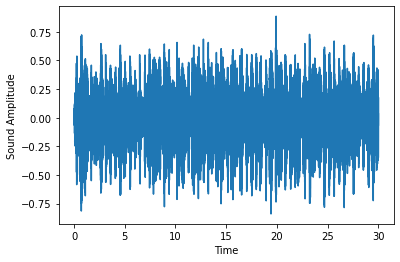

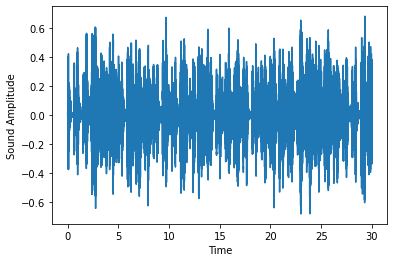

In [10]:
for i in range(2):
    audio, sfreq = librosa.load(filepath+str(i)+".wav")
    time = np.arange(0, len(audio))/sfreq
    plt.plot(time, audio)
    plt.xlabel("Time")
    plt.ylabel("Sound Amplitude")
    plt.show()


<h3>Classifier</h3>
This part uses the concepts of ANN with keras and sequential layers. I have also done splitting in the ratio 70:30

The model is Sequential and architecture only has Flatten and the Dense layers available in keras for the basic ANN representation. As it is naive model we can expect it to be overfit.

In [11]:
import json
import numpy as np


In [12]:
# load data
def load_data(dataset_path):
    with open(dataset_path,"r") as f:
        data = json.load(f)
    
    # Convert list to numpy arrays
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])    
    
    return inputs,targets

In [13]:
inputs,targets = load_data(r"./data.json")

In [14]:
# splitting the data
from sklearn.model_selection import train_test_split

input_train, input_test, target_train, target_test = train_test_split(
    inputs, targets, test_size=0.3)
print(input_train.shape, target_train.shape)


(6990, 130, 13) (6990,)


In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *


In [16]:
model = Sequential()

model.add(Flatten(input_shape=(inputs.shape[1], inputs.shape[2])))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1690)              0         
                                                                 
 dense (Dense)               (None, 512)               865792    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________


In [17]:
from tensorflow.keras import optimizers
adam = optimizers.Adam(lr=1e-4)


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [18]:
model.compile(optimizer=adam,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


In [19]:
model.compile(optimizer=adam,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

hist = model.fit(input_train, target_train,
                 validation_data=(input_test, target_test),
                 epochs=50,
                 batch_size=32)
clear_output()


In [20]:
def plot_history(hist):
    plt.figure(figsize=(20, 15))
    fig, axs = plt.subplots(2)
    # accuracy subplot
    axs[0].plot(hist.history["accuracy"], label="train accuracy")
    axs[0].plot(hist.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # Error subplot
    axs[1].plot(hist.history["loss"], label="train error")
    axs[1].plot(hist.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


<Figure size 1440x1080 with 0 Axes>

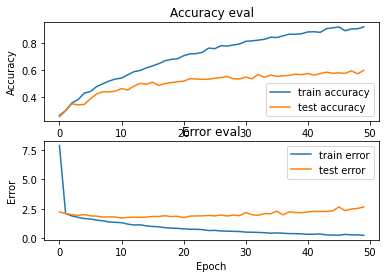

In [21]:
plot_history(hist)


In [22]:
test_error, test_accuracy = model.evaluate(input_test, target_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")


94/94 [==============================] - 0s 4ms/step - loss: 2.6458 - accuracy: 0.5965
Test accuracy: 0.5964619517326355


<h4>Overfitting</h4>

This part deals with the overfitting of the previous model. We can deal with it by majorly doing the following process.

Making architecture less complicated
Using augmented data
Early stopping of training
Adding dropout layers
Regularization / Standardization
I have added the dropout layers and kernel_regularizers as compared to previous naive model giving the dropout probability as 30% Kernel_regularizers is one of the 3 type of regularizer used to impose penalties.

In [23]:
import tensorflow.keras as keras


In [24]:
# Overfitting
model = Sequential()

model.add(Flatten(input_shape=(inputs.shape[1], inputs.shape[2])))
model.add(Dense(512, activation='relu',
          kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu',
          kernel_regularizer=keras.regularizers.l2(0.003)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu',
          kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1690)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               865792    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)               

In [1]:
model.compile(optimizer=adam,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

hist = model.fit(input_train, target_train,
                 validation_data=(input_test, target_test),
                 epochs=50,
                 batch_size=32)

clear_output()


NameError: name 'model' is not defined

<Figure size 1440x1080 with 0 Axes>

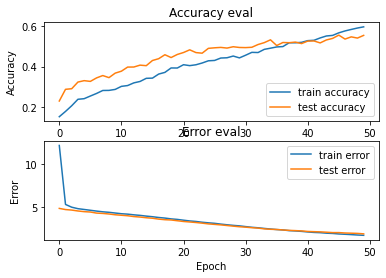

In [26]:
plot_history(hist)
